# Sentence-level analysis on a single book: 

In [2]:
import nltk
import re
import pandas as pd

import numpy as np
from scipy.stats import mode
# for cosine distance calculation:
from scipy import spatial

import sklearn.feature_extraction.text as text
from sklearn import decomposition

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from nltk.tokenize import sent_tokenize
from nltk.tokenize import wordpunct_tokenize

import pickle

In [24]:
pickloader = open("R_books_df.pkl","rb")
R_books_df = pickle.load(pickloader)
pickloader.close()

pickloader = open("R_books_list.pkl","rb")
clean_books = pickle.load(pickloader)
pickloader.close()

pickloader = open("R_book_titles_list.pkl","rb")
novel_names = pickle.load(pickloader)
pickloader.close()

pickloader = open("R_book_authors_list.pkl","rb")
authors_list = pickle.load(pickloader)
pickloader.close()

In [8]:
clean_books[5]

'The Time Machine, by H. G. Wells [1898]     I   The Time Traveller (for so it will be convenient to speak of him) was expounding a recondite matter to us. His grey eyes shone and twinkled, and his usually pale face was flushed and animated. The fire burned brightly, and the soft radiance of the incandescent lights in the lilies of silver caught the bubbles that flashed and passed in our glasses. Our chairs, being his patents, embraced and caressed us rather than submitted to be sat upon, and there was that luxurious after-dinner atmosphere when thought roams gracefully free of the trammels of precision. And he put it to us in this way--marking the points with a lean forefinger--as we sat and lazily admired his earnestness over this new paradox (as we thought it) and his fecundity.  \'You must follow me carefully. I shall have to controvert one or two ideas that are almost universally accepted. The geometry, for instance, they taught you at school is founded on a misconception.\'  \'Is

In [9]:
novel_names

["Alice's Adventures in Wonderland",
 'Through the Looking-Glass',
 'The Hunting of the Snark: An Agony in Eight Fits',
 'Moby Dick',
 'The Song of Hiawatha',
 'The Time Machine',
 'The War of the Worlds',
 'The Legend of Sleepy Hollow',
 'The Strange Case of Dr. Jekyll and Mr. Hyde',
 'Anne of Green Gables',
 'A Christmas Carol in Prose; Being a Ghost Story of Christmas',
 'Anne of Avonlea',
 'Anne of the Island',
 'The Marvelous Land of Oz',
 'The Wonderful Wizard of Oz',
 'The Scarlet Pimpernel',
 'A Princess of Mars',
 'The Gods of Mars',
 'Warlord of Mars',
 'Thuvia, Maid of Mars',
 'Tarzan of the Apes',
 'From the Earth to the Moon; and, Round the Moon',
 'Frankenstein; Or, The Modern Prometheus',
 'The Beasts of Tarzan',
 "A Connecticut Yankee in King Arthur's Court",
 'The Son of Tarzan',
 'Tarzan and the Jewels of Opar',
 'The Prisoner of Zenda',
 'The Monster Men',
 'Flatland: A Romance of Many Dimensions',
 'Around the World in Eighty Days',
 'Jungle Tales of Tarzan',
 'The 

In [36]:
pickler = open("novel_names_dash.pkl","wb")
pickle.dump(list(novel_names), pickler)
pickler.close()

In [11]:
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you will",
  "you'll've": "you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
clean_books = [expandContractions(book.lower()) for book in clean_books]

In [12]:
# Lemming: a gentler approach: 
lemma=nltk.stem.WordNetLemmatizer()

lemma_books = []
for book in clean_books:
    lemma_book = [lemma.lemmatize(word) for word in wordpunct_tokenize(book)]
    lemma_book = (' ').join(lemma_book)
    lemma_books.append(lemma_book)

lemma_books[0][0:100]

clean_books = lemma_books

In [13]:
# Rerunning now that we have the novel_names, but want to use the expanded and lemmatized version of the sentences

clean_book_sentences = []
for book in clean_books:
    sentences = sent_tokenize(book)
    clean_book_sentences.append(sentences)

In [14]:
pickler = open("clean_book_sentences.pkl","wb")
pickle.dump(clean_book_sentences, pickler)
pickler.close()

### Function for creating an average sentiment polarity for each bin:

In [15]:
# get_sentiment(0)

In [16]:
# choosing the book:
novel_index=0
print('Novel name:', novel_names[novel_index])

Novel name: Alice's Adventures in Wonderland


In [17]:
def get_sentiment(novel_index):
    sentiments = [TextBlob(sentence).sentiment.polarity for sentence in clean_book_sentences[novel_index]]
    # sentiments_binned = list(np.array_split(sentiments, len(sentiments)//35))
    sentiments_binned = list(np.array_split(sentiments, 6))
    sentiments_binned = [np.mean(bin) for bin in sentiments_binned]
    return(sentiments_binned)

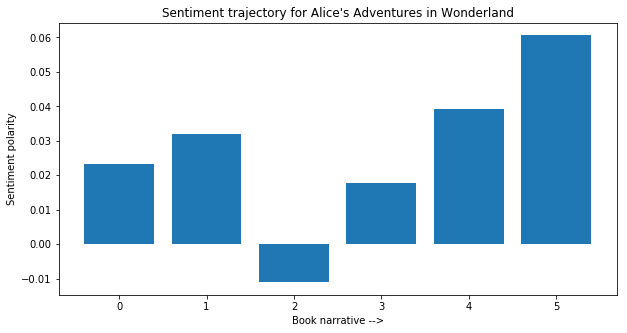

In [18]:
sentiments_binned = get_sentiment(novel_index)
# print('Novel name:', novel_names[novel_index])
y_pos = np.arange(len(sentiments_binned))
plt.figure(figsize=(10,5))
plt.bar(y_pos, height=sentiments_binned);
plt.ylabel("Sentiment polarity")
plt.xlabel("Book narrative -->")
plt.title(f'Sentiment trajectory for {novel_names[novel_index]}');

### Function to make the topic change graph:

In [55]:
def get_topic_deltas(novel_index):
    
    # Remove contractions:
#     clean_book_sentences[novel_index] = [expandContractions(clean_books[novel_index].lower()) for sentence in clean_book_sentences[novel_index]]

    # TfidfVectorizer or CountVectorizer

    # ngram_range : tuple (min_n, max_n)
    ngrams=1

    vectorizer = text.TfidfVectorizer(
        stop_words='english', ngram_range=(1,ngrams), min_df=1, max_df=0.8*len(clean_book_sentences[novel_index]))
    dtm = vectorizer.fit_transform(clean_book_sentences[novel_index]).toarray()
    print(dtm.shape)
    
    vocab = np.array(vectorizer.get_feature_names())
    
    num_topics = 25

    # NMF or LatentDirichletAllocation
    NMFmodel = decomposition.NMF(n_components=num_topics, random_state=1)
    doctopic = NMFmodel.fit_transform(dtm)
    doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)
    doctopic = np.nan_to_num(doctopic)

    # make a list of the topic words for each topic
    num_top_words = 20
    topic_words = []
    word_weights = []
    for topic in NMFmodel.components_:
    #     topic = NMFmodel.components_[j]
    #     print(len(word_idx),word_idx)
    #     print(len([NMFmodel.components_[j][i] for i in word_idx]),[NMFmodel.components_[j][i] for i in word_idx])
    #     print(len([topic[i] for i in word_idx]),[topic[i] for i in word_idx])
        word_idx = np.argsort(topic)[::-1][0:num_top_words]
        topic_words.append([vocab[i] for i in word_idx])
        word_weights.append([topic[i] for i in word_idx])
        
    # cosine similarity between topics for the distance

    maxtopics = [list(sentence).index(max(sentence)) for sentence in doctopic]
    # sentiments_binned = list(np.array_split(sentiments, len(sentiments)//35))
    
    #fix this so that it doesn't bin to 40 if there are less than 40 sentences:
#     print(len(maxtopics)) # this is the same as the first number in the shape I'm already printing

    if len(maxtopics)>40:
        maxtopics_binned = list(np.array_split(maxtopics, 40))
    else:
        maxtopics_binned = list(np.array_split(maxtopics, len(maxtopics)))
        
#     print(maxtopics_binned)
    maxtopics_binned = [mode(topicbin).mode[0] if len(topicbin)>1 else topicbin[0] for topicbin in maxtopics_binned]

    topic_deltas = []
    for i in range(1, len(maxtopics_binned)):
    #     print(maxtopics_binned[i-1], '-->', maxtopics_binned[i])
        last_index = maxtopics_binned[i-1]
        current_index = maxtopics_binned[i]
        topic_distance = spatial.distance.cosine(
            NMFmodel.components_[last_index], NMFmodel.components_[current_index])
    #     print(topic_distance)
        topic_deltas.append(topic_distance)
    # print(topic_deltas)
    # print(len(topic_deltas))
    # print(len(maxtopics_binned))

    return(topic_deltas, topic_words)

(3350, 5879)


/Users/etheredgej/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/Users/etheredgej/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Total "complexity": 3.693570354223732
Topic 0: said artilleryman yes henderson curate turning lieutenant ogilvy presently food speaker drew landlord working scarcely
Topic 1: wa cylinder minute common face shouting beginning quite end little dead morning told felt cut
Topic 2: came common road went running flash soldier slowly suddenly past red away garden yard sight
Topic 3: way clear make going worked little turned escaped presently pony refrain food yard slowly escape
Topic 4: know heaven god yes confounded far common happened make long experience curious bird shadow buried
Topic 5: man told little stood lane woking left passed alive lay strange lonely dark mind gone
Topic 6: martian seen heat ray machine st away watch london mile human body far sight sign
Topic 7: time remained clock long silent stood curate think watched death cellar fighting sound incomprehensible blank
Topic 8: thing mean strange living say felt told possible intelligent flash mind permitted seen face sat
Topic 

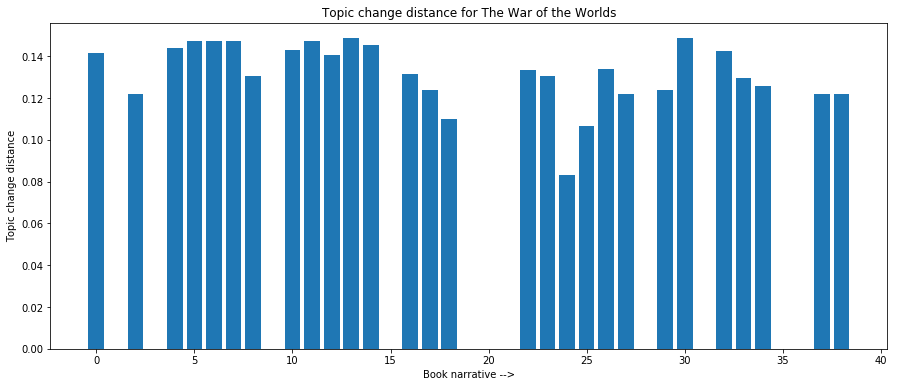

In [20]:
novel_index=6
topic_deltas, topic_words = get_topic_deltas(novel_index)
y_pos = np.arange(len(topic_deltas))
plt.figure(figsize=(15, 6))
plt.bar(y_pos, height=[delta-0.85 if delta>0 else 0 for delta in topic_deltas])
plt.ylabel("Topic change distance")
plt.xlabel("Book narrative -->")
plt.title(f'Topic change distance for {novel_names[novel_index]}');

print('Total "complexity":', sum([delta-0.85 if delta>0 else 0 for delta in topic_deltas]))

for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

### Pickling for the dash app:

### Make the book directories:

In [21]:
import os, sys

for i in range(len(clean_books)):
    os.mkdir(str(i));

### Save the relevant pickle files for each book to each directory:

In [30]:
# Double checking that they're the same length
print("Number of books:",len(clean_books))
print("Number of novel names:", len(novel_names))

Number of books: 1756
Number of novel names: 1756


In [31]:
for i in range(len(clean_books)):
    sentiments_binned = get_sentiment(i)
    with open(str(i)+'/sentiments_binned'+'.pkl', 'wb') as f:
        pickle.dump(sentiments_binned, f)
        f.close()

In [54]:
# restarting from the index it last completed
# 846 failed due to the number of bins being larger than the number of sentences (now fixed with conditional)
pickupnum=846
for i in range(pickupnum, len(clean_books)):
    print(f'trying {i}')
    topic_deltas, topic_words = get_topic_deltas(i)
    with open(str(i)+'/topic_deltas'+'.pkl', 'wb') as f:
        pickle.dump(topic_deltas, f)
        f.close()

trying 846
(36, 224)
36
[array([13]), array([0]), array([10]), array([0]), array([11]), array([0]), array([2]), array([4]), array([0]), array([21]), array([2]), array([20]), array([14]), array([6]), array([4]), array([9]), array([19]), array([18]), array([23]), array([22]), array([3]), array([17]), array([3]), array([23]), array([8]), array([1]), array([16]), array([15]), array([1]), array([12]), array([0]), array([7]), array([6]), array([0]), array([5]), array([24])]
trying 847
(317, 1328)


/Users/etheredgej/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


317
[array([23,  0,  8,  4, 23, 10, 24,  3]), array([ 2,  7, 23, 15, 22,  6,  2, 17]), array([ 4, 15, 14, 15,  7, 20, 13, 19]), array([22,  3, 10,  5, 22, 11, 10,  7]), array([11,  7,  2, 24,  5, 10,  6, 21]), array([21,  7,  9,  9, 21, 17,  7,  1]), array([18, 11, 16, 19, 14,  8, 19, 19]), array([ 8, 15,  6, 19, 14,  1,  4, 23]), array([ 4,  5,  6, 21,  8,  4, 13,  5]), array([14,  0,  0, 11, 21,  7, 14,  5]), array([13, 23, 22, 22, 11,  6, 21,  7]), array([ 9, 21,  3,  2, 15,  1,  8, 19]), array([10, 16, 17,  6,  0, 24,  7,  3]), array([16, 12,  8, 24, 19,  8, 17, 10]), array([24, 10, 18,  0,  2,  5, 12, 24]), array([ 5, 18, 24, 18, 11,  7, 11, 16]), array([ 2, 19, 14,  0,  5,  7, 11, 12]), array([24, 21, 21,  2,  7, 17, 11,  5]), array([ 6,  6,  5, 23, 15, 14,  3,  2]), array([ 5, 20, 20,  1, 20,  1,  0, 12]), array([20, 11, 23, 11,  2, 11, 17, 17]), array([ 3,  6,  2,  0, 17,  1, 21,  3]), array([11, 18, 17, 15,  4,  5,  1, 15]), array([ 2,  4, 17,  8,  6, 18, 14, 14]), array([24, 

/Users/etheredgej/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


322
[array([17, 23,  0,  1,  8, 24,  8,  0,  1]), array([ 8, 24, 16,  9,  0,  1,  1,  8,  9]), array([12, 17, 12,  5,  9, 16,  8, 17]), array([24,  1,  8,  8, 19, 19,  9, 24]), array([ 1, 21,  1, 19, 24,  8, 11, 16]), array([16, 17,  0,  1, 20, 17,  9, 17]), array([12,  6, 24,  6,  0, 21, 21,  8]), array([20,  9, 17, 15, 16, 23, 20,  5]), array([12, 14,  9, 21,  8, 20, 21,  9]), array([ 8,  0, 17,  8,  2,  1,  2, 19]), array([24,  7,  1,  2,  4,  1, 19, 23]), array([14, 17,  9, 18, 11, 14, 19, 12]), array([12,  0,  5, 14,  3, 12,  2,  2]), array([10, 24,  0,  7, 10,  9,  4,  5]), array([ 1,  2, 17,  8,  8,  8, 19, 22]), array([ 3, 17, 15, 17, 17, 17, 17, 11]), array([ 3, 19, 12,  5, 12,  8, 12,  0]), array([22, 23, 14, 22, 21,  1,  3,  2]), array([17, 17,  2,  3, 12, 12, 10, 23]), array([18,  7, 14, 24, 17, 12, 21, 14]), array([24, 16,  0, 12, 24,  7,  0,  0]), array([ 1,  3, 14, 17, 12, 10,  0, 11]), array([12, 19,  2, 14,  3,  4,  5,  2]), array([ 3, 23, 13,  2, 23, 23,  1, 24]), arr

1895
[array([23, 13,  1, 23, 16, 18,  1, 16, 18,  4,  1,  1, 18, 14,  0,  1,  1,
        4,  4, 23, 18, 21, 22, 19, 14, 18, 10, 15, 16, 21, 11, 20, 18, 24,
       20, 20, 12, 20, 23, 13,  1, 11, 23,  1,  1, 22, 21, 24]), array([ 0, 12, 23,  7, 23,  7, 23, 18,  1,  7, 23,  1,  1, 14, 10, 18, 15,
       22,  1,  1, 13, 10,  1, 18, 22, 18, 18, 16, 23, 16, 14, 23,  0, 22,
       12, 17, 10, 22, 23, 10, 23,  1, 23, 23, 15, 14, 23, 23]), array([16, 23, 24, 18,  7,  8, 22,  6, 22, 13, 23, 15,  2, 20, 20, 10, 13,
       22, 12, 24, 14, 22,  7, 18, 18, 22, 18, 18,  4, 16,  0,  2, 22, 18,
        1,  0, 22,  0,  1,  2, 18,  8,  1, 16,  1, 22, 16,  9]), array([18,  2,  4,  7,  1, 23,  0, 18, 23,  7,  1, 18, 11,  1, 16, 13,  1,
       18, 22, 16,  1, 23, 20, 16,  1,  4, 23,  1,  7, 23, 11,  2, 10,  1,
       23, 23, 11, 23, 21, 23, 21, 23, 23, 16, 23, 18, 23, 16]), array([16, 10, 16, 10, 24, 13, 22,  4,  5, 21, 16, 12, 19,  4, 20,  8,  1,
        5, 23, 18, 23, 20, 23, 23,  8,  9,  2,  1, 12, 18, 

380
[array([12, 24, 15, 18,  3, 24, 18, 12, 15,  2]), array([ 5,  3, 12,  3,  1,  5, 12, 12,  3, 18]), array([19,  6, 18, 15, 15,  6, 10, 11,  7,  3]), array([23, 21,  0, 19,  4,  3,  5,  0,  6,  2]), array([ 2, 12,  0, 22, 11,  6,  5, 12, 21, 18]), array([ 6, 21,  6, 14, 21,  7, 23,  9,  3,  0]), array([ 6,  4,  5, 11,  6, 10, 23,  6,  0,  6]), array([ 4, 20,  6,  3,  3,  3, 18, 22, 12, 22]), array([14, 15, 13, 13, 14, 15,  7,  3, 18,  3]), array([ 5, 13, 12, 12,  3,  0,  5,  1,  6, 13]), array([13,  9, 20, 20,  3,  3, 20,  4, 18, 19]), array([24,  3, 24,  0, 13,  3, 24,  0, 13,  9]), array([18,  1, 19, 23,  9, 21,  4, 15,  0, 13]), array([ 9, 15, 16, 10,  1, 10,  1,  3,  0,  7]), array([23, 16, 23,  7,  7, 20,  2,  4,  4,  0]), array([11, 24, 22,  8,  2,  2, 12, 16,  5,  4]), array([ 1,  8, 20, 19,  8, 21,  3, 14,  0, 12]), array([22,  4,  5, 12,  5, 12,  5, 13, 14, 24]), array([23, 24,  2, 24,  0, 24, 13, 24, 20,  1]), array([19, 24,  9, 20, 17,  4, 16,  1, 18, 12]), array([12,  6, 

1398
[array([ 7, 23, 23, 13, 20, 22, 23, 12, 11, 17, 17, 17, 19,  0, 17,  2, 17,
       19, 17, 17, 20, 12,  5, 17, 19, 19,  2, 19,  3, 24, 22,  9,  3, 22,
       19]), array([19, 22,  3, 24,  3, 22,  6,  3,  3,  3, 20,  3, 14,  3,  1,  1, 19,
       22, 22,  2,  1, 19,  1,  5, 16, 19,  3, 22, 19, 19, 13,  1,  0,  2,
       17]), array([ 0,  6, 17, 21,  6,  5,  0, 15, 11,  1,  3, 14,  8, 19,  3, 13, 12,
        2,  3, 17,  8, 19,  9,  2,  3,  9, 17,  2,  9,  2, 19, 22,  9, 22,
       19]), array([16, 24, 23,  2,  1,  2,  3, 16, 19, 17,  0, 19, 17, 22, 17,  8, 17,
        1,  7,  2, 24, 18, 21,  8, 19, 21, 19, 19,  3, 12,  1,  0, 19,  8,
        2]), array([ 5,  2, 19,  2, 18, 15, 19,  3,  9, 24, 16,  5,  1, 23, 17,  6,  2,
        0, 21, 22,  2, 11,  2,  1,  2, 16,  0, 24, 16,  1, 17, 17, 13, 15,
        0]), array([ 0,  1, 19,  3,  8,  3, 17,  2,  3, 19,  2,  3, 10,  0,  0, 16,  1,
       17,  7,  1, 14, 10,  1, 16,  3, 19, 16, 17,  7,  0,  3, 17,  2, 24,
       21]), array([ 3,  1,  

581
[array([11, 17, 18, 21, 13,  3,  6,  5,  2, 15, 21,  9, 17, 18, 13]), array([ 2, 18,  1, 20, 17,  2,  0, 16,  2, 13,  0,  6,  5,  2,  2]), array([15, 17,  2,  0, 13, 13, 13, 20, 18,  2,  0, 17,  2,  2, 13]), array([ 0, 13,  2,  2, 13, 13, 13,  2, 13,  2, 13,  5, 17, 17,  2]), array([ 5, 11,  5, 19,  5, 15,  8,  0, 13,  2, 11, 10,  2,  3,  3]), array([ 2,  0, 17, 17,  2,  3, 17, 15,  3,  0, 23, 18, 23,  2,  3]), array([ 0,  7,  3, 18,  3, 17,  3,  3, 10, 17,  5,  5, 10, 19,  2]), array([14, 21,  0, 10, 15, 19,  0,  3, 17, 21,  5,  7, 10, 11, 24]), array([ 9, 17,  3, 11,  5, 21, 17, 17,  7, 20,  3,  0, 17, 19, 14]), array([ 2, 10, 23, 19,  3, 14, 19, 17, 10, 17, 12,  4, 12,  4,  7]), array([24, 17, 12,  4, 19, 17,  4,  0, 11, 11, 20,  7, 10,  4,  8]), array([17, 10, 16,  5,  2, 10, 18, 21,  2,  4, 15, 17,  0,  2,  2]), array([ 0, 12,  4,  2,  2,  8,  0, 14,  4, 23,  8, 19, 21, 23, 16]), array([ 0, 16, 17,  5,  5, 17,  2,  4,  2,  5,  8,  4,  4, 19, 14]), array([ 0, 10,  4, 10,  6,  6

721
[array([22,  3, 16,  6,  4, 20,  6, 20, 23, 18, 15,  6,  4, 24,  8, 11,  8,
       21, 17]), array([17,  0, 17,  6,  4, 17,  4, 17, 17, 17, 17,  4, 17,  6,  4, 11, 17,
       19]), array([ 0, 13, 19, 19, 11, 20,  4,  6, 19, 19,  0, 19, 22, 13,  4, 20, 21,
       20]), array([ 4, 18, 22,  4,  6,  0,  4,  4,  4,  6,  4,  9,  4, 23, 22, 19,  7,
        6]), array([ 0, 20,  1, 20, 12, 16, 15,  6, 21,  3, 20, 23, 23,  6, 24, 24,  0,
        2]), array([20,  3,  8, 22,  2, 17, 15,  6,  1, 24,  8,  8, 17,  7, 22,  0,  2,
        2]), array([22,  6,  1, 23,  4, 22, 17, 22,  3, 22, 22, 22,  9,  7,  3, 24,  0,
       24]), array([10,  4, 11, 17,  4, 10, 17, 17,  4, 11,  3, 15, 24, 11, 24, 11, 15,
       20]), array([20,  5, 15, 16, 19, 19, 10,  4, 15, 18,  9,  4, 19, 22,  4,  7, 22,
       17]), array([24, 13, 13,  0,  2,  4,  0,  5,  0,  2, 20, 16, 23,  6, 19, 17,  2,
       22]), array([ 7, 17, 24,  4,  1, 22,  6, 19,  1, 23, 23, 22, 16,  4, 24, 18, 19,
       19]), array([ 4,  9,  9, 19, 

1292
[array([ 1,  3,  0,  1,  1, 21, 23,  5,  5,  4,  4,  5,  4,  5, 23, 23, 13,
       10,  9, 15, 13, 13, 13,  9,  7,  0,  0,  4,  0,  4, 23, 12, 23]), array([14,  2, 23,  1,  2, 11, 11,  2, 24,  9,  2,  5, 11, 22,  3,  5,  2,
        6,  3,  1, 11,  4, 24, 24,  4, 24, 24,  1,  4,  0, 23,  4,  3]), array([12,  3, 23, 11,  4, 12,  4, 12,  1, 12, 10,  5, 23,  1,  4,  1, 24,
       11, 19, 23, 23,  7,  6, 10, 24, 23, 24, 22, 24, 24,  6,  6, 10]), array([ 1, 11,  6,  6,  6, 22,  6,  1,  1,  6, 19, 14,  1,  1,  6,  1,  6,
        1,  4, 24,  6,  6, 22,  1,  1, 24,  6,  1,  1,  6, 24,  6,  5]), array([ 6, 19,  6,  1, 24,  4,  6, 14,  4, 22, 22, 18,  0, 22,  5,  5, 24,
       19,  6,  0,  5, 17, 23, 13,  2, 13, 23,  5, 17,  5, 18, 11,  4]), array([22,  2,  8,  9,  1,  1,  8,  4,  0,  4, 20,  1, 12,  1,  2,  0, 10,
       24, 24,  4, 20, 20,  5,  5,  0,  5,  5,  0,  1,  4,  5, 11, 11]), array([ 5, 12,  0, 24,  6,  1, 11,  5,  5, 24, 11,  1,  5, 24, 16, 19,  5,
        5,  9,  1, 23,  1, 13, 

(20369, 17196)
20369
[array([14,  6, 22, 22,  0,  0,  9, 22,  0,  0,  9, 22, 22,  9, 22, 23, 23,
        1, 23,  1, 23, 23, 23, 23,  4, 19,  5, 19,  2, 13,  6, 23,  9,  4,
        6, 15, 20, 23, 19,  4,  4,  9, 20, 10, 10,  4, 24, 10, 10, 19, 23,
        4, 23, 23,  1, 14,  4, 14,  4,  4,  4,  9, 23, 23, 23,  8,  8, 23,
       23,  6,  4,  4,  4,  4,  4,  4,  4,  4,  8, 23,  4, 19,  4, 10, 15,
        4, 14, 23, 10, 10, 24, 16, 21, 21, 10, 23,  4, 23, 17, 13, 14, 10,
       19,  4, 14, 19, 15, 24, 24, 16, 15, 24, 23, 24, 24, 24, 10, 10, 10,
       10, 10, 10,  1,  7, 23, 21, 15, 23, 15, 23, 13,  4,  4, 17, 22,  9,
        9, 22,  1, 15, 15,  9, 23, 19, 10,  4, 16, 24, 24, 23,  9, 23, 15,
        4, 19, 24, 24, 24, 13, 11, 10, 24, 14, 23, 19,  9, 10, 15, 10, 21,
        9, 21,  9,  9,  8,  9, 19,  8, 15, 23, 15,  4,  4, 21, 10,  4, 14,
       21, 23, 23,  1, 20, 24, 17, 19, 23, 24, 19,  9, 19,  9,  9, 11,  9,
       21, 12, 10,  9, 10,  9,  9,  9,  9,  9,  9, 22, 24, 19, 19, 19, 19,
   

trying 870
(3933, 5143)
3933
[array([11,  0, 17, 23, 15, 23, 10, 23,  9,  0,  8, 15, 23, 10,  3, 17, 21,
       20,  4, 19,  0, 23, 15,  0, 19,  3,  0,  0,  7, 21,  0, 22,  2, 15,
        0,  0, 19,  0, 15,  0, 23, 15, 15,  0, 10, 15, 21, 15,  4, 10, 21,
        0, 15, 15,  0,  0, 15,  3,  6, 19, 23, 19, 15, 21, 10, 24, 21, 10,
       14, 10, 20,  0,  0,  7, 23,  6,  0,  4, 20, 10, 23,  5,  0, 21, 15,
       23, 13, 22, 23, 22, 22, 23, 23, 23, 10, 23, 19, 13,  3]), array([23, 23,  7,  0, 23, 10, 21, 10, 20,  0, 19, 19, 16, 12, 16, 15, 22,
       16,  9,  0, 16, 23,  0, 16, 15,  0, 10, 24,  0, 24, 21,  7, 19,  0,
       23, 17, 15, 15,  4, 19, 15,  8,  9, 20, 19, 20, 16,  4, 19, 11,  6,
        0,  0,  0, 23, 22,  8, 10,  4, 16, 15, 15, 15, 23, 10,  7, 16, 16,
       13, 22, 21, 18, 15,  9,  8, 23, 13,  0,  8, 13, 12, 10, 15,  0,  8,
       15, 14,  3, 15, 24,  7, 16, 15,  8,  6,  8, 23, 11, 18]), array([16,  7, 10, 21, 24,  4,  3, 16,  8, 13,  0, 21,  0, 10, 16, 21,  5,
        8, 23, 

2909
[array([18,  0,  0, 19,  0,  0, 21,  0, 22,  2,  7, 18,  0,  0, 21,  4, 17,
        8, 24,  1, 21,  4,  8, 21, 21, 16,  8,  1, 18, 23, 18,  1,  4,  3,
       11,  3, 11,  3, 11,  4,  1,  8,  8,  4,  1,  4, 11, 11,  3, 11,  8,
        6,  3, 11, 11, 21, 24, 23, 18, 11, 19, 19,  1,  3, 18, 19, 20, 11,
       19, 19,  1,  3, 11]), array([10,  3, 20, 11, 13, 13, 21, 17, 17, 18, 19, 11,  4, 11, 19,  4, 19,
       11, 10,  8, 24,  7, 19, 24,  8,  4, 11,  3, 11, 11, 16, 11, 21, 19,
        5, 11,  5, 10,  0, 11,  4,  0, 11,  8,  5, 11, 23,  0, 21,  8,  8,
       19, 11, 10,  1, 19,  1, 11, 11, 19,  1, 11,  1, 24, 23, 11, 24,  7,
       11,  8,  4,  4,  1]), array([ 1,  1,  1, 13, 18, 18, 13, 11,  0, 19, 11, 18,  1, 20,  3, 11, 11,
       11,  0, 24, 17,  1,  8, 23,  7, 17, 22,  1, 19,  1, 18,  1,  1,  1,
       22, 20, 18, 18, 19, 18,  1, 19, 18,  1,  4, 11,  8,  3, 11, 21, 18,
       18, 18, 17,  1,  4,  7,  8,  7,  4,  1,  4, 18,  1, 20,  7,  1, 20,
        2, 24, 23, 19,  7]), array([

572
[array([21, 23, 20,  3,  5,  0, 24,  0,  9,  3,  5,  0, 15,  8,  5]), array([ 0, 14,  6,  6,  0,  4,  1, 22, 11, 15, 22,  3,  6, 20,  3]), array([12,  3,  0,  9,  0,  3,  9,  3, 22, 22, 22,  1,  3, 23, 20]), array([20,  0, 22,  3, 22,  9, 22,  4,  1, 16,  3, 13,  5,  0,  3]), array([ 3,  0,  3, 10,  7, 21,  1,  5,  7,  8,  3,  9,  3, 16, 15]), array([ 1,  6,  7,  1, 13,  0,  2,  2, 23,  7, 14, 12,  3, 12, 19]), array([ 5,  0,  6,  5,  0,  6,  8,  1,  3, 20, 22,  7, 16,  5,  0]), array([ 4,  8,  7,  7,  9, 14,  4, 20,  1,  0, 10,  7, 21,  3, 10]), array([ 3, 16,  7,  9,  1, 23,  6,  8,  5,  0,  6,  0,  5, 23,  5]), array([ 0, 21, 22,  1,  7,  0, 22,  1,  2, 17,  2, 15,  2,  2, 23]), array([22,  0, 20, 12,  3, 22,  3,  9,  9,  3, 11,  3,  9,  3,  0]), array([ 9,  3,  3, 20,  7,  3,  3, 11, 22,  3,  0, 24,  6, 24,  0]), array([20,  4,  0, 19,  3, 19,  5, 10,  4,  6, 16, 22, 22, 23]), array([16,  4,  0, 14,  3,  3, 23, 22, 13, 22,  0, 16, 13,  3]), array([20, 16, 10, 20, 20, 20, 15,  8

492
[array([ 6, 15, 15,  9, 24,  2, 18,  3,  2, 22, 20, 20, 19]), array([ 3,  9, 24,  9,  3, 20,  2, 22,  4, 22, 23, 11,  6]), array([22,  6, 19, 12, 23, 23, 16, 22, 22,  2,  6,  6, 15]), array([ 2,  2,  9, 11, 23, 23,  2, 17,  0,  4,  2,  6, 17]), array([17, 20, 12,  2,  9, 23,  2,  2, 22, 19, 10, 22,  0]), array([24, 22,  1,  2, 18, 23, 21, 18, 12,  2,  9, 18,  7]), array([ 6, 16,  7, 24, 15,  3, 22, 15, 23, 11, 23, 24,  6]), array([ 3,  3, 22,  3,  2,  2,  3,  8,  7,  7, 21, 15, 23]), array([ 0, 12,  2, 13,  2, 20,  2,  3,  2, 17, 19, 23,  3]), array([ 0, 12,  2, 15, 21, 22, 24,  1, 18, 21, 13, 22,  2]), array([ 1, 19,  7, 19,  2, 13, 13,  4, 22,  0,  0, 23, 13]), array([13,  0, 17,  3,  0,  5, 13, 22, 22, 20, 22,  4, 10]), array([22, 16, 18, 21, 22, 22,  4, 11, 20, 11, 22, 23]), array([23, 24, 13, 13,  2, 13, 22,  2, 11,  9, 11, 22]), array([ 2, 20, 20,  7, 23, 20,  9,  9, 24,  7,  9, 18]), array([18, 17,  7,  2, 22,  0,  8, 10, 22,  2,  2,  2]), array([11, 22, 24, 13, 13, 12, 16, 

1059
[array([23,  1,  7, 10,  4, 13,  2,  1, 17,  0,  0, 10,  0,  0, 21, 20, 22,
        1, 21,  2, 13,  0,  2, 10,  0,  4, 20]), array([22, 24, 12, 19,  9, 21,  2, 19,  9, 20, 13, 24,  0, 22,  2, 18, 24,
        2,  0, 13,  4, 24, 21, 12, 22,  1, 20]), array([ 7, 10, 20,  7, 20, 13,  1, 24, 20, 22, 18, 10, 20,  2,  7, 12,  7,
       21, 10, 11, 18,  5,  0, 24, 20,  9, 20]), array([17, 17,  1, 14, 18, 18, 19, 20, 17, 21, 13,  9, 18,  9,  1, 20, 15,
        6,  1,  9, 18, 22,  4,  1,  1, 19, 17]), array([19, 13,  1, 20, 20, 17,  1, 20, 17,  9, 13, 20,  1,  1,  1, 16, 17,
       19, 24,  7, 12,  1, 18, 11, 17, 20, 19]), array([24, 22,  9,  1, 19, 23,  9,  9,  1, 24,  1, 21, 18, 18, 17,  0,  6,
       17,  6, 17, 21, 19,  9, 18,  2, 20, 18]), array([18, 22,  3,  3, 17, 18, 19,  1, 21, 22, 17, 10,  6,  6,  7,  6, 16,
       21,  6,  1,  1, 23, 21, 21, 24, 24,  7]), array([ 4, 18,  2,  4,  1,  3, 15, 12, 19,  1, 19,  2,  6, 21,  7, 19,  2,
        0, 21, 10,  1, 16,  2,  8, 16, 22,  4]), ar

4692
[array([ 0,  3,  7,  3,  7, 24,  7,  9,  7, 24,  7, 16,  7,  1,  7, 24,  7,
        9,  7, 15,  7,  1,  7, 16,  7, 16,  7, 16,  7, 15,  7, 15,  7, 16,
        7, 18,  7, 24,  7, 15,  7, 15,  7,  3,  7,  3,  7,  0,  7,  6,  7,
       24,  7, 13,  7,  6,  7, 11,  7, 24,  7,  3, 16,  0,  0,  0, 16,  0,
       16, 14,  0, 19,  0, 15, 19,  3, 23, 23,  3,  3,  0, 19, 14,  3, 19,
        0, 23, 19, 24,  0, 22,  3, 23,  3, 22, 16, 16, 20, 16,  0,  4, 19,
        0,  3, 19, 19, 20, 20, 19, 16, 14, 16, 14, 17, 13, 14, 10,  0]), array([24, 16, 23, 10, 17, 14, 10,  3,  3,  3, 19,  4,  3, 16,  3,  6,  0,
       19, 19, 16, 16,  0, 16, 16, 16,  3, 15, 16,  3,  3, 16, 24, 19,  0,
       23, 24,  9,  3, 24, 15, 16,  3,  0, 16,  0, 24, 16,  3,  6, 19, 16,
       19, 16, 16, 16, 16, 24, 16, 24, 16, 24, 16, 18, 16, 24, 16,  0, 24,
       24, 16, 24,  7, 24, 21, 24, 23,  0, 24, 12, 22, 19, 12, 13, 11, 14,
       22, 24,  0, 24, 12,  0, 13, 19, 23,  0,  0, 23, 17, 23, 12, 14, 23,
       14, 20, 10, 24

(3540, 6045)
3540
[array([21,  0,  0,  0,  0,  4,  3,  3, 11,  3, 11,  3,  8,  3, 24, 11, 21,
       24, 24, 20, 21, 24,  1, 24,  8,  2,  2,  0, 21,  6, 24, 23,  8,  8,
       21, 24, 20, 24, 24,  4,  4, 24, 18, 19,  0,  5, 19, 21,  0,  3, 16,
        0,  1,  5,  9, 23,  1,  5,  2, 20,  3, 12,  2, 18,  5,  2, 21,  9,
       24,  2,  5, 20,  9,  0, 21, 22,  5, 13, 24,  8,  5,  2,  3,  3,  3,
       24,  3, 22, 19]), array([ 1, 23,  4, 19, 15, 16, 23, 21,  0, 19, 10,  3,  0, 22,  9,  0,  5,
       21,  0, 10, 13,  5,  0,  6,  5, 10,  3, 22, 18, 11,  0, 10,  3, 24,
       22,  3,  3, 11,  4, 11,  4, 21, 14,  4, 16, 11,  0,  1, 20, 24,  5,
       11,  2, 23,  5,  4,  5, 15,  6,  1,  6, 11,  0, 10, 18,  5,  0,  2,
       10, 12,  2,  9, 10,  3, 21,  5, 10,  5,  0,  4, 21,  5,  2,  6, 13,
       22, 11,  6, 10]), array([ 3, 23,  0,  0, 21, 11,  0,  0,  3,  0, 22,  3, 24,  3, 11,  0,  0,
        3, 21, 24,  2, 11,  3,  7,  0, 13, 14, 24,  3,  3,  3,  3, 14, 22,
       13, 16,  6, 21, 15, 16, 

869
[array([ 0, 17,  0,  0,  7,  7,  0,  0, 21, 18, 22, 24, 23, 21,  0, 21,  6,
       12, 20,  0, 16, 20]), array([ 0, 21, 20, 21, 23, 21, 21, 13,  0, 13, 23, 21, 23, 21, 20, 23,  0,
       20, 23, 13,  0, 14]), array([ 0,  9, 10, 14, 10, 21, 22,  0,  9, 15, 23,  8,  3, 20,  3,  9, 23,
        3, 20, 21,  9, 18]), array([ 1, 13, 16,  9, 24,  0,  1, 20, 19, 20,  9, 13,  4, 14,  8,  3,  2,
       22,  5, 21, 23,  1]), array([21, 18, 15,  3, 14,  8,  3, 24,  1, 10, 22,  1, 16, 15, 24, 21, 23,
        0, 15, 19,  0, 22]), array([23,  0, 23, 22, 21, 15, 21, 24, 20,  9, 17, 19, 17, 21, 17,  0,  3,
       23, 21, 19, 19, 13]), array([ 7,  9, 19, 20,  5,  9,  0,  7, 20, 17, 14,  7,  9, 22,  3, 22, 23,
       23, 23, 17,  7, 13]), array([ 9, 14, 19, 21, 14,  0,  0,  0, 19, 23, 10, 21,  3, 18,  0,  3, 15,
        9, 24,  8, 24,  9]), array([ 3,  0,  9,  1, 24,  0, 21, 16, 19, 22,  0, 14, 23, 23, 23, 23, 14,
        0, 14,  0, 22,  3]), array([10,  0, 13, 13, 13, 10, 19,  0,  0,  0,  0,  0, 17, 

391
[array([ 2, 23,  0,  2,  2,  2,  6, 20, 20,  0]), array([22,  2, 22, 16,  2,  2,  2,  2,  2, 16]), array([12, 13,  6, 16, 19,  4, 21,  2,  2,  9]), array([ 2,  2, 20,  6,  4,  0, 23, 13, 16,  4]), array([ 0, 14, 20, 20,  2, 20,  2,  2,  0,  4]), array([ 0, 13, 13,  4,  0,  2, 21, 14, 14, 13]), array([14, 12, 14, 21, 14, 23,  2, 17, 13,  5]), array([12, 17, 12,  0,  3, 14, 14,  0, 12, 17]), array([23,  7, 21,  7, 14, 14,  7,  0, 14,  2]), array([ 5, 19, 22, 20,  6,  6, 20,  8, 21, 20]), array([12,  3, 20, 20,  3, 19, 19, 24, 23, 23]), array([ 6,  6, 14, 21, 16,  6, 19,  9,  6, 13]), array([19,  8,  6, 21,  9,  7, 18, 21,  7, 20]), array([ 3, 23, 24, 22, 18, 24, 18, 11, 24,  0]), array([15,  6, 20, 16, 20,  0, 13, 14,  4, 23]), array([ 2,  4,  2,  8,  2,  6, 16, 24, 16,  9]), array([16,  2, 16,  0, 22, 22, 22, 22,  8,  1]), array([ 7,  8, 17, 22, 17, 16, 11, 13, 17, 17]), array([ 0,  5, 21, 23, 24,  8,  1, 13, 16, 17]), array([ 9, 11, 23, 15, 15, 10, 15,  9, 20, 15]), array([ 7,  7, 

265
[array([16, 23,  9, 22,  0, 16,  6]), array([ 0,  5, 22,  2, 22, 23,  0]), array([16,  0, 16, 16,  5,  5,  9]), array([ 5, 22, 14, 19, 16,  8, 11]), array([ 3, 21, 22, 21,  6, 10,  6]), array([ 1, 16,  4,  5,  5, 23,  2]), array([22, 24, 22,  7, 11, 18, 13]), array([ 4, 15,  4,  7, 24,  4, 21]), array([ 0,  9,  0,  4, 13,  2,  9]), array([13,  8, 19, 21,  4, 14,  2]), array([17,  4,  7,  0,  0,  9, 21]), array([11,  0,  4,  0,  6, 22, 18]), array([22,  2,  4, 22, 11, 15, 16]), array([ 5,  5,  9, 20,  5,  5,  7]), array([ 9, 20, 12,  2, 16, 16, 10]), array([ 7, 13, 10, 23, 13, 15, 17]), array([19,  7, 12, 19, 17, 17, 13]), array([ 6, 17,  9,  5,  1, 17,  2]), array([24,  9,  9, 22,  7, 21, 11]), array([ 9,  7,  5, 17, 17, 23, 19]), array([21,  5, 21,  5,  9, 16,  0]), array([16, 16, 13, 16, 24, 24,  0]), array([ 0, 23, 23, 22,  5, 17, 16]), array([17, 13, 14, 21, 12, 24, 15]), array([14,  0,  4, 22,  8,  5, 17]), array([ 0,  9,  9,  4,  8, 15]), array([15,  7,  4,  8,  0,  9]), arra

521
[array([24, 24, 14,  0, 16, 16, 16, 17, 24, 21,  0, 16, 23,  0]), array([ 4,  2, 23,  2,  9,  3,  3,  2, 20, 16,  9, 23,  2]), array([16,  7, 24,  2,  9,  0,  1,  4,  6, 19,  0,  0, 20]), array([ 1,  0, 15,  0, 15,  7, 18,  2, 13, 10, 23,  3,  9]), array([ 1, 23, 23,  4,  9,  9, 24, 24,  5, 21, 24,  4, 20]), array([24, 16, 23,  4,  2,  1,  4, 23,  5, 24, 17,  3, 22]), array([14,  8, 17, 24,  6, 22,  7, 21,  0, 21, 21, 17, 17]), array([17, 17, 17, 12, 17, 19, 17, 17, 19, 24,  0,  2, 11]), array([18,  4, 23, 23, 24,  2, 22, 16,  0, 15, 13, 11, 21]), array([ 2,  2, 22, 17, 23, 22, 22, 24,  0,  5, 24, 24, 20]), array([11,  7, 24, 22, 24, 24,  3, 15, 15, 22, 18, 22, 23]), array([23, 16,  9, 13, 19, 15, 23, 23, 24, 22, 24,  7, 20]), array([17, 22, 12,  0, 12,  6, 10, 12, 17, 10, 13, 15, 21]), array([14, 22, 10, 21,  5, 19, 16, 15,  2, 16, 23,  0, 23]), array([14, 19, 17, 14,  0, 10, 16,  8, 19,  0, 10,  3, 17]), array([20, 19,  8, 18, 16, 23, 20,  5, 21,  8, 13, 17, 16]), array([24, 23, 

713
[array([24,  0, 11,  2, 12,  4, 21,  7,  5,  1, 21, 12,  5, 11,  0,  4, 24,
       16]), array([16, 17, 16, 22, 11,  4, 21,  4,  0, 21,  3, 14,  2, 14,  5, 14, 13,
        4]), array([24,  1,  3,  0, 16,  2,  5,  7, 12,  7, 22,  0,  4,  7,  1, 13, 14,
       13]), array([ 0, 18, 20,  4, 24, 23,  3, 20,  0, 24,  7,  1,  3,  2, 22, 23, 20,
        5]), array([ 7, 20,  0, 20, 24, 11, 20,  7,  0, 12,  5, 18,  5, 24, 10,  7, 19,
        0]), array([ 6, 21, 15, 20, 12, 22, 15, 20, 23,  5, 22,  1, 12,  0, 15, 20, 21,
       17]), array([ 0, 10, 22,  4, 13,  3, 15,  2, 21, 13, 23, 20, 20, 12,  2,  0, 10,
        1]), array([ 5,  0, 10, 10, 10,  3, 15, 24,  1, 24, 24,  6, 24, 21,  1,  3, 19,
       24]), array([23, 14, 21,  4, 16, 16,  4, 13,  5, 12,  4, 24,  4, 18, 12,  4, 14,
       14]), array([ 2,  4,  4,  4, 16,  4, 18, 23, 23,  4,  4,  4,  2, 11, 14, 20, 12,
       24]), array([ 7, 15,  5,  0, 19,  2, 24, 24, 15, 24, 24,  0, 21, 18, 24, 22,  2,
       12]), array([19, 17,  4, 13,  0, 

126
[array([18,  0,  1,  0]), array([ 0,  6, 18,  4]), array([ 9,  7, 11,  0]), array([17,  0,  9,  1]), array([17,  3,  0, 11]), array([ 5,  4,  8, 14]), array([ 2, 23,  0]), array([ 4, 19,  1]), array([24, 16,  4]), array([ 8,  7, 13]), array([16,  1,  0]), array([ 4,  0, 16]), array([10, 15, 15]), array([ 0, 10,  0]), array([ 1, 13, 19]), array([ 4, 22,  5]), array([22, 13,  5]), array([ 1, 22, 23]), array([19,  3,  1]), array([14, 19,  3]), array([ 1, 22, 10]), array([ 8, 11,  8]), array([ 7, 24, 21]), array([22, 22, 24]), array([16, 24,  5]), array([15,  0, 21]), array([12, 18, 21]), array([12, 12, 23]), array([ 4, 21,  8]), array([ 1, 24, 14]), array([24, 16,  8]), array([ 7,  5, 17]), array([16,  2, 11]), array([ 2, 17, 20]), array([ 9, 18, 18]), array([ 0, 21,  9]), array([23, 19, 21]), array([ 9, 14,  6]), array([23, 20,  2]), array([18, 19,  6])]
trying 900
(452, 1247)
452
[array([20,  0,  7,  0,  0,  4,  6,  0,  4,  0,  0, 10]), array([17, 22, 18, 18,  6, 18, 22, 18, 22, 13,

717
[array([24,  0, 17,  1, 16,  1, 22, 23,  1,  7, 15,  0, 21, 18,  4,  4,  7,
        8]), array([13, 15, 15, 14, 18, 15,  1,  1,  1, 23, 14,  7, 23,  0, 22,  1,  3,
        0]), array([22, 10,  0,  2,  0,  0,  4,  2,  2, 16,  3,  1,  2,  1,  2,  4, 24,
        0]), array([ 5, 15,  8, 24,  4,  7, 18, 22,  1, 24,  1, 11,  1,  7, 16,  1,  2,
        4]), array([14, 21,  8, 23,  7,  8, 19,  4,  7, 22,  0,  5,  4, 23, 13,  4, 14,
        1]), array([ 1, 16, 24, 15, 20,  1, 22, 18, 16,  9,  4,  0, 23, 20, 15, 20,  9,
       23]), array([24, 23, 24, 23,  9, 23,  9,  7,  1, 24,  9, 19, 24,  0, 23, 21, 24,
       17]), array([ 7, 23,  1,  2, 24, 17, 17,  2, 17,  7,  6, 18, 12,  7, 22, 10,  5,
       10]), array([18, 16, 22, 13, 24,  9,  9, 14, 12,  3, 13,  7,  0,  9, 24,  1, 21,
        9]), array([ 9,  1, 15, 11, 24, 24, 22, 15, 24,  2, 24, 23,  1,  1, 13, 23,  1,
       24]), array([ 3,  1,  1, 23,  2,  2, 17,  5,  4, 21,  8,  7, 16, 16, 23, 23,  7,
        1]), array([21, 15, 22, 23,  9, 

1190
[array([24,  9,  0,  0, 15, 18,  6, 24, 15, 15, 24, 23,  4,  4, 15, 18, 24,
        4,  8, 20, 18,  6,  4,  1,  6, 17,  4,  2,  0, 18]), array([24, 20, 20, 19, 15,  6,  8, 18,  0,  6, 18,  0, 18, 24, 17, 18, 24,
       10, 20, 19, 18, 15,  4,  6,  4, 15, 18,  4,  4,  4]), array([15, 11,  2,  0, 10,  6,  2,  4,  4, 18, 10,  5, 12, 18, 11, 24, 24,
        2,  0, 21, 18, 18, 11,  4,  0, 24,  7,  6,  6,  4]), array([15, 19, 15,  4, 12,  9,  9,  6,  1, 20, 10, 15,  1,  4,  6, 15, 15,
       23,  4,  4, 23,  9,  9,  7,  4,  6, 22, 12, 17, 20]), array([ 4,  7, 15,  2,  0,  1,  4,  4, 24, 21, 24, 11, 20,  0, 20,  5,  0,
        9,  0,  0,  5,  0, 23,  4, 19, 24, 23, 20, 20,  4]), array([ 8,  6, 16, 24, 24, 23,  0, 13, 16, 20, 12, 15, 17, 16, 12,  2, 24,
       24,  4, 15, 23,  0,  6, 24,  2,  3, 15, 20, 12,  6]), array([ 9, 12,  0,  6, 24, 23, 24,  4, 15, 15,  9,  9,  1,  0,  9, 12,  9,
        4,  4,  1,  9,  4,  4,  4,  8, 23,  9, 15,  6, 12]), array([15,  4, 15,  4,  8,  2,  0,  8,  9,

185
[array([ 7,  7, 22, 17, 21]), array([ 8,  2, 19,  0, 15]), array([11, 15,  1,  1,  4]), array([ 5, 12,  4,  4, 14]), array([ 0,  0,  7, 23, 24]), array([24, 15,  4, 23,  7]), array([16, 19, 12, 15,  2]), array([ 0, 21,  0,  0,  0]), array([ 1, 11, 19,  5,  9]), array([ 1, 17,  6, 16, 21]), array([11,  3, 15, 11, 23]), array([17, 13, 12, 12,  1]), array([ 4,  8,  1, 10,  6]), array([15,  1,  0,  8,  2]), array([ 0,  0, 17, 22, 13]), array([ 1,  1,  2, 14, 13]), array([19, 14, 20, 14, 15]), array([18,  1, 10,  2,  7]), array([21, 22, 10, 19,  1]), array([ 0,  4, 18, 18,  4]), array([21,  1,  9, 16, 16]), array([16, 24,  5,  5, 14]), array([ 6,  9, 21, 22, 12]), array([23, 20, 19, 22,  5]), array([22,  3,  0, 24,  1]), array([21, 20, 21,  3]), array([10, 12,  6,  2]), array([18, 18,  2, 20]), array([ 0,  0, 21, 23]), array([22, 21, 21, 21]), array([12,  3,  0, 12]), array([10, 12,  2,  3]), array([22, 22, 21,  0]), array([22,  2,  0, 22]), array([ 9,  5, 20, 20]), array([ 0, 23, 23,  

576
[array([ 7, 18, 13, 12, 17, 13,  7,  4, 21,  6, 15, 17,  4, 19, 21]), array([18, 19, 12,  8, 12, 14,  7,  3,  8, 18, 12, 16,  7, 14, 22]), array([15, 17,  7,  7,  2,  2, 13,  8, 15,  7,  4, 12, 17, 23, 21]), array([ 4, 23, 21, 19,  6,  7, 13,  2,  2,  4,  8, 16,  7, 18,  4]), array([17, 16,  8,  7, 12, 12, 20, 20, 20, 17, 17,  6, 17, 12, 12]), array([ 0,  3, 23,  3,  3, 12,  3, 16,  8, 16,  3,  3, 14,  9,  3]), array([16,  9, 12, 16, 16, 16,  1, 18, 18, 10,  6, 24,  9, 22,  9]), array([18, 13,  8,  1,  0, 24,  0,  8,  0,  6, 19, 21,  5,  3, 16]), array([18, 18,  1,  8, 23,  8,  3, 10,  8,  6,  3,  9, 20, 18,  0]), array([ 0,  8,  3,  5, 14, 19, 11,  8,  8,  1, 19,  3, 15, 23, 15]), array([19, 19,  3,  8,  3, 10, 19, 16,  8, 24, 11,  6,  1,  8,  3]), array([ 7,  1,  3, 21,  8,  8, 23,  1,  9, 21, 13,  0, 20, 23,  3]), array([20, 21,  9,  3,  8,  3,  0,  3, 14, 23,  3, 12, 12,  3, 18]), array([ 3, 21, 23, 12, 18, 11,  5, 10,  9,  9, 20,  9,  9, 16,  8]), array([ 3,  0, 12,  4,  0, 17

165
[array([24, 11, 20, 15, 23]), array([23,  1, 15,  1,  0]), array([ 7, 13,  8,  1,  6]), array([ 1, 21,  8, 13, 21]), array([5, 7, 8, 1, 5]), array([18, 11,  3, 13]), array([0, 8, 7, 8]), array([ 7,  7, 23, 16]), array([ 2, 22,  1, 20]), array([0, 2, 0, 4]), array([6, 4, 6, 6]), array([ 1,  6,  6, 20]), array([ 2, 10,  0, 21]), array([24,  0, 20,  7]), array([ 2, 15,  1,  5]), array([ 5,  1, 22, 10]), array([ 6,  9,  6, 15]), array([ 1, 21,  0,  1]), array([1, 3, 3, 0]), array([ 0,  0, 19, 24]), array([19,  0,  0, 18]), array([ 4, 14, 21, 12]), array([ 4, 24, 11, 22]), array([ 1, 24, 17, 12]), array([22, 22, 17,  4]), array([ 2, 12,  4,  4]), array([ 4,  4, 21,  4]), array([ 4,  4, 22, 22]), array([ 4, 12,  3, 21]), array([ 9, 24, 13,  2]), array([15,  5,  5, 21]), array([12,  9, 24, 14]), array([ 3, 23, 13,  7]), array([18,  2, 23, 18]), array([15, 16, 11, 23]), array([ 5, 16, 11,  7]), array([2, 5, 0, 8]), array([ 5,  2, 18, 24]), array([ 3, 23, 21,  2]), array([21,  0,  2,  0])]


756
[array([19,  0,  0, 24,  0,  0,  3, 19, 20, 14, 15, 11,  1, 13,  9, 23,  5,
        5,  9]), array([ 7, 19,  1,  3, 10,  3,  3,  9,  8,  3, 21,  7,  9,  0, 20, 14,  7,
       21, 12]), array([13, 17,  0,  7,  7,  1,  5, 11, 11, 11,  0,  3, 18,  7,  3,  0,  5,
        0,  1]), array([14, 11,  5, 22, 19, 20, 11, 10, 14, 21,  7, 11, 15, 15, 13, 15, 12,
       15, 24]), array([10,  0,  4, 11,  3, 10,  4,  0,  7, 11, 21, 15, 11, 23,  3, 12, 23,
       23, 20]), array([12, 19, 19, 20,  0,  2, 19, 16, 11,  9,  2, 19,  0,  1,  1,  6, 24,
       14,  9]), array([15,  3,  4,  0, 19,  3, 20, 19, 19, 11, 23, 11, 20, 14, 20,  6,  2,
        6,  4]), array([14, 14, 11, 11,  8,  3, 11,  9, 23, 23,  9, 19, 11,  8, 19,  1,  9,
        8, 19]), array([ 9,  3,  8,  9, 23, 20,  8, 14,  8, 11,  8, 19, 20, 11,  4, 11, 20,
       11, 14]), array([14,  3, 11, 11, 19, 20, 17, 14, 17,  7, 15, 14, 14, 19, 20, 12, 12,
       15, 13]), array([15,  3,  0, 15, 18, 19, 15, 15, 15,  0, 18,  5,  0,  0,  1, 15,  0,


552
[array([16, 24, 17, 23, 22, 18,  5, 18,  5,  1, 24,  3,  0,  2]), array([20,  2, 18,  1,  0, 17,  7, 14, 24,  0,  3, 18, 22, 13]), array([ 8,  3, 24,  1, 13,  3, 24, 24,  2,  1, 16, 18,  7,  3]), array([21, 13, 18, 15, 24,  0,  3, 14,  1, 13,  5,  1,  3,  5]), array([23,  5, 22, 13,  1, 20, 13,  3,  6,  1,  1, 22, 13,  7]), array([21, 14, 15,  1,  9,  6,  5, 21, 20, 17,  4,  1,  3, 17]), array([23, 13,  1,  1, 17, 17,  6,  1,  0,  1, 21, 17, 22,  3]), array([14,  1, 23, 22, 11,  6,  3,  1,  1,  1, 13, 13, 14, 18]), array([23, 23, 13, 18, 18,  0, 18, 20, 20, 23,  3,  6, 18,  1]), array([ 3, 24, 21, 23, 10, 12, 23,  2,  2, 11, 12, 17,  2, 18]), array([13,  6,  1, 17, 21, 16,  5, 16, 16, 18,  3, 13,  1,  5]), array([ 1, 24,  6, 23,  3,  3,  3, 22, 16,  1,  1,  7, 17,  2]), array([ 1,  2,  1,  5, 18, 23,  1, 18, 15,  3,  6, 22, 21,  6]), array([19, 12,  8, 11, 21, 19, 21, 22,  7, 24, 16,  7,  3, 18]), array([ 4, 23, 18, 14, 23, 24,  1,  0,  9,  3, 12, 18, 21, 23]), array([ 7,  0,  0, 1

490
[array([ 4,  1,  3, 19, 20, 16, 15, 15, 24,  3, 15,  0,  7]), array([15,  5,  3,  1, 18,  1,  1,  7,  7, 22, 12,  7, 18]), array([ 1,  1,  3,  1, 15,  1,  0,  1,  1,  1, 17,  7,  9]), array([18,  9,  7, 15, 18, 21, 15,  3,  1,  9,  1,  3,  1]), array([13, 18, 19,  3,  0,  0,  9,  9,  7, 19, 18, 14,  5]), array([ 9,  3,  1,  9, 12, 23, 18,  8, 18, 22,  1,  2,  7]), array([ 3,  9,  3,  3,  9, 18, 18,  1,  1, 15,  1, 18,  1]), array([10, 10, 15, 16, 22, 10,  1, 16,  7, 24,  1, 10, 20]), array([ 7, 20, 19, 22,  0,  1, 20, 10,  1, 15, 20, 15, 15]), array([20, 20,  6, 20, 20, 20, 16, 20,  1, 20,  7, 19, 14]), array([ 5,  8,  5,  1, 20,  7, 20, 16, 16,  5,  6,  7]), array([ 0, 13,  1, 20, 13, 20,  7, 13, 16, 20,  0,  6]), array([19, 21,  0, 13,  3,  3,  1,  7,  7,  0,  4,  7]), array([ 4, 14, 16, 21, 21,  6, 14,  7,  1,  5, 22,  8]), array([ 4, 22,  0,  5,  3, 19, 23, 12, 22, 23, 12,  4]), array([12,  4, 12, 14,  8,  5,  4, 12,  0,  4,  4, 12]), array([ 4, 20, 19, 12,  4, 12, 12, 14, 12, 

719
[array([18,  0,  7,  1,  0, 23,  0, 16,  7, 16,  7, 16, 19, 16, 13, 10, 15,
       13]), array([10,  3, 10, 12, 20,  2, 24, 14, 24, 14, 21,  3, 11, 17, 12, 23, 24,
       14]), array([ 3, 24, 11, 17,  2, 16, 11,  2, 14,  2, 12, 23, 23, 23, 23, 22,  8,
        2]), array([13, 23, 18,  0,  0,  3, 15, 24, 15, 24,  7, 13, 19, 21,  3, 13,  2,
        7]), array([ 7,  5, 15,  3,  8, 16, 16, 23,  2, 10,  3, 11, 16,  2,  2,  7,  3,
       24]), array([24, 11, 17,  0,  5,  2,  7, 18, 16, 18,  3, 21, 16, 18,  5, 16, 10,
        7]), array([12, 12, 17,  8, 15, 18, 23, 15, 21, 16,  3,  7,  7, 24, 23, 12,  8,
        2]), array([10,  2, 12, 10,  2, 12, 22, 17,  3,  2, 11, 21, 16,  3, 21,  2, 18,
       10]), array([18, 12, 22,  5,  3, 22,  7, 18, 18, 22,  6, 18, 23, 12, 23,  6,  4,
       23]), array([ 6,  6, 13, 24, 23,  3, 12, 22, 11, 21, 21, 23, 22,  4, 10,  4,  6,
        4]), array([23,  2, 23, 19, 13, 23,  3,  3, 22,  5, 12,  2, 13,  5,  3, 24,  3,
       24]), array([ 5, 11,  4, 22, 19, 

463
[array([ 2,  0, 14,  0, 20, 13,  5, 21, 21,  9, 13, 14]), array([ 9,  0, 22,  9, 18, 22,  9, 22, 11, 21, 11,  0]), array([ 1,  2,  0,  1, 14, 14,  7, 20,  6, 12, 14, 14]), array([ 9,  9, 23,  0, 10,  9,  3,  0, 11, 24,  8, 14]), array([14, 21,  0, 23,  9,  0,  9, 21, 21, 21,  0,  0]), array([ 1, 21,  1, 24,  9,  1, 12,  1, 22, 10,  1,  9]), array([18, 10, 10,  7,  9,  1,  2, 12,  4,  9, 21, 18]), array([20,  1,  5,  3,  3,  5,  6, 15, 22, 22, 22, 23]), array([13, 22, 24, 14, 19, 18, 17,  3, 22,  8,  8, 23]), array([23, 23, 22, 23,  4, 13, 22, 13,  9, 19, 22,  5]), array([ 2, 22,  2,  9,  2,  0,  9, 23, 21,  0,  0, 22]), array([18, 21,  8, 21, 14, 19, 21,  0, 18, 21, 20,  5]), array([19,  9,  1,  9,  9,  1,  1,  1,  1, 12,  1, 10]), array([20,  3,  9, 12, 12,  7,  0, 20,  0,  1, 17,  3]), array([12, 18, 22,  0,  3, 18,  1, 10, 12, 23,  9,  0]), array([ 9, 15,  1,  9,  9,  3, 18, 13,  9,  9,  9,  7]), array([ 0,  9, 23,  9,  1,  5,  9,  9, 16,  5, 18, 21]), array([15,  5, 18, 21,  5,

4140
[array([ 7,  0,  7,  6, 15,  0,  0,  8,  0,  1, 16, 16,  1, 21, 13,  7,  1,
       20,  7, 20, 20,  1,  7,  1,  1, 22, 20, 12, 23, 20, 22, 12, 14,  1,
        7,  1, 19, 19,  7,  1, 14,  1,  7, 16,  1, 19, 14, 19, 19, 16,  1,
       16,  0, 12, 21,  1,  0,  7, 20, 22, 23, 12, 12,  1,  0, 14, 24,  0,
        7,  0, 16,  0, 23, 23, 17,  3,  0, 21,  9, 12, 24, 13, 12,  8, 16,
       19,  2, 15, 13,  9,  4, 22, 14, 20, 16,  6,  7, 12, 23,  2,  7, 19,
        7,  7]), array([23, 13,  0, 19, 19,  7,  7,  9, 14, 12,  8,  0, 22, 22, 14,  3, 19,
       14,  8,  9,  6,  2,  2, 24, 12, 24, 16,  0, 19, 22, 24, 16,  7, 14,
       14,  0, 16,  1, 16, 14, 14,  1,  0, 13,  2, 24,  3,  8,  0,  4,  3,
       22, 14, 16,  7, 12,  7,  7, 24, 11, 21, 16, 16, 19, 18,  6, 22,  9,
        6, 17, 20,  2,  0,  0, 21, 12, 12,  2, 21, 19, 21,  6,  0,  2,  9,
       21, 11, 12,  2,  6, 17,  0, 21, 21,  1,  7, 14, 21, 21, 23,  1, 20,
        1, 19]), array([17, 15,  2, 22, 19, 16,  2, 13, 21, 21, 24, 19, 16, 2

432
[array([ 4, 17, 14, 20, 14,  5,  4,  0,  4,  6,  9]), array([ 7,  0,  4, 24,  4, 20,  7, 17,  4,  4, 14]), array([14,  0, 21,  0, 13,  4,  4,  7,  0,  7,  6]), array([ 6, 24,  6, 15, 12,  4,  4, 17,  0,  4,  3]), array([12, 21,  2,  5, 18, 21, 21, 12,  4, 13, 13]), array([13, 15, 13,  4, 13,  4, 20, 21,  0, 13,  1]), array([ 4, 15, 13, 13,  2,  3,  9,  3,  0, 15,  3]), array([11,  4,  8,  8,  1,  1,  1, 10, 15,  1, 13]), array([15, 12,  1,  3, 12,  3,  3, 20,  3,  4, 15]), array([12,  6,  0,  4,  0,  0, 13, 13, 13, 11, 12]), array([ 4,  9,  2,  7,  1,  3,  3,  3, 13,  3, 15]), array([14, 18, 17, 15,  0, 15,  0,  0, 15, 10,  4]), array([ 4, 10,  1, 10, 24, 22,  0, 20,  4,  1,  5]), array([17, 14, 21, 17, 10,  0,  2, 23, 23, 24,  1]), array([ 7, 13, 23,  3, 24, 17, 13,  8,  8, 21, 17]), array([22,  1, 22,  9, 16,  4,  7,  3,  4,  4, 16]), array([22, 20,  2, 16,  2,  2, 16,  0, 16, 16, 22]), array([16,  2, 16, 22, 20, 22, 22, 22, 22,  5, 21]), array([21, 22,  5, 22,  2, 22, 18, 21,  5

5062
[array([ 4,  4, 21, 22, 21, 21, 13, 19, 21, 24, 19, 16, 13,  5,  5,  5, 17,
        5,  5, 10, 10,  0, 13, 21,  1, 21,  8, 20, 16, 20,  1,  1, 12, 12,
       16, 13, 15, 21, 13, 20,  1, 13, 14, 19, 19,  0,  5, 13, 20, 10, 13,
       13, 20, 13, 10, 13, 13, 13, 18, 18,  5, 20,  3, 20, 19, 10,  9,  9,
       17, 19, 24,  8, 24,  3, 14,  1, 24, 20,  9, 20, 13,  4,  5,  5,  5,
        5, 20, 22, 20,  5, 10,  5,  5,  0,  0,  0,  0,  0,  0,  0,  0, 19,
       22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19, 19,  0,  0,  0,  0,
       19,  5,  0,  0,  0,  0, 19,  8]), array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 19, 10,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19, 16, 16,  0,  6,  0,  5,
       20,  5, 19,  2, 13,  0,  6, 20, 21,  5,  5,  6,  5, 20, 20,  4, 14,
        5,  4, 16,  1, 19,  4,  1,  2, 19, 16, 20,  9, 18, 19, 16,  1, 20,
        4, 17,  5,  4,  1, 20,  0,  0, 13,  4, 11,  0, 13, 22,  0, 13,  0,
       13,  0, 13,  5, 18,  5, 23,  0, 13,  1,  0, 13

397
[array([ 0, 11,  0,  0,  9,  9, 19, 23,  7, 22]), array([ 7, 19, 12, 13,  0, 19, 22, 18, 15,  7]), array([18, 18,  0, 18, 24,  3,  8,  3, 18,  8]), array([ 3,  0, 15, 15, 15, 18, 22,  0, 18, 15]), array([ 7, 15, 15, 18, 18, 18, 18, 18, 18, 24]), array([18,  0, 18, 22, 18, 24,  2, 19, 10,  3]), array([ 8, 12, 15,  3, 15, 21,  2,  2, 11, 11]), array([20,  7, 19,  7,  0, 11,  9,  4,  9,  7]), array([18,  2, 22,  9,  2,  9, 22,  9,  0,  1]), array([ 4,  2, 11,  9,  9,  9,  0,  7, 15,  7]), array([ 1,  4, 14,  2,  9, 12,  3, 23,  2,  3]), array([ 0, 20, 13,  7,  0, 21,  3, 22,  7, 18]), array([12,  5, 19, 10,  2, 22,  9,  7,  5,  5]), array([16, 11,  7, 15, 15, 21, 13,  0,  2, 22]), array([ 7, 16, 10, 14,  0, 22,  4, 16,  3,  9]), array([ 5, 19, 19, 13,  8,  4, 20,  4,  1,  4]), array([0, 0, 0, 0, 0, 1, 9, 8, 1, 1]), array([ 4, 19,  1,  4,  5,  8, 14,  2,  5, 11]), array([ 2, 16, 16, 11,  2, 24, 22,  2, 22,  0]), array([22,  5, 22,  2,  5, 15, 22,  5,  5, 11]), array([22, 14, 22,  5, 22

230
[array([ 1,  2,  0, 14,  1, 23]), array([15, 14, 23, 23,  2,  9]), array([ 2, 10, 19, 22, 24, 18]), array([20, 14,  2,  5, 22, 22]), array([22, 22, 15,  2, 23, 14]), array([14,  3,  2, 14,  9,  5]), array([ 2, 15, 11, 23, 12,  5]), array([ 5, 22,  1, 24,  5,  2]), array([ 4,  0, 17,  4,  6,  7]), array([17, 21, 11, 13,  0, 13]), array([17, 15,  3,  3,  0,  1]), array([19, 18, 17,  7,  4, 19]), array([12,  0, 20, 10, 14,  0]), array([20, 20, 12,  0, 14,  0]), array([ 4,  6,  6,  1, 17,  5]), array([ 2,  8, 15,  3,  1, 15]), array([21, 23, 21, 16,  4, 12]), array([19,  6, 19, 19,  9, 18]), array([12, 13,  6, 13, 11,  7]), array([13, 11, 16,  9, 20, 10]), array([20,  9, 17, 23, 23, 23]), array([11,  9,  9, 20,  7,  7]), array([17, 23, 16, 23, 23,  4]), array([19,  5,  0, 19,  0,  9]), array([ 1, 23,  2,  3, 22, 13]), array([ 8,  0, 22,  3, 16, 24]), array([24,  2, 24, 24,  0, 10]), array([14,  4,  1, 13,  1, 10]), array([10, 12,  6,  3,  6,  8]), array([11, 22, 18,  7,  2,  6]), array

4251
[array([14, 18, 24, 19, 20, 17, 12,  4,  0,  6, 19, 17, 12, 19,  6, 11, 17,
       19, 19, 12, 10,  8, 15, 24, 12,  6, 17, 20, 20,  2,  2, 20, 19, 24,
       19,  9,  2, 14, 14, 14,  2, 24,  0, 16,  0,  0, 16,  0,  0,  6,  0,
        0,  0, 21, 23, 17,  2,  6,  0,  0, 16,  0, 24, 17,  0, 17,  0,  0,
       15,  0, 10,  0, 17, 15, 15,  4,  0, 17, 19, 19,  0,  9, 17, 11, 15,
        0, 16, 20,  4, 15,  9,  6,  4,  0, 21, 10,  0,  0, 21,  0, 15, 22,
        4,  0, 15,  0, 16]), array([ 4, 17, 16, 15,  4, 17, 16, 15, 15, 15, 17, 20,  4, 16, 16,  0, 17,
        4, 18, 17, 22, 17,  0,  4, 13,  7,  4, 20, 15, 19, 21, 24, 22, 11,
        4,  0,  0, 23, 17, 21,  2, 19, 24, 17, 15,  3,  4, 19, 14,  1,  0,
        7, 18,  0,  7, 20, 17, 18, 20,  4, 14, 17, 12, 17,  6, 15, 16,  8,
       22, 14, 23, 16, 20,  3, 17, 15, 19, 19,  4, 11, 19,  6, 17,  4, 16,
        0,  0,  4, 18,  7, 16,  4, 18, 20, 15, 21, 21, 24,  2, 17, 12, 15,
       18, 16, 12, 19, 21]), array([ 6,  0,  4,  0, 19,  7, 14, 1

220
[array([14,  7, 15, 10, 12,  4]), array([22,  1, 17,  0, 22, 22]), array([23, 19,  0, 22,  8, 16]), array([20, 20,  3, 19, 23, 12]), array([15, 19, 14,  3, 14, 14]), array([11,  8, 23, 23,  3, 22]), array([ 0, 24,  7, 15,  4, 12]), array([22, 22,  0,  9,  3,  5]), array([ 3,  3,  8, 21, 13, 23]), array([20, 23, 22, 12, 22, 23]), array([19, 11,  4, 10, 23,  4]), array([11,  8,  7, 16, 20,  1]), array([22, 23, 21,  1, 22, 16]), array([21, 10, 23, 13,  2,  5]), array([ 1, 16,  0, 14,  6, 22]), array([6, 1, 0, 9, 5, 9]), array([ 0,  9, 14,  1,  0,  0]), array([13,  6, 22,  0,  0,  2]), array([17,  1, 22, 22,  9,  5]), array([22,  2,  6, 23,  4,  0]), array([ 9, 21,  3,  8, 19]), array([13, 21,  0,  0, 24]), array([ 0,  0, 24, 15, 19]), array([24,  0, 17,  9,  2]), array([ 4,  6, 22,  4, 21]), array([ 3, 21,  4, 12,  0]), array([13,  1, 10, 14,  7]), array([15,  9,  0,  6, 24]), array([11, 21, 15, 23,  6]), array([19, 17, 13,  2, 17]), array([ 6, 11,  1, 22, 19]), array([12, 23, 11,  6,

301
[array([14,  6,  8,  9,  5,  0, 24, 11]), array([11,  8, 16, 13,  0,  8,  8, 16]), array([ 8, 20, 19, 20,  9,  7, 19, 19]), array([ 7,  7, 12,  6,  7, 12,  1, 14]), array([11, 10,  7, 12,  1,  8, 20,  6]), array([ 6,  6, 24, 12, 17,  8, 15, 14]), array([19, 14,  1, 12,  4, 13,  1, 13]), array([22, 24, 24, 21, 10,  0, 17, 10]), array([20, 22, 17, 19,  4,  2,  0,  2]), array([ 0,  6,  0,  0, 19,  1,  4,  6]), array([20, 20,  3,  2, 22, 11,  4,  6]), array([ 3, 18,  0,  4, 20,  2, 17, 20]), array([12,  2,  4, 24,  2, 13, 10,  5]), array([ 2, 22,  2,  9,  5, 15,  4, 11]), array([ 4,  0,  4, 23,  9,  9, 18,  6]), array([18, 20, 16,  4,  2, 15,  2, 24]), array([ 7,  7,  8, 22, 10,  5, 10, 10]), array([22, 18, 18, 21, 24, 17, 24, 23]), array([16, 18,  8, 24, 18,  2, 13,  7]), array([24, 12, 15, 20,  9, 23,  0, 12]), array([24, 24, 24, 15,  2,  2,  3, 18]), array([12, 10,  5,  2,  1, 13,  9]), array([19, 22, 13,  4, 10, 12, 18]), array([ 7, 21, 22,  7, 24,  7,  0]), array([ 6,  0,  0, 19, 

2277
[array([18, 23, 23,  1,  8,  0,  1,  3,  8,  1, 11, 15,  1, 17, 12, 22,  2,
       16,  0,  0, 23, 22, 15,  1, 20,  3,  2,  1,  1, 22, 20,  2,  1,  1,
        3,  1, 16, 20, 12, 22,  1, 17, 16,  2,  0, 21, 17,  5,  0,  0,  0,
        7, 21, 18, 17, 21, 20]), array([ 2,  9, 20, 20, 21, 21,  1,  1,  0,  3, 22,  9,  2,  8, 17, 17, 22,
       18, 17, 19, 12, 20,  2,  2, 22, 14,  0, 15,  4, 14,  0, 22, 24,  4,
        1,  2,  4,  4,  1, 22,  1, 20,  1, 22,  4,  1, 22,  2,  3,  8,  9,
        1,  2, 14, 21, 11, 22]), array([15,  2,  4, 19, 24, 14, 22,  2, 15,  2, 17,  0, 16,  4, 23,  7, 21,
       13, 13, 18,  2, 22,  0, 16, 13, 10, 22, 12,  2,  0, 14,  8, 20,  2,
       22, 15, 12, 23, 22, 23, 22, 22, 22, 22,  4, 22,  8,  2,  1,  5,  1,
        2,  2,  2,  2,  0, 22]), array([22,  2,  2, 13, 22,  2, 17,  2, 17,  0, 22,  0,  2,  0,  4, 22,  8,
       22, 17, 22, 17, 22, 17, 22, 22, 12, 16,  0, 22, 14,  2, 17, 10, 18,
       22,  2, 22, 20, 22,  0, 15, 22,  2,  4,  2, 14,  2, 22, 22, 22,

223
[array([ 0, 12,  6, 15,  4, 14]), array([13, 11,  4,  5,  5,  5]), array([24, 22,  5, 13,  5,  5]), array([11, 14, 11,  2,  6, 13]), array([ 6,  4,  4, 22,  6, 22]), array([22,  4,  4,  4, 14,  4]), array([ 6, 21, 17,  2, 21, 21]), array([ 4,  2, 15, 14, 18,  4]), array([ 4,  4, 18,  6, 24, 16]), array([18,  9,  2, 16, 24, 18]), array([ 6,  6, 24,  9, 19, 22]), array([19,  2, 19, 22, 22, 14]), array([15,  3, 22, 11, 14, 16]), array([ 3, 21,  4, 14,  9, 12]), array([ 5, 23,  0, 21,  2, 18]), array([19,  3, 14, 19, 20, 11]), array([ 2, 24,  3, 16, 12, 23]), array([ 0, 14,  8,  0,  4, 15]), array([16,  4,  7,  4, 19,  2]), array([ 7,  0,  7, 11, 10,  6]), array([ 0,  4,  5, 24,  3,  8]), array([ 0, 14, 18,  4, 20,  0]), array([ 3,  4, 17, 16,  2,  4]), array([20,  0, 23, 23,  1]), array([6, 6, 6, 6, 1]), array([12, 20, 21, 10, 13]), array([13,  6,  4, 14, 19]), array([ 0, 20, 19, 16,  2]), array([18, 23, 17,  3, 21]), array([17, 16, 18,  4,  4]), array([18, 22, 20,  4,  4]), array([ 3

4997
[array([21,  1,  2, 18, 18, 23,  1, 21,  6,  9, 22, 18, 21, 24, 22, 22, 22,
       18,  8,  0, 13, 18, 18, 18, 18, 23,  5,  7,  7,  1,  1,  2, 18,  0,
        8,  2,  1,  1,  0, 23,  5, 21,  6, 18,  1, 19,  4, 15, 12,  5, 18,
        2,  0,  3,  5, 18, 10, 21, 22, 22,  4, 10, 10, 22,  2,  1,  5, 17,
       14, 24,  9,  0, 23, 18,  9,  0,  3,  1, 21, 24, 24, 24, 22, 13, 20,
       22,  1,  5, 20,  8,  1,  8,  6, 22,  8, 21, 10,  7,  1,  5, 21, 14,
       23,  1, 18, 21, 21, 24, 21, 10, 22, 19,  7, 21,  2, 21,  5, 21,  8,
        2, 22,  1, 12, 18,  5]), array([16, 15,  7,  6,  1,  6, 18, 13, 21, 21, 13,  9,  0, 18,  0, 13,  1,
       12,  3,  2,  5, 21,  6, 18,  6,  8, 18,  1,  8,  6,  0,  9,  1,  1,
        8,  1,  1,  6,  1, 22,  8,  1,  8, 18, 18, 24,  1, 19,  1,  5,  1,
        2, 24,  7,  9, 12,  1,  9,  7, 24, 22, 24, 23, 14,  1, 22, 18,  1,
       21, 22,  1,  1, 24,  6, 22, 23, 22, 22, 22, 18, 18, 16,  3, 22, 21,
        1, 21, 22, 21, 18,  9, 14, 24, 21,  4,  1, 18,  1,  1

119
[array([22, 12, 19]), array([9, 4, 1]), array([11,  0, 18]), array([15,  0, 11]), array([21, 19, 15]), array([ 7, 24,  0]), array([ 7,  7, 14]), array([ 5,  8, 15]), array([ 1,  0, 19]), array([16, 18,  6]), array([ 6, 21, 23]), array([16,  5,  0]), array([9, 8, 6]), array([21, 23,  0]), array([22, 23, 22]), array([5, 6, 8]), array([6, 8, 5]), array([21, 21,  0]), array([20, 22, 11]), array([ 6, 18, 16]), array([ 0, 19, 18]), array([11, 17, 19]), array([ 3,  3, 23]), array([ 3,  3, 19]), array([ 5, 22, 24]), array([24,  1, 12]), array([24, 19, 24]), array([11,  0, 19]), array([13, 17,  7]), array([20, 10, 19]), array([13, 20, 10]), array([20, 13, 13]), array([ 9,  4, 23]), array([ 0, 14, 14]), array([4, 2, 2]), array([ 0, 12,  4]), array([ 4, 14,  2]), array([4, 2, 4]), array([24, 20,  0]), array([24, 24])]
trying 971
(270, 708)
270
[array([ 2, 16,  1,  1, 24, 16,  6]), array([16, 16,  9,  1, 16,  1,  5]), array([ 1, 11,  7,  8,  7, 16, 19]), array([22,  4, 24, 15, 24,  0,  3]), ar

56
[array([ 2, 21]), array([17,  2]), array([2, 7]), array([ 6, 10]), array([2, 5]), array([10, 22]), array([10, 12]), array([14, 15]), array([16,  3]), array([13,  3]), array([3, 4]), array([ 1, 18]), array([14, 15]), array([ 0, 14]), array([0, 4]), array([ 9, 14]), array([20]), array([24]), array([8]), array([19]), array([0]), array([4]), array([11]), array([8]), array([11]), array([16]), array([1]), array([23]), array([11]), array([5]), array([9]), array([9]), array([5]), array([7]), array([6]), array([12]), array([13]), array([0]), array([0]), array([12])]
trying 978
(49, 270)
49
[array([13,  7]), array([9, 0]), array([1, 0]), array([ 8, 15]), array([ 1, 21]), array([13,  8]), array([6, 2]), array([14, 10]), array([20, 15]), array([11]), array([0]), array([15]), array([16]), array([8]), array([24]), array([7]), array([22]), array([12]), array([3]), array([8]), array([4]), array([3]), array([4]), array([2]), array([14]), array([19]), array([10]), array([6]), array([3]), array([2]), 

7214
[array([14, 13, 23,  1, 23, 19, 19, 20,  0, 24, 23, 20,  0,  0, 18,  0, 13,
       12, 12, 12,  1, 12,  1, 17,  0,  8, 11,  0, 23, 12, 23,  1, 15,  0,
       14,  1, 13, 24, 24,  0,  0,  0, 11,  9, 23,  0, 19, 23,  9,  0, 23,
       12, 12,  9, 12, 15, 12,  1, 23,  1,  1,  9,  1,  9,  1, 23, 12, 12,
       23, 12, 14,  1, 12,  1,  1, 23, 12, 12, 18, 23, 23, 12, 12, 12, 12,
        2, 23, 12, 23,  0, 12, 12, 12, 12, 12, 23, 12, 18, 17,  0, 12, 18,
        3, 15, 12, 13,  0, 15, 12,  3, 15, 23, 12, 12, 12, 23, 10, 12, 12,
       15, 23,  1,  1,  1,  1, 12, 12, 12, 15, 12,  1, 12, 23,  1,  1, 23,
       12, 19, 12,  0, 17, 20, 12, 17, 15, 23,  4, 12, 12,  9, 12, 17, 12,
        2, 23, 23, 23, 12, 12, 23, 23, 10, 12, 17,  5, 12, 23, 12,  1, 16,
       12, 15,  1, 12, 23, 15, 12, 14, 20, 18, 23]), array([23, 23, 12, 23,  1,  1, 23, 16, 13, 23, 12, 12,  1, 12, 12, 17, 22,
        1, 17,  0,  0, 12, 15, 23, 23, 12, 23, 12, 12,  1,  2, 12, 23,  1,
       12, 21, 16,  3, 12, 15, 12,  1, 12

474
[array([ 0, 17,  0,  0, 14,  5, 11,  4,  4,  3, 17, 14]), array([12,  3,  0,  4,  3, 17,  1, 21,  3,  1, 11, 21]), array([17, 21, 12, 17, 12,  6, 22, 17, 12,  4, 20,  0]), array([11, 23,  1, 20,  1, 22,  3,  0,  2,  1,  0,  3]), array([3, 3, 3, 0, 3, 3, 3, 3, 3, 4, 4, 4]), array([23,  4, 12, 12,  4, 12, 15, 12, 12, 12, 12,  4]), array([12, 22,  7,  6,  3,  7, 22, 23, 10,  9,  9, 24]), array([20, 11,  3,  3, 20, 20,  3, 20,  1,  7,  6, 15]), array([ 7,  3,  3,  4, 17,  1, 11,  4,  6,  6,  3,  9]), array([ 3, 12,  3,  9,  4,  1,  6,  3,  4,  3,  4, 11]), array([12, 17, 12, 20,  6, 20,  3, 23, 23, 23, 23, 20]), array([10, 23, 23,  8, 23,  6, 23, 10, 17, 10, 21, 16]), array([21, 16, 16, 16, 16, 21, 10,  3,  4,  7,  1,  3]), array([16,  9, 21, 23, 13, 21,  6, 21,  9, 21,  6, 20]), array([22, 10, 14, 14, 22, 10,  6,  9, 20, 15,  6, 14]), array([10, 23,  0,  6, 23, 16, 22, 23,  0, 20,  9, 21]), array([23, 16, 24, 20,  6,  2,  9, 10,  9, 20, 24,  6]), array([21,  7, 17, 24, 20, 24, 15,  0,

887
[array([24, 17,  8, 17, 17, 17, 17, 17, 17,  8,  0, 17, 17,  1, 19, 17,  0,
       20, 17, 17, 19, 12,  0]), array([14, 17, 19, 23, 14, 23, 17, 19, 23, 23, 17, 23, 17, 24,  7, 17, 24,
       17, 17,  8,  8, 14, 22]), array([17, 24, 17, 12, 17, 17, 11, 17, 17, 14, 23, 14, 12, 17,  1, 16, 19,
       22, 12, 22,  3, 19, 23]), array([22, 22, 22, 24, 17, 11, 16, 19, 17,  4, 22,  3,  3,  3,  3, 17,  5,
       14, 19, 22, 22, 15, 23]), array([ 7, 14,  3, 14, 14,  5,  0, 17, 22, 14,  0,  5, 15, 17, 23, 14, 19,
       22, 17,  0, 22, 24, 24]), array([19, 13,  5,  3, 10, 15,  0,  5,  0,  0, 17, 14, 22, 22, 12, 19, 19,
        5, 14, 19, 23,  8,  0]), array([ 0, 19,  0, 15,  0, 14, 11,  0, 22, 12,  0, 12, 19, 17, 24, 16,  8,
       17, 20,  8, 13, 24, 17]), array([22, 11, 17, 17, 19,  8, 19,  0, 22,  1,  0, 19,  1,  9, 23, 22,  5,
        2,  2, 23, 17, 24]), array([ 2,  2,  2,  8, 22, 19, 19,  1, 14, 19, 13, 19, 14, 20, 10,  1,  8,
        2,  1, 14, 19, 14]), array([24,  8,  1,  1,  5, 14, 

695
[array([20, 24,  0, 20,  4,  7,  5, 19, 21, 21, 21, 21, 16, 21, 21,  9,  5,
       21]), array([10, 22, 21,  7, 19, 21,  2, 18, 23, 21, 18, 21, 10,  6,  0, 10,  2,
        5]), array([20, 21, 23, 19,  6, 10, 19,  0, 19, 19, 11, 21,  5, 24,  6, 10, 10,
       20]), array([10, 21, 24, 12, 20,  0,  6,  5, 17,  0, 21, 17, 21,  1,  6, 21, 21,
        1]), array([14,  4, 10, 19, 10, 21, 21, 10, 24, 21, 24, 22, 16,  0, 14,  4,  4,
       20]), array([22,  7, 10, 24,  4,  4,  1, 21,  5,  3,  4,  4,  0, 21, 10, 10,  4,
       10]), array([21,  2,  5,  0,  7,  4,  1,  4,  4, 10, 10, 10,  4,  7,  7,  4, 24,
        4]), array([16, 10,  4, 22, 21,  9,  0, 21,  4, 22,  5, 10, 19,  9,  3,  9, 19,
        7]), array([ 9,  3, 19,  4, 10, 20,  4, 19,  3,  1,  7, 19,  8,  4,  7,  4, 19,
       10]), array([21,  4,  1, 21,  4, 18, 18, 19, 18, 18, 20, 20, 19, 23,  1, 10,  5,
        4]), array([14,  4, 21, 10, 20, 19, 10,  2, 12, 22,  5,  9,  9, 21, 12, 10,  4,
       21]), array([ 2, 12, 23,  4,  4, 

121
[array([13,  2,  4,  4]), array([14,  6, 18]), array([8, 6, 7]), array([ 3,  4, 14]), array([15, 23,  4]), array([ 0,  1, 14]), array([15,  9,  5]), array([23,  5,  0]), array([ 0, 17, 23]), array([20, 22, 21]), array([ 3, 15,  5]), array([ 8, 12, 18]), array([8, 5, 8]), array([12,  0,  4]), array([5, 6, 7]), array([13, 13, 17]), array([ 1, 14, 24]), array([19, 22,  4]), array([16, 21, 18]), array([ 3, 12, 11]), array([17,  1, 10]), array([ 6, 15, 23]), array([ 3,  3, 19]), array([ 6, 11, 11]), array([16, 12, 20]), array([10, 21, 21]), array([22,  7, 10]), array([12,  4,  9]), array([ 3,  9, 22]), array([ 0,  1, 14]), array([16,  4, 15]), array([2, 5, 2]), array([ 2,  8, 18]), array([23,  5, 21]), array([ 2,  8, 11]), array([ 6, 18,  0]), array([23, 12,  0]), array([ 6,  3, 20]), array([19, 24, 14]), array([ 0,  7, 24])]
trying 998
(109, 369)
109
[array([15, 21, 21]), array([21, 11,  1]), array([0, 8, 8]), array([11,  4,  9]), array([17, 24, 12]), array([15, 14, 23]), array([11, 15

771
[array([ 1,  4,  0,  1, 10,  6,  0, 23,  0,  0,  7, 23, 23, 23, 10, 13,  7,
       19, 23, 24]), array([13, 24, 11,  1, 24, 21, 10,  0, 10, 23, 18, 24,  1,  0,  0, 24, 10,
       21, 13,  8]), array([10, 13,  0,  8, 10, 20, 23, 24, 24, 24, 24, 18, 10, 10, 24, 11, 23,
       11, 16,  1]), array([ 1,  2,  0, 10,  1, 18, 24, 24,  1,  1, 24, 24, 18,  2, 18, 13,  7,
        2, 19, 23]), array([ 2,  1, 14,  0,  2,  6,  4, 13, 13,  0,  2, 23, 23,  2, 13,  6,  2,
        2,  1, 19]), array([24,  0, 24,  8,  2,  2,  5, 20,  4,  2,  5,  0,  6, 18,  1,  0,  0,
        7,  2,  5]), array([24, 10, 17,  1, 24,  2,  2, 13, 17,  1, 24, 24,  1,  2, 17, 14,  6,
        7, 22,  1]), array([ 1,  2,  7,  2,  7,  2,  5, 13,  2,  5,  0,  1,  0,  0,  3, 24,  6,
       22,  0,  6]), array([23, 10,  2,  1,  1,  0,  7,  1,  2,  7,  2,  2, 13, 21,  2,  5, 24,
        2,  4, 24]), array([13,  0,  2,  2,  2, 11,  2, 16,  2,  1, 10,  2,  1,  2,  2, 15, 24,
        1, 18, 20]), array([10,  5, 18, 10, 24,  2,  9, 

1082
[array([ 1,  6,  0,  1, 16,  3,  1, 24, 22, 16, 16, 19,  3, 16,  1, 16, 16,
       17,  2, 19,  3,  7, 17, 22, 20, 11, 21, 15]), array([ 3, 11,  2,  6, 22,  2, 23,  1,  0, 23, 23, 23, 18, 23,  7,  1,  1,
       16, 16,  7,  1,  2, 17, 20,  6,  6, 16, 17]), array([ 0, 16,  7, 15, 10, 19, 24,  3,  1, 12, 23, 17, 23, 16, 10,  1, 22,
       21,  0, 24, 17,  1,  1, 16,  3, 17,  0]), array([ 0,  0, 16, 17, 17, 23, 18,  6, 19,  6, 18, 24,  3,  6, 16, 23, 17,
       23, 19, 18,  1, 14, 24,  1,  1, 24, 23]), array([ 1,  2, 17, 16, 23, 17, 18,  1, 16, 23, 23, 21,  0, 24, 19,  1, 18,
       23,  3,  3, 13,  1, 14,  1,  7,  1,  1]), array([16, 16,  1,  1, 20, 17, 24,  1,  9,  8, 23, 24,  4, 22, 16, 19, 16,
        4,  1,  1,  1,  6, 12, 17, 19,  2,  3]), array([ 4, 24, 23,  2, 17, 17,  4, 16,  9,  0, 10,  3, 13, 16, 10, 16,  4,
       24,  7,  1,  3, 12, 18,  4, 18,  1,  3]), array([ 4,  7,  6,  7, 19,  6,  1,  1, 19,  3,  1, 17,  9, 19, 24, 19, 24,
       13, 19,  1,  1,  1,  1,  1,  4, 19, 

903
[array([ 3, 17,  0,  3, 24,  1, 22,  0,  0,  0, 11, 12, 22, 11,  9, 22,  0,
        7, 22, 21,  8, 14,  8]), array([11,  8,  8,  8, 18,  8, 24,  8, 18, 16, 13,  8, 14, 14,  8, 14, 17,
       21, 16, 16,  8, 14,  8]), array([ 6, 16, 11,  3, 11, 11, 22, 22,  6, 22, 22, 21,  4, 21,  4, 11, 18,
        6,  6,  6,  4, 24, 20]), array([ 4, 15, 24, 11, 21, 11, 21, 22,  6,  6, 13, 21, 21, 21,  9, 10, 10,
       13, 21, 21, 13,  9, 17]), array([ 0, 13, 10,  0, 12, 16,  3,  3, 11, 12, 21,  6, 20,  4,  6, 12, 18,
        3, 19, 12,  4,  7, 21]), array([ 7,  0, 12, 11, 11, 24, 21,  7, 12,  0, 20, 21,  9, 10,  0,  1, 23,
       21, 24, 22, 23, 17, 11]), array([23, 22, 19, 16,  0,  1, 21, 20, 23, 11, 23, 19, 16, 23, 16, 13, 21,
       17, 19, 11, 23, 21, 21]), array([21, 23, 23, 20,  2,  4, 15,  0,  1, 23, 11,  2,  9,  6, 23,  9, 22,
       16, 20, 20,  1,  2,  5]), array([ 3, 23, 18, 23, 21, 17, 17, 22, 22, 22,  3, 19, 17,  2, 20,  9, 23,
        4,  6, 20,  0,  1, 12]), array([24, 12, 22, 20, 

1150
[array([19, 19, 15,  8,  0,  8, 14,  8,  0,  8, 21,  2,  0, 14,  0,  8,  0,
        0,  8, 20, 18,  7,  0,  0, 19, 19, 20,  0,  0]), array([24,  1, 14, 11,  0, 20, 19, 18,  0, 20, 22, 19,  0, 22, 14,  1, 24,
       23, 21, 23,  7, 14, 18, 13, 21,  7, 13,  2, 15]), array([19, 13, 19, 19, 22, 24, 19,  0,  0,  7, 22, 19, 19,  3, 14, 14, 24,
        1, 19, 19,  1, 19, 18, 13, 18, 22, 18, 21, 22]), array([ 1, 14, 14, 18, 13, 18,  9, 24,  5,  6,  3,  0,  0, 20,  1,  1, 18,
        8,  5, 20, 17,  3, 13, 14,  8,  1,  5,  1, 12]), array([19,  9, 16, 14, 24, 14, 14, 21,  1,  3, 13,  6, 13, 14, 16, 14, 14,
       22,  1, 14,  1,  2,  7,  0, 22, 14, 20,  0,  0]), array([ 0, 23, 19, 18,  1, 13, 16, 19, 23, 16,  8, 23, 23, 15, 14, 13, 23,
        8, 19,  1, 22, 22,  1, 13, 22, 13, 19, 19, 18]), array([21, 18, 18, 22, 19, 22, 19,  0,  0,  0, 13, 24, 19, 19, 22, 22, 24,
       15, 22,  8, 22, 19, 22,  8,  0,  0,  3,  3, 23]), array([13, 23,  0,  0, 23, 24, 15, 23, 19, 23, 22, 14, 22, 22,  0, 14,

1397
[array([ 1,  4,  0,  1,  2, 12,  1, 24, 24, 24, 23, 15,  1, 24,  6, 24, 24,
        6,  5,  0, 12,  0,  0, 24, 15,  6, 22, 24, 23, 12, 24, 24,  0,  5,
       24]), array([ 6,  0, 20, 24, 24, 24, 23, 24, 17, 17,  6, 12, 10, 17,  0,  1,  0,
       24, 24, 23,  0, 24, 24, 24,  0, 10,  0, 24, 16, 16, 12, 24, 12, 16,
       24]), array([16, 18, 16,  0, 16, 22, 22, 16, 24, 22, 22,  0,  0,  5, 24, 24,  0,
        1,  6, 17, 24, 17, 23, 23, 21, 23, 24, 19,  0, 23,  0,  6,  0, 24,
        6]), array([ 0,  7, 21,  4, 23,  0,  0,  9, 23, 24, 13, 22, 19,  6, 16, 24,  4,
        0,  0,  6, 18, 22, 22, 23, 23,  0, 23, 24,  0,  0, 17,  5,  0,  8,
       24]), array([ 0, 24, 16, 22, 22, 21, 22,  4,  1,  0,  1, 22, 18, 22, 11, 11, 24,
       10, 24, 24,  1,  0, 24,  6,  6,  0, 18, 24,  6, 23, 21,  7,  1,  0,
       18]), array([24,  0, 24,  7, 18, 10,  0,  1, 22,  7, 11, 24,  1,  0,  1, 18, 18,
        7, 22, 22, 20,  0,  6, 23,  0,  0,  3,  2, 24,  3, 21,  0, 24, 10,
        0]), array([ 0,  0, 1

450
[array([16, 19,  2,  1,  1, 21,  0,  1,  1, 20,  2, 16]), array([24, 16,  8, 21,  2, 15, 14, 16, 21, 22,  0, 10]), array([20, 18,  2,  0,  2, 22, 19, 21, 10, 18, 24, 21]), array([24, 20, 21,  2, 24,  2,  4, 19, 24,  1, 18, 24]), array([21,  2,  0,  2, 10, 14,  5, 18,  2, 19, 24, 21]), array([ 9, 19, 13,  1,  7, 21,  4, 24,  6, 13,  1, 11]), array([ 4, 20, 10, 22, 21,  1, 18,  4,  4, 21,  1,  4]), array([19, 21, 10,  1, 20, 21, 20, 17,  4,  5,  0, 14]), array([ 2,  8, 15,  0,  2,  0, 18,  1,  0, 23, 24, 14]), array([ 2,  0,  7,  1,  0, 23, 19, 23,  0, 21, 23,  9]), array([21,  2, 13,  0, 13, 19, 13,  0, 15, 18, 13]), array([21, 13, 13,  2,  4, 24, 19, 15, 21, 11,  0]), array([11, 20,  1,  0,  4, 21, 19,  4, 14, 19, 11]), array([14, 19,  0, 12, 24,  2, 18,  2, 10,  1, 21]), array([ 1,  0,  8,  1, 20,  6, 22, 24,  0,  2, 13]), array([16,  3,  2,  3, 19, 22,  4,  2, 10, 10, 20]), array([23, 21, 20, 10,  1,  8,  4, 22,  8, 21,  4]), array([12,  4,  2, 23,  7,  9, 23, 20, 20, 21,  2]), a

312
[array([ 3,  3, 24, 16,  3, 24, 24, 24]), array([11, 21, 22, 22, 24, 24, 19, 22]), array([20, 24, 24,  3,  3, 14, 14, 22]), array([ 4, 24,  3,  3, 24, 23, 13,  7]), array([18, 13,  2, 22, 15, 19, 19, 19]), array([13,  3,  3,  7,  1, 24, 15, 21]), array([24,  7, 21, 12,  3, 10,  3, 14]), array([10,  4, 18,  6,  8, 12, 18,  0]), array([ 0,  9, 18, 17, 22, 22,  9, 10]), array([13, 13, 21, 20, 13, 20, 19, 19]), array([19,  5,  6, 10, 21, 21,  0, 17]), array([12, 19, 19, 21, 18, 16, 24, 19]), array([ 0,  2,  6,  6,  1, 23,  8,  0]), array([14,  2, 18, 21, 10,  9, 18, 20]), array([14, 22,  2, 17,  3, 21,  7, 24]), array([ 2, 17,  1,  4,  4, 20, 16,  2]), array([ 0, 22,  8,  2, 19, 14, 15, 16]), array([18, 14,  8,  9,  2, 20,  2,  4]), array([ 5,  8,  2, 12,  7, 10, 13,  0]), array([ 8, 14, 16, 19, 13, 11, 20, 24]), array([21,  8,  8, 24, 10, 24,  8, 24]), array([ 8, 10, 17, 15,  2,  3,  3, 20]), array([13, 13, 13,  2,  3, 12,  2, 12]), array([ 1,  8,  1,  4,  7, 19, 14, 24]), array([ 8, 

263
[array([17,  3,  7, 15, 21, 23, 17]), array([ 8,  5, 16, 24, 21, 16,  0]), array([20, 24, 10, 24, 19, 24, 24]), array([24,  0, 16, 24, 21,  0,  0]), array([ 1, 18, 21, 14,  5, 12,  1]), array([ 5, 10, 21, 21, 22,  7, 15]), array([21, 21,  0, 23, 24,  6, 20]), array([ 5,  2, 22, 21, 22, 24,  1]), array([ 5,  2, 10,  0, 22, 16, 16]), array([18, 19, 12, 20, 20, 20, 22]), array([20, 18, 21, 22, 22, 17,  0]), array([ 0,  0,  7,  6, 19, 22,  0]), array([ 7,  6, 10, 17, 16,  5, 10]), array([ 0, 23, 24, 12,  8, 17,  1]), array([ 1, 19, 16, 18, 10,  6,  4]), array([17,  6,  8,  3,  0, 23, 10]), array([ 3,  1,  5, 24,  0, 23, 22]), array([20,  1, 20,  1, 22, 16,  1]), array([17,  3,  1, 16, 17, 23,  4]), array([ 1, 20, 16, 19, 17,  4, 17]), array([19, 22, 19, 19, 19, 19, 20]), array([19, 21,  0, 19,  5,  2, 24]), array([ 0, 14, 14,  5, 16,  4, 19]), array([ 0, 10,  3,  4,  9, 22]), array([18, 22, 18,  0,  8,  5]), array([14, 20,  7, 20, 16, 19]), array([18, 10, 24,  1, 12, 17]), array([10, 2

644
[array([ 5, 10,  0,  5, 15, 11, 17,  5,  5, 12,  5, 11, 17,  0,  0, 21,  5]), array([ 5,  0,  5, 21, 20, 15,  0,  5, 17, 15,  5, 18,  3,  0,  0,  0, 12]), array([11,  5, 15, 21,  2, 12,  4, 22, 20,  8,  2, 20, 11, 23, 20, 15,  0]), array([20, 10,  0,  2, 22,  5, 20, 19, 20,  8, 23, 21,  7, 20,  5, 14, 14]), array([15, 14, 18,  7, 22, 14, 14,  4, 14, 10,  3, 14, 17, 22, 17,  0]), array([ 0, 14,  5,  0,  0,  2,  6,  6,  0,  0,  5,  5, 20,  6,  0, 21]), array([23,  6, 22, 22, 22, 22, 19, 22,  5, 15, 17,  0, 17, 22, 22, 22]), array([ 1, 20,  1, 21,  1, 11,  1,  1,  7,  0, 14, 21,  1, 20, 13,  3]), array([ 8,  2, 21,  0,  2, 15,  5, 14, 22, 11,  4, 14,  0, 22, 15,  1]), array([15, 20, 14, 14, 19,  2,  7,  0, 14, 16,  7, 17, 18, 18, 24,  1]), array([14, 17, 22, 19,  1,  1, 18,  0, 12, 17, 14, 20, 18,  5,  5, 22]), array([14, 18, 18, 16, 20, 15, 15,  5, 12, 14, 18,  0,  5,  2,  8,  5]), array([18, 19, 21, 16, 17, 15, 24, 22,  6, 11, 17, 24,  1, 24, 11, 10]), array([24,  2, 18, 15, 20, 14,

476
[array([24, 13,  6,  5, 18, 18, 17, 18,  0, 18, 11, 12]), array([ 5, 23,  0,  1,  0, 23,  4,  0, 18, 20, 12, 18]), array([ 3, 14, 14, 18, 11, 18,  1, 15,  0, 21, 24,  1]), array([20,  8, 14,  0, 19, 18,  5,  3, 19, 11,  2, 22]), array([17,  7,  5,  7,  5, 21,  0, 18,  0, 15,  8, 10]), array([ 7, 16, 16,  3, 17, 16, 24, 22,  7, 19, 12,  0]), array([ 1, 21, 19,  3, 11, 18, 15,  5,  0,  6,  8,  3]), array([10, 20, 22, 10,  7,  0,  6, 24, 12,  9, 12, 22]), array([13,  1,  1, 16, 22, 10,  0, 10,  0,  4, 13,  1]), array([16,  9,  5, 18, 22, 15,  1,  3, 20, 21, 21, 21]), array([ 2, 17, 21, 21,  5,  6, 20,  1,  1, 20,  7,  7]), array([ 1,  2, 16, 15, 17,  1,  3,  9,  5, 10, 10,  0]), array([13, 10, 13, 13, 22, 13,  1, 11, 12,  1, 21, 16]), array([16,  6, 24,  8, 22,  1, 17, 10, 17,  0, 24, 24]), array([ 1, 24, 13, 16, 14, 12, 19,  1, 12, 23,  3,  3]), array([20,  0, 19, 12, 16, 12,  5,  7, 12,  5, 21,  7]), array([ 5, 20, 12,  1,  6,  2,  3, 14,  4, 23,  5,  6]), array([ 9, 18, 18, 18,  1,

253
[array([15,  0,  8, 20,  0, 15, 15]), array([20, 15,  0,  0,  7, 20,  7]), array([18, 19, 16, 19, 15, 23, 16]), array([22, 18, 20, 11, 11, 15, 20]), array([24, 11, 20, 14, 15, 14,  0]), array([24, 23,  5,  0, 20,  7, 14]), array([ 3,  0,  0,  0, 21,  0, 11]), array([21, 15, 24, 24, 24, 24, 24]), array([ 8,  8,  7, 13, 24, 21, 15]), array([ 8, 20, 24, 19, 12, 12, 20]), array([18, 17, 12,  1, 18,  4,  7]), array([22,  5,  5, 23, 12,  7, 18]), array([20, 22,  7, 17, 12, 22, 20]), array([18, 20, 12, 20, 12, 12]), array([12,  1, 18, 12, 24,  2]), array([24, 24,  7, 14, 12, 20]), array([ 3,  2,  5, 24, 20, 24]), array([15, 19,  2,  5, 19, 23]), array([11,  1,  4,  3, 23, 23]), array([ 2, 24, 24, 21,  3, 15]), array([ 9,  7,  7, 21,  1, 13]), array([ 7, 21,  8, 23,  1,  2]), array([17, 13, 19, 21, 24,  6]), array([ 0,  1,  3, 18, 18, 21]), array([18, 24, 22,  0,  0, 13]), array([24, 11, 19,  9,  2, 17]), array([ 9,  6,  7, 14,  6, 22]), array([ 6, 16,  5, 19, 18, 14]), array([17, 22,  8, 

910
[array([ 0, 20,  0,  0, 17,  3,  3, 24,  0,  2,  3,  1, 18, 17, 15,  1,  2,
       22,  1,  0,  5,  2, 18]), array([18, 22,  3, 22,  3, 22,  1, 22,  3, 14, 22,  5, 22,  1,  1,  1, 15,
       14,  8,  2,  1, 12, 20]), array([10,  0, 22, 15, 18,  0, 12, 18, 18, 15, 15, 15, 15,  3, 18,  0,  0,
       15, 15, 21, 15,  8,  6]), array([ 0, 15, 18, 15, 22, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        0, 15, 18, 15, 22, 15]), array([20,  0, 15, 14, 22,  0, 15, 19,  3,  0, 18,  0, 15,  3, 18,  6, 14,
       15,  1,  6, 15, 15,  3]), array([15,  8, 16,  1,  7, 12, 20,  6,  0,  0, 24,  1, 15, 12,  2, 19, 10,
        8, 14,  9,  2, 18,  3]), array([ 3, 12, 14, 14,  6, 10, 18,  0,  0,  8,  2, 20, 18, 18, 21, 14,  3,
        2, 18, 18,  8, 18,  2]), array([18,  0,  8,  9, 18,  3, 22, 20, 20,  5,  2, 14, 14,  2,  7, 20,  1,
        5,  2,  4, 18, 15,  3]), array([20, 18,  8, 20, 21,  7,  8,  8,  7, 15,  3,  7, 14,  7, 22, 22,  8,
       16,  8, 21, 20,  2, 21]), array([13, 22,  8, 10, 

441
[array([ 9, 18,  9, 17,  9, 17,  9, 21,  4,  6,  6, 14]), array([ 9,  9, 18, 22, 14, 14,  4, 18, 16, 15, 22]), array([23, 11,  9, 22, 23, 22, 24,  7,  2, 18,  4]), array([24,  9,  4,  4, 15, 15, 10, 15,  4, 17, 18]), array([ 0, 23, 20, 24, 17, 21,  0, 17, 22,  0,  3]), array([ 1,  0, 22, 16, 15, 21, 18, 23, 23, 21,  0]), array([18,  3, 21,  6,  4, 10, 15, 10, 14, 23, 22]), array([23,  3, 13,  8,  5, 24, 12, 22, 21,  6,  3]), array([21, 15, 12, 14, 10,  0, 22, 22, 15,  3, 17]), array([22,  7,  2, 14,  2, 15,  8, 17, 18, 18,  7]), array([ 2, 19,  0, 23, 11, 13, 13,  6, 18, 13,  0]), array([ 6, 24,  4, 23,  9,  9, 16, 15, 22,  0, 15]), array([19, 11, 24, 14,  0,  5, 22, 13,  0,  4,  0]), array([20,  3, 21,  5,  3,  5, 16, 11,  4, 22,  4]), array([18, 23, 18,  1, 21, 23,  7, 15, 18, 17, 16]), array([22,  7,  2, 21,  9, 23,  0,  9,  9,  9,  2]), array([ 5, 17, 24,  9, 14, 22,  2, 20,  9, 21, 23]), array([ 1,  5,  8, 17,  5,  3, 18, 21,  3, 22, 22]), array([ 0, 23, 20, 19,  3, 19,  0, 11

371
[array([10,  0, 10, 16, 20,  3, 13, 10, 20,  1]), array([ 0, 22,  0, 23, 10, 11,  0, 19, 22, 14]), array([10,  2, 14, 14,  2, 20, 20,  3,  3, 22]), array([14, 14, 20,  7, 20,  7, 20,  7, 14,  1]), array([ 4,  7,  4,  7,  4, 16,  8,  1, 13, 23]), array([13,  3, 10, 11, 21, 21,  4,  2, 13, 18]), array([18,  4, 21,  9, 21, 10,  1,  9,  9, 18]), array([18, 11,  1,  9, 18, 13, 18, 10,  9, 11]), array([ 3, 11, 11,  1, 12, 11,  0, 11, 21, 21]), array([19,  1,  7,  2,  7, 21, 21, 10, 10, 10]), array([10, 10, 16, 12, 12, 24, 24, 16, 24, 12]), array([23, 23, 11, 16, 19, 11, 24, 19, 11]), array([ 7, 16, 21, 16, 23, 24, 16, 12, 24]), array([ 5,  3,  3,  2,  3, 16,  2, 19,  3]), array([ 3,  6, 21, 14, 22, 24, 16,  2,  2]), array([ 2, 22,  2, 16, 12, 23, 10, 16, 12]), array([23, 12, 22, 12, 16,  2, 16, 16, 16]), array([22, 22, 14,  2, 22, 22, 15,  3,  3]), array([17, 17, 22,  0, 15, 16, 24, 21, 12]), array([16, 10, 12,  7, 12, 12, 22,  8,  6]), array([ 0,  6,  3,  3,  6,  0, 15, 23, 23]), array(

842
[array([ 5, 24,  0,  5, 14, 21,  0,  0,  0,  2, 24,  0,  2, 19, 18,  8, 21,
        8,  0,  2, 21, 21]), array([21, 20,  5,  6,  2, 22,  8,  8, 22,  0,  2,  6, 22, 21,  8, 21,  0,
        2, 21,  4, 21, 20]), array([21, 21, 24,  5,  7, 14, 24, 21,  8, 21, 21, 21, 21,  1,  5, 21,  5,
       21, 21,  5, 21]), array([ 4,  0,  2,  4, 21, 21,  1,  5, 21, 21, 21, 21, 21, 11, 16,  8, 21,
       21,  8, 21,  5]), array([11,  5, 21, 19, 21, 21,  6,  2, 21,  5, 24, 21,  5, 21, 21, 21, 20,
       21,  6, 17,  3]), array([ 3,  0,  2, 21, 21, 21, 21,  1, 17, 21, 21, 21, 21, 21,  0,  1,  2,
       21, 21, 21, 21]), array([ 1, 21, 21, 21, 10,  1, 21, 17, 21, 24, 19, 21,  3,  5,  5, 15, 21,
       17,  4,  3, 10]), array([ 3,  8,  0, 23, 17, 21, 10, 21, 21, 24, 17,  2,  8, 14,  8, 10, 17,
        0,  2,  1, 15]), array([17,  2, 20, 15, 15,  4,  3,  0, 14, 15, 21,  3, 15, 17,  8, 21, 21,
       22, 18, 17,  8]), array([16,  6, 14, 14, 18,  8,  4, 17,  2,  6, 21, 21, 21, 21, 21, 21,  5,
       21, 2

281
[array([10,  4,  1, 13,  1,  4,  1, 10]), array([ 0,  0,  7, 20, 13,  0, 13]), array([22, 20, 17, 20, 15, 15, 13]), array([ 1,  5, 20,  3, 20,  7, 20]), array([20,  7, 17, 17, 14, 14,  1]), array([20, 12,  0, 18, 20,  7,  6]), array([17, 10, 22, 13, 10,  5, 18]), array([18,  4, 22, 22, 10, 18,  0]), array([17,  4,  3,  0, 22,  4, 18]), array([ 4,  2, 18, 10,  1, 14,  6]), array([10, 23,  7,  7,  1, 16, 13]), array([ 9,  8,  3,  0,  8,  7, 23]), array([ 4,  7,  9,  9,  1,  3, 23]), array([19, 16, 24, 13, 14, 11,  0]), array([ 7,  1, 10,  8, 17,  0, 12]), array([ 0,  3,  8, 12, 11, 16,  0]), array([23,  1, 17,  7, 17, 22, 24]), array([ 2, 12,  3,  0, 16, 19,  7]), array([ 1, 18, 13,  5,  0, 18,  3]), array([ 4, 18,  1,  2,  3,  2,  3]), array([ 1,  4, 14, 16,  3,  1, 11]), array([ 3,  4, 23,  6,  1,  0,  6]), array([ 2,  6, 17,  1,  5,  3,  5]), array([20, 19,  5, 16,  9,  1, 15]), array([ 2, 23,  2, 17, 19, 23, 17]), array([23,  0, 22,  5, 17,  7, 23]), array([17,  3, 16,  1, 20, 17

987
[array([ 8, 17,  0,  8, 15, 22,  0,  0,  0,  2, 18, 10, 15, 16, 23, 12, 16,
       13, 22, 18, 18,  8, 18, 18, 17]), array([12, 10, 18, 12, 12, 10, 19,  8, 18,  8, 10, 18,  8, 18, 18, 18, 18,
        8,  0,  2,  0, 13, 18,  7, 17]), array([21, 21,  1, 18,  8,  8,  8,  8,  8,  1,  0,  2,  8,  1, 11,  9, 22,
        8, 18,  8, 13,  9, 18, 11,  1]), array([ 9, 22,  9, 22, 12,  1,  0,  2, 13, 23, 13,  0, 19, 22, 22, 11,  8,
       11, 20, 20, 20,  1, 23,  7, 22]), array([11, 22, 22, 22, 22, 22, 22, 22, 22, 22,  0, 22, 22, 22, 22, 23, 22,
       23, 22, 22, 22,  7, 22, 20, 23]), array([ 8, 22, 20, 22, 22, 22, 22, 22, 22,  9, 16, 22, 22, 13, 22, 22,  1,
        7, 23, 13, 17, 23, 18, 22, 22]), array([22, 11, 16,  8, 17, 23, 19,  5, 22, 11,  1, 18, 18, 15, 20, 20, 11,
       22, 22, 15, 10,  8, 19,  8,  2]), array([ 2,  0,  2, 19,  8, 22, 22,  8,  0,  8,  8,  5,  0, 22,  7,  9, 23,
       22, 13, 20, 22,  9, 11, 13,  9]), array([11,  1, 11, 23, 12, 17, 22, 23,  5, 22, 12, 22, 12, 19,  7, 

1984
[array([ 5, 17,  0,  5, 23, 21, 21, 15,  1, 21,  8, 15,  5, 22,  2,  3, 23,
        2,  3, 19, 15, 10, 24, 15, 20, 17,  0,  2, 14, 15,  5,  9,  5,  2,
       24,  3, 17, 15,  7,  1, 16, 22,  2,  7, 22,  9,  8, 11, 16,  2]), array([16, 15, 17, 10,  8, 22, 23, 14,  8, 23,  6, 23, 23,  5, 15, 15, 21,
        5,  2,  5, 17, 10,  5, 10, 23, 10, 14, 16,  5, 21, 22,  7,  0, 17,
       17, 17, 10, 16, 16,  5,  2, 24, 15,  2, 16, 16,  7,  0,  7,  0]), array([15,  7, 21,  0,  1, 23, 24,  0,  6, 24,  2,  7, 14,  6, 21, 24, 15,
        2, 15, 10, 18,  2, 21,  2,  4,  6,  2,  5, 10, 18, 16, 18, 10,  5,
       21, 10, 10, 10,  2, 10,  8, 21, 21, 10, 15,  2, 21,  6,  5,  3]), array([18,  3, 19,  2, 15,  8, 10,  8,  3,  5, 23,  5,  2,  5,  7,  9,  8,
        7, 10,  1, 17, 20, 24,  2,  2,  1,  2,  2,  7, 20,  7, 10, 10, 10,
        1,  1,  7,  6,  6, 20,  3,  6,  7,  1,  7, 17,  5,  0, 10,  6]), array([23,  0,  0,  6, 21,  6,  1,  2, 21,  8,  5,  0,  1,  2, 18, 24, 23,
       24, 24,  8,  1,  0, 

348
[array([ 2,  7,  3,  4,  2,  2,  4, 14,  4]), array([18,  2,  6,  3,  4,  2, 18, 12,  6]), array([11, 12,  6,  3, 12,  7, 20,  7, 20]), array([ 7, 20,  7, 21,  9,  0,  7, 12, 16]), array([ 9, 18,  7,  2, 11, 24, 21, 13,  7]), array([18, 22, 21, 21,  3, 12, 13,  0, 11]), array([ 2,  2,  2, 18,  2,  2, 12,  2,  3]), array([ 2, 12, 17,  7, 16,  7,  7,  7, 12]), array([22,  7,  3, 11, 11,  2, 18,  3, 22]), array([ 3,  2, 14, 17,  6,  7,  0,  2, 21]), array([11, 21, 18, 19, 13,  4, 18,  9, 23]), array([ 6, 22, 21, 23, 13,  4,  3,  4, 12]), array([ 2,  2,  2, 11, 18, 10, 23, 22, 21]), array([21, 21, 22, 10,  2,  6, 24, 24, 24]), array([20,  9,  5,  5, 13,  5, 13,  4,  2]), array([11,  2,  9, 14, 14,  2, 18, 17, 18]), array([15,  1, 21, 15,  6, 16, 22, 16,  4]), array([ 9,  2, 21, 21,  2, 18, 17,  1,  1]), array([8, 2, 1, 1, 1, 8, 1, 8, 1]), array([ 2,  1,  1,  1,  1,  4, 11, 24, 11]), array([15, 11, 11, 20,  1,  9, 16,  9, 16]), array([ 1,  8,  9,  3, 21,  6, 22,  3, 18]), array([ 8,  8,

2382
[array([ 0,  9,  0,  0, 18,  5, 16,  0,  5,  0, 22,  9,  0,  0, 16,  9, 12,
       11, 16,  6, 24,  4,  0,  0,  3, 18,  0, 16, 16,  0, 22,  4, 22, 18,
       16,  4, 18, 15,  4,  0,  0,  0, 20, 16,  0,  3,  9, 17, 22,  3,  0,
       15, 15,  3, 20, 16, 16, 16, 20,  0]), array([ 0, 15,  4, 20, 17,  8, 18, 18, 18, 13,  5,  4,  0, 22,  0,  0, 24,
       24,  0,  4,  0, 16,  4,  0, 16, 22,  7,  0, 16,  3, 16, 19,  4, 20,
        3, 10, 17, 16,  0, 15, 16,  0,  4, 20, 11, 18, 21, 20,  0, 24,  0,
       24, 13, 16, 24,  3, 16, 16, 13, 13]), array([21, 13, 23,  0, 19, 16,  1,  4,  1, 15,  0, 18, 21,  4,  0,  4, 15,
        6,  6, 14,  0, 17,  0, 20,  5,  4,  9,  5,  5, 17,  9,  9, 19, 16,
       22, 19, 22,  0, 16, 20, 22, 16, 22,  6, 16,  0, 18,  4, 16, 18, 16,
       15, 17, 18,  4, 21, 11,  6, 22, 18]), array([ 6,  0, 24, 22,  0, 10, 12,  6,  0,  3,  4,  0, 22,  4, 18,  7, 15,
       23,  4,  7, 11,  4, 12, 24,  4, 15, 12, 16,  4,  0, 22,  4, 22, 18,
       19, 16,  0, 20, 15,  0,  3,

trying 1074
(3122, 3852)
3122
[array([ 1,  4,  0,  1,  6, 19, 20, 19,  0,  1,  1,  7, 15,  9,  2,  7,  0,
        0,  6,  9, 11,  1, 17, 15, 22,  7, 12, 21, 19,  0,  1,  7, 14,  1,
        1,  4,  9,  1, 23,  0,  7, 23, 14, 14, 14, 16, 16, 11, 16, 20, 11,
        7,  7,  7, 20, 23, 11, 24, 11,  8, 18,  5,  0,  1,  1, 11, 11, 16,
        1,  9,  5,  0,  5,  5, 11, 11, 11, 21,  9]), array([11,  7,  6, 24,  1,  0,  7,  0, 19,  7,  7, 11,  3, 20, 19, 14, 20,
        3, 11,  5, 21, 12, 19,  5, 11, 13, 24, 19,  7,  9, 11, 22,  0, 18,
       23, 24,  9, 24,  1,  1,  4,  0, 21,  6,  5,  6,  0, 11,  0, 23, 13,
        6, 16,  1, 11,  1, 13,  3, 12, 23,  0,  0,  7, 22,  9,  5,  3,  0,
        0, 20,  9,  5, 24, 20,  5,  5, 10,  7, 12]), array([ 7, 19, 20, 19,  5, 19, 13, 11, 12,  0,  7, 11,  7, 21, 20, 11, 14,
       24, 14, 11, 21, 23, 11, 11, 19, 16, 13,  9, 11, 11,  0,  0,  9, 19,
       20, 16, 16, 16, 23, 11,  1, 11,  7,  9,  7, 19, 16, 21, 13, 13, 13,
       24, 18, 14, 13,  1,  9,  4,  0,

853
[array([ 0, 15,  0,  0,  6, 14,  0, 14, 22, 14,  8, 12, 16,  9,  0,  8,  9,
        9,  9, 17,  8,  1]), array([23,  0,  9,  6, 17,  0,  0, 21, 11,  0, 23, 15, 24,  6, 16,  0,  9,
       19, 17,  9, 19, 16]), array([ 1,  7, 19,  9,  1, 17,  8, 16, 24, 24, 19, 17, 17, 24, 17,  7, 11,
       11,  2,  7,  7,  0]), array([ 0,  7,  0,  7, 17, 17,  0,  7, 10, 11, 19, 20, 21,  4,  0, 24,  0,
       21, 10, 10, 20, 23]), array([21, 19, 21, 21,  0, 21, 21,  6,  0, 19, 24, 19, 16,  0, 21,  8, 18,
        9,  0, 19,  9, 10]), array([ 7,  0, 18,  4,  9,  8, 24, 20,  0,  4,  0, 11, 11, 11, 10,  0, 24,
        4,  0, 20, 17, 18]), array([ 1, 11, 20,  1, 20,  0, 20,  9,  4, 21, 20,  0,  0, 21, 23,  9,  7,
       19, 20,  4, 20, 24]), array([19,  0, 21, 15, 15,  8, 12, 15, 12, 24,  1, 21, 21, 11,  7,  8,  7,
        0,  9, 21, 18, 12]), array([ 1,  6,  0, 21, 21, 19, 20,  1, 20, 20,  5, 20, 21, 21, 13, 13,  0,
        1, 12, 13,  5, 12]), array([13,  8,  2,  2, 21,  0, 11, 20,  0,  0,  4,  8,  6, 

trying 1078
(1756, 2871)
1756
[array([ 1,  6,  0,  1, 24, 24, 18, 12, 22, 22, 13, 14,  6, 22, 18, 12, 15,
       21,  8, 12,  2,  2,  0, 22, 15, 18, 22, 22, 19,  0,  3,  1, 22,  6,
        2, 16, 24, 11, 14, 14,  2, 14,  0, 14]), array([ 3, 10, 14, 16,  0, 14, 15, 13, 14,  1, 24, 14, 14,  5, 11, 22, 11,
        6, 23,  1, 14,  1,  6,  6, 15,  3, 22, 22, 11, 14,  8, 14, 18, 15,
       16, 24, 21, 14, 14, 11,  8,  8, 24, 15]), array([15,  8, 15, 24, 22,  2, 14, 15, 24, 14, 22, 14, 14,  3, 14,  3, 14,
       14,  1, 14, 24,  1, 14, 18,  1,  5,  1, 14,  1,  3, 22,  5, 14, 13,
       14,  3, 22, 22, 23, 11, 23,  1, 14, 14]), array([ 7,  1, 12, 12, 18,  1, 11,  5, 19, 19,  2, 22, 12, 14,  2, 20, 21,
        7, 23, 14, 14, 14, 14, 24, 22, 22, 14, 22,  6, 22, 14, 22, 23, 22,
       14, 13, 22, 14, 14, 14, 22, 22, 22, 10]), array([13,  1,  3,  2, 10, 22, 22, 15,  2, 15,  2,  6, 16, 10, 15,  1, 23,
        2,  1,  5, 11, 15, 22, 21,  6,  5, 21, 21, 14,  0,  6,  1,  3,  2,
       13,  6, 18, 18, 

1245
[array([ 3,  0, 21,  7, 23,  0,  0,  1, 20,  1, 13,  9, 19, 15, 19, 21, 17,
        1,  6,  1,  1,  3,  1, 13, 13, 20, 13, 14, 19,  2,  2, 14]), array([14, 24,  2,  5, 10, 20, 12,  1, 13,  9, 20, 13, 18, 24, 16, 13,  9,
       20,  2,  3, 16,  1, 13, 19,  3, 12,  3,  6,  4,  1,  2, 22]), array([16,  6,  9, 15,  3,  2,  8,  6,  2, 15, 10, 15, 19, 10, 20, 12, 24,
       13, 15,  6, 15, 15, 13, 16, 10, 12, 18,  3,  6, 18, 14,  2]), array([ 9, 12,  6, 16,  2,  0, 19,  5, 12, 23, 21, 23, 13, 16,  4, 23,  3,
       16,  1,  6,  1, 20, 17,  7, 19, 23,  1,  1, 18, 14,  6, 13]), array([20,  0,  5,  2, 14,  1, 16,  0,  9, 14, 23, 14, 13, 13,  0, 20,  6,
       10, 13, 13,  5, 22, 12,  9,  6, 12, 13, 22, 16, 21, 22,  2]), array([20, 15, 24, 20, 16, 16, 16, 16, 16, 16, 16,  6, 20, 15, 16,  3, 16,
       13, 17, 16,  7, 14, 16, 16, 15, 23, 22, 16, 16,  6, 16]), array([13, 16, 13, 16, 16, 24, 16, 18, 16, 16, 16, 16, 17, 16, 16, 16, 16,
       14, 11, 16,  8, 19, 18, 23, 21, 12, 12, 18, 13, 12, 

1843
[array([ 1,  9,  0,  1, 19,  5,  0, 24, 15, 17, 18, 23, 19,  0,  5,  0,  4,
       24, 11,  0, 19, 18, 15,  0,  0, 11, 13, 17,  1,  1,  0,  0,  4, 17,
       19, 23, 19,  1, 15, 21,  2, 22, 22, 19, 22,  6, 14]), array([ 6, 17, 12, 19,  0, 17, 19,  0, 17, 17, 17,  0, 17,  0, 21, 16,  6,
        5, 19, 11,  1,  0,  6, 20, 23, 17, 21, 21, 21, 24, 21, 18, 21, 17,
        7, 19,  1, 10, 24,  0, 23, 19,  1, 23, 19, 19, 17]), array([23,  9, 19,  0, 17,  1, 23, 17, 15, 14, 17,  0,  0,  1, 10,  1,  0,
        1, 15,  0,  1,  4, 15, 19, 20,  0,  1, 18,  0, 19,  1,  8,  4,  4,
       21,  8,  4, 19,  1,  4, 10,  4, 13, 21,  0, 12, 17]), array([19,  4, 19,  4,  0,  0,  4, 17, 16,  0, 21, 21, 15, 13, 23, 13, 16,
       16,  1,  6, 16,  4,  2, 17,  8,  0, 21,  1,  0,  2, 12,  0,  4,  1,
       16,  6,  1,  8,  4, 20,  1, 21, 24,  0,  6,  6]), array([19, 13, 17,  4,  4,  3,  6, 19,  4, 15,  1,  0,  4, 19,  0, 17, 16,
       19,  0,  4, 16, 16,  0,  4, 19, 23,  0, 19, 16,  2,  1, 15, 11,  9,
    

441
[array([ 1,  3, 16, 24, 22,  1, 10,  1, 16,  1, 14,  2]), array([ 8, 16, 10, 14, 22,  1, 13,  0,  0, 20, 23]), array([24, 20, 17, 17, 17, 17, 17,  1, 17,  1, 21]), array([24,  1,  3, 24, 21, 15,  3, 23, 14, 23, 17]), array([23, 21, 23,  8, 13, 10, 23, 17, 12,  0, 12]), array([ 6,  7, 23,  6, 11, 12, 12, 24, 22, 23,  6]), array([15, 15,  0, 13,  7, 23,  3,  1, 16, 14, 24]), array([11, 22,  0, 24,  0, 14, 12,  0, 23, 17, 23]), array([23, 11,  5,  3, 22,  2,  1,  1,  1, 22,  4]), array([24,  4,  0,  8,  4, 24, 18,  7,  6,  4,  3]), array([ 7,  0, 20,  7, 20, 12,  9,  3, 24, 11, 18]), array([ 8,  3, 24, 24,  0, 12, 12,  7,  0, 24, 24]), array([23, 15,  2,  2, 21, 17,  1, 22,  2, 10,  0]), array([ 6, 23, 24, 22, 22, 22, 15,  3, 12,  0,  9]), array([15,  0, 15, 13,  3,  5, 12,  1, 21,  1, 18]), array([14,  5, 13, 12, 14,  7,  1, 10,  1,  3,  1]), array([ 1,  1,  9,  0,  9,  1, 12,  3,  9, 16, 17]), array([13,  9,  0, 12,  1,  1, 11, 22, 16, 11, 18]), array([ 7, 24,  2, 14,  1, 18, 22, 13

439
[array([15,  6,  1,  1,  3,  3, 17,  0,  3,  9,  1]), array([ 9,  6, 16, 23,  7,  0,  1, 10,  1,  6,  6]), array([20,  6, 23,  9, 10, 16,  6, 23,  0,  3, 23]), array([20,  3,  0,  6, 22,  3, 10, 11,  0,  9,  1]), array([ 0, 11, 24, 24,  3, 17,  6, 20,  0, 15,  3]), array([23, 20, 22, 10, 11, 13, 13,  5, 24, 10,  9]), array([ 9, 13, 13, 18,  0, 13, 13,  8, 15, 20,  2]), array([13,  2, 13,  6, 11, 20, 23, 16, 16,  6, 16]), array([20,  5, 20, 16, 20, 17,  2,  6, 20,  0,  2]), array([ 6,  5,  5,  0,  5, 10,  5,  6,  7, 19,  1]), array([ 2,  3,  6,  0,  7, 23, 15, 15, 15,  3,  3]), array([11, 22,  0,  0,  8,  2, 23,  6, 22,  2, 23]), array([ 3,  6, 13,  6, 23, 15,  6, 23, 13,  2, 16]), array([ 1, 15, 19, 13, 22, 13, 17,  1,  6,  3, 23]), array([ 6, 20,  6, 16, 20, 20, 23,  0, 20,  5, 16]), array([ 6, 16, 13,  0,  1,  1,  0, 16, 23, 16, 16]), array([ 6,  1, 16, 16,  6, 17,  5,  4,  1, 19,  6]), array([ 2,  6, 18,  0, 22, 23, 16, 22, 10, 13, 15]), array([ 1, 14, 15,  5,  6,  9, 22,  0, 10

147
[array([19, 11,  9,  7]), array([22,  1,  6,  7]), array([15,  0, 21,  4]), array([20, 20, 20, 21]), array([ 1, 18,  6, 18]), array([14,  1, 20, 13]), array([13,  7,  5, 24]), array([24,  7, 14, 24]), array([23, 12, 18,  0]), array([ 8, 17,  4, 14]), array([ 0, 21, 12,  1]), array([ 1,  1, 23,  6]), array([24, 18,  6, 12]), array([ 1,  7, 18,  7]), array([20, 20, 14, 14]), array([ 0, 10,  5, 18]), array([24, 18,  6,  7]), array([24, 13,  2, 21]), array([20, 19,  2, 17]), array([ 6, 21,  5,  2]), array([ 1,  0, 23, 24]), array([19,  8, 24,  8]), array([6, 7, 5, 4]), array([16,  3, 24, 16]), array([ 4, 24, 15, 21]), array([ 5, 19, 13, 24]), array([21, 16,  8, 22]), array([ 8, 24,  7]), array([23,  0, 23]), array([17, 15,  5]), array([22,  3,  8]), array([ 7, 19, 19]), array([ 8, 24, 12]), array([ 5, 19, 16]), array([ 8, 24, 24]), array([ 0, 10, 22]), array([23, 23, 22]), array([ 3,  3, 11]), array([ 9,  1, 12]), array([0, 1, 1])]
trying 1097
(6089, 6628)
6089
[array([21,  0, 13, 21, 

238
[array([16,  0,  1,  7,  1,  3]), array([14, 12, 19,  7,  2, 19]), array([11, 11,  7,  6,  4,  7]), array([13, 18, 15,  1, 19, 19]), array([ 7, 19, 12,  8, 12, 12]), array([ 0, 16,  0, 21, 16, 16]), array([16,  2, 16, 16, 16, 24]), array([11, 24, 24,  1,  1,  2]), array([ 0, 12, 21, 19,  0,  7]), array([ 8, 24,  4, 22,  0, 19]), array([20, 18,  1,  0, 23, 11]), array([ 4, 10,  0, 10, 10, 17]), array([0, 5, 8, 6, 2, 0]), array([10,  3, 23,  9, 17, 21]), array([14, 17, 18, 17, 17, 14]), array([ 7,  0, 15,  4,  1,  1]), array([15,  1,  7,  9, 19, 15]), array([19, 15,  8, 15, 15, 18]), array([15, 19, 15,  9,  5, 18]), array([ 2, 11, 19, 15, 18,  7]), array([ 4,  9,  1,  0, 15, 20]), array([ 7, 10, 11, 18, 14, 10]), array([14,  8,  2,  7,  5, 20]), array([20, 15,  7,  2,  9,  0]), array([ 0,  5, 12,  3, 22,  3]), array([ 3,  8,  9,  5, 15, 13]), array([13,  7,  1, 22,  7,  8]), array([ 7,  6,  1, 21,  7, 18]), array([22, 22,  7,  1, 20, 16]), array([15,  1, 23,  3, 20,  3]), array([20, 

633
[array([ 4, 23, 23,  2,  5, 23,  2,  5,  2, 23, 14,  5,  4, 23, 23,  3]), array([23,  5, 10, 14,  3, 17, 14,  1, 23, 23, 24,  4,  5,  4,  4,  2]), array([14, 17,  1, 21,  0, 19, 12,  4, 19,  2, 12,  5, 24,  5,  5, 24]), array([ 5,  5,  5,  5, 14, 21,  5, 21,  9,  8, 24,  1, 23,  8,  8, 19]), array([12,  7, 12,  5,  5, 12, 10, 23,  4,  5, 23, 12,  2, 13, 14, 10]), array([15,  0,  9, 16, 15, 12, 15, 14,  9, 15, 22, 22,  0, 19,  5, 23]), array([21, 16,  8, 24, 24,  0, 16,  4, 16, 16,  6, 11,  0,  4,  0, 21]), array([ 1,  0,  4,  3,  3, 17,  1, 23, 11, 17, 16,  5, 21, 24, 11, 21]), array([11, 18, 19,  7,  6, 23,  2, 12,  8,  0,  2,  5, 23,  5,  5,  2]), array([ 1,  4,  9, 14, 11, 10, 12, 21,  4, 24, 20, 20,  4, 21, 21, 21]), array([ 8, 16, 14, 23, 19,  5,  2,  5, 21, 21, 19,  3, 15, 13,  7, 21]), array([20, 17,  1, 23,  9, 21,  7, 15, 10, 17, 21, 21,  2,  6,  4, 17]), array([ 7, 17,  0, 13, 20, 19,  0,  5, 17,  9, 17, 18, 18,  9, 10, 10]), array([ 3,  2, 16, 17,  7, 14,  9, 17, 21, 18,

669
[array([ 8,  0, 10,  0,  0, 16,  8, 18, 12, 20,  0,  8,  1, 23,  1, 23,  0]), array([23, 23,  8,  5, 20,  1, 17, 23, 17,  0, 24, 20, 21,  3, 16, 13, 24]), array([10, 14, 20,  1, 14, 14, 14, 24,  5, 17, 16, 24,  8,  8,  1,  5, 14]), array([16, 20, 20,  7, 24, 24,  2, 17, 16, 24, 14, 18, 24,  5, 24,  1,  9]), array([ 1,  8,  5, 16, 16,  0,  3,  7, 17,  8, 14,  3, 24,  7,  6,  8,  6]), array([ 3, 19,  8,  1, 18, 21,  1, 12,  8, 16, 22,  1, 12,  8,  0,  8,  9]), array([ 6,  9,  8,  8,  3,  8,  8, 15,  3, 23, 20,  8,  3,  1, 20, 20, 11]), array([15,  3, 13,  3, 24,  0,  9, 20, 15,  8,  5,  1, 23,  5,  3,  5, 17]), array([ 5, 20,  3,  9, 15, 20, 15, 23, 23,  7, 18, 23,  8,  9, 24,  4, 12]), array([ 4, 19, 14, 24, 17, 15,  4, 15, 14,  9, 24,  1,  8,  8, 20,  8,  4]), array([ 8, 19, 12, 24,  0,  1,  4, 16, 23, 16,  1,  1,  4, 23,  4, 14,  8]), array([16,  4,  4, 15,  4, 11, 21, 13, 23, 17, 23,  4,  0, 11,  1,  1,  4]), array([13,  1,  4,  2, 20, 24,  0, 17, 16,  2, 17, 15,  9, 23,  5,  7, 

668
[array([ 9,  1,  3,  7,  3, 18,  1, 13,  2,  0,  3,  0,  3,  0,  3,  9, 18]), array([ 1,  3,  8,  0, 17, 24, 18,  1,  7,  2,  7,  1,  1, 16,  9,  1,  0]), array([ 9,  1, 24,  0, 15, 24,  0, 18,  1,  0, 13, 19, 17, 24,  1,  7,  7]), array([17,  3, 20,  1, 20,  9, 17, 13,  1, 13, 12, 13, 17, 22, 20,  1, 24]), array([11,  0, 21, 24,  0,  7,  3, 22,  0, 22, 20, 19,  0, 18,  9, 21,  9]), array([18,  9, 16,  8,  0,  2,  7,  1,  3, 18,  1,  0,  0,  3,  1, 18, 16]), array([22,  3, 15, 24, 16,  1,  0, 18,  0,  3, 18, 18,  0,  3, 22, 21, 18]), array([ 0, 16, 21,  9,  0,  1,  9,  3,  1,  1,  1,  3,  1, 15, 16,  1, 21]), array([17,  6, 21, 22, 15, 14,  7, 15, 22, 22, 22, 22,  3,  7, 21, 24, 16]), array([ 6,  3, 22, 16,  0,  0, 22, 24,  0, 24,  2,  7,  2, 22, 23,  8,  1]), array([19, 15, 20, 10,  1, 15,  3, 15, 15,  1, 13, 16, 13,  9,  3, 19,  9]), array([23, 23, 22, 24, 19, 19, 24, 19, 24,  3,  0, 19, 15, 11, 24, 24,  2]), array([11,  1, 13,  1, 20, 10, 13,  0,  0,  0,  3, 22, 14, 20,  0, 14, 

228
[array([ 0, 23,  5, 11, 23,  7]), array([13, 14, 13, 21, 24,  0]), array([ 0,  0,  1, 12, 17, 12]), array([12, 12, 14, 21, 12, 21]), array([14, 11, 21, 19, 13, 14]), array([ 0, 23, 24,  1, 23, 12]), array([23, 17, 24, 17, 22,  9]), array([16, 23, 24, 23, 24,  9]), array([16,  4, 23, 23, 22,  4]), array([ 0, 16, 18, 16, 16,  9]), array([23,  2, 11, 10, 23,  0]), array([19,  8, 18, 19,  9,  8]), array([ 0, 10,  5,  8,  1,  0]), array([ 2,  6,  0, 16, 16,  5]), array([ 4, 15, 22,  9, 11, 19]), array([20, 21, 11, 22,  5,  1]), array([15,  0,  0,  0, 22, 20]), array([21, 17, 20,  4, 21,  4]), array([ 4, 21, 24, 23, 19, 19]), array([ 4, 17,  3,  0,  6, 15]), array([17, 23, 22,  8,  7,  0]), array([21,  3,  3, 16,  0,  0]), array([22,  1,  6, 23,  0,  0]), array([ 4,  7,  1,  1,  0, 10]), array([ 4,  0,  5,  2, 22, 19]), array([20,  4,  4,  7,  3, 23]), array([ 6, 22,  6,  4,  9, 23]), array([16, 12,  0,  0, 23, 17]), array([13, 24, 20,  1, 11]), array([ 3, 21, 18,  2,  6]), array([18, 16

554
[array([ 0,  2,  0,  0,  8, 13, 21, 13, 13,  7, 11, 13,  0, 11]), array([ 0, 13, 19, 21, 23, 18,  9,  1,  6, 16,  8, 11, 10,  6]), array([ 9, 12, 12,  1,  0, 18,  6, 18, 13, 14, 10,  4, 18,  0]), array([24, 21,  4,  6, 13, 14, 21,  0,  9, 24, 16, 14,  7, 14]), array([10, 23, 10,  6,  5, 24,  1, 17,  4,  4, 18, 10, 24, 13]), array([16,  4,  5, 13, 18, 10, 20,  9,  9, 18, 18,  1, 18,  2]), array([20, 20, 18,  4, 18, 23,  1, 23,  6,  4, 14, 13, 17,  0]), array([ 1,  5,  9,  5, 23, 15, 18,  4, 24,  0, 13,  9, 10, 17]), array([ 4,  9,  8, 13,  4,  8,  1, 13,  1, 22,  7,  1, 18, 19]), array([14,  4, 23, 16, 10, 16,  0,  4,  4,  1, 12,  1,  4, 22]), array([ 9, 19, 24, 24, 18,  0, 24, 16, 13,  1, 13, 19, 24, 24]), array([ 9,  1,  7, 19,  0, 24,  9,  5, 18, 17,  5,  5, 10,  1]), array([ 0,  1,  3,  1,  2,  1,  0, 21,  0,  5, 18, 14,  0,  8]), array([10,  8,  5,  1, 18,  8,  4, 13, 19, 18,  8, 17, 15, 14]), array([21,  9,  0, 19, 14,  5,  0, 18,  4, 15,  5, 19,  0, 11]), array([ 0, 20, 18,  

6500
[array([24,  0, 24, 24, 24,  0, 22, 21,  0, 23, 18, 22, 18, 24,  7,  8, 12,
        8, 22, 23, 24, 24, 24, 24,  0,  0,  0, 20, 20,  5,  0, 10, 18, 17,
        0, 24, 14, 18, 24, 23,  0, 16, 13, 16, 23,  0,  4, 23,  0,  0, 19,
       23, 13, 23, 11, 22, 20,  0,  0, 23, 24, 23,  4,  0, 17, 10, 17, 14,
       23,  0, 17, 11,  0, 24, 19, 15,  0, 20, 23, 24, 21, 23, 22, 14,  1,
        0, 20,  0,  0, 13,  0, 20,  0, 23,  0, 23, 22, 23, 13,  7, 24, 20,
       19,  5,  0, 10, 14,  0, 20,  7,  1, 22, 20, 10, 16, 23, 19, 14, 13,
        0,  0, 13, 11,  1,  7,  0, 23,  0, 21, 23, 20, 20,  0, 24, 23,  0,
       23,  0, 24, 23, 23,  8, 23, 24, 23,  5,  0, 24,  0, 23, 22,  0, 23,
        1, 23, 24, 20, 10, 21, 23, 13, 23, 20]), array([10, 23,  0, 16,  4, 19, 21, 10, 18, 16, 23, 23, 24, 23, 18,  1, 23,
        1, 24, 24, 10,  5, 24,  0, 24, 14, 20,  7,  0,  0, 11, 24, 24,  0,
       24, 23, 18, 23, 15, 11,  5, 24, 23, 23,  0,  7, 10, 20,  2, 14, 23,
       22, 23, 24,  0, 17, 10, 14, 10, 17, 24

378
[array([ 3,  3, 23, 24, 23, 24,  6, 23,  6, 23]), array([14, 23,  3, 22, 17, 17, 14, 23, 21,  8]), array([21,  8, 21, 16,  3, 17, 22, 14, 21,  3]), array([23, 23,  3, 17, 12, 23, 20,  3,  3, 23]), array([23, 23, 23, 16, 23,  3, 24, 23, 24, 23]), array([ 9, 16, 13, 13, 12,  3, 22, 23, 23, 24]), array([ 1,  6,  6, 24, 23, 23, 23, 23,  6, 23]), array([23,  6,  0, 17, 23,  3, 23, 23,  3, 17]), array([ 6, 24, 19, 10, 22, 20, 20, 15,  1,  5]), array([14, 20, 13, 17, 20, 23, 12,  2, 12,  0]), array([18, 19, 22,  4, 12, 12,  9, 13, 19, 23]), array([ 7, 24, 15, 24,  8, 23, 23,  2, 24,  1]), array([10, 23,  9,  2,  0,  2, 17, 17, 24, 24]), array([23,  4, 15, 17,  9, 22, 24,  0, 24, 24]), array([18,  4, 19,  4, 19, 24,  0,  1,  0, 22]), array([16, 19, 15,  5, 22,  4, 22, 12,  4,  1]), array([19, 22, 12,  4, 22,  2,  0, 24,  4, 11]), array([24,  8,  4,  9, 13,  2, 17,  4, 21, 20]), array([ 1, 20, 13, 20,  8, 16, 22,  0, 16]), array([13,  5, 11,  4, 23,  3,  4,  5, 22]), array([23,  4, 16,  8, 

384
[array([15, 16,  3, 21,  2,  2, 21,  2,  3,  3]), array([21, 12, 15,  6, 16, 10,  8, 16,  4,  4]), array([16,  3, 24,  2,  0,  6,  6,  6,  0, 24]), array([16, 23,  0,  1,  3,  8,  2, 14, 21,  0]), array([10,  0, 22, 12,  6, 23,  6, 19, 20, 23]), array([ 0,  0,  4,  0, 12, 12,  9,  2,  5,  0]), array([12, 12, 23, 12,  4, 12, 12, 23,  6, 12]), array([ 2, 14,  6,  7, 12, 12, 18, 17, 22,  6]), array([12, 15, 22,  4, 14,  2,  9,  7,  2,  4]), array([ 5,  6,  4, 16, 10, 10,  1,  2, 14,  9]), array([15, 21,  0, 12,  9,  9,  1,  2,  6,  4]), array([ 4,  0,  2, 22,  4, 19,  3,  5, 14,  9]), array([15,  5, 22, 22, 18,  9,  4, 16,  2, 17]), array([16, 22,  1, 11,  6, 15, 12,  1,  7, 21]), array([20, 11, 15, 15, 11, 11,  1, 19,  4, 11]), array([21, 15,  1,  5,  5, 13,  5, 22,  0,  0]), array([ 0,  9,  0, 13,  9,  4, 13, 22,  3, 16]), array([ 4, 16, 15,  7, 16, 14,  1, 23,  6, 23]), array([ 0, 14, 16, 13,  1,  4, 14, 20, 12, 19]), array([22,  6,  1,  0,  9, 16, 12, 10, 19, 10]), array([ 1, 14, 

437
[array([ 0, 22, 22, 12,  0, 12,  0,  1, 21, 17, 15]), array([16,  0, 22,  9, 12, 21, 16, 16,  5,  7,  8]), array([13, 13,  2, 24, 15, 16, 16,  9,  0,  1, 18]), array([17, 20,  6,  4, 20,  6,  8, 23,  0, 20,  0]), array([ 8,  8, 24,  5, 13,  5,  2,  5,  5, 22,  5]), array([ 8,  5, 17,  5, 22,  2,  5,  2,  2,  2, 23]), array([12,  4, 12,  0, 15,  2, 22, 12,  2,  5, 20]), array([20, 20, 20, 24,  8, 14,  9, 13, 13, 13,  8]), array([ 2, 15,  6, 20,  0, 20, 20, 15,  4, 12, 24]), array([17, 20, 18, 20,  2, 15, 18,  3,  1,  7, 21]), array([22,  2, 20,  0, 17,  9, 21,  9,  9,  9, 12]), array([ 8,  9,  8,  2, 13,  9,  3,  1,  4, 14, 12]), array([23,  8,  9, 12, 21, 12,  7, 21, 12, 20, 19]), array([ 2,  1, 21,  0,  2, 21, 20, 23,  2, 15,  2]), array([24, 21, 19,  2,  3,  1,  8, 21, 14, 20, 22]), array([ 3,  1,  7,  3,  1,  9,  7,  2,  3, 21, 21]), array([14, 20,  4, 21, 20, 20,  8,  2,  2, 21, 21]), array([21, 21,  2, 13, 15, 20, 13, 22, 21, 21, 21]), array([17,  7, 10, 17, 21, 16, 21,  2, 21

6194
[array([20,  0, 20, 20, 20, 20,  0, 17, 23,  0, 16, 22, 16, 17, 20, 19, 16,
       24,  0, 20, 21, 24, 22,  4,  6, 20, 20, 20,  0,  0,  0,  0, 20,  1,
       17,  3,  3,  0, 17, 17, 23,  0, 20,  9, 22,  9,  0,  0, 17,  9, 17,
        9,  9, 17,  9, 17,  2,  9, 24,  9, 17, 24,  9, 24, 20, 11, 18, 24,
        9,  9,  9, 18, 22,  0,  9, 16, 22, 17,  0,  0, 17, 17,  0, 20, 20,
       22,  6, 24,  9, 22,  0,  0, 15, 17, 17,  0, 17, 17, 10, 17, 24, 24,
        9,  0, 22, 22,  1, 11, 17,  0, 24, 24, 24, 20,  9, 17,  0,  4, 17,
        0, 22,  9, 17, 22, 17, 17,  9,  9, 18, 17,  9, 24,  9,  9, 24, 17,
        0, 17,  0, 15, 17,  0, 17, 24, 24,  0, 17, 24, 24,  0,  9,  9, 24,
       17, 22]), array([ 0, 24,  9,  0, 17,  7,  0,  7, 17,  7,  9,  9,  9,  9,  0,  9,  9,
       18,  1,  9,  0,  9, 13,  9, 17, 20,  9,  0, 22,  9, 17,  9, 10,  0,
        0,  0,  9,  9, 18,  9, 19,  0,  7,  9,  1, 24, 11, 14, 10, 22, 24,
       17,  9,  9, 10, 24, 17,  0,  0,  9,  9,  9,  9,  9,  9,  3, 22, 23,
  

682
[array([17, 22, 20, 20, 22, 13, 22, 13, 24,  6,  6,  2, 21,  1, 16,  9,  1,
        4]), array([ 1,  4, 20, 21, 21,  1,  0, 20, 23,  5, 19, 17, 20, 18,  8, 21,  1,
        8]), array([ 5, 10, 14,  1,  0,  2, 22, 11,  0, 24, 22,  1, 20,  4,  3, 22, 15]), array([22, 10,  8, 10, 10, 18,  3,  4,  7,  4,  9, 21,  6,  4, 22,  0, 14]), array([20,  3,  0,  0,  5, 22, 22, 10, 18,  3, 22, 13,  7, 22, 23, 17, 20]), array([16, 22, 20, 11, 18, 24,  4, 16,  4, 23,  7, 13, 21,  3,  0, 23,  8]), array([23, 24, 23, 14, 11,  7, 16,  9, 12,  3, 18,  3, 18, 24,  6,  3,  2]), array([21, 22, 18, 22,  4, 20, 23, 10, 19,  3,  4, 16,  7,  3, 18, 22, 16]), array([22,  8,  3, 22,  5,  6,  8, 10, 10,  3, 10, 22,  4, 21,  1,  8,  7]), array([13,  4, 22, 19, 22, 20, 20,  2,  0, 21, 22,  1, 20, 15, 22, 22, 22]), array([ 4, 15, 22, 23,  3, 23,  8,  4,  4,  4,  6,  4, 20, 18,  3, 21,  1]), array([ 4, 20,  7, 11,  0, 11, 22,  3, 16, 13,  5, 20, 12,  4, 23, 17, 15]), array([ 6, 24,  3, 17, 24, 22,  4, 17,  0, 23, 18

(3972, 4783)
3972
[array([ 0,  3,  0,  0, 23, 23, 21,  9,  4,  2,  0, 21, 21, 21,  1,  0,  3,
       21, 15,  9, 21, 21,  0, 15, 17, 21, 22,  0, 21, 21, 22,  0,  8, 17,
       18, 15, 15, 15, 21, 15, 18, 21, 21,  5,  0,  0, 23,  0,  8, 21,  0,
       11,  0, 17, 11, 18, 15, 15,  5, 11, 20, 15,  0,  1, 15, 15, 15, 15,
       23, 11, 10, 11,  4, 15, 15,  0,  7, 11, 20, 19, 13,  3,  0,  0, 21,
       16, 10, 23,  0,  6,  0, 21, 21, 13, 24,  7, 21, 21, 21, 15]), array([23,  9, 24, 23, 23, 23, 23,  2, 13, 23, 21, 21,  4, 15, 12, 15, 24,
        2, 21, 21,  1,  3, 23, 23,  2, 20,  8, 22, 15,  0,  8, 20, 19,  5,
        5, 17,  6,  1, 22, 23,  2, 19,  7, 12,  2, 22,  8, 11, 11, 12,  2,
       19, 20, 23, 21, 16, 21,  0, 22, 20,  2,  0, 20, 21, 13, 19, 22, 20,
       12,  2, 21, 12, 21, 18, 21,  2,  2, 20,  2, 21,  2, 12,  0,  0,  0,
        2, 15,  0, 10,  0,  0,  1, 19,  9, 10,  7,  2,  7, 17,  4]), array([ 7,  2,  7,  4, 12,  0,  9, 23, 24, 24,  0, 24, 24, 18,  7, 24,  6,
       19,  3,  4,

2927
[array([ 0,  3,  0,  0, 22, 12, 15, 17, 12,  7,  0,  1,  0,  0,  0,  1,  9,
       12, 15, 16, 12,  1,  0,  1,  1, 12, 23, 12,  4,  3,  5, 14, 13, 18,
        4,  1, 16, 16, 16, 20, 21,  9, 12, 13, 18, 14, 16, 14, 14,  1,  0,
       13,  9,  1,  0,  8,  1,  9,  0,  9,  3,  1, 21, 23,  0, 12, 12,  9,
        0,  0,  1, 19, 15,  0]), array([24,  0,  9,  1,  3,  0, 19,  9,  0,  9,  0,  1,  9, 16,  9,  0,  1,
       20, 12, 20, 23, 12,  9, 24,  9, 22,  1,  0, 12, 12,  9, 23, 23,  1,
        4,  9,  0, 19, 20, 17,  0,  9, 16,  9, 19,  1, 20, 22, 11, 14,  1,
       14,  0,  0,  0,  9,  9,  1,  9,  1,  0, 10,  1,  1, 12, 23,  9,  0,
       17,  1, 19,  9, 17,  9]), array([15,  0, 15,  0, 20,  8,  9,  1,  8,  9, 23, 17,  8, 20,  1,  8,  0,
        3, 20,  8,  4,  1, 10, 16, 12,  1,  0,  0, 10, 17,  9,  1, 12,  1,
       12, 15, 17,  8, 14,  1,  1,  0,  0,  1,  0,  1,  5, 12,  7,  0, 15,
        5, 13, 16, 24,  0,  5,  6,  3,  9,  9,  0, 12, 11,  5, 17,  1,  0,
       17,  0,  1, 23, 19,  

223
[array([14, 24, 24, 18, 24,  0]), array([ 7, 24,  7,  7,  0,  2]), array([14,  1, 14, 22, 23,  2]), array([ 4, 16, 17, 22, 18, 22]), array([20, 13, 24, 24, 22,  1]), array([10,  4,  5, 12, 20,  1]), array([24, 12,  9,  2, 24, 12]), array([ 6,  2,  6,  4, 13, 14]), array([10, 14, 11, 19, 17, 19]), array([19,  6, 21,  2,  1, 20]), array([ 1, 20, 18, 20,  0, 19]), array([19, 13, 20,  4, 16, 10]), array([ 4, 10, 22, 14,  1,  2]), array([13, 15,  1,  8, 10,  8]), array([ 4,  3, 20,  1, 13, 21]), array([5, 3, 0, 8, 0, 4]), array([ 7,  2,  2, 18,  1,  2]), array([8, 0, 2, 2, 1, 3]), array([22, 24,  5, 21, 20,  9]), array([ 2, 12,  1,  1, 23,  4]), array([19, 15,  8,  2, 18, 22]), array([ 0, 16,  8,  1, 24,  4]), array([21, 24,  5,  4,  9,  7]), array([20, 17,  2,  8, 13]), array([13,  0,  7, 10,  1]), array([19, 24,  4,  5, 15]), array([12, 10, 14,  1,  2]), array([ 0,  2, 21,  7, 20]), array([9, 2, 7, 4, 7]), array([ 5,  8, 19,  5,  2]), array([18,  0,  0, 10,  1]), array([17, 15,  8, 23

277
[array([17,  5, 12,  8,  4,  8, 17]), array([ 8, 17, 17, 20, 15,  3, 17]), array([24, 17,  1, 18,  0, 17,  1]), array([ 0, 15, 11, 23, 23, 24,  8]), array([12,  2,  0, 12,  9, 13,  3]), array([11, 23,  8, 17,  9,  9,  7]), array([21, 12, 11, 15, 24,  5, 21]), array([21, 21, 15, 21, 15, 15,  7]), array([ 5, 10, 24, 20,  0, 15, 13]), array([ 8,  0,  7,  0, 22, 15,  1]), array([24, 21,  4, 24, 24, 12, 21]), array([ 4, 10, 10, 24, 24, 24, 13]), array([21, 16, 16, 14, 17, 16,  5]), array([10,  9, 11,  6, 17,  4,  9]), array([15, 17, 17,  5, 17, 15, 15]), array([20,  1, 20, 20,  1,  1,  1]), array([ 1,  5, 15,  5, 18,  5,  1]), array([16, 16,  5, 18,  1, 16,  1]), array([ 8,  5,  1,  7, 13, 16,  8]), array([12, 14, 18, 17, 16,  7, 13]), array([ 8,  8, 24, 24, 16, 16, 16]), array([16, 18, 24,  0, 10, 24,  1]), array([17,  6, 15, 18,  9,  3,  0]), array([ 2, 24, 15,  8, 13, 10, 23]), array([14, 24,  0,  0, 20, 22, 12]), array([16, 21,  5, 21,  8, 16, 12]), array([18, 14, 18,  4, 11,  4,  4

252
[array([ 6,  7, 24, 12,  4, 24, 20]), array([ 5,  4,  0, 10, 24,  7,  5]), array([ 9, 22, 22,  0, 10, 14, 17]), array([ 0, 24, 18,  7, 24,  0, 24]), array([12,  7,  7,  7,  5,  5,  1]), array([ 5, 12, 10, 21, 24,  5, 21]), array([24,  4, 24, 20, 24, 21,  5]), array([ 5, 10, 23, 21,  5, 23, 12]), array([21,  4, 12,  4, 23, 20, 17]), array([22,  0,  1,  5,  7, 12,  4]), array([ 7,  5,  7, 20, 15, 14,  2]), array([ 0,  2,  7,  2,  0,  2, 19]), array([19, 23,  1,  2, 23,  7]), array([24,  2,  9,  6,  5, 13]), array([13, 20, 21, 23,  7, 20]), array([ 0, 13, 23,  1, 13, 17]), array([24,  7, 21, 17, 24, 13]), array([14, 18,  4,  9,  9,  1]), array([ 0, 20, 15, 20,  9, 24]), array([ 6,  6, 10, 24,  6,  9]), array([ 6, 11, 22, 11,  6, 15]), array([ 6, 11, 11, 15,  8,  6]), array([24, 18,  6,  0, 23,  3]), array([13,  5,  4,  6, 18, 18]), array([ 6,  9, 18, 15, 11, 13]), array([20, 16, 16,  8, 22,  6]), array([19,  2, 11,  8,  3, 20]), array([ 0,  0,  0, 14,  9,  4]), array([24,  3,  8, 15, 

(5688, 7101)
5688
[array([24,  0,  8, 24, 24, 23,  0,  0,  0, 20,  0,  7,  0,  0, 24,  8, 21,
       21, 22,  0, 23, 24, 17,  0,  0, 10,  0, 23, 15,  7, 24, 23, 23,  0,
        0,  0, 21,  4, 22, 13, 22,  0,  8, 12,  9,  0, 22,  0,  0, 22, 24,
        8, 23,  8,  7, 18,  8,  7,  8, 18,  8,  8,  8,  0,  8, 21, 14,  8,
       12,  9, 18,  0,  9,  8, 23,  8, 21, 20, 18,  5, 18,  8, 10,  7, 18,
       12, 19,  0, 12, 18,  9, 19, 13,  8, 18,  8, 19,  8, 19, 17, 23,  9,
       18,  7, 18,  8,  0, 12,  8,  0, 15, 22, 15, 14,  8, 24,  0, 12,  7,
        8,  0, 22,  8, 19, 18,  8,  6, 23, 18, 14,  4,  0, 14,  9,  0,  0,
       20,  7,  7, 20,  7,  0,  4]), array([24,  0, 22,  8, 10,  8, 14, 19, 18,  8,  9,  9, 20,  8,  6,  4,  9,
       22,  8, 10, 15,  0,  4, 23,  0, 14,  8,  8,  7, 18,  8,  8,  5,  8,
        0,  4,  5,  8,  0,  0,  7,  0, 15, 13,  0,  8,  9,  9, 15, 20,  9,
       20, 15, 14,  8, 12,  0,  0,  0,  4,  8,  7,  0, 22,  8,  4, 22, 15,
       18, 12,  0,  8, 15,  6,  8, 14,  9,  

1258
[array([ 1, 17,  0,  1,  6, 18,  2,  4, 12,  0,  1,  9,  1, 13, 13,  4, 16,
        7,  5, 13, 17,  9,  6,  2,  5,  6,  2,  0, 13,  5,  7,  6]), array([ 2, 13,  5,  0,  1, 14, 17, 13,  4, 21,  6,  2, 11,  5,  5, 20, 15,
        5, 21,  1,  5, 24, 24, 21, 24, 22,  5, 14, 16,  0,  1, 19]), array([ 5,  0, 15,  0, 20, 23, 21,  8, 14,  0,  1, 14,  7,  1,  1,  0,  5,
       20,  0, 18,  1,  1,  5, 24, 16,  7,  1, 13, 23, 24, 23, 20]), array([ 3,  7,  0, 14,  1,  9, 20, 16, 23, 23, 23,  6,  2, 18,  3, 23,  0,
        1, 14, 18, 14, 13, 13, 14, 10, 23, 23, 18,  9,  5,  0, 17]), array([24,  7, 14, 20,  3, 13, 14, 13, 14,  2,  5,  4, 10,  5,  1,  5,  5,
       13,  2, 14, 14, 24,  8,  4,  0,  5,  1, 24,  1,  5,  7, 24]), array([ 5,  9,  4, 12,  0,  9,  0,  5,  4,  0, 23,  0,  1,  5,  0,  5,  1,
       17, 14,  5,  5, 12,  0, 24, 17, 17,  5, 24,  5,  1,  1, 14]), array([ 1, 18,  0,  1,  7, 10,  1,  1,  1, 17,  1,  1,  5,  1,  4,  0, 17,
       17,  9,  4,  5,  9,  8, 20,  4,  5, 24, 10, 24, 

(5680, 7212)
5680
[array([14,  0, 14,  0, 14, 14, 14,  0,  0, 24,  0, 22, 12, 18, 10, 22, 13,
        9,  0,  9, 24, 14, 22, 18, 14, 14, 14, 14,  0,  0,  0, 23, 11, 14,
        2, 22,  0, 23, 12, 14,  0, 14, 22, 12, 12, 13,  1, 19, 18,  6, 13,
       13, 11, 12,  3, 22, 23, 19, 14, 13,  1, 12, 19,  6,  8, 11, 12, 22,
       13, 19,  6, 12, 12, 22, 22, 13, 23, 11, 12,  8,  0,  0, 13, 14,  7,
        0, 22, 14,  7, 19, 19,  0, 13, 12, 18, 19, 22,  1, 22, 11,  0, 21,
       13, 13, 22, 14, 12, 12, 13, 13,  7, 13,  0, 22, 20,  9, 23, 14, 20,
        9, 13,  0, 18, 18, 19, 23, 13, 18, 18, 18, 22, 22,  0, 22, 22,  4,
        7,  4,  9, 22, 14,  8]), array([ 0, 18,  9,  8, 20, 23,  4,  7, 23, 12, 19, 18, 18,  4, 19, 19, 20,
       18, 20, 23,  5,  9,  9, 19,  0, 18, 22, 22, 22, 23, 12,  0, 14, 20,
       22,  1, 23, 14, 18, 12,  1, 18, 18, 21, 22, 12, 22, 13,  0, 12, 12,
       20,  0, 13,  0, 20, 23, 14,  8,  9, 11, 11, 14, 22, 22, 19, 19, 21,
       22, 22, 22,  0, 22, 22, 22, 22, 18, 22, 2

296
[array([ 7,  7,  4,  6, 24, 21, 23,  3]), array([ 3, 22,  3, 14,  2,  9, 23,  7]), array([20, 22, 24, 23,  2, 19,  3, 22]), array([ 1,  7,  5, 16, 10, 12, 22,  7]), array([ 7, 22,  0,  3, 20, 19, 18,  3]), array([13,  2, 12,  9,  2, 21,  2, 23]), array([23,  4, 20, 16, 24,  4, 23, 22]), array([ 6, 21,  3, 12, 13, 16, 21, 12]), array([12,  7,  3,  7,  3,  0,  7,  7]), array([21,  0,  2,  2,  7, 24, 24,  0]), array([22,  2, 16, 24,  3,  0,  0,  2]), array([16, 16,  3,  4,  0, 19,  0,  7]), array([16,  2, 16, 14,  8, 23, 17,  4]), array([18,  0, 11,  2,  0, 21, 19,  2]), array([14, 12, 19, 14,  4,  0,  8, 15]), array([19, 20, 19,  0, 16, 19, 13, 10]), array([ 7, 23,  2, 10,  2, 10, 12]), array([20,  1, 11, 21, 10, 12, 24]), array([ 0,  5, 23,  2, 12, 12, 22]), array([ 4, 20, 12, 24, 18,  5, 12]), array([ 4,  2,  0, 11, 24, 20, 12]), array([12, 19,  8,  3,  0,  1,  9]), array([ 6, 24, 10, 22, 18,  1,  0]), array([ 6, 13,  3, 18, 20, 10,  5]), array([23, 13,  9, 23, 21,  2,  5]), array(

331
[array([ 0,  1, 13, 16, 20,  6, 11, 22, 16]), array([ 1, 11,  1, 10, 11, 24, 21, 13, 18]), array([ 3,  5,  4,  6, 20,  1, 10, 18, 21]), array([12, 14, 20, 11, 13, 19, 13, 13, 23]), array([22,  2,  0, 13, 23,  0, 16, 21, 18]), array([ 1, 12,  1, 23, 24, 21,  2,  0,  1]), array([22, 18, 13, 11, 15, 15, 16, 24, 11]), array([21, 11, 18, 23, 14,  7, 18, 12, 24]), array([23,  5,  5, 20,  6,  6,  2, 10,  6]), array([20,  6,  2, 22,  6,  6, 23, 20, 21]), array([22, 20,  5, 24,  5,  4, 19,  0,  5]), array([ 0,  9,  6, 19,  0, 23,  5, 14]), array([12,  0, 12, 12, 19,  7,  7,  2]), array([ 2, 23,  9,  5, 19,  7,  2, 23]), array([ 5,  3,  5, 10,  6,  6,  4,  5]), array([10, 23,  4,  7, 20,  2,  7,  0]), array([ 2, 18, 20,  6, 18, 17, 18,  8]), array([ 6, 20,  3,  4,  2, 18, 24, 20]), array([14,  5,  9, 13,  2,  2, 13,  9]), array([ 9, 13,  9,  9, 11, 24,  8,  0]), array([ 5, 21,  4,  9,  5, 13, 24,  9]), array([ 3, 13,  9,  2,  0, 16,  0,  4]), array([24, 22,  0, 16, 17, 17, 23, 16]), array([1

1125
[array([14, 12, 12, 24,  1,  0, 22,  2,  9, 11,  6,  1, 15, 22, 20, 18,  1,
       24, 10, 17, 21, 14,  5,  0, 22,  2,  8,  0, 21]), array([12,  4, 22,  1, 15,  1, 20,  3, 17, 21, 17, 13, 22,  9,  2,  2, 24,
       13,  9, 18, 15, 11, 10,  8, 20, 22,  1,  0,  2]), array([ 3, 11, 22,  0,  2,  9, 22,  0, 10,  3,  1, 24,  2,  2,  0,  2, 20,
        3,  9,  8, 24, 11, 22, 17,  4, 20, 12, 16,  1]), array([24, 11, 20,  1, 20, 21,  2,  4, 17,  0, 15, 20,  6,  9, 14, 15, 12,
        1,  9, 14, 12,  0, 15,  9,  0, 17,  0,  1,  2]), array([12, 11, 20,  1,  0,  0, 20, 20, 17, 20,  2, 18, 18,  0,  3, 11,  1,
        2, 14,  4,  9,  8,  0,  6, 20, 10, 12, 22,  4]), array([18, 22, 24,  9,  0, 20, 24,  2, 24, 20, 20,  2, 22, 20, 16, 16,  3,
       18, 16, 16, 17,  2, 22, 18, 12,  2,  2,  2]), array([ 5, 17,  2, 18,  0,  0, 24, 24,  2, 24,  2, 24, 24,  2, 24, 22, 20,
       20, 22, 15, 24,  3, 20, 21, 21,  2,  7, 20]), array([18,  3, 21, 15,  2, 17, 16, 11, 11, 15, 11,  2,  1,  4, 24,  0,  0,
   

409
[array([ 2,  3,  0,  2, 14, 10,  0, 19,  0,  0, 11]), array([11,  0, 12, 11, 10, 21, 17, 10, 12, 11, 12]), array([17,  2, 17, 10, 10,  2,  3, 10,  8, 10, 21]), array([21,  7,  3,  3, 24, 13, 21,  9, 18, 14, 23]), array([ 0, 11, 18,  2,  0, 17,  0, 16, 23,  7, 13]), array([ 2, 19, 16, 19,  2,  2,  2,  6,  6,  2, 19]), array([19, 16, 23, 19, 16, 23,  1,  6,  6,  4, 19]), array([20,  1, 20,  5,  6, 11, 22, 23, 12,  8,  8]), array([10,  8,  0,  0, 11, 16, 19, 10, 19,  3,  6]), array([ 1,  0,  0,  0,  9,  2, 14,  3, 21,  6]), array([19, 10,  1,  5,  5, 12, 13,  2, 12,  3]), array([ 0, 21, 14,  1,  3,  0,  4,  2,  7, 13]), array([23, 16,  3, 24,  2, 16,  7, 10, 16,  7]), array([ 8,  3,  4,  3,  0,  0,  0, 10,  8, 10]), array([ 4,  1, 13,  0,  0, 13,  6, 23, 19,  0]), array([10,  1, 19, 15,  9,  8,  9,  9, 10,  0]), array([19,  2, 13, 19,  9,  2, 10, 19, 22, 23]), array([ 1, 19,  2, 13,  2, 13, 21,  2, 13, 15]), array([ 6, 10, 13,  2, 15, 13, 23,  0, 15,  3]), array([ 3, 21,  5, 18,  0,  

764
[array([ 3, 11,  0,  3, 24, 13, 24, 21,  3,  9, 21, 11, 17, 24,  3, 21, 17,
       12, 15, 18]), array([17,  2,  3, 17, 20,  2, 17, 10, 24, 17,  3,  2, 22, 17, 17, 19,  2,
       18, 24, 24]), array([10, 19,  2,  9, 24, 10,  2, 18,  2,  8,  2, 11, 11, 21,  2,  8, 10,
       22,  8, 10]), array([24, 10,  2,  2, 15,  3,  3, 18, 24,  2,  2, 18, 17, 15, 14,  4,  8,
        8, 21, 16]), array([22, 14, 16, 18,  8, 17, 22,  5, 13, 24,  8,  8, 14, 24,  9, 17,  5,
        5, 22]), array([19, 24,  8, 17,  2,  2, 17, 10,  2, 12,  0, 22, 13,  9,  8, 16, 15,
       24,  8]), array([11, 17, 13,  3,  8, 23,  5,  0, 13,  8, 10, 17,  3, 17, 17, 11,  6,
        3, 17]), array([17, 17,  8, 12, 17,  3, 21, 17,  0,  9, 24,  9, 21, 18,  3,  3,  3,
        3,  0]), array([ 9,  3,  3,  8,  7,  7, 17,  0,  0,  0, 16, 24,  3,  3, 16, 19,  0,
        0,  0]), array([16,  7, 22, 22, 22, 13,  0,  0,  0,  0, 16, 17, 16, 21,  5, 21,  8,
        5,  5]), array([17, 23, 10, 19, 17,  1, 21,  1,  1, 21, 19, 21, 15, 

880
[array([ 7,  9,  0,  7, 16,  7, 18, 21,  5,  7,  0, 24, 19,  5,  6,  0, 12,
        7,  9,  7,  0, 11]), array([17, 13, 10, 17,  9, 22,  7,  5, 24, 24,  9,  6,  7,  7,  7,  7,  1,
        4,  1, 17, 22,  4]), array([ 5, 23, 16, 20, 18,  3,  6,  0, 23, 15,  6,  6, 23, 13, 14, 11,  6,
       20, 13, 23, 14, 18]), array([ 7,  0, 24, 13, 15,  9, 13, 20, 19, 24, 11,  2,  6, 11,  9, 13, 24,
       18, 15, 18, 18,  5]), array([18,  6, 23, 18, 15, 24, 15, 20, 15, 21, 18,  5, 18,  7,  7,  6,  1,
        7, 21, 18, 22, 18]), array([15, 18, 24, 24, 23, 24, 18, 22, 15, 18, 22, 18, 22,  1,  6, 13, 18,
       18,  7,  7, 18,  7]), array([18, 23, 18, 18, 18,  7, 24, 18,  5,  7, 18,  5,  7,  7, 18,  7, 22,
       24, 18,  7, 18, 18]), array([ 7, 18, 24,  7, 18, 18, 18,  5, 24,  1,  7,  7, 10,  7,  7, 11,  7,
        6, 10,  7, 24,  7]), array([23,  5,  7, 17, 24, 17,  6,  7,  5, 18, 20,  7,  7, 17,  7,  7, 21,
       18,  7, 18, 12,  7]), array([24, 23, 20,  7, 23, 23, 15, 12, 19,  6, 23,  6, 20, 

564
[array([ 3, 15,  0,  3, 20, 12, 19, 15,  7,  6, 24, 13, 22, 15,  5]), array([15, 16, 24, 18,  5, 20, 12, 13,  1, 13, 20, 20, 24, 20, 19]), array([ 0,  9,  0,  7,  0, 14, 14, 21,  4,  5,  8,  7, 20,  6,  0]), array([19,  6, 12,  4,  3,  7,  0, 20, 20, 12, 19, 12, 12, 20, 18]), array([ 7, 20, 18, 10, 12, 20, 18, 21, 18, 12, 13, 18,  9,  9]), array([ 4,  8,  8,  2, 24,  2,  5,  5, 24,  9, 19, 18, 16,  3]), array([18, 10,  3, 12, 19, 18,  9, 24, 20,  6,  2, 19, 15, 18]), array([10,  5, 20,  7, 16,  5, 16, 18, 16, 15,  5, 24,  9, 21]), array([14, 20,  9,  3, 11,  7,  3, 12,  9, 10,  4,  5,  0, 13]), array([15, 14,  3,  9, 21, 14,  0, 12,  0,  9, 24,  5,  3,  6]), array([11, 21, 17, 20,  3, 20, 23,  2, 21, 20, 16, 17,  0,  2]), array([ 4, 11, 20, 12,  3, 12,  4, 17,  8, 17,  2,  5, 22,  3]), array([20,  8, 23, 12,  2, 15,  1,  4,  9,  9, 20, 17, 15,  2]), array([17,  0,  3, 12,  9, 18,  7, 14, 13,  7,  9, 13, 23, 12]), array([ 9,  9,  9, 16, 12, 24, 18,  7, 10,  9,  7,  4, 23,  9]), arra

558
[array([ 0, 13, 23, 23, 11,  9,  3,  9,  7, 24, 19, 12, 12,  7]), array([13, 23, 16,  0, 16,  7, 16, 21,  0, 18,  9,  7,  7,  6]), array([18, 12, 16, 22,  2,  0, 16, 18, 23,  0, 24, 24, 15, 15]), array([ 1,  9,  9,  0,  2,  2,  8, 12,  6, 16, 19,  1,  9, 21]), array([ 0,  8,  9,  9, 21,  9,  9, 16, 21,  8, 24,  3,  1,  3]), array([21, 23,  6, 24,  9, 23,  1,  1, 22, 21, 19, 18, 13,  6]), array([21,  1, 17, 23, 24, 24, 23, 23,  6, 23, 21,  6, 17,  9]), array([ 9, 19,  9, 23,  3, 18, 14, 14, 14, 21, 20,  3,  1, 16]), array([22,  2,  8, 24,  1, 23,  1,  3, 22, 21, 21, 14,  1,  9]), array([21,  1, 14,  3, 24,  6,  1, 13, 13, 20, 16, 15,  2, 22]), array([ 7, 13,  0, 15,  0,  0, 20,  1, 21,  3,  6, 17,  6, 22]), array([ 6, 24,  0,  0, 13, 11, 19, 10, 11, 19,  7, 11, 12, 24]), array([ 8,  1, 15, 11,  0, 18, 24, 24, 11, 23,  6, 24, 18,  1]), array([ 0,  1, 14, 24, 10,  4, 17, 10,  4, 13, 22, 24, 23,  0]), array([ 9, 19, 24, 23, 23, 16, 19, 13,  4, 15,  1,  0, 13, 18]), array([ 0,  0,  6,  

668
[array([ 5, 12,  0,  5, 21,  5,  5,  3, 18,  8,  3, 18, 22,  5, 14, 16,  3]), array([18, 16,  3, 18,  5, 19,  5, 21,  5, 15,  6, 19,  5, 22, 20, 14, 18]), array([22,  3, 18, 22, 22, 17, 18,  9, 18,  3, 18, 19,  9,  9, 17,  9, 24]), array([17, 19, 21, 19,  6,  6,  2,  5,  6, 24, 20, 10, 19,  5, 22, 16, 14]), array([17, 18, 14,  2,  2,  5, 20, 20, 22,  5, 24, 14,  0, 17, 10, 17,  2]), array([ 6, 24,  7, 18,  3,  9, 13,  8, 18, 12, 19,  5,  5, 22, 24,  5,  0]), array([18,  0,  5, 16, 19, 21,  0, 21,  0,  5,  0,  5,  0,  5, 18,  5,  5]), array([ 5,  5,  0, 21, 19,  5,  5, 12, 14,  6, 19,  5,  6, 24, 14, 19, 19]), array([16, 21, 14,  7,  2, 10, 20, 24,  5,  0,  0,  0,  5,  5, 18,  5, 22]), array([24, 18, 22, 24, 22, 20, 20,  8, 18, 22, 22,  5,  0,  0,  0,  5,  5]), array([16, 15, 20,  1, 17,  5, 24, 20,  5, 22, 20,  8,  0,  0,  0,  8, 20]), array([19, 19,  0,  0,  5,  5,  5, 16, 15, 19,  0,  0,  0,  5,  5, 15, 21]), array([16, 10,  3,  3, 18,  1,  2, 16, 22,  8,  5, 12,  1, 20, 22, 22, 

(5823, 9188)
5823
[array([24,  0, 15,  9,  0, 24,  0,  0,  0, 21, 11, 20,  8, 23,  0,  7,  7,
       18,  7, 22, 20, 22,  7, 14,  8,  0, 18,  3, 24,  6, 21, 15,  3, 24,
        9, 23, 15, 24,  2,  5, 24, 14, 10,  2, 24, 15,  2, 24,  6, 24,  6,
        2, 24, 24, 16,  2, 20, 19, 24, 24,  6,  9, 24, 18,  2, 14,  6,  6,
        6, 24, 14, 10, 24, 24, 23, 20,  2, 24, 11, 11, 24, 18,  2,  2, 24,
        9, 24, 22, 24, 11, 21, 18, 24, 22, 11, 19, 19,  4, 16, 16, 22, 22,
       24, 10, 10,  0, 10, 24, 24, 24, 24, 24, 18,  9, 20, 10, 24, 24,  2,
       24,  6,  2,  2,  9, 24, 19, 10, 15, 24, 10, 24,  2, 10, 22,  6, 24,
        9, 24,  2, 24, 24, 24, 14, 24, 22, 24]), array([24, 24,  9, 11,  0, 20,  2, 24, 24, 20, 13, 24,  1, 24,  2, 22, 24,
       20, 24, 18, 24, 24, 24, 15, 24,  2,  1, 24, 20,  1, 24,  2,  5,  6,
       24, 23, 10, 19, 24,  9,  9,  0,  2, 24,  8, 24, 13,  2,  2, 11, 24,
        2, 24, 11,  6, 24, 19, 24, 24, 14,  2, 22, 24, 24, 24,  2, 15, 24,
       24, 23, 24, 10, 15,  6, 1

107
[array([ 1, 23, 18]), array([24,  0,  0]), array([24, 21,  1]), array([22, 15, 11]), array([13, 12,  2]), array([15, 22, 12]), array([ 4, 20, 13]), array([14,  8, 22]), array([4, 5, 4]), array([24, 10,  4]), array([ 9,  9, 20]), array([10, 19, 22]), array([2, 5, 1]), array([24,  2, 13]), array([ 3,  4, 20]), array([ 4,  6, 16]), array([ 1, 16,  0]), array([ 2, 22, 21]), array([22,  6,  0]), array([22,  2, 12]), array([17, 15, 18]), array([4, 7, 2]), array([10,  3, 21]), array([ 0, 14,  7]), array([ 7, 17, 15]), array([ 1,  3, 24]), array([4, 1, 1]), array([24, 17]), array([21, 21]), array([19,  0]), array([ 5, 22]), array([ 2, 12]), array([14,  8]), array([5, 2]), array([23,  0]), array([2, 8]), array([23, 13]), array([11, 21]), array([5, 0]), array([ 4, 21])]
trying 1199
(246, 594)
246
[array([ 7, 11, 24,  5, 13,  7,  1]), array([20, 14,  0,  2,  2, 18,  0]), array([ 2,  9, 13, 24,  5, 11,  1]), array([ 2, 15, 23,  6,  1,  8, 15]), array([ 0, 11, 23, 18, 18, 20, 24]), array([ 0, 1

437
[array([21, 19,  3, 18, 21, 24,  3, 19, 14, 20,  3]), array([ 1, 18, 24,  2, 24,  8, 19, 22,  1, 17, 16]), array([24, 14, 22,  2, 13, 22, 19,  3, 12, 24, 17]), array([24, 19, 19,  3, 11, 21,  0,  1, 24, 12,  3]), array([ 7,  0,  7, 22,  3,  5, 21,  7,  8,  8, 12]), array([14,  9,  2, 15, 22, 24,  7,  1,  0, 24,  5]), array([12,  3, 21,  1, 19,  7,  3, 18, 24, 18, 22]), array([ 3, 21, 16, 17,  0,  1, 22, 24,  7,  4,  3]), array([21, 17,  0,  1, 22, 11,  7,  3,  0, 21,  1]), array([ 3,  6, 11,  4, 24, 21,  2, 24, 16,  3, 21]), array([19,  2, 21,  9, 20,  9, 14,  0, 10,  3, 16]), array([ 7, 23,  0,  7, 21,  2,  9, 23,  4,  5, 24]), array([ 2, 23, 19, 21,  2, 15,  9, 20, 23,  2,  9]), array([ 0, 16, 23,  0,  9, 24,  2,  0, 23,  4,  4]), array([11,  9,  6, 24, 13, 20,  9, 19, 24,  0, 13]), array([ 0,  8, 21,  2, 20, 21,  6,  1, 22, 21, 22]), array([ 1, 23, 23, 23, 10, 21, 21, 21, 21, 21,  3]), array([ 5, 16, 13,  3, 24, 24, 21,  3, 24,  2,  0]), array([16, 13, 17, 10, 15,  3, 10, 22,  1

219
[array([18, 12, 17, 21, 23, 23]), array([ 3, 12, 15, 23, 23,  0]), array([23, 23, 10, 23, 21,  7]), array([23, 23,  0, 23, 15, 19]), array([15, 11,  0,  3, 23,  0]), array([22, 10,  9,  9,  0, 20]), array([ 0,  3, 23, 21, 10,  3]), array([23, 21,  9, 23, 24,  9]), array([11,  0, 21, 14, 20,  0]), array([22,  0, 23, 23, 14, 16]), array([12, 19,  8,  8, 23, 21]), array([ 5, 12, 20, 21,  8,  6]), array([ 5, 22,  0, 20, 11, 17]), array([ 0, 12, 12,  9, 14,  3]), array([ 3,  9, 14,  5,  5,  9]), array([22, 18,  0, 17,  7,  1]), array([11,  0, 20, 24, 24, 23]), array([ 9,  9,  5, 11, 12, 20]), array([ 9, 18, 20,  8, 14,  5]), array([3, 0, 5, 5, 5]), array([14,  3, 14, 14, 18]), array([ 8, 11, 23,  0,  5]), array([24, 16, 23,  5, 16]), array([ 0, 14,  0,  1, 16]), array([ 5,  5,  7,  5, 18]), array([ 6, 13, 19,  8, 23]), array([10, 24, 24, 21, 13]), array([16,  3, 10, 23, 21]), array([19, 19, 19,  0,  0]), array([21,  3, 21,  0,  0]), array([23, 23, 13, 24,  0]), array([4, 6, 5, 3, 9]), a

342
[array([13, 13, 16, 22,  7,  3,  7,  0,  0]), array([ 0,  0,  0, 24, 13,  0,  3,  3,  4]), array([15,  3,  4,  4, 11,  3, 20,  7, 19]), array([ 0,  0, 19,  8, 23,  6, 19,  3,  3]), array([17,  0, 13, 17, 12, 19,  9, 16, 18]), array([ 6,  7, 19, 12,  0,  2,  2,  2,  8]), array([23, 19,  3,  0, 15, 24, 15, 20, 18]), array([ 6, 16,  5,  0, 20, 20, 22, 15, 17]), array([ 0, 16,  7,  0,  0, 20,  4,  0, 16]), array([23, 20,  0,  2, 10, 16,  0,  0,  0]), array([ 6,  0,  2,  3, 18, 20, 20, 20,  3]), array([21, 23,  6,  3,  3, 24, 18, 18, 22]), array([16,  2,  4,  5, 19, 19, 15,  0, 22]), array([ 0,  3, 14,  0, 21,  3, 22, 15, 13]), array([ 9, 14, 19,  2, 13,  9,  0, 12, 12]), array([ 3,  9, 16,  4,  2,  0,  2, 18,  5]), array([ 2,  0, 12, 17, 24,  0, 17, 17, 19]), array([16,  5,  9, 19,  5, 23,  5, 10, 19]), array([20, 22, 23,  6,  1, 21, 24,  1, 21]), array([ 7, 21,  1, 21, 12, 14, 19, 22, 12]), array([14, 14, 20, 14, 14, 16,  0,  1, 21]), array([ 8, 10, 23, 19, 23, 22,  2, 24,  8]), array

(935, 2244)
935
[array([ 6, 20,  0,  6, 20, 20, 20, 22,  7,  1,  2,  1,  6,  6,  6,  7,  7,
        2, 21, 21,  6,  9,  1, 19]), array([ 1,  2,  7, 17, 10,  6, 15,  1,  7,  2,  9,  0,  1, 16,  2, 14,  1,
       16, 19, 23, 22,  2, 19, 23]), array([ 2, 21,  6,  6, 18, 22,  6,  6, 14, 10,  6, 16, 21, 22,  6,  6,  1,
       19, 21,  6, 14,  1,  0, 19]), array([ 1,  2, 18, 21, 14, 21,  2,  9, 21,  6, 20, 13,  1,  2, 22, 23,  8,
       14, 22,  9,  1,  2, 14,  9]), array([ 1,  6,  6,  6, 19,  7,  9,  7, 10,  0, 14, 19,  8,  6, 21,  2,  7,
       23,  6,  2,  1,  7,  7,  7]), array([ 1,  7,  6, 23, 21, 20, 21, 16, 11, 23, 18, 18, 21,  0,  1,  8, 16,
       20, 21,  1, 18, 16,  9, 21]), array([ 2, 24, 19,  2, 22, 23, 16, 20, 18, 18,  6,  6,  6, 23, 20,  6,  6,
       22,  6,  8, 23, 22, 19, 18]), array([14, 18,  1,  2, 21, 23, 20,  6, 18, 12, 16, 13,  6, 16, 11,  6, 22,
       21,  1, 18, 14,  2, 22, 23]), array([22, 23, 18, 23, 14,  2, 18, 18, 20,  1, 18, 23,  6, 19, 20, 16,  1,
        2, 2

[array([ 3,  1, 22, 17,  3]), array([1, 3, 7, 4, 8]), array([23, 22,  8,  7,  7]), array([19,  1,  0, 17, 22]), array([ 1,  7,  7,  0, 19]), array([ 6, 16,  3, 17, 22]), array([ 3,  7, 10,  0, 19]), array([11,  7, 23, 22,  7]), array([ 0, 10,  7, 13,  9]), array([24,  4, 23,  4, 23]), array([13,  9,  3, 15,  0]), array([23, 21, 24,  7, 24]), array([21, 24,  0, 24,  3]), array([18, 24, 20,  5, 15]), array([10,  6,  1, 15, 23]), array([ 6, 19,  1,  0,  4]), array([ 2, 10,  2,  1,  0]), array([ 1, 20,  1, 15, 16]), array([24, 16, 16,  1,  1]), array([23, 20, 11, 10,  3]), array([10, 15, 23, 23]), array([17,  0,  3,  0]), array([16,  0, 17, 22]), array([22, 17,  1,  9]), array([11, 23, 18, 18]), array([ 6, 18, 11, 23]), array([22,  0,  8, 11]), array([20,  0,  0,  2]), array([16, 18,  0,  6]), array([ 2, 10, 23, 18]), array([ 3,  9, 18,  0]), array([ 3, 18,  1,  9]), array([14, 20,  4, 12]), array([19,  2,  6,  9]), array([21, 15, 14, 16]), array([ 1,  4, 20, 12]), array([17, 14, 23, 23]),

988
[array([ 4, 13,  0,  4, 20,  0,  0, 18,  3,  7, 20, 16,  4, 20,  3,  7,  3,
        7,  4,  4,  4,  7,  4,  4, 23]), array([17, 17, 17,  4,  4,  4,  4, 18,  4, 23, 19, 11,  4,  0,  0, 17,  4,
       20, 13, 20, 13, 20,  9, 11, 19]), array([16, 20, 20,  4,  4, 11,  4, 20, 17, 20,  4, 22,  3,  7, 20,  7,  7,
       13, 20, 13,  7,  7,  7,  4,  7]), array([ 7, 20,  4, 20,  7, 10, 10, 20,  8, 13, 22,  2,  3,  7, 10,  8, 10,
       15, 15,  7, 17, 23, 17, 10,  2]), array([15,  2,  0, 15, 22, 23, 17, 23,  0,  0,  0, 10,  7, 23, 17,  7, 23,
        0, 23, 17,  9, 20,  3,  7,  8]), array([23, 23, 17, 23, 23, 10, 10, 10, 10,  9,  2,  7,  2, 22, 10,  7,  4,
       20, 10,  7, 22,  7, 20, 23, 15]), array([ 7, 10, 18, 22, 20,  4,  7, 21, 10, 17,  4, 17, 13,  8,  9,  9,  3,
        7,  0,  1, 11,  1, 11,  8,  4]), array([23,  7,  7,  3, 11, 13,  4, 13,  4,  9, 11,  7,  4,  9, 11,  4,  5,
       13,  9, 10, 20, 23, 23, 22,  4]), array([ 5,  6,  1, 11,  2, 13,  0,  4,  3, 19, 20,  7, 20, 22,  9, 

(3372, 7631)
3372
[array([14, 18, 18,  0, 18, 22,  8,  8,  5, 13,  5, 16,  2,  0,  0,  7,  5,
        8, 22,  5,  2,  0,  5, 21, 15,  5, 21, 21, 22, 14,  8, 20, 18,  0,
       13,  5,  5,  5, 19, 20, 19, 15, 19, 13,  5,  5,  5,  5,  5, 19,  5,
       19,  0,  7,  7, 10,  7, 17, 14,  9,  7,  5, 22,  8, 21, 10, 16, 20,
       16, 10,  2,  0,  0, 10,  2,  7, 17,  5,  7, 16,  0,  0, 22,  9, 17]), array([20, 17, 18, 17, 16,  9, 14, 21,  9,  8,  9, 17,  7, 18,  9, 22, 14,
       21,  7, 14,  9, 14, 12, 23,  8,  9, 22,  7,  8,  9, 18,  8,  9, 16,
       23, 15, 18,  8, 18, 18, 20, 14, 10, 10,  9,  9,  9,  8,  0,  0, 14,
       14, 16, 23,  4,  4, 21, 12, 16,  4, 23, 11,  8,  0, 18, 11,  8, 11,
       11, 15, 20, 23, 11, 23, 11,  4, 11, 16, 16, 20,  4, 18,  4,  4,  8]), array([18, 23, 13, 11, 23, 12,  4, 22, 20,  4, 17, 21, 20, 14,  0,  4, 24,
        8, 12, 16,  9, 14,  9,  0,  0,  8,  8,  8, 18,  8,  9,  9,  8, 15,
       16, 18, 23, 16,  8, 22, 17, 14, 17, 16, 17,  0, 18,  0, 17,  9, 22,
  

663
[array([ 2, 12,  0,  2,  2,  6, 18,  4,  2,  2, 19,  3,  9, 19,  6, 17, 18]), array([18,  6,  2,  6, 16,  6, 18,  1,  2, 15, 18,  3, 15,  1,  5, 16, 11]), array([18, 12, 17,  1, 18, 23, 23,  6,  8,  3, 21,  3,  6,  3,  5, 19,  3]), array([ 2,  2,  8, 21, 17, 19,  2, 14,  3,  5,  6,  5, 22,  6, 18, 15, 23]), array([18,  0, 15,  9, 12,  0,  0, 18, 23,  6,  2, 15, 12, 17, 23, 19, 23]), array([ 2, 19, 19, 23, 17, 23, 23, 23,  2, 23, 23, 17, 15,  1, 11,  2,  6]), array([ 8, 18, 19,  1, 15, 10,  2, 13,  2,  7,  8, 11,  2, 21, 23,  2, 18]), array([ 6,  2, 14,  7,  3, 17,  0,  5,  0,  4,  7,  1,  7, 22,  7,  8, 15]), array([18, 12,  7, 10, 24,  1,  7, 24,  0, 17, 10,  3, 17, 17, 15,  2,  7]), array([ 3,  4,  7, 24,  4, 13,  1, 13,  7, 24, 15, 13,  2, 14,  2, 23, 15]), array([ 2, 23,  4,  0, 23,  4, 23, 10, 10, 13, 10, 15, 18, 19,  2, 15, 19]), array([10,  7,  0,  4,  7, 15, 21,  8,  3, 21,  1, 15,  8, 21,  2, 19,  5]), array([23,  5,  8,  1,  0,  3, 21,  0,  1, 12, 21, 15, 19,  2, 10, 22, 

1194
[array([ 2,  7,  0,  2, 21, 17, 13, 13, 13, 10, 13, 20, 13,  4, 21, 20, 23,
        9,  1,  0,  3,  2, 24, 23,  2, 17,  1, 21, 22, 22]), array([ 6,  3, 23, 24,  0, 19,  1, 21, 21, 12,  0,  6, 18,  4,  2,  3, 13,
        4, 23,  0, 23, 17, 13,  1, 23, 17, 21,  6,  0,  0]), array([ 0, 11,  3, 11,  2,  2,  0,  0, 24, 23,  8, 23, 22, 23, 22, 17, 22,
       22, 24, 23, 23,  3, 17, 24, 14, 11, 14,  3, 11, 11]), array([17,  0,  0,  3,  4,  5,  0,  3, 11, 12, 22, 13,  0,  2, 15, 17,  3,
       18,  2, 20, 18,  0,  1,  2, 19, 11,  3, 18, 13, 12]), array([12, 18,  0,  3, 17, 17, 23, 19, 21, 18, 21, 24, 22, 23, 24, 13,  0,
        3, 18, 24,  9,  5,  0, 20,  9, 23,  7,  0, 17,  2]), array([11,  3,  5,  0,  2, 23, 12, 24, 14,  3, 14, 12, 23,  0, 17,  7, 19,
        3,  7, 13,  9,  0,  3, 20,  5, 10, 17, 24, 24, 17]), array([ 9, 24,  2,  2, 23,  6,  3, 17, 24,  0, 24,  0,  0, 21,  5,  0, 24,
       13,  0, 20, 13, 13,  4, 13, 15, 13, 22,  0, 10,  6]), array([13,  2, 14,  3, 24, 24, 20, 24, 22,

386
[array([ 1,  9,  0,  1, 13, 23,  8, 23,  7, 18]), array([ 2, 18, 18,  1, 14, 13, 23,  1, 13, 18]), array([ 6,  1,  5,  8,  4, 17,  9, 14, 12, 23]), array([21,  1, 21, 21,  1,  1,  9,  1, 21, 21]), array([13,  1, 21, 24,  6, 18,  2,  8,  4, 17]), array([11,  4,  9, 21,  1, 23,  7,  7,  1, 17]), array([15,  4,  1, 12, 21, 16, 21, 22, 12, 15]), array([21, 23,  7, 18,  6,  1,  1,  1, 11,  1]), array([ 6,  7,  7, 12,  2,  2, 21,  0, 17,  6]), array([ 4,  1, 21, 23, 15,  2,  6, 23,  2,  2]), array([15, 19,  9, 15,  1,  5, 23,  2,  9,  4]), array([12,  2,  6,  1,  1, 19, 17, 15, 23, 18]), array([16, 12,  7, 23, 10,  7,  4, 19, 23,  9]), array([22,  1, 11,  4, 13,  1,  7,  6, 18, 15]), array([ 6, 14,  3,  0,  2, 19, 22, 22,  6, 11]), array([22, 15, 19, 11,  3, 11,  5, 12,  7,  7]), array([22, 19,  6, 18,  8,  6,  6, 14,  6,  1]), array([18, 16,  9, 22,  9, 14,  2, 15, 18, 18]), array([ 6,  6,  6,  2,  8,  8, 24,  1,  3,  1]), array([ 2,  8,  8,  6,  6,  2, 19, 16,  3,  0]), array([ 1, 13, 

714
[array([ 4, 12,  0,  4, 22, 22,  4, 20,  5, 20,  6,  0,  5, 18, 21,  0,  5,
       23]), array([19, 20,  3,  1, 21,  0,  5,  6,  4, 20, 20,  7,  5,  6,  4, 20,  0,
        3]), array([ 4,  4,  3,  4, 12,  4, 20, 10, 20, 10,  4, 10,  4, 20, 20, 10,  5,
        4]), array([20,  3, 13,  4, 13,  0, 19, 23, 10, 10, 10,  4,  0,  3, 12, 16,  0,
        5]), array([10, 22, 12,  4,  4,  1, 10,  1,  4,  5, 12, 22, 20, 23,  0,  3,  0,
        3]), array([ 4,  4, 22,  0,  3,  4, 24,  0,  5, 20, 23, 18, 14, 10, 22, 23,  4,
       13]), array([18, 18, 18,  0, 18,  2, 16, 19,  4,  0,  5, 22, 12,  6,  0, 15,  6,
        5]), array([22, 22, 11, 22, 12,  6, 20,  9,  0, 14, 11,  7, 22,  9, 22,  0,  2,
        2]), array([ 2, 11, 21,  0,  8, 22, 23, 23, 16, 13, 22, 13,  4, 12,  0,  5, 24,
       22]), array([22,  0,  5,  7, 20, 20, 24, 22, 24, 22,  4, 23,  0,  5,  8, 22,  4,
        4]), array([20, 17, 22,  5,  6,  4,  5,  4, 11,  3, 13,  5, 11,  1,  7,  3,  8,
        7]), array([ 2,  0, 13, 21,  0, 

1886
[array([ 1, 20,  0,  1,  4,  0, 18, 12, 22, 22, 12,  1, 22,  4, 12,  6, 22,
       17, 18,  1, 18, 18,  1,  6, 20, 14,  4,  4, 19,  1,  9, 22, 22, 23,
       21, 18,  6, 22, 17, 12,  6, 12, 18, 17, 18, 22, 12, 22]), array([18, 18,  0,  4, 17,  3, 18, 18, 22,  6, 18,  0, 18, 22, 18, 18, 23,
       15,  6, 22,  1,  6, 18,  6, 18, 18,  6, 22,  1,  6, 18, 18, 23,  1,
       18,  0, 22, 22,  6, 18, 18, 17,  4,  4, 24,  4, 17,  5]), array([18,  7, 19, 18, 18, 18, 17, 18, 12, 12,  6, 23, 17, 11, 17, 24, 24,
       24, 23, 12, 17, 17, 18, 17, 17, 24, 18, 18,  4, 18, 24,  6, 10,  0,
       12,  0, 16, 18,  6, 18, 21,  1, 18, 20, 18, 18,  6,  6]), array([18, 18, 18,  0, 20, 17, 18,  1, 17, 15,  4, 18,  6, 18, 22,  2,  7,
        1, 17,  6, 18, 15, 18,  8, 17, 23, 21, 22,  0, 13, 19, 12, 18,  0,
        1, 23,  4, 19, 23, 12, 23, 19, 12,  1, 19, 14, 24, 13]), array([23,  3,  0, 22,  4, 22, 24,  5,  0, 17,  5, 19, 19, 19,  1,  8,  5,
        2, 22, 16, 17,  0,  4, 12,  4, 12, 12,  0, 23, 16, 

743
[array([ 2,  3,  0,  2, 15,  8, 23, 20,  0,  0, 24,  1, 24,  8,  6,  4,  1,
       12,  0]), array([ 0,  8,  2, 19,  0,  0, 23,  6,  1,  2,  2,  2, 20,  0, 14,  2,  1,
        6,  0]), array([11, 14,  5, 23,  1, 21,  0, 18, 23,  2,  8,  6, 20, 23,  0,  8,  5,
       19, 14]), array([ 0,  0,  8, 17, 19, 24,  6, 23,  0,  8,  6, 14, 11,  3, 15, 23, 17,
        2,  0]), array([23,  0,  8,  1, 24,  0,  2, 14,  6,  8, 21,  1,  4,  4,  6,  0, 19,
       18,  2]), array([20, 16,  4, 18, 11, 17,  0,  3,  0, 21,  2, 22, 24, 15,  2,  3,  2,
        2, 15]), array([24, 15,  2, 24, 24, 15,  2,  0,  0,  2,  2,  6,  2, 16, 23,  2, 16,
       23,  0]), array([ 4, 12, 21, 10, 12, 24, 14, 17,  0, 16,  9, 15, 23, 16,  6, 14,  9,
       20, 23]), array([24,  6, 14, 19, 16,  4, 20, 20,  0,  3, 19, 24,  1, 24, 16, 19,  6,
        4,  6]), array([ 3,  2,  5, 19, 24,  3, 15,  2,  2,  2,  3, 21,  3,  2,  3, 11, 13,
        0, 10]), array([11,  4, 13,  4,  0, 23, 24, 12,  0,  9,  9,  0, 14,  9,  4,  9, 24,


1352
[array([ 3,  8,  0,  3, 14, 24, 14,  0,  2, 14,  5,  2, 14, 19, 14,  8,  2,
       18, 14, 14, 14, 18, 14,  2, 21, 18,  2, 18, 24,  2, 18,  3, 13, 19]), array([ 3, 17, 13,  0,  0,  0, 18,  2, 14, 14,  3,  3, 17, 14,  3, 15,  2,
       21, 18, 16, 14,  0,  0, 16, 18, 13,  6, 24, 16, 24, 18, 13,  3, 14]), array([24, 22, 14, 14,  3, 17, 18, 18,  6,  3, 16,  8,  4,  5, 12,  4, 21,
        5,  3, 14, 19,  3, 14, 19, 16, 14,  3, 23,  3, 24,  3, 22, 18, 14]), array([ 4,  5, 22,  2,  4, 10, 19, 18,  2, 11, 14, 24,  5, 14,  4,  2, 18,
       24,  5,  2, 14, 14,  5, 19, 18,  3,  5, 15,  2,  5,  1, 16,  2,  2]), array([16, 10, 10, 20,  3,  2, 13,  2, 17, 21,  2, 18, 15,  4,  2,  9,  8,
       16, 23, 22, 19,  5,  3, 20, 14,  4,  2,  0,  2, 23, 16,  4, 13,  1]), array([ 5,  3,  4,  3, 24, 12, 13,  1,  6,  1,  3,  5, 14, 17, 14,  5, 12,
        3, 16, 21, 22, 17, 10, 17,  3, 14,  3,  3, 19, 24, 17,  3,  3, 17]), array([ 6, 14, 14, 22,  8, 22, 21,  4,  1,  4, 24, 24,  4, 23, 21, 24, 17,
       

881
[array([ 2,  4,  0,  2, 14, 10,  0, 22, 10, 10, 10, 10,  2, 19, 19, 10, 20,
        0, 13,  2, 20, 10,  2]), array([14, 10, 10, 14,  0, 10, 14, 10,  5, 11, 10, 14, 10, 22, 10, 10,  2,
       10, 13,  0, 14,  4]), array([10,  2, 11, 13,  8, 10, 13, 24, 14, 10,  4, 13, 10, 10, 10, 20, 10,
       15, 19,  0,  2, 10]), array([23, 17,  2,  0, 23, 10, 22, 10,  2, 14, 20, 14, 22, 22, 10, 10, 10,
       10, 19, 19, 16, 19]), array([22, 19, 17, 19, 22,  2, 13, 17, 22,  2, 19,  2, 17,  7, 22, 22, 22,
        2, 17, 17, 14, 10]), array([ 6, 10, 14, 10, 14, 14, 14, 17,  2,  2, 19, 23, 22,  2, 22, 17,  2,
       17, 17, 17,  4,  0]), array([ 0, 16,  0, 22,  0,  0,  0,  4,  2,  2, 20, 22, 24, 20, 11, 12, 20,
       20, 20, 20, 20, 15]), array([ 2, 10, 20, 20,  7, 16, 14,  8, 16, 10,  5,  8, 20,  0, 10,  0,  7,
        6,  7,  9,  0,  2]), array([20, 11, 20,  9,  0, 20, 24, 20,  7,  2, 20, 20,  0, 20, 23, 20,  4,
        2,  9,  7,  7, 24]), array([20, 20,  3, 24, 10,  7, 22,  4, 20, 20, 20, 20, 

(1666, 3098)
1666
[array([ 1,  7,  0,  1, 17,  6, 12,  4,  0, 24, 21,  5, 21, 20, 23, 20, 24,
        8,  3, 10, 20, 18,  0, 21,  0, 24,  6,  9, 14,  1, 21, 24, 10, 20,
        8, 20, 18, 23,  0, 22, 12, 17]), array([18, 23, 18,  0, 24, 17, 21,  1, 19,  8,  4, 19, 18,  4,  4,  5, 22,
       23, 13, 21,  7, 16,  8, 24, 15,  1, 13, 15, 22,  1, 21,  4,  1,  1,
       21, 15,  1, 23,  3, 12, 15,  8]), array([ 0, 22,  0, 10, 22, 22, 10, 16,  3, 20,  1, 20,  1,  6,  1, 18, 21,
        7, 13,  7, 21, 15, 18,  8,  5, 20,  3, 22, 18, 18,  9,  0, 20, 24,
       21, 20,  3,  8, 18, 19,  3, 22]), array([20, 22, 22, 12, 20,  1,  1, 18, 22, 22, 20,  1,  3, 19,  3,  1,  5,
       23, 11,  3, 22,  4,  1, 20, 11,  7, 18, 22,  7, 20, 18, 23,  3, 22,
       18, 21, 24,  1, 20, 22, 22,  1]), array([20, 23, 15, 15,  7, 21,  3,  1, 11,  1, 19,  8,  0, 12,  3, 21,  4,
       22,  1,  5, 24,  1, 11,  1,  0,  7, 21,  3,  1, 21, 24, 18, 23,  8,
       20, 19,  0, 20, 15, 21, 24, 12]), array([13, 15, 21, 24, 14,

1268
[array([ 0,  6,  0,  0, 14, 23, 12,  7, 12, 22,  0, 15, 20,  2, 20, 18, 20,
       22,  6, 19, 13, 14,  5,  1, 14,  6, 20, 23, 21, 24, 22, 20]), array([12,  5, 23,  5,  1, 23,  1,  2,  5, 23, 18,  0, 24,  5, 15,  1, 19,
        1,  0,  1, 20, 21, 16, 22, 20,  6, 16,  1,  1, 17, 15,  1]), array([ 9, 23,  1,  5,  1, 17,  0, 16,  1,  5, 23, 16,  1, 16, 16, 16, 20,
       14, 16,  5,  6,  1, 17,  1,  0,  1,  0, 15, 20, 16, 16, 20]), array([16,  1,  2,  1, 17, 22,  5,  0,  0,  5, 22,  5, 20, 21, 22,  5, 21,
       22,  5,  2, 20, 15, 15, 12,  5, 22,  2, 12,  0,  6,  0,  0]), array([ 9,  9, 15,  5, 15, 12,  9,  0,  0, 15,  2, 23, 15,  6, 15, 16, 23,
        2,  5, 15,  0, 22, 20,  8, 12, 13,  2, 21, 15, 23, 22, 21]), array([ 0,  0, 23, 18, 22, 22, 18, 18,  0,  8, 22, 15,  2,  0,  1, 18, 13,
       18, 24, 13,  5, 18, 13,  2, 23,  5, 13, 18, 13, 22, 22,  0]), array([23,  0, 18,  2, 21,  0, 16,  5, 24,  5,  2,  0, 17, 14,  5,  1,  1,
        4,  3,  4,  3, 15,  9, 21, 17,  0,  4, 21,  5, 

652
[array([ 1,  9,  0,  1, 24,  1, 10, 15,  0, 10, 20, 10, 23,  7,  0, 10,  6]), array([ 7, 10, 12, 14,  9,  6, 20, 10,  7, 11,  6, 23,  7, 24,  6, 10,  9]), array([22,  4, 14,  2, 20, 24, 20,  5, 11,  1,  9,  5, 13,  7, 12, 10, 16]), array([12, 14, 14,  6, 24, 20, 20, 23,  7,  0, 23,  1,  8, 12,  6,  0, 22]), array([20,  0, 24, 15, 20, 10,  1, 20, 19,  4, 20,  2,  0, 23,  9,  0, 24]), array([ 9,  0, 10,  0,  7, 16,  9, 20,  7,  7,  1, 20, 23, 20,  7, 16, 16]), array([11, 16, 15, 20, 16, 24, 10, 19,  7,  7,  1,  1,  1,  1, 10,  1, 20]), array([ 1, 23, 24,  1, 23, 18, 16, 23,  6,  7,  1,  9,  6,  1, 15,  7, 12]), array([23,  7,  7,  9,  1, 20, 13,  7,  1,  7, 23, 12,  7, 23, 23,  6,  1]), array([ 7,  1, 19,  7,  7,  7, 13, 12, 12, 12, 12, 13,  1, 19, 23,  1, 12]), array([12, 12, 11,  1, 12, 24,  9,  6, 12,  1,  1, 13,  4,  7,  1, 12, 18]), array([ 4,  8,  4, 12, 22,  7, 11,  7, 13,  1, 12, 15, 11, 12, 12, 12, 19]), array([11, 11,  1, 11, 11, 23, 19,  7, 11,  0,  3, 22, 19, 19,  1, 11])

1613
[array([ 0, 12,  0,  0, 18, 19, 24,  0,  0, 22, 24, 23,  0, 13,  0,  0, 13,
        0, 23,  7, 22, 18, 18, 22, 14, 15, 18, 18, 24, 16, 21, 11, 22, 21,
       24, 13, 11, 24,  0, 23,  6]), array([ 0, 17, 20, 18,  0,  1, 20, 18,  2,  7, 20, 24, 22,  4, 12,  0, 24,
        4, 19, 24,  4, 18, 15, 19,  0, 24, 19,  0, 24, 24, 12,  0, 22, 17,
        0, 22, 16, 12, 11, 12,  0]), array([24, 19,  9, 16,  0, 24, 22,  8, 24, 21,  7, 24, 24, 22, 18,  8, 13,
        0, 21, 18, 20, 23,  2, 22, 24, 17,  4,  0,  0, 22, 11, 24, 23,  8,
        0, 23,  8, 23,  8,  8, 18]), array([22, 15,  0, 20, 11,  5, 22,  8, 24, 17,  2, 18,  1,  4, 19, 10, 17,
       24, 14,  8, 16,  8, 23, 13, 23,  2, 16,  5, 16, 19,  4, 10,  0, 12,
        0, 22, 23, 11,  7, 13,  4]), array([ 7, 15, 12,  0, 19, 19, 12, 19,  0, 13, 19, 15, 19,  0, 22, 22, 13,
       12, 19,  0, 23,  8, 17, 22, 13, 19, 23, 19, 11, 19, 22, 18, 11, 23,
        0, 18, 14, 20, 19, 12, 22]), array([19, 11, 19, 19, 13,  7, 15, 11,  7,  0, 23,  7, 20, 

(5481, 8332)
5481
[array([16, 23, 12, 13,  0, 24,  0,  0,  0, 20, 10,  4,  6, 18,  6, 24,  8,
        6, 24,  6, 16, 20, 16, 16,  6,  2,  6,  6, 24, 16, 14,  6, 24, 24,
        6,  6,  6, 22,  6,  6, 19, 12,  6,  6,  6, 16,  6, 12, 24, 24,  6,
       24,  6, 24,  6,  6,  8,  6, 16, 16,  6, 10, 19, 20,  2, 18,  0,  5,
        0, 16,  0,  9, 14, 16, 16, 17, 17, 23,  5, 17, 16,  3, 24, 16,  0,
       16, 17,  2, 16,  3, 16, 22,  0, 19,  0,  2,  2,  0, 18,  2,  2, 17,
        0, 16, 18, 22, 18,  3, 16, 17, 24,  0, 18,  0, 12, 18,  0, 18, 20,
        0,  0, 15, 24,  0, 18, 24,  0, 22, 22, 22, 13, 18,  5, 17,  9,  3,
       18, 22]), array([18,  0, 18,  0, 23, 24,  0, 22, 16, 16,  0, 19,  0, 14, 11,  9, 11,
       24, 24, 16,  6,  4,  5, 24, 19,  0, 22, 22, 24,  5, 23, 10, 14, 10,
       10,  0, 23,  0, 16,  0,  0, 16, 14,  0, 24,  2, 16, 14, 16, 23,  4,
        0,  4, 11,  1, 22, 11, 13, 23, 24,  0, 13, 21, 16, 23, 16, 22, 10,
        5, 10, 12, 12,  3,  0, 16,  5, 18, 14, 11, 16, 20, 20,  

384
[array([ 1, 14,  0,  1, 15, 12,  2,  4,  2, 11]), array([ 6, 14, 24,  4,  4,  4, 24,  5, 24, 24]), array([24, 20, 24,  1, 12, 21,  5,  2, 21,  5]), array([ 1,  7, 17, 14,  4, 24,  6,  7, 14,  1]), array([ 1, 18, 10,  4,  4,  5,  4, 15,  1, 24]), array([14, 21,  8, 13, 14,  3,  1,  6,  3,  2]), array([ 2,  0,  2, 22,  0,  2,  4,  6,  9,  4]), array([ 7,  7,  4,  6,  3,  3, 16,  9,  4,  6]), array([ 8,  0, 10,  4, 14, 21,  8, 10,  0,  5]), array([ 1,  1, 14, 17,  2,  2,  9, 16,  6, 16]), array([ 2, 15, 24, 19,  9, 17,  5,  6,  5, 18]), array([ 5,  5, 17, 22, 22,  2,  3,  2, 18,  2]), array([ 2,  4,  6,  9, 19,  2, 15,  2, 16, 16]), array([ 5, 16,  7,  7, 21, 21, 19,  4, 18, 22]), array([17, 17, 14,  9, 12, 16, 14,  5,  4, 20]), array([ 8,  4, 10,  5,  0,  0, 10,  6, 23, 24]), array([21, 21, 24,  9,  4, 17, 14, 19, 20,  9]), array([ 9, 17,  7, 23, 24, 12, 18, 16,  7, 16]), array([ 0, 10, 12, 20, 16, 14,  8,  4,  9, 21]), array([ 4,  7,  2,  6,  2, 14,  0, 23,  2,  4]), array([ 4,  9, 

1172
[array([ 3, 20,  1,  1,  0, 22,  1,  1,  1,  9,  1,  9,  3,  1, 14,  3,  3,
        3, 12,  9,  9,  8,  9, 20, 21,  8,  3,  8, 23, 15]), array([15, 15,  3,  0, 13, 12,  1,  1,  9, 23,  1,  1, 20, 24,  9, 20, 11,
        3, 13,  3, 22, 20, 20, 10,  2,  3,  1, 21,  0,  9]), array([20, 23, 20, 21, 22, 23, 15, 15,  3,  7, 24,  9,  7, 12,  3, 16,  3,
       18,  0, 20,  0, 24,  3, 11,  0,  0,  3,  9, 11,  0]), array([18,  3,  2, 12, 24,  9, 21, 21, 15, 12, 23, 20, 22,  0,  3, 10, 21,
       21,  9, 11,  0, 24, 19,  2,  5,  5, 18,  5,  3,  7]), array([ 7, 23,  5,  0, 21, 22, 20, 19,  1, 23, 21, 12, 21, 18, 23,  9, 14,
       20,  4,  9, 23, 21,  9,  1,  3, 23,  8,  3,  9,  3]), array([13,  0,  9, 19,  9, 22, 20,  3, 20,  5,  3,  9,  3, 15,  0, 21, 21,
        3, 20, 20,  0, 20, 11,  0,  8, 21, 20, 16, 14,  0]), array([14, 14,  0,  1, 16, 16, 16, 20,  8, 19,  8,  1, 14,  3,  7, 10,  1,
       20,  8, 23,  6, 14, 20, 20,  7, 20, 14,  7, 20,  0]), array([24,  7, 16, 14, 11,  1,  2,  1, 10,

1468
[array([ 0,  3,  0,  0,  9, 23, 19,  0, 21, 14,  0, 21, 14, 19, 18, 18, 19,
       19, 18,  0,  0, 21, 18, 21, 21, 20, 17,  0, 21, 13, 21, 13, 12,  9,
        4, 16, 12]), array([23, 17, 19,  0, 18, 13, 24, 21,  9, 20, 21,  3,  0, 21,  0, 19,  0,
        2,  9, 18, 18, 19,  0, 23,  0, 21, 20, 20,  0,  0, 20, 20, 20, 13,
       13, 12, 14]), array([ 6, 21, 15, 20,  0, 17, 13, 19, 22, 22, 18, 17, 23, 17, 15, 22,  9,
       17, 23, 17, 18, 18, 16,  9, 12, 12, 18,  0, 17, 21,  2, 14, 14, 18,
        9,  1,  2]), array([ 9, 20, 17,  0, 14,  0, 12, 22, 24, 13, 12,  1,  0, 20, 23,  0, 22,
        0, 18,  0, 14, 23, 18,  9, 16,  9, 23,  5, 14, 19,  3, 14,  0,  3,
       17, 14, 11]), array([16, 18,  4, 14, 18, 24,  0,  3, 18,  9,  0, 12, 13, 10, 13,  0,  9,
       23,  8, 21,  0,  0,  4, 10, 23, 20, 15,  5,  9, 15, 15, 15, 19, 20,
       23, 14, 17]), array([ 0,  2, 17,  0, 18, 22, 16, 19, 18,  0, 14,  0, 17,  0, 18,  2, 23,
        9, 15,  0,  0, 20,  0,  9, 20, 24,  1, 13, 16, 20, 21, 1

1873
[array([ 0,  5,  0,  0, 19, 17, 21,  9, 23, 20,  0,  0, 24, 12, 12,  0,  0,
        5, 23, 12, 20, 17,  0, 24, 24, 12, 23,  0,  8,  0, 21,  3, 15, 20,
       12,  3,  7,  0, 24, 13, 10, 15, 20, 15, 12, 23,  0]), array([ 6, 24,  9, 14,  7, 17, 20,  9, 23, 10, 23,  0,  9, 17,  0,  2, 23,
        3, 13,  0,  9,  7,  1,  4,  7,  7,  6, 24,  7, 12,  0, 24,  4,  4,
        7,  5, 22,  3, 22, 14, 12,  1, 21,  9, 21, 21,  3]), array([21,  9,  7, 23,  0, 12, 21,  5,  7,  7, 22, 23, 23,  9, 21,  3, 20,
        7, 12,  0, 17, 12,  7, 20, 11,  9, 16,  7,  5, 14, 23, 20, 15, 20,
        7,  0, 13,  7, 21, 21,  7, 21, 12,  0,  0,  4,  9]), array([12, 21,  0,  5,  1, 24,  5,  4,  1, 21,  1, 20,  9,  4,  7, 14,  0,
        1,  1,  9,  4, 22, 18, 21, 21,  9,  7,  1,  7,  9,  9,  0,  9,  9,
        4,  9, 11,  9, 15,  7,  9,  1, 11, 12,  4,  1,  9]), array([23, 10, 12,  3,  1, 14,  0, 21, 24,  3,  6, 16,  6, 18, 21,  9,  1,
       15, 23, 14, 12,  9,  3, 22,  9, 11,  1,  9,  0, 20,  9,  9, 16,  1,


1185
[array([15,  3,  7,  0,  3, 24, 14, 21, 13,  3, 24, 22, 10, 24, 19,  3, 18,
       13,  2, 10, 14, 15, 18,  7,  7,  6,  3,  1, 20, 14]), array([16,  3, 19, 24, 10,  3, 13, 11,  7, 18,  3,  3,  4, 24,  8, 13, 13,
       19,  1, 13,  3, 17,  6, 12, 14,  6, 18,  7,  0,  0]), array([ 1, 12,  7,  6, 18,  2, 23, 14, 19, 12, 24, 23, 19,  1, 21,  4, 22,
       15,  2, 22, 18, 13, 18,  7,  5, 13, 15, 24,  4, 22]), array([ 6,  1, 22,  6,  6, 13, 22, 15, 15, 17,  0, 13, 24, 15, 21,  2, 13,
        4, 15,  8, 20,  8, 15, 17, 17, 14,  3, 17, 15, 17]), array([16, 18, 15, 17, 13, 18, 14, 13,  6,  1, 16, 15, 24, 14, 22, 16, 17,
       24, 13, 16, 16, 17, 24, 15, 23,  3, 15, 24, 15,  8]), array([ 1,  0,  5, 10,  1, 16,  4,  2, 24, 24,  7,  0, 20, 17, 13, 21, 15,
        1,  3, 19, 24, 17, 19, 17, 18, 15, 10,  6, 23, 16]), array([ 0,  1,  0, 20, 19,  4,  0,  1,  7, 24, 13, 21, 13, 24, 20, 20,  2,
       20,  4,  8, 17,  0, 13,  3,  3, 16, 18,  2,  4,  0]), array([ 5, 18, 18, 20, 15, 11,  2, 16, 11,

703
[array([14,  2, 11,  0,  2,  7, 14,  0,  7, 15,  7, 20, 22, 14,  4, 14, 13,
        3]), array([18,  0, 12, 15, 15, 19,  2, 19, 16, 16,  3, 24,  8, 20, 12,  2, 19,
        2]), array([ 9, 20,  7,  5,  9, 12,  2,  5,  2, 24, 12, 16, 21,  2,  4, 15,  2,
        4]), array([ 2, 13, 15, 13, 19, 16,  2,  2, 11,  3, 24, 15, 13, 15,  7,  4, 14,
        3]), array([ 0, 10,  0, 14,  9, 14, 16,  9, 13, 11,  3, 10,  3,  3, 21,  3,  7,
        4]), array([24, 23,  1,  7, 22, 16, 18, 16,  6,  3, 23,  0,  9,  1, 12,  0, 19,
        0]), array([ 1, 16,  3,  0, 16, 24, 21, 15, 23, 19, 10, 23, 18, 22,  3,  1,  7,
       21]), array([20,  3,  5,  3,  7, 24,  3,  1, 22, 20, 19, 20,  1,  3, 22, 16,  1,
        5]), array([ 8,  3, 22, 11, 11,  1,  1,  0, 16, 20,  5, 16, 16,  1, 10, 24, 16,
       16]), array([ 8, 17,  2,  4,  3, 21, 13, 21, 18, 18, 10, 21,  0,  2, 21,  3, 13,
       11]), array([ 8, 24, 12, 16,  8,  8,  8,  1,  5,  3, 13, 20, 19,  5, 21,  1,  3,
       10]), array([15,  2, 15, 12,  5, 

647
[array([ 2,  5,  0,  2, 22, 23,  3,  0, 18, 21, 21,  0, 18,  4, 20, 13,  7]), array([ 4, 18, 23, 20,  3,  3, 23, 23, 23, 22,  3, 14,  5,  3,  9,  5, 23]), array([22,  0,  5, 23,  2,  2,  9,  2, 12, 23, 16,  2, 18,  9,  2,  5, 20]), array([ 2, 20, 13, 20,  2, 10, 20, 18,  7, 20,  3, 22, 15, 22,  0,  5, 20]), array([ 0,  1, 20, 22,  0,  1, 20,  5, 23, 10,  4, 21, 20, 20, 22, 18, 17]), array([20,  5,  5,  0, 15, 17, 13,  0, 19,  0, 16, 22,  0,  0,  2, 22, 15]), array([ 9, 19,  0, 24, 12, 15,  5,  2, 22, 19,  3,  3, 23, 11, 11,  4, 16]), array([22,  6, 22, 10, 18, 10, 15, 10,  9, 10,  9,  2,  2,  2,  7, 16]), array([ 8, 21, 24,  2, 16, 22,  2,  5, 22, 14, 12, 24, 10, 12,  2,  8]), array([17,  3,  7, 20,  2,  9, 19, 17,  2,  8,  1,  0, 24,  4, 22,  1]), array([22,  2,  8,  1, 18, 24,  2,  0,  9,  8,  2,  0,  7,  9, 15,  0]), array([ 1,  0,  5, 10, 20, 17, 11,  9, 12,  3,  5, 16,  3,  5,  9,  8]), array([ 3, 17, 17,  6,  8, 10, 17, 17, 17, 17,  8, 23, 17, 17, 17,  2]), array([ 2, 24,  9,

290
[array([12, 21, 20, 15,  8, 18, 17, 21]), array([21, 21, 19,  9,  1,  1, 15, 15]), array([11,  4, 15,  4, 23,  0,  1, 23]), array([ 4, 17,  9, 22,  0, 10,  7, 23]), array([ 9,  4,  1, 15,  1,  3,  9,  0]), array([ 8, 14, 20, 18,  3, 18,  0,  1]), array([ 0, 20,  3, 22, 24, 17,  4,  4]), array([ 4,  4, 22,  8,  8, 21, 22,  1]), array([ 5,  5, 18, 24,  3,  1, 24,  5]), array([ 0, 20,  8, 24, 15,  5, 20, 22]), array([ 6, 18,  4,  0,  7,  0, 10]), array([ 7, 11, 16, 14, 19,  3, 11]), array([ 0, 16, 21, 21,  2,  3, 22]), array([13,  1,  9, 19, 16, 13, 23]), array([22, 13, 16, 12, 16, 19, 12]), array([ 0, 16,  5,  3,  9, 23, 10]), array([17, 22,  3,  3, 15, 14,  7]), array([10,  9,  7,  3, 22,  7,  6]), array([ 5, 12, 13, 11,  9,  5,  0]), array([ 4,  5,  3, 18, 14,  6, 11]), array([10,  0, 19, 19,  9,  3,  2]), array([12,  9, 12, 11,  8,  5, 22]), array([19, 11, 11,  4,  1,  7, 23]), array([18,  1, 24, 14,  0, 22, 16]), array([18, 11,  4,  4,  6, 22,  7]), array([10,  8,  5, 14, 20,  7,

5269
[array([23,  0, 23, 23, 23, 23,  0, 17, 23,  0, 13, 14, 13, 13, 13, 22, 22,
       16,  0, 14, 11, 11, 23, 22, 22,  0,  0,  0, 22, 22, 22, 23, 22,  0,
       24, 13, 22, 14, 11, 23, 23,  0, 23,  0, 22, 18, 22,  0, 24, 23, 23,
       23, 13, 23, 13, 24,  0, 22, 22,  1, 22,  0, 22, 22,  6, 19, 11, 19,
        0, 22, 22, 22, 18, 22, 13,  0, 13, 14, 13, 22, 14, 21, 23, 23, 14,
        0, 22, 14, 19,  9, 14,  1, 14, 21, 12, 22,  0, 19,  0, 22, 22,  1,
        0, 24, 14, 12,  7, 16, 19, 12, 23, 22, 17, 22, 22, 23, 24, 16, 10,
        1, 16, 20, 15, 16, 22, 23, 22, 21, 14,  7, 24, 12]), array([14, 23, 23, 16, 22, 23, 21, 21, 22, 12, 21, 11,  5, 22, 12,  6, 23,
       22,  2, 21,  4, 23, 12, 24,  0,  6, 19, 19, 22, 19, 19, 11,  6,  0,
       23, 19,  0, 21,  0, 22, 11, 19,  0, 14, 23, 17, 11,  2, 23, 14,  7,
       23, 23, 21, 11, 11, 16, 23,  0, 11, 11, 19, 11, 19, 14, 11, 11, 24,
        6, 14, 10,  0, 11,  0,  0, 18, 22, 22, 22, 17, 14,  0,  1,  1,  0,
       22, 22, 11, 22,  0, 11, 17

1133
[array([ 1, 23,  9, 18, 12, 14, 19, 11, 15, 15, 20, 11, 11, 15, 14, 15, 12,
       24, 24,  0, 15,  4,  0, 15,  4,  4, 15,  4, 15]), array([11, 21, 15, 14,  0, 15, 17, 15,  4, 15, 12,  0, 15, 22,  4, 24,  6,
       16, 15, 11, 19,  6, 20,  0, 15, 20, 17, 15, 16]), array([ 4,  7, 17, 16,  6, 16, 15, 17,  6,  3, 20, 11, 11,  0, 15,  1,  5,
       14,  9,  6, 16, 20,  9,  8,  8,  7,  0, 15,  0]), array([15,  2,  5,  7, 10, 12, 11,  0, 15, 20,  0,  4, 17, 13, 15, 11,  4,
       14,  0, 15,  0, 15,  2,  5,  0, 15, 15,  2,  4]), array([ 2,  5, 16, 19,  4, 17, 23, 24, 15,  4, 24, 23, 19, 12,  9, 12,  8,
       11,  0, 15,  0, 17, 17,  3, 16, 22,  6, 23, 21]), array([17,  4,  4,  3,  0, 11,  6,  2,  5, 15, 19, 19, 19, 15, 19,  0, 19,
       23,  4, 15,  2,  5, 15, 17, 22, 22, 15, 24, 11]), array([ 6,  6, 24, 24, 24, 19, 19,  6, 19, 12,  3, 24, 20,  2,  5, 15, 17,
        2, 24, 20, 16, 11, 21, 11, 12, 13, 20,  3, 22]), array([24, 11,  7,  0, 15, 12,  6,  0, 23, 11,  4,  3, 16, 24,  0, 15,

443
[array([21, 16,  0,  1, 16, 24, 21, 20,  1,  7,  5, 11]), array([16, 23, 21, 17, 15, 23,  7, 18, 18, 18, 18,  5]), array([15, 18, 18, 18, 18, 18, 18, 18,  8, 14,  3, 11]), array([22,  3,  7,  0,  6, 24, 21,  2,  8, 22,  1]), array([ 0,  1,  7, 17, 24, 17, 15,  0, 16,  1,  7]), array([ 2,  5, 18, 18, 17, 18, 14, 14,  7,  5,  2]), array([ 2, 16, 11,  2, 20, 12, 12, 12,  1,  0, 23]), array([ 0, 12, 22,  4, 23, 18,  6, 11,  1, 12, 23]), array([12, 16,  0,  7,  0,  1, 16, 16, 20,  1,  0]), array([16,  0, 18, 23, 24,  0,  6, 18, 18, 11, 21]), array([ 1,  1, 13,  4, 20, 18,  0, 22, 19, 16, 24]), array([ 1,  0, 14, 22,  0,  5, 14, 22,  8,  0, 19]), array([24, 22, 17,  7,  0,  8,  4, 14,  1,  1,  2]), array([13, 22, 11, 17, 20, 20, 11, 18, 18, 17,  1]), array([17,  4, 17, 24, 22, 17, 17, 15, 18,  8,  1]), array([ 3, 21, 21, 21,  3, 16, 21, 11, 22,  8,  1]), array([ 3, 11, 23,  8, 11, 23,  8,  1, 11,  1,  8]), array([11,  3,  3, 16,  8, 11,  6,  7,  1,  4,  7]), array([18, 23,  0,  7,  6, 22

163
[array([19, 18,  0,  0, 17]), array([19, 21, 11,  7, 11]), array([23, 10, 22, 24,  7]), array([ 7, 16, 21, 11]), array([ 0, 24,  0, 16]), array([17, 16,  0,  7]), array([10, 22, 21,  0]), array([24, 16, 23, 12]), array([ 5,  7,  7, 14]), array([13, 13, 23, 13]), array([ 7, 21, 14,  0]), array([19,  8, 23,  9]), array([16, 12, 13,  2]), array([24,  8, 24, 13]), array([0, 0, 5, 4]), array([ 5,  7, 22, 13]), array([13, 23,  9,  6]), array([ 9, 21,  9, 21]), array([18, 22,  1,  9]), array([3, 0, 5, 8]), array([ 5,  9,  3, 20]), array([ 0, 16,  9,  8]), array([18,  4, 19, 15]), array([13, 15,  5, 15]), array([12,  8,  3, 23]), array([19, 21,  7,  1]), array([22, 18,  5, 24]), array([20,  9,  2,  8]), array([15,  1, 14,  0]), array([ 3, 10, 13, 11]), array([ 8,  2, 23, 23]), array([13, 19,  2,  6]), array([22,  1,  0, 20]), array([ 5,  6, 10,  1]), array([ 8,  2, 10,  3]), array([ 1, 21,  2,  7]), array([ 4,  4, 18,  2]), array([ 0,  1, 21,  2]), array([ 3,  3, 19,  6]), array([11,  8, 2

838
[array([ 8,  0,  1,  6,  0,  1,  8,  8,  6,  7, 21, 20,  6, 22, 22,  8,  1,
        5, 12,  8,  5]), array([14, 20, 18, 12, 13, 20, 15, 14, 20,  5,  8, 20,  5,  5,  3, 24,  0,
       22, 21, 15, 14]), array([ 0,  2, 22,  3, 14,  8,  8,  8,  7,  8, 12,  1, 19,  5, 15,  1,  5,
       22, 20, 22, 22]), array([ 1,  0,  1,  3,  3,  0,  8,  1,  0,  0, 21, 19, 24,  0, 15, 16, 22,
        1, 22,  8, 22]), array([22,  8,  1, 13,  9,  6, 24,  0,  9,  5, 13, 15, 22, 22, 22,  8,  7,
        1,  6,  8,  8]), array([22, 22,  0, 12, 15,  8, 19, 23, 22, 18, 22,  8,  0,  8,  4, 22,  1,
        8,  1,  8,  5]), array([19, 16, 12, 13,  8, 19,  0, 14,  8, 22, 15,  1, 18,  8,  1,  1,  9,
       15,  6, 22, 15]), array([ 8, 19, 22,  1, 22,  1, 22,  8,  8, 22, 20,  8, 22, 22, 20, 23, 15,
       20, 12, 16, 22]), array([16,  1,  8,  6, 24,  8, 22,  1, 19,  1, 19, 20,  1, 19,  7, 19, 19,
        8, 20,  8, 22]), array([ 8, 19,  8, 18,  8, 24, 19, 22,  6, 14,  9,  9,  9,  9,  0,  1,  9,
        9,  9,  0,  

766
[array([ 6,  4,  0,  6, 19,  6, 18,  9, 13, 10,  6,  6, 13, 22,  0,  1, 10,
        1,  6, 10]), array([13, 18, 18, 21, 21, 12, 13,  6,  1,  7, 13,  4,  0,  1, 14, 14, 13,
        4, 14,  0]), array([ 3, 23, 17,  3, 23,  1, 23, 14,  5,  6, 24, 14, 23, 24,  7,  1,  6,
        0, 12, 21]), array([ 1, 16, 23, 11, 13, 16,  0,  9, 11, 21,  3,  6,  3, 11,  6,  7,  7,
       17,  4,  3]), array([22, 21, 19, 21,  3,  1,  7,  3,  2,  0, 18, 17,  7, 16, 10, 21, 21,
       13,  6, 24]), array([ 6,  6,  3,  6,  9, 13,  9,  9, 13,  0,  0,  0, 13,  6,  9, 10, 10,
        9,  7, 20]), array([ 3,  6, 16,  0, 21,  9,  6, 18, 23,  2,  9,  1, 23, 19, 23, 13, 24,
        6, 24]), array([18,  6,  9,  9,  1, 16,  7, 14, 23,  2, 14, 23, 18, 20,  9,  5, 20,
        7,  6]), array([13,  7, 13,  6,  9, 22,  6,  7,  6, 10,  0, 10,  6,  6, 10,  4,  6,
        4, 13]), array([ 3,  9,  9, 13,  0,  3,  6,  1, 19,  3,  3,  1, 21,  2, 21, 21,  9,
       15, 15]), array([22, 13, 20,  6, 21, 22, 21, 21,  3, 21, 21, 

572
[array([ 6,  6,  0,  6,  5,  6, 14, 16,  6,  0, 20, 16, 17,  1, 24]), array([12, 16, 19, 16,  7, 14,  9, 12, 16, 17, 16, 19, 10, 23,  0]), array([23,  3, 24,  3, 14, 14, 20,  9, 16,  0, 16,  5, 11, 14, 12]), array([ 5, 24,  1,  0, 10, 16, 16, 15, 11, 24,  7, 16,  6, 12, 14]), array([24,  6,  2, 14,  6,  6, 11, 13,  9, 17,  4, 14,  0,  3,  0]), array([20,  3, 13, 20, 14,  6,  4,  3,  0,  0,  7, 19,  6,  4, 11]), array([11,  7,  6, 20, 21,  0, 17, 24,  5,  7,  6,  6,  9, 20, 22]), array([13, 13,  7, 20,  6, 16,  6, 14,  0, 11,  0,  4,  9,  9, 20]), array([11, 19,  9, 19,  6,  4, 11, 12,  6, 12, 12, 11,  7,  9,  9]), array([13,  3, 10, 21, 11, 23, 15, 24,  0,  9, 13, 14,  7, 14, 24]), array([24, 20, 24,  0, 13,  4, 11, 23,  0, 20, 19, 16, 19, 16,  9]), array([ 4,  9,  6,  1, 19, 19, 19,  6,  2,  4,  5, 19,  3, 14,  6]), array([ 8,  0, 15, 19,  3, 19,  0,  3, 10, 16, 19,  0,  6,  3]), array([ 5, 11,  6,  0,  3,  3,  3, 22,  3,  6,  3,  6,  0,  3]), array([ 2,  5,  3,  3,  0,  2, 20,  7

302
[array([14, 23,  0,  0, 14, 23, 14, 13]), array([ 0, 17,  0, 14, 12, 23,  1, 23]), array([16, 23, 16, 16,  8,  9,  6,  2]), array([11, 12, 22,  2, 20,  3, 22, 24]), array([14, 15,  2, 22, 23, 16,  6, 24]), array([15, 24,  2, 21, 15,  3, 20,  3]), array([20, 24,  3, 20,  2,  3,  8, 15]), array([22, 24, 21, 13,  0,  0, 20, 17]), array([17, 24,  9,  3,  2,  6, 21, 22]), array([24, 24, 13, 21, 24,  0, 14, 21]), array([ 1,  4,  8,  2, 11, 21, 19,  5]), array([ 3, 12, 23, 19,  7,  7, 22,  7]), array([12, 13,  5, 16,  9,  1, 20, 11]), array([16,  1,  9,  7, 14, 13,  8,  9]), array([ 4, 23,  2, 13,  5,  8,  0, 16]), array([23,  5, 13, 11, 13,  9, 14, 13]), array([13, 13, 23,  9, 15,  1,  6,  6]), array([ 5, 19,  1, 14,  7,  1, 12, 14]), array([24, 15,  6, 20, 21,  0, 24,  0]), array([15, 22,  6, 15,  4, 24, 20,  7]), array([21, 13, 17, 24,  8,  2,  8, 24]), array([21,  8,  8, 24,  2, 12, 17, 24]), array([24,  8, 16, 10, 17, 10,  5]), array([23, 23, 11, 14, 23, 13, 16]), array([ 1, 21, 14, 

806
[array([ 1,  6,  0,  1, 21,  0,  2,  0,  7, 20,  4, 20, 19, 18,  3, 24, 24,
       14,  3, 22, 21]), array([ 8, 20,  1,  1,  4,  6,  9,  9, 16, 19, 13, 22, 18,  4,  1,  8, 14,
        1,  9, 16, 20]), array([ 9,  8,  0,  1,  3,  3,  4, 10, 10, 13, 21,  3,  9,  1, 17,  8,  9,
        3, 12,  8,  4]), array([11,  1, 21,  1, 11, 21,  1, 13, 20,  6, 11, 13, 11, 22,  8,  4,  0,
       24,  4, 15,  1]), array([20,  1, 24,  5,  5,  5,  1,  7,  3,  1, 14,  5,  5,  6, 13, 24,  3,
        1, 24,  3, 21]), array([16,  5,  1, 20,  5, 20,  1, 20, 13,  1,  5,  2,  1,  2,  1, 20,  5,
       21,  0, 20, 23]), array([13, 13, 22, 24, 24, 21,  5,  5, 11,  1, 21, 22, 24,  6, 23,  3,  5,
       24,  4, 21]), array([ 5, 19,  5, 21,  1,  0,  2,  9, 14,  1, 20,  5, 15, 21,  1,  2, 14,
       10, 24,  0]), array([19, 12, 17,  2,  5, 12,  2,  1,  5, 12, 21, 15,  2,  5, 24,  1, 20,
        1, 24,  2]), array([11, 19,  1,  1, 14,  1,  2,  6, 13, 10, 22,  2, 13,  2, 24, 20,  1,
       13,  1, 19]), array([ 1, 

483
[array([ 3,  6,  0,  3, 17,  0,  3,  0,  7, 18, 20, 18,  0]), array([18, 16, 23, 14, 23,  2, 24, 16,  3, 23, 16, 10, 16]), array([ 0,  0, 23,  2,  2, 20, 12, 12,  0,  0, 18, 23, 14]), array([ 2,  6, 23, 12, 15,  0,  1, 17,  0, 20,  3,  2]), array([20, 12,  0, 10,  2,  0,  0, 18,  9, 17,  9,  6]), array([12,  0, 12, 17, 24, 17, 18, 12, 14,  1, 18,  7]), array([ 1,  3,  1, 20,  2,  3, 24, 18,  6, 20, 20, 21]), array([20,  0,  0, 24, 24, 21,  3, 20, 17,  5, 17,  1]), array([21, 19, 20, 11, 12, 12,  2, 12,  1, 24, 18, 20]), array([22,  1, 23, 11,  0, 21, 16, 21,  3,  3, 22, 11]), array([ 1, 13, 13, 10,  1, 11,  0, 21, 23, 13, 11,  9]), array([ 0,  8, 17, 21, 21, 21,  4, 22,  4,  4, 17, 24]), array([ 5,  0,  0, 20, 24, 19, 15,  6, 18, 23,  6,  5]), array([ 2,  7, 19, 19, 19, 24,  8,  3, 18, 18, 23,  3]), array([20,  1,  2,  1, 19, 23, 23,  5, 15, 24,  0, 22]), array([15,  0,  0,  7,  0, 13, 11, 11, 23, 13,  5, 18]), array([ 6, 24,  2, 19, 15, 19,  5, 21,  9, 21,  9, 23]), array([21,  2,

783
[array([ 0,  3,  0,  0, 23, 20,  0,  0, 23, 19,  0, 11, 13,  7, 15, 24,  7,
       23,  7,  8]), array([ 0, 20, 13, 17,  7, 24, 20, 23,  0, 20, 13,  0, 20, 20, 12,  7,  7,
        9,  7, 23]), array([ 2,  2,  0, 13,  2,  1,  0, 19,  6, 24, 14, 20, 14, 17, 21,  9, 17,
        4, 20,  9]), array([ 9, 21, 22,  3, 23, 23, 20, 23, 11, 23,  9, 21,  7, 23, 23,  0, 16,
       12, 22, 19]), array([ 7, 21, 17, 15, 17,  2, 19,  7, 19, 21, 24,  5, 21,  7,  2, 14,  2,
        0, 19,  2]), array([19, 19, 19, 23, 24,  2,  0,  7,  2,  0,  0,  4,  2, 22, 11,  2,  0,
       22,  0, 17]), array([22, 18, 14, 12, 23,  0, 24, 13, 12, 12, 24,  8, 24, 24, 14,  4,  8,
       12, 23,  6]), array([ 8,  0,  0,  9,  0,  6, 17, 23, 17, 11, 23, 14, 23,  3, 24, 12,  9,
        9,  0, 16]), array([ 0, 18, 15, 24,  0, 23,  6, 24,  7,  9, 22, 18, 13,  2, 19,  0, 22,
       15,  2, 15]), array([ 3,  7, 12,  0,  0,  7,  2,  2, 23,  2,  0, 13,  0,  6, 15, 24,  0,
        6, 11, 11]), array([15, 15,  6, 15, 11, 17, 24, 

1926
[array([ 7, 22,  0,  7,  7,  9, 14, 23,  9,  7, 13, 19, 20, 14,  7, 14,  9,
        7, 19, 18, 14, 14,  0, 14,  8, 14, 23, 10, 23, 10,  9,  9,  7,  7,
        9, 14, 11, 18, 14,  7, 14, 18, 14, 14,  9,  1, 14, 20,  1]), array([19, 14, 20, 20, 20, 24,  1, 19, 20, 15, 19, 19,  1, 19, 20, 11, 24,
        9,  7,  7,  1,  0,  9,  4, 17,  1,  0,  4,  9,  9,  1,  0, 24, 11,
       24,  7, 18, 24,  9, 24, 13, 14, 20, 13, 20, 19,  0,  0, 20]), array([20, 20, 20, 19,  4, 15, 13, 20, 15, 11, 18,  4, 19, 16, 14,  9,  9,
        3, 14,  0,  7, 15, 20, 24, 19,  8, 16,  1,  7, 14, 20, 18, 20, 16,
        4, 16, 16, 22, 22, 16, 16, 23, 10, 20, 14,  7, 14, 14,  6]), array([20,  7,  7, 11,  3,  1, 21,  0, 12,  5, 14,  5,  6, 10, 16, 20, 19,
        8, 21, 11,  0,  5, 19,  0,  5,  6, 20,  5,  6, 23,  0, 16, 22, 10,
       11, 10, 19, 11, 11,  8,  4, 14, 11, 20,  3, 22,  0, 18, 20]), array([14, 13, 23,  7,  5, 19,  8, 22, 20, 14,  5,  6, 13,  3, 12,  2, 20,
       22,  3,  0,  2, 20, 20, 17, 20, 20, 

535
[array([ 1, 13,  0,  1,  1,  1, 18,  9, 15, 19,  1,  0, 21, 23]), array([ 4, 19, 22, 11, 22, 21, 23, 10,  9, 11,  1,  0, 14, 21]), array([20, 17,  4,  1,  6,  9, 20, 22, 16, 21, 11, 10, 20, 10]), array([10,  3, 10,  8, 23,  4, 10, 10, 24, 14, 14, 21,  3,  6]), array([24,  8,  3, 24, 20, 10, 11, 10, 22, 17, 10, 24,  3,  3]), array([14, 21, 21,  3, 14,  0, 18, 24,  3,  0, 15,  3, 11, 23]), array([22,  3,  3,  5, 18,  2, 11, 14,  3, 20,  3,  5, 22,  6]), array([11,  2,  1,  3, 22,  5, 24,  8, 22,  2,  3,  3, 18, 15]), array([22, 20,  3, 17,  3, 24,  5, 20, 11, 24, 18, 11, 12, 17]), array([22,  3, 15,  5, 19, 16, 23, 19, 19,  2,  1,  0, 11,  3]), array([22, 15, 13, 20, 22, 15, 18,  8, 22,  0, 13, 19,  1,  5]), array([16, 22,  6, 17,  0, 24, 16, 16, 17, 22, 22,  1, 18, 19]), array([23, 14,  4, 14,  1, 17,  1, 17,  3, 15,  0,  1,  3,  0]), array([14, 24, 16, 11,  1,  1,  3,  7, 16,  9, 23, 17,  7,  1]), array([15,  5,  0, 15, 11, 17,  9,  4, 18, 15, 19,  7,  0, 15]), array([ 6,  8, 14, 1

508
[array([ 3, 10,  0,  3, 15, 22,  9,  0,  1, 20,  3, 22, 22]), array([13, 18, 22,  2, 13, 22,  1, 22,  2, 22, 18, 10, 24]), array([24, 18,  3,  0, 20, 20, 21,  3, 13, 22, 13, 24, 16]), array([ 0,  3, 15,  3, 20,  3, 10, 20,  3, 17, 20, 17, 22]), array([24, 20, 14, 24, 20, 23, 18,  9, 18, 10, 21,  0, 20]), array([20, 20, 20,  2, 23, 11, 20, 20,  1,  4,  1, 20, 22]), array([ 3, 18, 18, 18,  0,  4, 23,  9,  0,  4,  4, 15, 23]), array([ 4, 21, 19,  4,  1, 21,  8, 15,  0,  4, 24, 24,  4]), array([ 0,  0, 24,  4,  2, 24, 24,  0,  0, 10,  0, 15, 15]), array([ 0, 13, 17, 24, 13,  0, 15,  7,  6, 24, 10, 23,  0]), array([24,  4, 24, 24,  4, 21, 11,  4, 15, 14, 18,  2, 15]), array([18,  4, 15, 15,  1, 15, 15,  0, 15, 15, 15, 13,  4]), array([20,  5,  0,  4, 11, 20, 14,  3,  0,  4, 21,  5, 21]), array([ 5, 23, 15, 21,  4, 12, 21, 12,  5, 23, 14,  2, 16]), array([13,  9,  7, 22,  5,  5, 20, 24, 24, 21,  5,  5,  4]), array([ 2,  0, 20,  3, 12, 16,  3,  0,  3, 13, 16, 20, 10]), array([ 5,  3, 18, 

627
[array([ 1,  8,  0,  1, 20,  5, 21,  1,  1, 19, 21,  1,  1, 11, 21, 11]), array([ 7, 21, 18,  9, 13, 11, 18,  5, 18, 18,  5,  7, 12,  6, 21, 12]), array([11,  9, 12,  1,  7, 11, 21,  3, 21, 16, 13,  8, 24,  5, 17, 22]), array([21, 18, 21,  1,  0,  1, 13, 13, 16,  9, 21, 20, 23, 11, 16,  7]), array([13,  6, 17,  2,  6,  6, 21,  0, 12, 12,  9,  8, 23, 13,  2, 18]), array([23, 22, 21,  5,  2, 16,  6, 20, 22, 20,  0,  7, 21, 24, 17, 17]), array([ 6, 21,  6, 17,  6, 14, 18, 18,  1, 22, 20,  6,  8,  1, 21,  7]), array([ 1,  0,  2, 12, 13, 19, 23,  8, 19, 13,  5, 23, 13,  1,  1, 13]), array([18, 21,  1, 20,  1,  1, 23,  1,  8,  1,  1,  1,  1,  1, 14,  1]), array([ 1,  1,  1,  1,  1,  1,  5,  2,  4,  1,  1, 16,  4, 19,  0,  1]), array([21,  1,  5,  4, 17, 21, 19,  1,  9,  9,  8,  4,  2, 15, 21,  2]), array([23,  4,  2,  6, 17, 24,  4,  5, 22,  9, 16, 13, 22,  0, 13,  2]), array([ 4, 12, 13,  2, 23, 23, 23, 17,  2, 13, 18, 10,  4, 15, 16, 15]), array([ 1,  1,  2,  4, 18,  4,  4,  4,  5, 17,

411
[array([ 1, 21,  0,  1, 12, 20,  0,  1,  3,  3,  4]), array([20, 17, 24, 13, 23,  8, 20,  8, 17, 10, 20]), array([ 9,  0, 22, 10, 22,  0, 10,  0,  6,  4,  8]), array([ 3,  9,  2,  0,  1, 23,  1, 23, 23, 21,  1]), array([17, 21, 13, 13,  5, 10,  3, 23, 23,  5, 11]), array([ 5, 23, 19,  3, 17,  5,  2, 16, 23, 17, 20]), array([13, 19, 12, 21, 15, 21,  5, 21, 13, 21, 15]), array([15,  8, 11, 23,  3,  3, 23,  5, 21, 20, 13]), array([ 6, 23, 17, 13, 13, 20, 13, 13, 24, 18,  8]), array([21,  2, 13,  1,  9, 11, 24, 10,  1, 21, 24]), array([19,  1,  9, 17, 23,  0, 17,  3,  7, 21,  3]), array([20,  5, 21,  5, 13, 19, 12,  3, 21, 19]), array([11, 13, 17,  3, 19, 21,  5, 19, 12,  4]), array([ 7, 10, 23, 19, 11, 11,  3, 16, 16, 16]), array([ 3,  3,  0, 11,  5, 16, 21, 11, 17,  3]), array([ 8,  2, 11,  5, 20, 15, 15,  5, 10, 19]), array([21, 21, 21, 13,  0, 10, 16, 19,  3,  9]), array([11, 15, 19,  3, 10, 11, 15,  3, 10, 23]), array([10, 11, 13,  1,  5,  9,  2, 13, 11, 15]), array([ 9, 20, 23, 1

494
[array([ 0,  2,  0,  0,  0,  0,  0, 19,  3, 17,  1, 24, 24]), array([24, 17, 10,  4,  4,  1, 24, 21,  2,  2,  2,  2,  3]), array([ 6,  1,  1, 10, 17,  0, 12, 14, 23,  6, 22, 16,  9]), array([13, 19,  1, 22, 10,  2,  3, 21, 22, 21, 22,  9, 22]), array([ 9,  9,  1, 22,  5, 18,  1, 18,  3,  1, 13, 24, 19]), array([ 3, 13,  5, 20,  7, 13, 13, 17, 15, 24, 23,  2, 22]), array([ 8,  2, 20,  0,  0, 21, 24,  8, 16, 16, 22,  3, 24]), array([22, 20, 23,  9, 13, 24,  4, 18,  9, 17,  8, 23,  1]), array([19,  3, 17, 15, 22, 22, 15, 17, 15,  3, 16,  9,  1]), array([11, 13, 11, 11, 18, 23, 17, 20, 24, 23,  7,  2,  1]), array([ 7, 22, 17, 20,  4, 22,  9, 17,  0,  0, 20,  3,  2]), array([ 4,  3, 16, 10, 10, 19,  9, 13, 10, 24,  3,  6, 10]), array([14, 17, 21,  0,  0,  0, 24, 24, 23, 10,  9, 11,  0]), array([21,  0, 21,  2, 17,  0,  2,  8, 14,  0,  2, 24, 17]), array([10,  3, 21, 23, 23,  8, 23,  0, 10,  8, 20, 17]), array([24, 17, 22,  4,  4, 23,  4, 14, 12, 19, 14, 23]), array([ 1,  4,  0, 23, 23, 

531
[array([ 2,  3,  0,  2,  1, 11, 13, 20, 19,  6, 24, 19,  6, 16]), array([16, 12, 14, 19, 16, 22, 21,  9,  9, 22,  9,  2, 16, 20]), array([ 3,  0,  1, 16, 10,  6,  9, 16,  1,  8, 23,  2,  0, 24]), array([24, 19, 22,  9,  0, 22, 15,  5,  6,  9, 14, 14, 12,  0]), array([10, 16,  5, 23, 12,  6, 21, 18,  6, 13,  5,  4, 24, 24]), array([ 5,  9,  6, 23,  5,  3,  1,  0, 13, 11,  5, 22,  6, 16]), array([ 2, 22, 22, 17, 21,  6,  0,  1,  9, 14, 14, 12, 12,  1]), array([ 0, 15, 11, 17,  2,  1,  2, 16,  1, 22, 19, 16, 22, 19]), array([ 4, 24,  5, 12, 16, 16,  2, 12, 16,  9, 14, 24,  0, 19]), array([ 8, 16, 19, 19,  5, 20,  8, 12, 14, 19, 10, 11, 16, 23]), array([ 6,  9, 13,  8,  5,  6, 16,  8, 19, 11,  9, 23,  2, 20]), array([ 6, 22,  9, 24, 10,  6,  6,  1, 24,  1,  9, 16,  5]), array([22,  6, 19, 15,  6, 12, 19, 19,  2,  6,  1, 19, 19]), array([ 9, 18,  1, 15, 19, 21, 24, 23,  5, 16,  0, 19, 21]), array([ 9, 13, 16, 19, 24,  6,  1,  4, 12,  0, 18, 16, 10]), array([22,  9, 19, 11, 19,  9,  9, 1

1451
[array([ 4, 12,  0,  4, 24, 17,  0,  1, 11, 17, 16,  7, 17, 24, 17,  1,  0,
        6, 17, 15, 17,  1,  2, 11,  3,  6,  0, 23, 21, 24,  0,  6, 14,  6,
        2, 12,  6]), array([ 0,  1,  4, 24, 19,  1, 12, 21,  0,  1,  0,  6, 22, 10,  4, 16, 12,
       17,  0, 17, 24, 24, 23,  1, 12,  0,  8,  7, 11, 10, 12,  9,  9, 11,
        7, 17,  1]), array([ 4, 11, 17,  9, 24,  0,  9, 22,  3, 24, 23, 14, 14,  5, 15, 16,  9,
        5, 11, 12,  5, 21, 21,  0, 21, 14, 22,  0,  1, 22,  5,  6, 21,  5,
       15,  1, 12]), array([ 4, 24,  7,  4,  4, 22,  4,  3, 21, 22,  0, 16,  7,  0, 18,  5, 21,
        3,  3,  3, 24, 13, 20, 12, 19, 15, 16, 20, 14,  2, 11,  8, 24, 14,
        8,  0,  1]), array([20, 24, 10,  1,  8,  9, 15, 13, 11,  4,  9,  4,  4,  4,  6,  9,  0,
        1,  0,  8, 11, 22, 11, 11,  0,  6, 14, 24,  4,  2, 22,  8, 10,  4,
        4, 24, 10]), array([22, 11, 11, 24,  0,  1, 13, 24, 21,  8, 21,  7, 18, 21, 11,  4,  0,
        1, 17, 13,  0,  1, 17,  0, 21, 11, 21, 24, 14,  5, 11,  

872
[array([ 2, 13,  0,  2,  8,  8, 13, 17, 17, 23, 20, 19, 16, 23, 21, 11, 17,
        0, 19,  0, 16, 19]), array([11, 19, 10, 20,  6,  2, 16, 22, 19, 16,  0, 21, 15,  1, 19, 20, 21,
        1, 22, 19, 23, 23]), array([ 5, 16, 19,  1, 22,  8,  1,  2,  4,  2,  8, 19, 17,  2,  2, 13, 19,
        2, 16, 19,  2,  1]), array([19, 12,  3,  1, 19, 17,  7, 22,  2,  1, 24,  7,  1, 24, 24, 19, 24,
       22, 12, 12, 23, 17]), array([23, 17,  1,  1, 23,  8, 23, 11,  8, 23,  1,  8,  8,  8, 19, 12,  0,
       23, 22, 12, 23, 17]), array([17,  4, 12,  8, 23, 24, 23, 19,  1, 19, 17, 21, 12, 22, 12, 20,  7,
       23, 21,  1,  9, 12]), array([24, 24, 23, 24, 12, 23,  7, 13, 23,  2,  0, 16, 22, 19, 22, 13, 18,
       23,  1, 13, 23,  5]), array([12,  2, 12, 22, 23, 19, 17, 12, 12,  2, 19, 22,  3, 16,  2, 24,  0,
        8, 18, 18, 11, 12]), array([23, 23, 23, 23, 19, 24, 23, 23, 12, 17, 16, 22,  8,  0, 19,  8, 11,
       24, 12, 13,  2,  1]), array([19, 19, 23, 12,  5,  1, 13,  2,  5, 15, 15,  2, 23, 

3517
[array([ 2,  5,  0,  2,  3, 13, 13,  0,  8,  5, 13,  4, 24, 24, 13, 19, 19,
        0, 14,  0, 23,  0, 11,  2,  4, 21,  7, 20, 14, 21, 20, 19, 19, 10,
       19, 10,  0,  7, 21,  5,  8,  0,  4, 19,  0, 13,  0,  3, 19, 21, 18,
       12, 19, 16, 20,  2, 13, 19, 13, 17, 19, 10, 18, 19,  0,  0, 13, 13,
       21,  5, 21,  0, 10,  5, 21,  0, 23, 13, 18,  0, 13,  0, 10, 21, 19,
        4, 10, 16]), array([21, 13,  1,  0, 23, 19, 13, 20, 19, 10, 18, 10,  6, 11, 17,  4,  0,
       13,  1, 13, 11,  0,  0,  4,  0,  2, 13, 23,  2, 12, 20, 23,  2, 23,
        9, 14,  2, 24,  1, 13, 11, 18, 11,  0,  4,  2,  2,  7,  2,  7,  2,
        2, 13, 13,  4, 12, 13, 16,  0,  2,  1,  0, 18, 14,  2, 17, 11,  0,
        2, 13, 24, 17,  3, 22, 13,  3, 13, 13, 13, 11, 17,  4, 13, 13,  2,
        1, 11, 13]), array([ 7, 24,  0,  2, 12,  8, 10, 11, 10,  7,  7, 23,  0, 17, 23, 13, 11,
       13,  4,  3, 10, 13,  7,  1, 11, 13,  1,  0,  2, 21, 17, 16,  0, 22,
       23,  3, 16, 16, 16, 11, 10, 10, 13, 12,  3, 1

1368
[array([ 2, 18,  0,  2, 22,  2, 22,  1, 22, 18,  5,  5, 18, 22, 18,  7, 22,
       23,  1,  0,  3, 22, 22, 15, 24,  0, 21, 22, 21,  5, 18,  0, 24, 20,
       10]), array([18,  2,  0, 21,  2, 15, 18,  9,  2,  1,  0,  2, 10,  0,  5, 13,  1,
        0,  9, 11, 20,  9,  9,  4, 22, 14,  2, 18, 22, 24, 22,  9,  9,  1,
       24]), array([ 0, 24,  0, 22, 22, 22, 22, 13, 22, 22,  4, 22,  3,  1, 22,  0, 10,
       22, 22, 22,  2,  0,  2, 22, 24, 24,  9,  9,  0, 24,  5,  2,  2, 15,
        2]), array([17, 17, 18,  9,  2, 22, 22,  2, 20, 10, 10,  2, 12,  1,  6, 18,  5,
       12, 23, 21,  0, 15,  2, 11,  1, 11, 14,  1,  2,  1, 22, 22, 22, 18,
       24]), array([22, 12,  5, 22, 22, 22, 24, 22, 12,  0, 24, 24,  9, 24, 22,  0,  1,
       24, 18,  0,  0,  2, 18,  2,  1,  0,  0, 12,  0, 20, 17, 16,  8, 21,
       22]), array([12, 10, 12, 14, 24,  1, 10, 22,  0,  0, 13,  7, 12, 22, 10, 10, 24,
       23, 12,  0,  1,  0, 18, 16,  2, 17, 23,  0,  6, 24,  0,  0, 12,  0,
        2]), array([24,  2,  

268
[array([17,  5,  0,  0,  8,  9,  8]), array([16, 16,  0, 11,  7,  1,  1]), array([17,  0,  4,  4,  4, 19,  9]), array([11, 12, 21, 15,  7, 19, 17]), array([17, 21,  0,  2,  5,  7, 13]), array([ 2, 13, 21, 22, 18,  9, 15]), array([ 3,  0, 15,  5,  3,  3,  4]), array([17, 16,  8,  7,  4, 24,  0]), array([ 1,  8,  1, 15,  1,  1,  7]), array([ 7, 15, 15,  8, 11,  4, 24]), array([15,  6,  0, 15,  7,  4,  0]), array([15,  9, 15,  0,  7, 17, 18]), array([ 1, 15, 20, 20, 14,  3, 18]), array([11, 19, 19,  6,  4,  0, 24]), array([ 7, 10,  3,  3, 19, 13,  3]), array([ 2,  0, 19, 21,  2, 21, 22]), array([18, 11,  4,  5, 15,  8,  3]), array([ 2,  3,  5, 22, 22, 12,  0]), array([ 5, 15,  0, 18,  4, 14, 16]), array([ 7, 18,  3,  2,  0, 15,  4]), array([23, 24, 23,  6, 14, 19, 14]), array([ 5, 23,  0,  5, 19,  0, 15]), array([19,  1, 19, 19, 19,  0,  3]), array([24,  2,  0,  0,  0, 12,  0]), array([ 1,  6,  9,  9,  6, 18, 21]), array([ 6,  7, 22, 11,  0,  1,  6]), array([11, 10,  1, 10,  1,  2, 16

1558
[array([ 1,  3,  0,  1,  4, 24,  1,  4,  0,  8,  4,  7, 15,  4,  1, 10,  1,
        1, 24,  1,  0,  0, 19, 24,  1, 21, 14, 15, 15,  1,  5, 15, 18,  2,
       14, 21, 10, 10, 19]), array([13,  0,  0,  4,  4,  9, 17,  8,  4, 19, 23,  3,  0, 20, 24,  0,  0,
       19, 23,  0, 15, 15,  5, 15,  9, 11, 18,  0, 24,  3,  3, 13,  9,  6,
        4,  4, 14, 24, 14]), array([23, 24, 15, 14, 16,  8, 23, 20,  3, 23, 16,  7,  0,  4,  4,  1,  0,
        7, 17, 21, 17, 24, 13,  9, 24,  4, 13, 24, 13,  7, 24, 15, 24, 24,
       12,  1, 24, 15,  9]), array([20, 24,  0, 24, 24, 24, 21,  0, 24, 24,  4, 24, 20, 24,  5, 16,  1,
        0,  7, 20, 15,  0, 23, 13, 14, 15,  3, 15, 17, 17,  5,  5, 24,  0,
       12,  0, 16,  0, 15]), array([ 3,  9,  6, 24,  0,  8,  8,  1,  8,  1, 15,  8,  2, 21, 24,  5, 24,
       18, 19, 24,  0,  0,  0, 11,  5,  6, 12, 15, 18,  0,  0,  1,  1, 16,
       17, 11, 13, 24, 14]), array([ 2,  0, 24, 21,  5, 20, 16, 14, 19, 14, 16,  0,  8,  7, 13,  2, 18,
        8, 15,  7, 24, 2

156
[array([ 5, 15,  0,  1]), array([24, 23,  5, 12]), array([ 5,  0, 22,  4]), array([ 5,  0, 15, 22]), array([14, 18, 18, 18]), array([ 3, 18, 18,  5]), array([5, 9, 5, 5]), array([ 4, 12, 17,  2]), array([12, 12, 23, 20]), array([20, 20, 24,  3]), array([23, 20,  9, 11]), array([ 3, 14, 13, 11]), array([15, 15, 16, 15]), array([20, 20, 24,  3]), array([22, 12, 21, 12]), array([17,  0,  0,  5]), array([24,  4,  4,  4]), array([22, 24, 15, 20]), array([8, 8, 3, 4]), array([ 4,  0, 10, 24]), array([ 2,  1, 11, 14]), array([11,  0,  6, 13]), array([13, 19,  6,  9]), array([ 7, 24, 19, 14]), array([ 7,  1, 23,  4]), array([ 0, 13, 16, 16]), array([17, 15, 14, 11]), array([21, 21,  8, 15]), array([16, 17, 13, 13]), array([19, 19,  2, 15]), array([16, 17, 11, 10]), array([15, 21,  6, 23]), array([ 0, 22, 19, 16]), array([22, 12, 23,  0]), array([22, 22, 20, 11]), array([19, 24, 10,  3]), array([22,  7, 15]), array([22, 15, 12]), array([24, 10,  5]), array([17, 22,  0])]
trying 1352
(1565, 

272
[array([0, 8, 0, 0, 5, 8, 1]), array([23, 17,  1,  6, 20, 22,  5]), array([18, 14, 15, 23,  9, 24,  7]), array([ 8, 10, 10, 20,  4, 11,  6]), array([ 5,  6, 11, 23, 17,  4,  5]), array([17, 10,  5, 10, 23, 20,  0]), array([ 6,  2,  8, 24, 21, 24,  0]), array([ 0, 22, 24, 14, 10, 24,  1]), array([17,  6, 19, 15, 19, 17, 24]), array([14,  1, 11, 10, 23, 14, 19]), array([19, 22, 18, 23, 15,  6,  9]), array([20, 22,  4, 13,  5,  3, 21]), array([12, 12, 12,  3,  7, 10,  3]), array([22,  3,  3,  6, 19, 23,  6]), array([ 3, 12,  7, 20,  8,  1, 12]), array([10, 19,  7,  5, 24,  5, 20]), array([ 5, 12, 15, 10,  1, 18, 18]), array([ 7,  1, 23, 22,  0,  1,  7]), array([ 3,  6, 13,  5, 10, 19, 15]), array([ 1, 20,  3, 21,  6,  6, 24]), array([ 9, 17,  9, 24, 11, 18,  8]), array([ 4, 21, 22, 21,  5, 23,  7]), array([23, 21, 21, 20,  3,  1,  6]), array([ 7, 23,  3, 14, 15,  7, 21]), array([ 6,  8, 17, 13,  0,  8, 22]), array([ 3,  9,  1, 22, 20, 22, 18]), array([17,  2, 21, 16, 22,  0,  0]), arr

702
[array([ 8,  0,  9,  0,  0, 18,  2, 18, 15, 18, 19, 18,  0, 10,  9, 16, 18,
        2]), array([15, 15, 21, 18,  0, 15, 15, 15, 15,  0, 18, 21,  0, 20, 14,  7, 13,
       11]), array([13, 14, 15, 10,  0, 10, 14,  2, 16, 15, 17, 15, 24, 17, 18,  2, 17,
       11]), array([ 4, 22, 22,  8,  8, 14,  2, 17,  5, 10, 18, 18, 22, 17, 23, 20, 15,
        2]), array([ 8,  0, 20,  2, 23,  9, 23,  0,  8, 12,  8, 12, 11,  2, 17, 20,  6,
       18]), array([ 5, 17,  1, 23, 18, 19, 21, 15,  9, 18, 18,  2, 15, 19, 15, 17, 22,
       22]), array([ 3, 15,  5,  6, 19,  1,  2, 16,  1, 18,  0,  1, 18,  2, 22,  8, 20,
        0]), array([21,  0, 24, 17, 15, 15, 21, 22, 16, 21, 21,  1, 16,  8, 15,  8,  1,
        0]), array([14, 20, 10,  2,  1,  1, 23, 20, 17,  5,  3,  9,  2,  9, 19,  1, 13,
       13]), array([14, 10,  2, 16, 23, 24,  2, 15, 12, 23,  2,  1,  8, 24,  2, 23, 10,
        5]), array([ 0, 14, 13,  2, 21, 22, 22,  8, 14, 24,  8, 14, 21, 18, 10, 14, 19,
       22]), array([ 4,  7, 10, 22,  8, 

(1000, 2605)
1000
[array([ 1,  9,  0,  1, 23,  1, 11,  3, 12, 22,  3, 11, 13, 24,  0, 10, 17,
       23, 14, 16, 24,  3, 12,  5,  3]), array([14,  0, 23, 14,  1,  6,  3, 12, 21,  3, 16, 23, 11,  3, 14,  1, 14,
        1,  5, 13,  1, 14,  8, 11, 14]), array([ 5, 22, 13,  0, 19,  0,  0,  3, 16,  5, 18, 16,  3, 22, 11, 13, 11,
       11, 14, 11, 22,  0, 14, 15, 11]), array([22,  8, 21, 19, 11, 22, 24,  3, 23, 16, 11, 16, 24, 11,  9,  1,  9,
       16,  1, 11, 16,  3, 19, 13, 22]), array([ 0,  8, 11,  2, 13, 13, 18, 22, 16,  1, 18, 16, 11,  3,  1,  3,  1,
       18, 11, 23, 11, 11,  6, 11, 19]), array([11, 12, 23, 24, 24, 11,  8, 23, 22, 14, 11, 24,  0, 14, 13, 11,  2,
       16,  0, 11, 23, 22, 13,  2,  1]), array([ 8, 21,  8,  1,  8,  1,  1,  1, 13,  5, 12, 17,  5, 19,  3,  7,  5,
       11, 15,  0, 11, 13,  3, 24,  9]), array([11, 19, 16, 20,  0, 14, 22,  3,  8, 14, 15,  3,  8, 23, 10,  8, 22,
       15,  1,  0, 18, 21, 20,  4,  0]), array([14,  3, 11, 15, 11, 23,  1,  3,  4,  4, 11,  4

1595
[array([18,  8,  0,  0, 18, 20, 23,  1,  3, 18,  9, 18, 18, 18,  1, 16, 18,
       18, 18, 18, 18,  0,  3, 18,  2,  1,  1, 23,  3,  7, 16,  8, 14,  4,
       18, 21, 18, 16, 18, 18]), array([16,  3, 18, 18, 18, 21, 21, 23, 23, 18,  9, 15,  0, 16, 18,  0, 21,
       21, 24,  0, 18,  2,  4,  3,  6, 18, 21, 21, 22,  4, 21, 14, 14,  1,
       14,  2,  3,  3, 14, 14]), array([ 2,  5,  5,  0, 18,  3,  5,  1,  1, 15,  7, 11,  7,  2,  0,  2, 11,
        5, 10,  5, 21, 18,  3,  5,  0, 24,  0,  0, 22,  1, 13,  0,  2,  0,
        0,  7,  0,  5,  2, 18]), array([11, 16, 18,  5,  3, 23,  1,  2,  5, 15, 11,  3, 11,  0, 22, 11,  0,
       23, 23, 16, 14, 24, 14, 11, 18, 18,  2,  0, 11, 11,  7,  5, 22, 11,
        3,  0,  8,  0,  3, 22]), array([ 3,  2,  7,  5, 21,  0,  5,  6, 22, 24,  7,  0, 24, 23, 18, 13,  7,
       23,  5,  0,  8, 11,  5,  0,  9,  4,  0, 20, 17, 14,  7, 21, 10, 16,
        0,  2, 24, 24, 24,  0]), array([22,  0,  0,  0,  7, 16, 11, 11,  5, 15, 16, 16, 16,  0, 16,  0,  0,
    

1741
[array([ 0,  2,  0,  0, 17, 19,  3, 17,  0,  0, 24,  8, 14, 20, 17, 12, 15,
        2,  0, 23,  0, 23, 20,  8, 22,  5,  2, 15, 14, 15,  0, 22, 24,  6,
       15, 24, 18,  0, 14, 14, 18, 18,  0, 18]), array([ 0, 19, 17, 21, 13,  7, 19,  0, 19, 18, 23,  0, 18, 19, 23, 17, 23,
       23, 12, 19, 20, 17,  5, 24,  0, 15, 18, 10, 22, 17, 19, 23, 19,  0,
       22, 24,  6, 13,  0, 14, 23, 23,  1, 23]), array([23, 23,  0, 14, 17, 20, 18, 17,  0, 19, 23, 15, 23,  2, 20, 19, 19,
        7,  1, 19,  0, 19, 19, 19, 24,  0,  0, 17, 14, 15, 24,  1,  6, 14,
        0,  0, 23, 24,  7, 19,  8, 17, 15,  2]), array([ 2,  2, 15, 21, 21, 24, 14,  0, 21,  7, 15, 21, 14, 20, 15, 15,  1,
        2,  2, 23, 12, 17,  1, 22,  0, 23, 23, 23, 23, 18, 14, 15, 24, 18,
       19, 19, 13,  4, 24, 24,  0, 19, 24, 15]), array([23,  0, 14, 14, 14, 24,  2, 11, 11, 24,  2, 23, 23, 24, 14,  0, 14,
        0,  0, 24, 19, 19, 14,  4,  4, 23, 17,  4, 23, 19,  0,  0, 19,  5,
        0, 19, 17, 14,  0,  3,  0, 14, 23, 14]),

467
[array([ 0, 22,  0,  1,  5, 21,  1,  4,  2,  3, 15, 21]), array([22,  6,  0,  6,  6,  0, 23,  2,  0, 13, 23,  4]), array([ 5,  3, 13,  8,  5,  3, 22,  1,  8,  0,  1,  8]), array([ 8,  4,  1,  5,  1,  5,  3,  6, 22, 24,  1, 22]), array([18,  8,  1,  3, 22, 18, 21, 18,  4,  6, 18,  1]), array([ 5, 15, 20, 13, 21,  9,  3, 19,  9,  3,  1, 12]), array([ 0,  9,  3,  1,  4,  9,  9,  5, 21, 21,  9, 21]), array([ 3,  1,  1,  5, 15, 20, 22, 23,  0, 18,  3, 22]), array([20,  3, 19, 23, 17, 19,  0, 20,  4, 18, 22, 20]), array([20,  4, 22,  0,  4, 16, 22,  3, 17,  1, 19,  0]), array([ 4, 10,  4, 23, 10,  6,  8, 23, 23,  1, 22, 17]), array([ 1, 15,  3,  0,  2, 15, 19, 19, 12, 22, 21, 17]), array([ 0,  6, 23,  8,  1, 15, 24, 24, 22, 18,  1, 18]), array([15, 20, 21,  5, 19, 19, 21, 22,  2, 24,  0,  8]), array([23, 22, 22,  5,  0, 24,  1,  1,  4,  0, 24, 24]), array([19, 15, 23, 16,  2,  0, 16,  3, 14,  1, 15, 13]), array([ 1, 18,  4, 20,  5,  3,  8, 17,  5,  4,  8, 24]), array([15,  3, 17, 17, 17,

507
[array([ 3, 12,  0,  3, 21,  0,  3, 15,  0, 15, 24, 17, 24]), array([15,  0,  0, 24, 16,  5,  3, 12, 17, 15,  0, 10, 15]), array([12,  5,  3,  3, 15,  4, 15,  5, 16, 11,  0,  3, 15]), array([16, 24, 23,  3, 15, 11, 19, 15,  8, 12, 11, 12, 13]), array([24,  4,  0, 16, 11, 14, 15, 22,  3,  6,  9, 15,  6]), array([ 6, 15, 14, 21,  0,  0, 10,  0, 24,  4, 12,  3,  3]), array([14, 15, 14,  3, 22,  0, 20, 10, 14,  3, 14,  0,  3]), array([17, 10,  7, 20, 21, 15,  6,  4, 14,  0, 21,  1,  6]), array([17, 21, 17, 21,  7, 16, 15, 14, 13, 12, 10, 15, 19]), array([12, 10,  3, 17,  3,  3,  3,  3,  0, 10,  4, 11, 11]), array([11,  7, 10, 16, 24, 15,  1, 16,  0, 16, 16, 16, 15]), array([ 2, 22,  4,  3,  3, 10,  6,  7, 23, 15, 22, 16, 22]), array([11,  6,  5,  1,  5,  7, 21,  5, 11,  5, 22,  8, 13]), array([ 5, 20, 22,  3,  5,  5,  0, 21, 10, 23,  5, 16, 16]), array([15, 23,  0, 11,  2,  6, 16, 19,  1,  2,  0,  3,  3]), array([ 1, 23, 11,  0,  0, 17,  5,  3, 21,  9, 11, 15, 15]), array([11,  3,  3, 

683
[array([ 8,  0,  0,  3,  0,  0,  8,  8, 23, 23, 18, 23,  2, 23, 18, 15,  3,
       18]), array([ 0, 23,  0,  2, 18, 18, 17, 23, 18, 17, 18, 19, 18, 18, 23, 18, 23,
       18]), array([19, 23, 13, 13, 17, 20, 15, 23, 23, 23, 23, 21, 23, 18, 18, 18, 23,
        1]), array([23, 23,  1, 23, 23,  2,  2, 23,  0,  0, 19, 17, 17,  8, 14, 24, 18]), array([17, 19, 14, 23,  7, 18, 10,  6, 23, 17,  6,  3, 18, 23, 23, 10, 24]), array([23, 11, 21, 17, 23, 17, 18,  3, 23,  2, 19,  2,  4,  2,  8,  4,  4]), array([11,  4,  4,  0,  0, 11, 23,  3,  2, 23,  4, 23,  2, 23, 23,  2,  0]), array([ 4, 23, 17, 12, 12,  4, 19, 23, 17, 17, 24, 13, 13, 15, 11,  1,  4]), array([ 7, 23, 17, 23, 24,  4, 19,  7,  4, 22,  2,  6, 17, 23, 11, 23,  6]), array([18,  8,  9,  0, 23, 23, 16, 23,  9, 19,  9, 11, 11, 17,  6,  6,  0]), array([ 0, 11,  6,  5,  5,  5, 11, 11,  6, 11, 11,  2, 20,  4, 14, 17,  7]), array([14, 23, 23, 15, 20,  4, 15,  2,  6,  9, 11, 10, 11,  5, 23,  6,  9]), array([ 5, 13,  0, 23,  5,  5,  2, 14,

921
[array([ 2, 22,  5, 17,  4, 10, 16, 22, 23,  4,  4,  4, 17,  8, 24,  3, 24,
        9, 17,  5, 24, 24,  8, 19]), array([ 0,  6,  5, 11,  8,  5, 23,  3, 13,  5, 17,  4, 13, 17, 11, 13,  5,
       23,  1,  2,  5,  5,  8]), array([24, 11, 11,  5, 17, 24, 13, 11,  0,  0,  5, 20, 13,  4,  8, 11, 11,
       13, 18,  7,  0, 21, 11]), array([18, 18, 10, 24, 10,  7,  5,  0, 22,  0, 19,  8, 19,  1,  8, 14,  3,
        0,  1,  0,  0,  3,  3]), array([ 0,  5, 15,  3, 14,  5, 19, 23,  7,  9, 24, 23, 10,  5,  8,  9,  4,
        3,  3,  7, 23,  3,  4]), array([11,  0, 17,  7, 18, 22, 15, 12, 22, 12, 18, 24,  0, 18, 17, 18, 24,
        0, 13, 11, 17, 19, 16]), array([ 4, 20, 17, 23,  0,  0, 17,  8, 22, 17, 15, 14, 19, 13, 21, 18, 11,
       14, 19,  3,  3, 24,  4]), array([ 3, 23, 24, 13,  0, 17,  3, 13, 23,  0, 19, 24,  4, 24, 17, 19,  1,
       19,  1, 23,  0,  0,  5]), array([22, 17, 22,  6, 17, 19,  0,  6,  7, 18, 19,  0, 20,  9, 11, 11, 15,
        7, 20, 24,  7, 23, 22]), array([21, 22, 22, 

(574, 1127)
574
[array([ 0, 21,  0,  0, 15,  0, 23, 16,  5,  2,  6,  5, 20, 19, 20]), array([22, 18, 16, 15,  0, 20, 12, 19,  3,  7,  7,  0, 23,  0, 17]), array([15,  7, 20,  4,  7, 16,  0, 14,  3, 23, 21,  3, 23,  0,  3]), array([21,  7,  6, 11, 13, 19,  4, 21,  9, 21,  7, 18,  3,  0, 23]), array([ 4, 14,  0, 10, 18, 14, 13, 16,  0, 17, 18,  6,  0, 23, 18]), array([12, 21,  5, 20, 21, 12,  0,  3,  4, 15,  4, 14, 23,  5,  2]), array([23, 23, 13, 15, 13, 13, 12, 15, 21,  5, 19, 18, 18, 19, 19]), array([19, 20,  2, 18, 18, 18,  0,  0, 20, 15, 18, 11,  7, 18, 12]), array([20, 18, 18, 16, 16, 16,  0,  0, 16,  0, 20,  7, 22, 18, 23]), array([21,  0,  0, 15, 15,  1,  7,  0,  3,  0,  3, 15, 18,  3, 15]), array([ 0,  1, 12,  5,  3, 19, 18,  2, 24,  1, 20, 23, 15, 15, 23]), array([ 0, 23, 17, 17,  7,  2, 16, 16,  2, 18,  5, 23, 22,  2,  5]), array([21, 15, 20, 20, 21,  6, 22, 15, 15, 15,  0, 19,  6,  0, 10]), array([ 7,  6,  9, 16, 22, 15,  2, 20, 15,  0, 15, 23,  1,  7, 22]), array([16,  2,  2

2871
[array([ 1,  5,  0,  1, 17, 13, 16,  4,  4,  7, 15, 16, 18,  1, 16, 23,  4,
       18, 23, 23,  4,  4,  1, 15, 15,  4,  1,  1, 15,  4,  1,  1,  1,  1,
       18,  8, 16, 18, 24, 22, 22,  1, 17,  4, 24, 22, 22, 17,  4,  0,  0,
       18, 18, 16,  4, 24,  0,  1,  5, 16, 16,  1, 16, 15, 16,  6,  1, 16,
        6,  8, 21, 16]), array([ 6, 13,  3,  8, 19, 24,  8, 16, 15,  6, 16,  3,  3,  1,  4, 14, 21,
        6,  6,  8,  8,  1,  8,  8,  8,  6, 21,  6,  4, 23,  0, 18, 15,  2,
       16,  3,  6, 10, 23, 16,  8,  6,  1,  1, 20, 16, 21,  2, 16, 18,  1,
        1, 17, 21, 21,  8,  8, 16,  1,  4,  1, 14,  4,  1,  4, 22,  8, 19,
       23,  8,  8,  1]), array([24, 18, 18, 23,  4, 22,  0, 12,  4,  1,  5,  4, 16, 17, 11, 11,  3,
       21, 24,  4, 23,  4,  1, 21,  0, 11,  4, 14,  1,  4, 10,  1, 24,  1,
        3, 11,  1,  0,  0,  4, 18, 11,  8,  4,  3,  8, 24, 21, 11,  4, 23,
        3,  4,  1, 18, 16,  4,  3, 13,  7, 11,  1, 24, 11, 11, 11, 21, 21,
       18,  4,  3, 23]), array([ 4,  1, 18, 

5829
[array([ 5,  0,  5,  5,  5,  0,  0, 18, 20, 17,  5, 16,  0, 13,  0,  0, 18,
       20, 20, 15,  0,  1,  6,  5,  5,  0,  0,  0,  5, 17, 17, 18,  6,  0,
       15, 10, 14, 15, 18, 10, 20, 20, 17, 16,  0, 14, 16,  7,  7, 24, 19,
       20, 16, 17, 16, 16, 17, 21, 21, 17, 21,  0, 11, 23,  7, 16, 15,  0,
        0,  0, 16, 16, 16, 11,  7, 10, 19, 15,  0, 17, 15, 15, 13, 17, 11,
       12, 21, 16, 11,  0, 17, 20, 16, 17, 17,  7, 18, 18,  0,  2, 16, 17,
       18,  0, 18, 20, 18, 13,  4, 11, 17, 19, 13, 19, 13, 16, 11,  7, 16,
       19, 10, 19, 18,  0,  0, 23, 11,  7, 16,  0, 18,  5,  0, 13, 13, 23,
        4,  7, 18, 10,  0,  0, 14,  4, 20, 18]), array([ 8,  0,  0, 20, 17, 14,  0,  7, 20, 20, 13,  0,  5, 16,  0, 10,  0,
        0, 20, 20,  0,  7, 18, 17,  0,  4,  0, 17,  0, 16, 16, 23, 16,  4,
       17, 19, 17,  0,  7,  0, 19, 19,  7, 16, 16,  0,  7, 22, 17, 13,  0,
       18, 19,  7,  0, 16,  6,  0, 20, 16,  0, 16, 15, 16, 16, 15, 15,  7,
        7, 23,  7,  0, 15, 15,  0,  7, 17,  0

4220
[array([16,  3,  8,  0,  3, 16,  4, 23, 22,  3, 16,  7, 11,  3,  3, 18,  3,
        3, 24,  3,  4,  8, 18,  4, 13,  7, 24, 17,  0,  6, 11, 22,  1, 18,
       23, 18,  0,  0,  0, 24, 24,  3, 16, 20, 21, 16, 16, 16, 16, 11, 16,
        4, 22, 14,  0,  4, 17, 18, 17,  3, 17,  6, 17, 20,  4, 17, 18, 14,
       18,  8, 23, 18, 20, 19, 21, 21, 24, 13,  0,  1, 24, 18, 18,  4, 17,
       18,  4, 24,  0,  4,  0, 13, 15,  4,  4, 20, 16, 13, 20,  4, 20,  6,
       20, 16,  4,  1]), array([22, 17, 24, 23,  4, 17,  3, 17, 16, 17, 19, 14,  0, 24,  9,  0, 17,
        0,  4, 17, 17, 17, 16,  3, 24,  4, 19, 17,  0, 17, 20, 11, 20, 20,
        1,  8,  8, 24,  0,  8,  8,  4,  0,  0, 15,  0,  6, 19, 24, 23, 13,
        3, 24,  0, 17, 17, 17,  3,  1, 17,  1,  1, 18,  1, 20,  0, 24, 14,
       15,  1, 14,  4,  3, 17, 21,  9, 17,  0, 17,  3, 24, 24, 24, 24, 24,
       24,  8,  1,  0, 18,  0,  8, 17, 18,  8, 17,  3, 18,  8, 24, 17, 17,
       17, 22, 17, 22]), array([24,  1,  8, 17, 17, 24, 20, 17, 16, 1

3389
[array([24, 11,  0,  0, 22, 24, 24, 24, 22,  9,  9,  9, 14, 21,  0, 11,  9,
        9,  9,  9,  9,  9, 20,  9,  9, 24,  9,  9, 24, 20, 21, 20, 16, 20,
       24, 24, 24, 24, 24, 24, 10, 24, 24, 24, 24, 24,  2, 24,  2, 24, 24,
       18, 22,  6,  0,  0,  0,  9,  1,  1, 22, 20,  0,  2,  0, 20, 15,  2,
       24, 21,  5,  0,  0,  0,  0,  0, 24, 20,  0,  0, 20, 24,  6, 17, 21]), array([22, 20,  0, 20,  1, 23, 24, 20,  1,  0, 24, 23,  1, 16,  1, 21, 22,
       19,  1,  0,  0,  8,  0, 18,  1, 22, 21, 24, 12, 21,  3,  5,  0, 12,
        3, 21, 19,  1,  2, 17,  2,  3,  2,  1,  0, 16,  4, 20, 24, 24,  1,
        0, 16,  3, 23,  3, 10,  3, 10, 12, 19, 16,  3,  0,  1, 10, 22, 13,
        2, 24, 20,  0, 22, 24, 19, 23, 15, 24,  0, 20,  0,  0, 24, 24, 22]), array([ 2,  0, 24, 13, 24,  7,  0, 13, 17,  0, 11, 24, 24, 20,  1, 19, 24,
        1, 23,  1, 15,  1, 10, 20,  0,  1, 20, 20, 13,  3, 20, 23, 15,  6,
        1, 20,  0,  0, 15, 22,  1, 22, 20, 24, 22,  1, 22,  0,  1,  6, 13,
       20,  0, 

4295
[array([14, 19, 19, 14, 19, 14,  0, 19,  1,  1, 19, 14, 20, 23,  8, 19,  1,
        1, 21,  1, 19, 14, 22, 14, 14,  1, 19,  5, 16,  7, 14,  7,  1, 13,
       16, 19, 14,  8, 19,  1, 15, 19,  1,  1,  1,  1, 14, 14, 24, 21, 14,
        0, 14, 20, 17,  1,  1,  3,  1,  1, 20, 21,  1, 19, 18,  1,  1,  1,
       11,  1, 12,  1,  1, 19, 19,  0,  7,  0, 14, 21,  0, 14,  1,  7, 15,
        1,  1, 22, 21,  1, 19,  1,  1, 14, 19, 20,  1, 19, 20, 22, 20,  1,
       19, 21,  1, 14,  9, 20]), array([ 1,  0, 19, 20, 20,  9, 15, 20,  3, 24, 14,  0, 13, 20, 14,  1, 14,
       16, 20, 17, 19, 13, 20, 17, 14, 16, 20,  0, 19,  6, 15, 19, 18, 20,
       15, 19, 14, 21, 14, 11, 24, 19, 24,  0,  9, 14,  1, 16, 21, 20, 19,
       24,  7, 21, 11, 22, 20, 14,  0,  6, 24,  1, 16,  1,  9, 20, 10, 14,
       23,  1,  1, 11,  1,  1, 14,  0,  5,  1, 19, 19,  0, 19, 19, 10, 11,
        1,  1, 21,  1, 21,  1, 13, 21, 20, 21, 16, 15, 20,  1, 18, 24, 19,
       19,  1, 14,  1,  1, 20]), array([ 1,  1, 18, 18, 14, 1

533
[array([ 3, 11,  0,  3,  3, 23,  3,  1, 13,  3, 18,  3, 21,  5]), array([21, 21, 12, 13,  1, 21, 23,  9,  0, 21,  9,  3, 21, 21]), array([23, 21, 24, 20,  3, 15,  3,  0, 23, 21,  0,  0, 10, 19]), array([21,  5,  1,  1,  0, 15,  1, 12, 20,  3,  3,  3,  3, 11]), array([19, 21,  3, 24, 12,  0, 24,  3, 15, 16,  1, 20, 19,  1]), array([15,  1, 15, 12, 24, 14, 20,  3,  8,  8, 15,  0, 15,  3]), array([24, 21, 21, 20,  3,  3, 16,  0, 15, 14,  3,  3,  9, 24]), array([24,  7,  0, 12, 23, 16, 16,  6, 11,  0, 21,  3,  9,  3]), array([15, 11, 15, 18,  3,  5, 13, 19, 21, 21,  8,  3, 24, 24]), array([19, 21,  1, 20, 24,  5,  3, 21, 24, 19,  0, 13, 11, 11]), array([ 4, 20, 13,  0,  3, 15,  4,  0, 18, 15, 23, 22, 15,  7]), array([18,  4, 24,  3,  0, 15,  4,  2, 13,  1, 18, 21, 19, 15]), array([ 2, 13, 15,  0,  0,  2, 19,  7,  7,  7, 13, 21, 13, 21]), array([ 1,  5,  0, 20, 15,  2, 18,  7,  3, 20, 19, 19,  5]), array([14,  1, 15,  8, 18, 18,  0,  3, 12, 15, 16, 24,  1]), array([22, 16,  0, 16,  1,  

161
[array([24, 13,  0,  1, 14]), array([2, 0, 7, 8]), array([10, 13,  8, 13]), array([20,  1,  1, 16]), array([23,  8, 21, 22]), array([20, 22,  8, 22]), array([23,  8, 22, 22]), array([10, 22, 22, 19]), array([10,  1, 10, 10]), array([ 1, 16, 24, 17]), array([23,  3, 20, 16]), array([ 2, 24,  0, 19]), array([16,  2,  0, 19]), array([24, 21,  1,  5]), array([12,  5, 13, 16]), array([ 9, 14, 21, 19]), array([ 7, 17, 11,  5]), array([24, 24, 11, 20]), array([ 0,  3, 17,  3]), array([23, 24, 11, 11]), array([11, 20,  1, 13]), array([20, 20, 23,  9]), array([12,  9, 16, 16]), array([ 0,  2,  0, 19]), array([ 1,  1,  2, 14]), array([18, 12, 11, 12]), array([ 1,  0, 14,  9]), array([ 9, 13,  4,  2]), array([ 0,  7, 16, 14]), array([24, 18, 12, 20]), array([22, 14,  6, 15]), array([15, 23,  4, 22]), array([ 2,  0,  6, 16]), array([11,  6,  4, 16]), array([15, 15, 18,  4]), array([ 6,  6,  0, 17]), array([ 6,  3, 21,  7]), array([ 3,  6, 22,  4]), array([18,  2,  0,  3]), array([22,  4, 21, 2

3485
[array([24, 21,  5,  6, 14, 24,  0, 24, 24,  6, 24, 24,  0, 24,  2, 14,  2,
       14, 24, 14,  2,  0,  0,  2,  2, 19, 14, 14,  2, 21, 24, 24, 24,  0,
        2, 24, 14, 24,  2, 24, 14, 24, 24, 24, 24, 19, 15, 22, 24, 24,  2,
        2, 24, 15, 23, 24, 14, 14, 24, 21, 13,  5,  1, 14, 24,  0,  1, 15,
        2, 24, 11, 24,  1,  1, 24,  1,  2,  0,  1,  0, 24, 22, 24, 23,  2,
        2, 24, 23]), array([ 2, 19, 22, 24, 24,  2,  2, 24,  0, 24, 17, 17, 24, 24, 15,  8, 14,
       24, 24, 16, 24, 24,  0, 24, 23, 24, 23, 24,  1, 24, 23, 24, 18, 23,
       16,  2, 23,  1, 23, 23,  0, 23,  7, 18,  0,  6,  1,  9, 24,  3,  2,
        0,  1,  1, 15, 15,  2, 11,  1,  0, 16, 16, 21,  1,  0, 16,  1,  5,
       24,  2,  0,  1,  2,  6,  0, 23,  0,  0, 17, 22, 15, 21, 15,  2, 11,
       22, 15,  9]), array([11, 10,  0,  0, 23, 16,  9,  1, 23, 16, 23,  1,  3, 14, 14, 18,  0,
       14, 14, 14, 11,  1, 24, 19, 14, 16,  1,  8, 23, 14,  0,  1, 23,  1,
       23, 15, 10, 11, 18,  8, 11, 20, 16,  2, 14, 2

602
[array([14, 10, 10,  2, 18, 23, 21, 22, 13, 10, 16, 20, 16, 14,  6,  7]), array([10, 14, 24,  6, 18,  7,  6, 14, 10, 22,  6, 23, 10, 15, 10,  1]), array([ 6, 23,  1,  6, 20, 19,  6,  9,  0,  6, 14,  4, 20, 17,  6]), array([23, 24,  6,  0,  0,  8, 23, 22, 10,  0, 23, 10, 10, 10,  8]), array([10,  8, 16, 10, 10,  4, 16, 12, 17,  7,  6, 17,  7,  2,  0]), array([ 2, 17,  0,  2, 15, 24,  4, 24, 17, 16,  0,  2,  0, 21, 21]), array([ 0,  0,  0, 21, 24,  2, 10,  2, 23,  0, 16,  1, 23, 18, 16]), array([16, 19, 11,  5, 20, 16, 10, 10, 10, 13, 10, 10,  0, 16, 11]), array([ 3,  3, 21, 10,  0,  1, 11, 11, 18, 23, 16,  1,  3,  9,  4]), array([23, 24,  0, 17, 24,  1, 17, 11, 24, 19,  0,  2, 23, 11, 16]), array([ 1,  0,  0,  0,  8, 20, 24, 24, 11, 16, 24,  8, 24,  0, 13]), array([ 9,  1,  1, 24,  1, 24,  4,  9, 24, 24, 23, 23, 16, 11, 18]), array([ 0,  4, 22,  0, 19, 14, 16, 11, 11,  0,  2, 21, 13,  2,  0]), array([ 7,  2, 18, 24,  9, 19,  6, 12, 20,  2,  9, 12, 20,  7, 23]), array([10, 22, 20, 24

(9771, 10858)
9771
[array([ 0,  0,  0, 19, 24, 24,  0, 18, 16,  2, 24,  4,  0,  3,  4, 24, 16,
       24,  4, 13, 19, 15,  1, 19,  7,  7, 23,  4,  4, 24, 24, 23,  4,  4,
        7, 24,  2,  9,  9, 24,  9, 19, 24, 19,  9,  9,  4, 24, 24,  4,  1,
       23, 19, 14, 24, 12,  7,  4, 19, 12, 24,  7, 21,  7, 22, 24, 23,  3,
       21,  4,  7, 12, 19,  4,  0, 24,  0, 19,  4,  7, 19, 16,  7, 19, 20,
        0,  4, 19, 19,  7, 23,  7, 24,  7,  2, 19, 21, 21, 13,  7,  4,  4,
       24,  7, 24, 21, 12,  0,  3, 19, 21, 11,  1, 21,  7, 19, 24,  7,  9,
        9, 22, 16, 19, 19, 22,  6,  0,  0, 24, 20, 22, 22, 24,  4,  7, 22,
       22, 18,  1, 18, 20,  4,  7, 21, 19,  1,  7,  0,  0, 19, 16,  6,  1,
       10,  7, 10, 12, 19, 18,  0,  9,  9, 22, 15, 19, 19,  1,  7,  4,  4,
       23,  4, 24, 19, 21,  7,  4,  1,  7,  9,  7, 21, 19,  4,  4,  4,  4,
        4,  4,  7,  7,  3,  0,  3, 19,  4, 19,  7,  3, 13,  3, 19, 19, 13,
       14, 14, 22,  1,  0,  3,  2,  7,  4,  0, 13, 24, 24,  9,  4,  0,  3,
     

1224
[array([ 1, 15,  1,  1, 19,  3, 19,  8, 12,  0,  3, 12, 19, 19, 20,  0,  0,
        3,  1,  0,  0, 24, 16,  0, 11, 19, 13, 11, 19,  0, 23]), array([11, 13, 23, 13, 15, 13, 12, 12,  5, 23, 10, 12, 22, 11, 10, 19,  5,
       18, 21, 19,  0,  0, 19, 19, 18, 12, 24,  8, 21,  8, 10]), array([10, 11, 11, 11, 24, 12, 18, 11, 24,  0, 12, 11, 11, 10, 19,  0, 19,
       24,  0,  0, 13, 21, 21,  5,  5,  5, 14, 19, 12,  5,  5]), array([19, 12, 13, 12, 19, 22,  8,  1, 17,  6, 12, 15, 13,  3, 13, 22,  8,
       11, 22,  3, 16,  4, 20,  8, 22,  1,  4, 22, 13,  3, 11]), array([ 0,  0, 11, 19, 16, 18, 19, 16, 24,  0, 20,  0,  1,  2,  2, 13, 17,
       13, 22, 22, 12, 16, 16, 24,  1, 20,  5,  8,  6,  8,  1]), array([19, 15, 15, 11, 22, 10, 13, 10,  0, 10, 14, 23, 13, 10, 20, 14, 17,
       19, 19, 19, 24,  1, 19, 22, 11, 22, 21,  6, 23, 23, 23]), array([13, 23, 23, 20, 14,  6, 14, 23,  1,  9, 10,  0, 10,  1, 18, 24, 21,
       10,  1,  0,  6, 10, 13,  1, 11,  6,  5,  7, 13, 20, 13]), array([11, 11,

3433
[array([19, 24, 21,  8,  6, 21, 23, 23,  6,  8, 13, 19, 17, 24,  4, 19,  0,
       19, 19, 17,  2,  4,  0, 23,  2,  2, 22, 19,  4, 21, 17, 17, 17,  2,
        2, 17, 20,  8,  2, 17, 20,  8, 17,  8,  2,  8, 13, 20,  0,  5, 20,
        1,  5, 19,  0, 20, 23, 23, 16,  0,  5,  0, 15,  1,  0, 20,  5,  5,
       21, 15, 21,  2, 21,  6,  0,  8,  6,  6,  6,  0,  0,  0,  6, 24,  0,
        0]), array([ 0,  0,  0,  0,  0,  0, 21,  0,  0,  6,  0,  6, 24,  6, 12, 16,  2,
        6, 22,  1, 22, 14, 16,  2, 20, 17, 15, 16, 16, 17,  6,  2,  2,  2,
        6, 17, 20, 21,  3, 21, 16,  8,  0,  2, 13,  3, 21,  1, 15, 17, 12,
       17, 12, 14,  8,  0, 23,  0, 21, 20, 23, 22,  6,  0, 21, 17,  0, 13,
       24,  0,  2,  2,  2,  2, 21, 19,  4,  6,  0, 21, 21, 17,  3, 17,  8,
        0]), array([ 3, 19,  0,  3, 23, 10,  3, 10, 16,  1, 15,  0,  1,  6,  6, 21,  6,
        3, 21, 23,  6, 19,  6,  5,  1, 20,  0, 16,  5,  6, 21, 14, 19, 13,
        5, 14,  4, 11, 16, 16, 11, 20, 14,  5,  3, 19,  3, 19,  5, 1

357
[array([15, 24, 24, 21, 18,  7, 24, 18, 17]), array([21,  6, 23,  6, 18, 10,  3, 13,  8]), array([ 8, 18,  6,  1,  7, 18, 10,  4,  6]), array([18,  6,  1, 14,  5,  8, 18,  1,  3]), array([ 3, 19,  3, 18,  6,  6, 17, 17, 24]), array([23, 23, 17, 18,  9,  1, 24, 10, 23]), array([19, 19,  4,  1, 18,  3, 15, 10,  5]), array([ 6, 23,  6, 15,  6,  2,  0,  0, 16]), array([16, 16, 24,  2, 11, 16, 15,  2, 15]), array([15, 11,  0,  0,  1,  4,  3, 16,  0]), array([ 0, 21,  5,  0, 11,  3,  6, 17,  6]), array([12,  1, 14,  0,  0,  2,  0, 11,  3]), array([20, 13, 18,  0, 21, 24, 19, 21, 19]), array([10, 21, 14, 16,  3, 21, 18,  3, 12]), array([ 7, 12,  1,  0,  0, 11, 22,  1, 11]), array([ 1,  6, 21,  6,  1,  1,  1,  6,  1]), array([19, 15,  6,  3,  3, 18, 16,  3,  3]), array([ 1, 19,  6, 24,  3,  5,  7,  0, 24]), array([24,  1,  2,  0, 11, 24,  3, 13,  0]), array([ 9,  1, 14, 14,  0,  4, 23,  4,  6]), array([15, 14,  3,  5,  1, 11, 22, 23,  5]), array([ 7,  3,  3,  1, 13,  1, 18, 13,  3]), array

469
[array([ 2, 21, 17,  3,  3, 12, 20, 14,  7, 19, 20, 14]), array([22,  8, 11,  8, 14,  0, 16,  5,  7,  3,  8, 12]), array([ 8, 13,  8,  4,  5,  7,  3,  1,  7, 17,  3, 15]), array([12,  9,  9, 15,  8, 11, 18,  3, 14, 14, 24, 16]), array([22, 19,  7, 24, 11,  2, 13, 10, 15, 13, 24, 10]), array([24,  6,  1,  3, 10, 15, 22,  7, 15, 10, 20, 20]), array([12, 21, 10,  0, 24,  8, 17, 10,  6, 22,  1, 18]), array([13,  2,  7,  5, 13, 11, 11,  6,  7, 19, 20,  0]), array([16,  8,  2,  3, 19,  2, 22, 12,  3, 15,  2, 24]), array([ 2, 12, 20,  3,  5,  7,  3,  0, 16, 16,  4,  8]), array([19, 17, 18, 15, 23, 15, 22, 19, 16, 12, 23, 16]), array([ 0,  1, 12, 22, 17, 17,  3, 17, 17, 17, 18,  3]), array([ 2,  0, 22, 21, 22, 18, 22, 20,  8, 15,  2,  5]), array([15,  4, 20,  3,  0, 12, 12,  2,  2,  1, 11, 11]), array([15, 17,  3,  2,  0, 21,  7,  2,  7, 19,  4, 18]), array([15, 15, 16,  2, 20,  0, 23,  3,  0, 20,  4,  2]), array([19, 19, 24, 20,  4,  1, 11,  2, 22,  2, 15, 15]), array([ 0,  2, 21, 24, 23,

(8196, 9207)
8196
[array([ 2,  0, 22,  1,  4,  2,  0, 18, 18,  2, 22,  3, 22, 22,  3,  9,  1,
       13, 22,  3, 10, 10,  3,  3, 14,  2,  8,  4,  3, 21,  3,  4,  4, 22,
        4, 22,  7,  4, 22, 22,  4,  8,  4,  2,  4,  2, 22, 22, 18, 18,  6,
       24,  6, 11, 22,  9,  4, 14, 20, 22,  7, 22, 15, 15, 22,  9, 15, 22,
       12, 15,  2, 18,  4,  4, 12,  2, 18, 18, 18, 22, 18, 22, 22, 12, 12,
       12, 12, 18, 18, 22, 22, 22,  4,  4,  4, 15, 22,  4,  5, 12,  2,  3,
        4,  2, 18,  4,  0, 22,  4, 22,  4,  4,  4, 22,  1, 22,  7,  1, 22,
        1,  1,  4,  4,  2, 22,  4,  4, 22,  4,  4,  4,  1, 14,  4, 15, 22,
        0, 22,  5, 24, 18,  4,  7,  4, 15,  4, 12, 15, 12,  8,  8, 24,  8,
       10,  9,  8, 22,  4, 10, 18, 12,  3,  5,  4,  4, 18,  2, 22, 14,  4,
        4, 12,  7, 22,  2, 22,  4, 18,  2, 22,  2, 15, 15, 22, 14,  0, 12,
        0,  6,  0, 21,  6, 16, 22,  2, 22, 22, 22, 16, 12, 13,  5,  7,  0,
        2]), array([14,  0,  2,  5, 22, 14, 22,  2,  0,  0,  0, 17,  0, 22, 22, 2

(5668, 6604)
5668
[array([ 4,  0,  1,  1,  0,  1, 15,  0, 13, 16, 22, 12, 17, 17, 14,  0, 15,
        0,  1,  9, 13,  0, 12, 17, 24, 17, 18, 21, 24, 11,  1, 17, 12, 10,
       17,  0, 13, 10, 14, 10, 12,  1, 17, 17, 13, 16, 17, 18,  1, 10, 19,
       18, 20, 16, 17, 16, 13, 20, 17,  1,  0, 17, 17, 22, 18, 21, 12, 19,
        0, 22, 24,  1,  7, 21, 14,  0, 10,  0, 22, 10, 17, 16, 12,  0, 19,
       17, 22, 20, 12,  6, 20,  9,  1, 16,  4, 15,  1, 11, 11,  6, 13,  1,
       12, 17,  4, 20,  6, 20,  9, 23,  8, 17, 16, 19, 19, 16, 22, 15, 22,
       13, 24, 13, 10, 18,  2,  2, 17,  0,  9, 20,  0,  8, 16, 15,  0, 12,
        7,  0, 19,  1, 10, 17]), array([ 0, 23,  1, 17, 17,  0,  0, 19, 23, 19, 17, 12, 19, 21, 19, 17,  0,
        0,  0, 18,  0, 12, 12,  6,  9, 20, 15, 15, 15, 13, 15, 20, 20, 15,
        2, 20, 23, 22,  0, 10, 15,  0, 15, 20,  6,  1, 20, 16,  5,  0,  0,
        1, 19, 18, 20, 14, 10, 19, 17,  8,  2, 18, 11, 22, 15, 17,  1, 17,
       19, 19,  1, 19,  0,  3,  0,  0,  0,  2,  

315
[array([ 6, 20,  0,  1,  9, 18, 24,  1]), array([ 1,  6, 24, 23, 19,  6,  1, 17]), array([23,  7,  9, 14, 24,  4, 14,  9]), array([ 7,  1, 24, 16, 24, 16,  1,  1]), array([ 1, 24,  9, 24,  9, 20, 10, 24]), array([ 1, 24, 16,  9,  9,  2, 18,  4]), array([ 0, 24, 23, 10,  1, 16, 23, 17]), array([ 4, 15, 15, 24,  9,  1, 17,  3]), array([ 3,  3, 14,  3,  3, 14,  1, 10]), array([24, 24, 24,  5,  0, 24, 21, 20]), array([ 7, 10, 14, 10, 20, 24, 10, 13]), array([24,  4, 13, 15, 15, 23, 12, 23]), array([23, 23, 22,  4, 16, 24, 13, 13]), array([10,  2, 13, 24, 22,  7,  1, 15]), array([ 1,  9, 10, 12, 21, 12,  8, 20]), array([20, 22,  4, 12,  8, 21,  1, 16]), array([ 1,  7, 13,  9, 21,  8,  6,  6]), array([13, 21,  6, 23, 10,  8, 14,  0]), array([22, 14, 13,  9, 22, 12, 20, 10]), array([12, 12,  8, 10, 21, 12,  8,  1]), array([ 9, 15, 21, 15, 23,  4, 12, 15]), array([22, 21, 14, 10, 14, 24, 21,  9]), array([ 1,  5, 16, 10, 15, 21, 24, 12]), array([15,  1, 12, 12, 12, 24,  5,  0]), array([21, 

811
[array([ 1, 13,  0,  1, 12, 13,  5, 24,  0,  8, 16,  2, 22, 21,  5, 12, 16,
       24, 24,  1,  5]), array([18,  7, 24,  8, 14,  5, 15, 14,  0, 21,  8, 22,  7,  2,  5, 12, 24,
        1, 23,  8, 16]), array([ 8,  2,  8, 22, 20,  5,  8, 12, 14,  8,  2,  6,  5, 21,  9,  1, 18,
       19,  5, 21,  5]), array([21, 14, 24, 18,  5, 20, 21,  8,  8,  7, 21,  8,  8,  0,  0,  9, 13,
       19, 21, 18, 23]), array([ 8, 13, 21, 20,  2, 14,  6, 23,  1,  5, 16, 22, 22, 23, 18, 22,  6,
        6, 22,  5, 23]), array([ 1,  2,  6, 23, 21, 21,  8, 21,  8,  8, 22, 20, 21, 22, 12, 20, 20,
        7, 20,  8,  3]), array([ 7, 22,  8, 12, 11, 13,  0,  3,  7, 22,  3, 13,  2,  3, 11, 22, 12,
       19,  1,  2, 15]), array([ 1, 17, 18, 17,  2, 20,  5, 11, 11,  2,  5, 14, 18, 16, 18, 14, 16,
        1, 23,  5,  1]), array([ 5,  4, 12, 18, 22, 18, 22,  0,  9,  9, 22,  1,  0, 14, 18, 12,  5,
       14, 18,  4,  2]), array([12,  2,  5,  5, 10, 10,  4,  0,  9,  1,  0, 19, 22,  2, 21,  7,  5,
       16, 15,  6,  

830
[array([ 7,  0, 22,  0,  0,  4, 19, 17, 15,  8,  0, 24,  3, 16,  6, 18,  4,
        7, 16, 23,  5]), array([20,  0, 24, 21,  1, 20,  1, 23, 20, 16,  6, 19,  1, 15, 15,  5,  4,
       15, 15,  1,  4]), array([ 0,  4,  1, 23, 19, 15, 19,  5,  4,  0,  1,  5, 15,  6,  4,  1,  8,
        5,  7,  7, 20]), array([23,  7, 13,  0, 24,  4,  7, 24, 19, 19, 23,  4, 15,  1,  5,  4, 19,
       14,  4, 20, 21]), array([23,  5, 18, 15,  9,  4, 14,  9, 19, 19, 24,  4,  8, 20, 21, 19, 15,
        3,  2,  3,  0]), array([ 3,  2, 15,  5,  4,  0, 19, 15,  1,  0,  5,  1,  0,  7,  4,  3,  4,
       23, 22,  4, 23]), array([ 5, 23, 15, 23, 13,  8,  4,  5,  0,  9,  1,  0,  0, 20,  0, 23,  1,
        8,  4,  0,  0]), array([ 5,  4,  1, 19,  1, 15,  5,  1, 15, 22, 23,  2,  0, 22, 15, 15,  4,
       20,  3, 19, 14]), array([ 3, 15,  1, 23,  5, 23, 22, 22, 19, 14, 23,  0, 19, 15, 24,  5, 20,
        1,  2, 11, 22]), array([16,  8,  1,  1,  6,  1, 20, 12,  1, 15, 24, 23,  1, 24,  1, 19, 21,
        7, 24, 15, 1

587
[array([10,  1, 16,  0,  1,  4, 10, 10, 13, 20, 10, 10, 10, 10, 23]), array([ 3,  1, 15,  3, 10, 23,  9, 22, 22, 17, 15, 16, 17, 24, 22]), array([24, 20,  0, 20, 16,  1, 23, 15, 24,  7,  1, 22, 24,  5, 21]), array([ 7, 21,  3, 18, 10, 21, 24, 10, 10, 16, 15, 24, 10, 10, 21]), array([ 3,  0,  7, 16, 16, 15,  6,  0,  3, 20,  3, 21, 23,  7, 10]), array([10,  8, 16, 15,  6, 24,  6,  3,  1,  3, 13, 12, 10, 16, 22]), array([ 3, 23,  1, 24,  1,  0,  3,  0, 23,  0,  7, 12, 11,  1,  7]), array([15, 23,  2,  2,  4,  6,  0,  3,  2,  2,  1, 10, 16, 12, 10]), array([ 0, 21, 16, 21, 16, 10,  1, 22, 12, 10, 17, 15,  0, 10, 16]), array([10,  8,  3, 11, 24,  1,  3,  0, 22, 10, 17, 14, 14, 11, 14]), array([ 8,  8, 12,  1,  1, 21,  7, 17, 22, 10, 22,  1,  1,  1,  3]), array([ 3,  0,  3, 16, 20,  2,  1,  1, 18, 21, 18,  0,  4, 18,  4]), array([ 2, 15,  4, 21, 21,  4,  3,  3,  0,  0, 20, 12,  8, 12,  3]), array([ 2,  9, 18,  0,  0, 11, 10,  9, 19,  0, 11, 12, 13, 10,  0]), array([23,  1,  3,  7, 21,  8

550
[array([17,  2, 23,  0,  2,  4, 13, 21,  8, 22,  2, 22,  2,  2]), array([ 4, 23,  4, 21, 11,  1,  2, 21, 21, 21, 21, 13,  2,  2]), array([19, 11,  7, 22,  2,  2, 17, 14, 17,  1,  2,  2, 13,  5]), array([ 2,  4, 16, 16,  6,  4, 24, 19, 19,  2, 22, 16,  2,  6]), array([16, 11,  9, 10, 14, 15, 10, 16, 24,  4,  6,  0, 12,  0]), array([ 0,  6, 20, 18,  2,  0, 13, 12,  6, 12, 19,  2,  0,  1]), array([ 6, 20, 11,  0,  1,  8,  7,  3,  8,  6, 22,  3, 23,  1]), array([ 3,  2, 21, 19,  2, 23, 24,  3, 14,  2,  7,  6, 14, 18]), array([14,  7,  4,  2,  3, 14,  2, 12,  1, 12, 11, 11,  9,  9]), array([ 9, 23, 12, 19, 20, 19, 19,  3, 19, 13,  0, 12, 14,  2]), array([ 3, 15, 19, 24, 19,  3,  2,  3,  3,  0,  1, 12,  2,  3]), array([14,  7,  6,  4,  1, 21,  2, 18, 21, 23,  0, 21, 23,  6]), array([ 5, 12, 22,  3,  2, 21, 10,  7, 19,  1, 15, 17,  9, 16]), array([ 1,  3,  0,  2, 19,  4,  5,  7,  4, 22,  1,  2, 21, 23]), array([11,  3,  3,  0, 21, 14,  7,  5, 23,  0, 12, 16, 22, 13]), array([23,  1, 23, 1

6195
[array([17,  0, 23,  0, 20, 17,  0, 23,  9, 20, 20,  0,  0,  0, 24,  9, 12,
        0, 13, 21, 17,  0, 20, 20, 23, 23, 18,  0,  0, 23, 18, 23, 23, 20,
        0, 20,  0,  0, 14,  9,  9, 17, 17,  0, 17, 20, 17, 17, 16, 16, 11,
       20, 17,  4, 22, 14, 19, 17, 20,  0,  0,  0, 23, 11, 13, 23, 23,  9,
       23, 23, 12, 23,  0, 12, 20,  0,  3,  0, 23, 20, 20,  2, 23, 20, 17,
       12, 15, 23, 23,  0, 23,  0,  0, 15, 23,  2, 12,  9, 23,  0,  3, 23,
       23, 23, 10, 23, 12, 23,  8, 19, 12, 20, 18, 24, 16, 23, 23, 17, 20,
       23, 23, 13, 17, 23, 12,  5, 12,  0, 16, 20, 11, 10, 23, 19, 23, 23,
       23,  0,  0, 23,  0, 23, 23,  0,  2,  9, 20, 20, 23, 23, 23, 23, 10,
       23, 23]), array([23,  3,  5,  3, 23, 21, 17, 20, 23,  8,  3, 23,  6, 20,  0, 23,  0,
        2,  6, 23, 23, 23, 18,  2, 23, 19, 12,  6, 23, 16, 16, 20,  0,  0,
        0,  2,  0,  0,  0, 23, 18,  0, 23,  0, 23, 20,  0, 20,  0, 23, 17,
        0,  0, 23,  0, 23, 23, 23, 20,  0,  0, 20, 20,  0, 23, 23,  0,  0,
  

797
[array([10,  0,  8,  0,  0, 21, 10, 18,  0, 24,  2, 17, 23, 16, 12, 13, 15,
        1,  7, 10]), array([10, 23, 24,  1,  0, 24, 24,  7, 23,  0, 24, 18, 17,  5,  5, 24,  1,
       12, 18,  4]), array([12,  0,  4, 23,  0, 13, 12, 24, 18, 18,  2, 24, 24, 24, 18, 13, 21,
       19, 19, 23]), array([10, 11, 19,  0,  3, 18, 19,  1,  0, 10,  5,  2,  4, 21,  8,  4, 23,
       19, 24,  4]), array([19, 16, 23, 16, 22,  1,  7, 18, 23,  2,  0, 10,  1,  2,  9,  0, 18,
       20, 23,  0]), array([ 1, 22,  0, 23,  2, 10,  8,  8,  2, 19,  4,  4, 18, 23,  4, 24,  5,
       23,  4,  1]), array([ 2, 18, 21,  4,  1,  8,  0,  8, 18,  5,  4,  5,  6, 24,  4,  4,  5,
        1, 14, 23]), array([ 6, 14, 14,  4, 24, 22,  1,  5, 21, 16, 18,  2, 17,  1,  0,  0,  9,
        8,  0, 21]), array([18,  6, 11,  0, 11,  1, 17, 24,  1, 19, 23, 11,  7,  1, 18,  3, 11,
        9,  1, 19]), array([ 0, 15, 10, 11,  0,  1, 19,  0, 17,  0, 24, 22, 24, 17, 23,  0,  0,
        0,  0,  0]), array([11, 21,  0,  8, 24, 11, 11, 

393
[array([ 6,  0,  4, 18,  6, 18,  6, 13,  2,  2]), array([17, 18,  7,  7, 16, 20,  0, 18, 18, 18]), array([22, 18, 11,  6, 22, 14, 13, 18, 18, 21]), array([11, 18, 14, 18, 18,  4, 18,  2, 22, 18]), array([ 0, 18, 23, 18,  7,  0,  7, 18, 21, 20]), array([ 7,  7, 23, 21,  7,  6,  1,  3,  7, 21]), array([13, 23,  2, 17, 17,  3, 17, 17,  7,  7]), array([23, 14, 21, 23, 23, 23, 23, 23, 23, 23]), array([23, 23, 19,  1, 12, 12, 12, 12, 12, 23]), array([24, 23,  3, 12, 21, 21, 17, 17, 14, 11]), array([17, 17,  1, 23, 21, 17, 21, 20, 17, 18]), array([ 0, 24, 23, 20, 23, 17, 17, 17, 17,  0]), array([23, 17, 17, 22,  7, 16,  9, 21,  7, 23]), array([ 1,  7,  7, 18, 22, 18, 17,  9,  7, 20]), array([18, 23,  0, 16, 13,  9,  7, 10, 24,  8]), array([ 1, 17, 16, 20, 14,  9, 13,  9,  0, 23]), array([12,  0, 11, 20, 19,  8,  8, 20,  1, 17]), array([21, 10, 20, 24,  9,  5, 16, 10, 22,  5]), array([15, 13, 21,  5,  5,  2, 17, 19,  7, 18]), array([ 4, 17,  0,  8, 20, 20, 16,  8, 14, 11]), array([ 8,  5, 

535
[array([16,  0,  0,  0, 16,  8, 17,  0, 17,  0,  0,  8,  8,  8]), array([ 0, 13, 16, 16, 15, 15, 18,  3, 18, 18, 20, 16, 19, 21]), array([18, 18, 18,  2, 18, 18, 18, 16, 16, 20, 16, 16, 18, 17]), array([ 8,  7, 18, 24, 13, 18, 13, 20, 18, 17, 16,  0, 14, 20]), array([ 5,  2, 14, 16, 16,  5, 17,  5, 12,  7,  0, 12, 22, 10]), array([12, 11, 20,  9, 21, 12,  2, 20, 10, 24, 24, 12, 24, 14]), array([12,  7,  2, 23, 14,  7, 20, 19, 12,  4, 10, 17, 17,  2]), array([20,  2, 12,  7, 10, 20, 22,  7, 12,  7, 10, 10, 24, 24]), array([11, 16, 12, 12,  2,  0, 20, 12, 11,  7,  4,  4, 20, 23]), array([12,  7,  0, 18, 17, 12, 19,  4,  2, 18,  8, 19,  2, 21]), array([ 2, 10, 12,  0,  0,  2, 19,  2, 10, 10, 12,  2, 10,  2]), array([ 2, 20, 12,  2, 12,  0, 20,  2, 12,  0,  9,  2,  2, 12]), array([12, 12,  2, 10, 12, 12,  0,  2,  2, 10, 14,  0,  7,  2]), array([ 0,  0,  8, 16, 23, 20, 18, 19, 17, 21,  2, 18,  2,  8]), array([15, 13,  8, 13, 20, 23, 17,  9,  7,  7,  7, 20,  7, 10]), array([23,  7, 24, 1

4439
[array([22,  7,  0,  1, 20, 23,  0, 22,  8,  0,  0, 20, 22,  7, 10, 18,  2,
       18, 16, 16,  1,  1,  1,  1,  5,  6,  6, 18, 18, 16, 23,  5,  1,  1,
        6, 20,  1,  1, 21, 16,  1,  1,  5, 15, 15,  1,  7,  7,  1,  0,  1,
        1, 21,  0,  7,  9, 13,  1,  1, 16, 20, 24,  1, 24, 16, 17, 16, 18,
       16, 15, 24,  3,  0,  0, 18, 22, 16, 10,  7, 22, 20, 20, 17, 18, 18,
        0, 24,  8, 10,  1, 10,  0, 24, 16, 16, 20, 16, 18, 16, 16,  1,  6,
       16,  1, 18, 16, 16, 16,  9, 24,  1]), array([ 9, 24, 16, 16, 16, 20, 17,  0,  7, 16, 17,  0, 18, 18,  0,  7,  0,
       17,  3, 16, 16,  9,  6,  1, 16,  0, 16,  1,  0,  9, 16,  1, 18,  5,
       16, 18, 18, 16,  1, 16, 23, 18, 21, 22,  8,  6,  6, 22, 22, 15,  7,
       18, 21,  7, 20, 16, 16,  1,  2,  1,  1,  4, 23, 16, 21, 19,  0, 14,
       21, 20,  0,  0, 20, 10,  1, 16, 24, 20, 24, 16, 24,  0, 16, 16,  0,
        4, 18, 16, 16, 24,  0,  2,  0, 19, 10, 24, 23, 19, 16,  7, 21, 12,
       24, 19, 24,  2, 14,  1, 20, 15, 24]), arra

4709
[array([11, 11, 19,  0, 11, 12,  0,  0, 17, 21, 17,  8,  3, 10, 16, 13, 13,
       10, 23, 21, 23, 21,  3, 15, 10,  0, 13, 23,  0, 23,  0,  3, 14,  0,
        3, 12, 23, 15,  9, 17, 20,  3, 15, 19, 23,  1, 10, 17, 15, 23,  1,
       23,  3, 10, 23,  0, 19, 20, 18, 20, 10, 21,  3,  3, 23, 16,  3,  3,
        1,  3, 18,  9,  0, 18,  7, 14, 19, 20,  9,  3,  3,  3,  3,  0, 18,
       23, 17,  0,  3, 10,  1,  3, 17,  0, 13, 18, 23, 16,  1, 10, 10, 13,
       10, 10, 23, 13, 13,  0, 22, 15,  0, 17, 17, 21, 17, 21, 21, 21]), array([13, 21, 20, 21, 14,  1, 21, 21,  3, 17, 20, 18,  0,  0,  1, 17, 21,
        1, 21, 15, 17, 21, 23, 17, 21, 23,  1,  6, 20, 21, 21, 16, 21, 14,
       21,  3,  3, 17, 21, 17, 17, 21, 13, 17,  1, 17, 16,  1, 21, 17,  8,
       12, 21, 10,  2,  8,  2, 14, 17,  8, 17, 15,  5, 17,  2,  8,  6,  2,
       17, 23, 15,  6,  6, 15, 23,  3, 21, 17, 16, 21, 17, 17,  1, 11, 17,
       10, 17,  2, 15, 15, 17, 17,  7,  0,  2,  1, 17, 17, 11, 17, 19,  4,
        9,  8,  3, 17

3732
[array([21, 24,  0, 21, 12, 21,  0,  0,  0, 21,  2, 21,  2, 14, 14, 21, 21,
        2, 18, 21,  2,  2, 21, 21,  2, 14, 21, 21,  2, 21, 18, 17,  2,  0,
       11, 20,  2, 21,  1,  0, 24, 21, 21, 21,  2, 21,  2, 22, 21, 21, 14,
        7,  2,  2, 15,  9,  1,  0, 21,  2,  7,  7, 21, 22,  9, 17,  2,  7,
        2, 19,  1,  6, 17,  2, 24, 15,  7, 21,  7,  2, 23,  7,  2, 12,  5,
        9, 23,  5, 23,  2, 14, 23, 23, 15]), array([14,  7, 14,  0,  0, 15, 14, 15, 17, 23, 24, 14, 14,  0,  2, 24, 22,
       14,  6,  7,  9,  7,  6, 21,  2,  7,  0, 12, 21, 16,  1, 21, 22, 24,
       22, 22, 22, 13, 10, 21, 14, 13,  7,  0, 21, 22,  1,  0,  0, 21, 11,
       22, 10, 24, 11, 23,  2,  1,  0,  2,  2, 18, 23, 14, 23, 22,  8, 14,
       14, 14, 24, 13,  2,  0, 24, 24, 22, 21, 21, 16,  0,  1, 17, 21, 14,
       21, 14, 21,  4, 21, 22,  0,  0, 21]), array([ 1, 17,  6,  0, 21, 21,  7, 15, 11, 23, 13,  7, 10, 14, 12, 14, 17,
        2, 22,  1,  0,  9,  7,  5, 21, 22, 18, 21,  4,  2,  0,  0, 24, 21,
    

362
[array([12,  1, 16,  0,  1, 12, 12, 12, 12, 12]), array([12, 12, 12,  7,  2,  8,  9,  8,  8,  7]), array([24, 10,  8,  8,  1, 19, 12,  5,  3]), array([14,  9, 16,  2,  3,  8,  8, 12,  8]), array([ 3, 24, 23, 22, 23, 15, 16, 12,  5]), array([24, 24,  1, 13, 10,  5,  8, 24,  7]), array([24, 20, 24,  3, 23,  5, 24, 12, 23]), array([20, 22, 13, 24, 22, 22,  2, 24, 21]), array([19, 24, 22, 20, 24, 24, 23,  1, 10]), array([12, 24,  5, 20,  2, 22, 23, 24, 24]), array([10, 10, 17, 23, 23, 23,  7, 12, 24]), array([24,  5,  0, 20, 24, 13, 22, 24, 24]), array([23,  7,  2,  5, 17,  7, 10, 10, 11]), array([22, 11, 23, 21, 20, 20, 13, 14, 14]), array([14, 14, 12, 20,  2, 23, 18, 13,  7]), array([18, 18, 18, 13, 18, 18,  7, 10, 12]), array([ 5, 18,  9, 11,  6,  5, 21,  7, 11]), array([ 9,  6, 17, 11, 17, 17, 13, 17, 17]), array([21, 13,  7, 13, 21, 20, 11, 21, 15]), array([15, 12,  1, 22,  3, 18, 14, 15, 22]), array([15, 19, 19, 19, 15, 19, 19, 19, 18]), array([15, 21, 16, 21, 19, 15, 15,  1,  3]

847
[array([14,  0,  3,  0,  0,  1,  8,  8,  8, 20, 22,  1,  2,  9, 14,  1,  0,
       14,  8,  3, 15,  2]), array([ 1, 20, 11, 14,  2, 19,  8, 13, 20,  2, 11, 21, 20, 22,  6,  1,  8,
        1, 20,  8, 19, 13]), array([ 2,  1, 13, 14,  1, 24,  2, 18, 14, 13,  1,  0,  2, 20, 22, 20,  8,
        1, 20,  8,  0, 18]), array([14, 20, 11, 14, 20, 14, 11, 13, 14,  1, 20, 11, 11, 11,  2, 20, 11,
       11,  2,  8,  2, 20]), array([ 1, 15, 14, 21,  1,  7, 19, 22,  6, 21,  7,  3,  1, 21, 21, 20, 13,
       20,  1, 22,  7, 22]), array([21,  3,  1,  4, 10, 13, 24, 14,  4,  4, 15,  6,  4,  1,  4,  4, 11,
        4, 11, 11, 11, 20]), array([11, 11, 20, 11,  3,  4, 11,  1, 13, 11,  3, 18,  4, 21,  2,  4, 21,
       21, 17,  3, 13,  1]), array([13, 13, 17, 15,  4, 11,  4,  4,  0,  0,  9, 13, 21, 21,  6,  1,  9,
       20, 14,  2,  1]), array([ 0,  1, 21,  4,  0, 21, 20,  4,  0,  1,  4,  1, 11,  4, 11,  8,  8,
       20,  1,  9,  0]), array([ 2, 11, 13,  8,  2, 11,  8,  2,  0,  8,  0,  2, 21, 12,  8, 

1070
[array([23,  0, 13,  0,  0, 18,  3, 19, 19, 10, 19,  0,  0, 10,  0, 24, 10,
       10,  5, 24, 24,  5,  5, 24, 24, 20, 20]), array([24, 18, 24, 24, 10, 24, 13, 19,  3, 19, 17,  0,  9, 21,  0, 14, 14,
       20, 21, 20, 21, 21,  0,  1, 19,  9, 21]), array([ 0, 21, 13, 10, 21, 20,  8, 21, 21, 19, 21,  1, 21, 20, 17, 21,  1,
       21, 19, 23, 24, 15,  8,  0, 14,  4, 14]), array([20,  9, 14, 14,  0, 14, 14, 19, 13, 19, 13, 13, 14, 14, 10, 14, 14,
        0, 13, 10,  0,  1,  0, 10, 10, 10, 24]), array([18, 24, 10, 10, 17, 24, 20, 10, 14, 14, 18, 17,  8,  0, 24,  5, 17,
        5, 18, 21, 23,  8, 15,  0, 10, 18, 17]), array([17, 24, 24, 24, 17, 17,  0, 17,  8,  0,  1,  1, 10, 24, 17,  4, 23,
        1,  8,  8,  9, 14, 24,  9, 23, 21, 19]), array([20, 21, 23, 21, 21, 23, 21, 14, 21, 19, 15, 18,  8, 17,  0,  0,  8,
        8, 24, 10, 17, 24, 22, 13, 24,  5,  8]), array([ 8,  1,  3,  4, 24,  0, 19, 19, 18,  0, 20,  3,  0,  5,  3,  0, 20,
        4,  3, 19,  3,  9,  1,  3, 14, 19,  1]), ar

1569
[array([ 2,  3,  9,  0,  3,  3, 14, 14,  3, 18, 18,  8,  3, 19, 16,  3, 18,
       17, 20, 16,  8, 22, 18, 24,  8, 24,  8, 18, 16,  2,  3,  7,  3, 14,
        1, 14,  3,  1, 18, 20]), array([ 3,  8,  8, 14, 18, 14, 24, 24, 13, 20,  3, 21, 19, 19,  2, 19,  3,
       18, 18, 20, 21,  6, 22, 23,  8, 12,  8,  4,  4, 21,  6,  2, 19,  9,
        1, 21,  2, 16, 22, 11]), array([14, 24, 23, 18, 18, 20,  2, 12,  2, 11, 14, 24, 24, 14, 17,  4, 16,
        3,  3, 17, 21, 13,  3, 22, 16,  0,  3,  3, 22,  4, 14,  3, 13,  0,
        0, 17,  4, 24, 11, 10]), array([16, 24, 24,  3,  7, 22, 22,  3, 20,  3, 20, 16,  3,  8,  6, 18, 17,
       14,  8,  4,  3, 17,  3,  4,  9,  8,  3,  8,  4, 14,  3, 18, 24, 20,
        7, 20, 20, 12,  5,  7]), array([ 2, 21, 21, 15, 23, 24,  1, 23, 23, 23, 24,  5, 11,  4,  0,  3, 16,
       22,  4,  7, 14,  0, 20, 21, 24, 16, 21, 22,  3,  8, 23, 16,  9,  4,
       14, 24,  9, 14,  5,  9]), array([ 8, 23, 14,  3,  9,  0,  4, 22, 19, 19,  0,  4, 16, 14,  2, 16,  8,
    

223
[array([16, 16,  5, 11,  0,  5]), array([16, 16, 14, 16, 16, 21]), array([23, 18,  7, 18, 18, 18]), array([ 7,  9, 21, 18, 21, 18]), array([10, 22,  4, 21, 11,  6]), array([ 1, 15,  6,  5, 15, 11]), array([23, 11,  0,  5, 15,  5]), array([ 0,  6, 24,  5,  7,  9]), array([22, 10, 18, 18, 19,  5]), array([23, 16,  1, 10,  0, 18]), array([19, 19, 21, 24, 16, 13]), array([24,  7,  7,  2, 15,  8]), array([ 9,  6,  7,  9, 17,  1]), array([ 5, 24, 12,  0, 17,  6]), array([ 6,  1, 17, 12,  8, 18]), array([ 0, 23,  1,  6,  7,  7]), array([ 1, 20, 15,  6,  6,  8]), array([17,  4,  8, 19, 17,  6]), array([ 7, 16, 23, 23, 23, 23]), array([ 1, 11, 21, 18, 22, 13]), array([21, 12, 14,  2, 23,  6]), array([ 1,  1,  4, 15,  1, 13]), array([22,  4,  0, 14,  5, 11]), array([23,  5, 21,  6,  7]), array([17, 24, 18, 24, 24]), array([ 5,  5,  8, 15, 24]), array([12, 15, 23, 14, 23]), array([ 6, 23, 13,  5, 23]), array([23, 15,  1,  5, 20]), array([18, 20,  1,  6,  1]), array([20,  9, 20,  9,  9]), arra

(7982, 7502)
7982
[array([ 5,  0,  2, 21,  3,  8,  3, 17,  0,  3,  2, 18, 17,  8, 16,  2,  2,
       21, 17,  0,  3,  4,  2,  4,  3,  0,  3, 18,  3,  3,  2, 23, 13,  4,
       18, 20,  0, 10, 18,  3, 21, 21, 20,  0, 21, 20, 12,  9, 10,  3,  0,
        4, 14, 21, 17,  8, 12, 12, 23, 12, 10,  2,  0,  8, 23,  9, 21, 24,
        8,  3,  4, 18, 21, 12, 22,  3,  3,  0, 18, 17,  0, 18,  3,  2,  2,
        3,  3, 18, 10, 18, 20,  0, 21, 20, 14,  4,  4,  0, 21,  2,  5,  2,
       16, 16,  3, 18,  5, 10,  6, 16, 18, 16,  2, 20, 20, 18, 12,  4, 21,
       21, 20, 20, 23, 18,  2, 23, 20,  2,  0,  3, 19, 14,  0, 17, 21, 18,
       14, 19,  3, 16,  2, 21, 18, 18,  8, 21,  2,  0,  3, 20, 24, 13,  2,
        8, 18,  2,  2,  3, 21, 18,  2,  8, 20,  2,  8,  3,  0,  3,  2, 18,
        0,  4, 18, 14, 20, 17,  2,  3,  2, 24, 18, 21, 20,  0,  4, 22, 21,
       15, 12,  5, 17,  2,  2,  0,  3, 20,  0,  2,  0,  3]), array([18, 20,  8, 20, 20,  3,  8,  0,  0,  0, 18, 21,  2,  8,  0,  3, 18,
        2,  5,  6,  

1303
[array([20,  6,  0,  0, 20, 20, 21, 20, 20, 19,  1, 20, 20, 19, 20, 18, 14,
       15, 20, 20, 18, 17, 16, 16,  0, 20,  0, 20, 20, 11, 20, 13, 18]), array([20, 20, 11, 20, 20,  0, 19, 16, 20, 20, 10, 16, 20, 20,  9,  9, 20,
       18,  0, 20, 21, 24, 15,  9,  0, 11,  0,  5,  0, 20, 18, 18, 14]), array([20, 18,  0,  3, 23, 20,  0, 20, 18, 22, 22, 12, 19, 22,  0, 18,  0,
       23, 18, 23, 20, 10, 10,  6,  0, 18, 21, 18, 15,  0, 17, 16, 15]), array([14, 19, 19, 19,  3, 17, 16, 20,  9, 21,  4, 13,  0, 10, 14,  0, 14,
       13,  6, 20, 14,  4, 19,  9, 24,  6,  9, 24, 23, 21,  8, 23,  4]), array([10, 14, 24, 16,  0, 16, 19, 24, 24, 24, 16, 24, 22, 24, 16,  5,  3,
       24, 11,  0, 12,  0,  0, 14, 22,  0, 24, 23,  6, 24,  0, 24, 13]), array([20, 16, 15, 14,  3, 13,  0,  0,  3,  0, 21, 24, 16, 14, 14, 12, 22,
        0,  4,  5, 24, 24,  4, 14, 21, 16, 21, 24, 24, 24, 10, 16, 14]), array([16,  9, 16, 24, 24, 16, 16,  8, 15, 16,  6, 18, 15, 18, 24, 18,  0,
        0,  8, 22,  4,  0,  3, 

720
[array([ 0,  3,  0,  0,  1, 15, 22,  0, 23, 13,  6, 20,  3, 20,  0, 13,  0,
       20]), array([21, 10, 17, 23, 11, 22, 15, 19,  5, 22,  0, 20, 23, 17, 21, 20,  1,
        2]), array([20,  4, 13, 20,  0, 10,  0,  2, 21, 22,  6, 19, 19, 10, 19,  5, 22,
        6]), array([ 6, 22, 10, 19, 23, 24,  6,  1,  3,  0, 22,  3,  0, 18, 16, 23,  2,
        1]), array([ 9, 24, 24,  3,  4, 19, 23, 24, 12, 13,  0, 15, 19, 22,  0, 18, 19,
       23]), array([ 6,  1,  3,  0, 10, 10, 24, 24,  2, 12, 23, 23, 13,  0,  6, 15, 20,
       23]), array([22, 20, 23,  0, 20, 20, 20,  3,  5, 20,  0, 19,  3, 24,  3,  6, 18,
       19]), array([ 3, 15, 23, 23, 23, 17, 17, 16,  0, 16,  0,  8, 16, 20,  3, 24, 21,
        5]), array([ 0, 16, 13,  9,  3,  0, 19, 20, 23, 19, 20, 10, 16, 21, 21, 22,  3,
       10]), array([20,  3, 13,  0, 23,  0, 24,  3,  3,  0,  0,  0, 13,  3,  5,  6, 14,
       23]), array([ 0,  6, 24, 19,  0,  0, 14, 22,  3,  0,  0, 22, 23,  4, 19, 18,  2,
       23]), array([ 0,  6, 24, 20, 19, 

[array([12, 14,  0,  1]), array([12, 22, 12, 18]), array([ 9, 23, 23, 22]), array([20, 17,  9,  1]), array([ 4, 17,  5,  8]), array([22,  9, 15, 11]), array([ 1, 22, 21, 18]), array([1, 6, 1, 6]), array([ 5, 13, 18, 21]), array([13,  7, 17, 19]), array([19, 20,  6, 17]), array([19, 15,  9,  1]), array([22,  0, 15,  4]), array([17,  0,  0,  7]), array([ 2, 20,  1,  1]), array([ 2, 13, 14, 23]), array([17,  2,  1,  1]), array([ 3,  1, 13,  7]), array([18,  7, 18,  7]), array([23, 23, 19,  7]), array([ 4, 21, 24,  9]), array([23, 20, 22]), array([ 7, 23,  2]), array([13,  9,  1]), array([11,  0, 24]), array([17, 16, 17]), array([18, 21,  1]), array([23,  6,  3]), array([ 0, 10,  0]), array([21, 19, 14]), array([10, 16, 21]), array([21, 21, 21]), array([17, 20,  6]), array([1, 4, 5]), array([21, 11,  0]), array([ 8, 16, 13]), array([8, 5, 8]), array([ 5, 10, 18]), array([ 1, 13, 23]), array([11, 16, 15])]
trying 1463
(5649, 5511)
5649
[array([23, 13,  0, 23, 17,  0,  0, 23, 23,  1, 14, 13,

326
[array([ 5,  0, 17,  0, 17,  0, 12,  0,  0]), array([ 5,  0,  8,  1,  1, 24, 24, 24, 12]), array([ 1,  1, 24,  1,  4,  4, 19,  1,  2]), array([19, 20, 20, 24,  1,  1, 24, 24, 24]), array([24,  9,  0,  8, 24, 11, 19, 19,  4]), array([18, 12, 17, 22, 19, 22,  2, 13, 13]), array([ 7, 19,  4, 13, 13,  2, 20,  1]), array([ 1,  4, 20,  1, 17,  1,  1,  1]), array([20, 20, 20, 13, 20, 20, 12,  0]), array([24,  5, 15,  2, 17, 18, 12,  1]), array([ 2, 22,  9,  2,  2, 10, 11,  3]), array([13,  2, 15, 15, 18,  3, 13, 20]), array([ 2,  9,  8, 15,  7,  0,  8, 10]), array([12,  9,  2,  6,  9,  7, 15,  3]), array([15, 15, 15,  9, 15,  2,  9,  9]), array([16,  7,  0, 13, 16, 13, 10, 17]), array([10,  8,  3,  8,  2, 13, 17,  2]), array([17,  2, 13, 17,  2, 13, 24, 10]), array([15,  2, 11,  3,  2, 10, 18,  8]), array([8, 5, 8, 8, 8, 8, 3, 8]), array([ 8, 10,  0,  8,  8,  7,  7, 16]), array([ 7,  7,  6, 15, 15, 18, 11, 15]), array([14, 14, 14, 14, 14, 11, 11, 11]), array([ 1, 14, 14, 16, 16, 16,  3,  

trying 1466
(465, 2953)
465
[array([15,  0, 15,  0,  0, 23, 22, 14,  3, 18,  1,  9]), array([ 6, 19, 14, 16,  3, 14, 23, 24,  1, 24,  9,  6]), array([ 0,  9,  4, 21, 18, 24, 23,  1, 24, 14, 14, 14]), array([24, 23,  5, 18, 18,  1,  1, 12, 23, 20,  1,  5]), array([17,  3, 14,  1, 11, 14, 17, 16,  1, 14, 20, 24]), array([ 9,  9, 14,  9, 11, 23, 24,  9,  9,  5, 20, 24]), array([ 5,  6,  6,  6,  7,  7, 22, 21, 22, 10, 23,  1]), array([ 5,  9, 23, 10, 10,  4, 18,  4, 17,  1,  4, 24]), array([ 5, 24, 18, 16, 24,  1,  9,  0,  9, 24, 24, 24]), array([24,  9,  1,  1, 20, 24, 18,  9,  3, 24,  9, 15]), array([ 1, 15,  1,  0, 15, 15, 15, 23, 15, 24, 24,  0]), array([18,  1,  9, 20, 15, 15,  2, 15, 15,  5,  2,  0]), array([ 0, 22, 10,  7, 15, 24, 24,  4,  4,  1, 16, 24]), array([12, 23, 23, 16, 14, 13, 13, 10,  6,  6, 19, 16]), array([13,  6, 13,  3,  7,  2,  2,  2,  7, 14,  2,  7]), array([ 7,  2, 14,  7,  7,  7, 19,  7, 18,  7, 19,  8]), array([ 7, 11, 17, 12,  7, 17, 19,  8, 14, 23, 11, 12]), ar

569
[array([15, 17, 17,  8, 20, 20,  8, 24,  8, 20,  8, 16, 14,  8, 10]), array([10, 15, 23, 20, 10,  3,  6, 22, 15, 20,  1, 19, 11, 19, 20]), array([ 0,  8, 20, 11, 14,  0,  0,  8, 16, 17,  8,  8,  9,  0, 11]), array([ 8, 15, 17,  9, 18,  8,  5,  0,  0,  2, 14,  8,  2,  8, 17]), array([ 5,  5, 24,  0, 24, 14, 18,  0,  0, 22,  0,  8, 23, 10,  2]), array([10, 24,  1,  4, 14,  1, 11,  0,  2,  0, 14,  1,  9, 14,  1]), array([ 5,  2,  0,  0, 14, 22,  8,  8, 24,  0, 11, 14,  2,  0, 23]), array([ 9, 11,  8,  2, 20,  8,  1,  5,  5,  1, 20,  5,  9,  9,  9]), array([ 9, 15,  9, 24,  9, 20,  9, 22, 16, 15,  8, 15,  9,  8,  3]), array([19,  0, 17, 15,  0, 16, 15, 16, 17, 15,  4,  6,  7,  7]), array([17, 19,  1, 13,  7,  7, 13,  7, 13, 13, 13, 13, 13, 24]), array([13, 13,  7,  7, 19, 13, 13,  7, 13, 13, 13, 13,  7, 13]), array([ 7, 19, 13, 21, 16, 13, 24,  7, 13,  7, 19, 13,  7, 13]), array([ 0, 13,  1, 11, 13,  1,  7,  4, 12,  1, 11,  1, 13,  1]), array([13,  7,  1, 24,  7,  7,  4, 15,  5, 23, 15

trying 1475
(719, 1505)
719
[array([16,  7,  9, 21,  7,  7, 23,  0,  7,  1,  4, 21,  7,  9,  7,  1, 10,
       24]), array([13, 23,  7,  0,  1, 16, 17, 11,  0,  7, 16, 15,  7,  5,  1,  5,  5,
        4]), array([13, 20,  2,  6, 23, 23,  7,  2, 14, 22, 21,  5, 22, 23, 16,  1,  2,
       17]), array([17,  5,  7, 23,  0,  1, 19,  8, 11,  5, 11,  6, 22, 22, 19, 16,  7,
        0]), array([ 5,  1,  6, 19,  1,  2,  7, 18,  5,  1,  9,  6, 16,  1,  6, 15, 22,
        1]), array([20, 17, 23, 13, 20,  3, 17, 13,  1, 17, 17,  0, 10, 14, 17,  0,  0,
       22]), array([17,  6,  1, 19, 12, 23,  4, 23, 23, 19, 23, 16, 11, 16,  5, 16,  0,
       17]), array([24, 11,  5, 11,  8,  8, 13, 13, 16, 16, 16,  9,  9, 16, 18,  1, 17,
       16]), array([20, 16, 16, 16, 16, 17, 17, 17, 17,  2, 10, 16, 13, 19, 19, 15,  8,
        4]), array([20, 17, 21,  3, 24, 16,  6,  2, 20,  3, 23, 24, 13, 17, 20, 23,  2,
       18]), array([ 5,  0, 14, 17, 16,  3, 15,  2,  3, 11,  2, 17, 24, 19,  1, 16, 13,
        1]), arr

(7472, 8416)
7472
[array([ 3,  0,  1, 13,  0, 19, 13, 19,  0, 22, 19, 16, 19,  0,  0,  0,  0,
       24,  1, 24, 24, 13,  8, 19, 19, 16,  4, 24,  4,  1, 21, 13,  8,  0,
       21, 21, 13,  6, 21, 20, 21, 21, 21,  1,  0,  0, 15, 12,  0,  1,  8,
        1, 21,  6, 21, 24,  4,  4,  0, 21,  4,  4, 21, 18,  8, 20, 21, 19,
       23, 14, 24, 13,  8,  3,  8,  3, 14,  3,  0, 20,  0,  0,  0, 19, 20,
       17,  0, 23, 22, 21,  3, 15, 20, 24, 24,  1,  1,  1,  3,  8, 24, 20,
       18,  8, 21, 21,  8,  6,  1,  1, 18, 24, 21, 10, 21, 11,  0, 21, 21,
       21,  0, 18, 18, 24, 24, 19,  8, 18, 21, 21,  3,  3,  1,  8,  8,  1,
        0, 24,  8, 19, 19, 22, 21,  1, 21,  1, 21, 21, 18, 20, 19,  1, 13,
       21,  1,  8, 18, 24,  1,  1, 21,  8,  1,  1,  1,  1,  1, 21, 23, 23,
       23,  3, 21, 21,  3,  8, 24, 21, 21, 19, 21,  1, 21, 19, 21, 21,  1]), array([24,  3,  3, 21, 24, 24,  7,  1,  3, 21,  4,  1,  1, 24,  1,  8,  1,
       21, 21, 24,  4, 21, 21,  1, 16, 21, 21,  1,  1, 23,  1, 19,  1,  1,
    

3787
[array([ 7,  7, 23,  0,  7,  6,  0,  0,  7, 22,  0, 22, 11, 16, 14,  7,  7,
       20, 11, 23,  7, 17, 23, 17, 16,  2, 14, 20,  0, 10, 10, 17, 14, 11,
       17,  7,  0, 11,  0, 15,  0, 15,  2, 15, 15,  7, 20, 22, 20, 12,  2,
       20, 12,  2, 21, 17,  0, 17, 17,  9, 17,  7, 20, 11, 17, 11,  7, 16,
        7, 15,  2,  0,  2, 13,  7,  0, 24, 20,  5, 13,  7,  2, 23, 12,  2,
       21, 23,  0,  5, 13,  7,  2, 13, 13, 13]), array([13, 11, 21,  0, 18, 23,  2,  7, 10,  2, 21,  0, 18, 18, 22, 21,  0,
       11,  5, 20,  6, 21, 18, 12,  1,  2,  2, 15, 17,  1,  0,  7,  0,  2,
        2,  8, 11, 11, 23,  2, 13, 21,  0, 21,  0, 17,  0, 10, 17, 20,  7,
        7,  7, 20, 10, 20, 14, 18,  7, 14, 22,  2, 14, 11, 20,  2, 20, 10,
        0,  2, 20,  0,  4, 11, 23, 17, 11, 23, 15,  2,  0, 20, 24, 15,  0,
       20,  2, 20, 24,  2,  2, 22, 10, 20, 20]), array([ 2, 10, 20,  2, 20, 18, 20, 22, 22, 10,  0,  0, 15,  2, 10, 20, 20,
       11,  2,  7,  0, 11, 11, 23, 15,  2,  0, 15, 24, 22,  0,  0, 15, 

584
[array([ 5,  0, 17,  0, 20, 22,  1, 20,  0,  1,  2, 20, 15, 11, 19]), array([20, 10,  5, 23, 19, 15, 23,  4, 15, 20,  4, 20, 20, 24, 14]), array([18,  4,  8,  7, 20,  3,  7, 17, 21, 10, 16, 21, 20,  5, 18]), array([ 7, 12, 21, 17,  5, 19, 12, 10,  0,  5,  2,  2, 24,  2,  2]), array([ 2, 12, 13,  5,  0, 24,  0,  2, 19, 24, 21,  5, 21, 23,  9]), array([21,  9,  3, 12,  1, 12,  9,  0, 17,  0,  7,  9, 16,  5, 16]), array([ 7,  7, 17, 16,  0, 24,  0,  8, 12,  9, 12,  7,  0,  0,  4]), array([19,  4, 24, 24,  3, 12, 17, 19,  0,  0, 23, 19,  6, 23, 17]), array([ 7, 14, 23,  2, 23,  2,  0,  2, 15,  5, 14, 18,  2, 14, 11]), array([11, 15,  2,  1, 15,  5,  5, 23,  0,  2,  3,  6, 23,  9, 21]), array([ 7, 10,  6, 15, 23,  6, 23, 17, 23, 23,  0,  1, 21,  7, 24]), array([ 5,  7,  9,  2, 10, 12, 24, 12, 22, 21, 15, 19,  0, 21,  9]), array([20,  0,  3, 12,  0,  3, 14,  3,  1,  5, 21, 14,  9, 15,  1]), array([ 7,  5, 22, 21, 22, 11, 12, 12, 16, 14, 21,  7,  8, 12, 12]), array([18, 24, 23,  1,  3, 18

397
[array([24,  0, 24,  0,  2, 15,  0,  2, 11, 21]), array([ 7, 15,  5,  0,  3, 15,  4, 23,  0,  5]), array([22, 21, 21, 15, 17, 23,  2, 22, 18, 21]), array([ 7, 13, 10,  7, 10,  0, 24,  1, 13, 24]), array([23, 13, 22,  1,  7, 22,  7,  8, 21,  7]), array([21,  1, 15, 10, 21, 18,  7,  4, 10, 21]), array([ 9,  2,  5, 13, 13,  4,  3, 22,  7, 22]), array([14, 11, 22, 23, 23, 15, 23, 21,  3, 22]), array([22, 23, 13, 13, 18, 20, 15,  0, 11, 24]), array([24, 24, 14, 24, 20,  8, 13, 22, 18, 23]), array([ 4,  1, 12, 10, 24, 13, 22, 15, 11,  9]), array([11,  1,  4,  4,  5, 22, 12, 24, 24, 22]), array([17, 11,  7, 14, 24, 14, 11, 11, 24, 24]), array([20, 15, 17, 12, 17, 17, 17, 17, 22,  2]), array([ 2, 17,  2,  2, 17, 17,  6, 21,  5, 17]), array([21, 14,  5, 17,  9,  6, 17, 19, 17, 22]), array([ 0,  1,  5,  1, 17, 22, 12, 21, 12,  0]), array([21,  0,  4, 22,  0, 17,  6, 21,  5, 12]), array([ 0,  5,  0,  6,  0,  9, 23, 17,  2,  0]), array([19,  6,  5, 17, 12, 17, 17,  5, 22,  6]), array([17, 17, 

531
[array([24,  0,  3,  0,  0,  9,  3, 16, 15,  7, 22, 21, 23, 20]), array([20, 19, 22, 19,  2, 24, 22, 12, 11, 12, 18, 19, 21, 23]), array([24, 24, 22,  1, 19, 14, 20, 21, 24,  0, 19, 14, 14, 21]), array([24, 24, 21, 11, 19, 11, 23, 14, 19, 17, 12, 22,  7,  3]), array([ 6, 19,  3,  7,  2, 21, 22,  7,  3, 22,  4,  7,  3, 19]), array([11,  1,  6,  7, 21,  4,  9, 16, 16,  1, 22, 22, 19, 20]), array([17,  0,  3,  9, 14,  1,  5, 24, 14,  0,  6,  0, 21,  6]), array([17,  7, 21,  6, 12,  2, 14,  1,  3, 20, 11,  5, 24, 23]), array([22, 20, 17, 13, 13, 10, 24,  8,  7, 10, 21, 10, 13,  3]), array([ 9, 22, 19,  9,  1,  6, 10, 23, 17,  9, 19, 22, 22,  3]), array([ 0, 17,  0, 22, 22, 20, 17,  0, 18, 20, 21,  1,  9,  0]), array([ 3,  3, 24, 22,  3, 20,  3, 21,  9, 24, 22,  8,  9]), array([ 0, 18,  0, 18, 10,  9,  9,  9, 22,  9, 17, 23, 24]), array([ 3,  3, 22, 20, 12, 19, 12, 10, 24,  3, 23, 20, 18]), array([ 0,  0, 22, 24, 23, 23, 11,  8, 20, 17,  0, 20,  8]), array([13, 18, 18, 18, 17, 22, 22,  

4880
[array([13, 13, 15,  0,  0,  3,  0,  1, 24,  1,  1, 13, 17,  1,  1,  2, 24,
       13, 13, 24, 16,  1,  1,  1,  1, 19, 13, 13, 15, 17, 20,  1, 21, 22,
        9, 17, 17, 16,  3, 16, 17, 13, 17, 20, 11, 17, 18,  6,  5, 13, 17,
        1,  9, 23, 13, 13,  3,  9,  3, 24, 15,  9,  1, 13, 19, 21, 15,  3,
        9, 24,  1,  1,  1, 24,  1, 13,  1,  1, 18, 24,  1,  1,  3,  1, 16,
        9,  1,  1,  1, 24, 24,  9, 24,  3, 17, 24,  9, 17, 12,  9, 21,  1,
        1,  9, 24,  9, 19,  1, 13,  9, 19,  3,  1, 11,  1, 24,  1,  0,  1,
       15, 19, 17]), array([ 2,  1,  2,  2,  3,  1,  1,  0,  1, 21, 19, 13, 13,  1, 21, 16, 19,
        0, 23, 19,  3,  1,  2, 13,  0, 14, 11,  0, 11,  0,  2,  0, 15, 13,
        2,  6, 11, 12, 24,  1, 13,  0, 11,  0,  0,  1, 15,  2, 24, 21,  0,
        2,  0,  0, 16, 14, 15,  0,  2, 24,  0,  1, 21, 13,  0, 15, 21,  1,
        1, 19, 17,  9, 24,  9,  9,  0,  1, 17,  9,  0, 17, 24,  1, 14,  9,
        9, 24,  8, 24, 16,  1, 17,  9,  5,  9,  9, 24, 13,  0,  2,  1,  9

4476
[array([22, 21, 23,  0, 22, 21, 17,  0,  0,  7,  0,  0, 14,  0,  0,  0,  3,
        3,  5,  0, 17, 23, 14,  0,  1, 22, 20, 15, 24, 12,  4,  1, 24, 24,
        7, 20, 23,  0, 19, 15,  7, 12,  7,  0,  0,  6,  0,  0,  6,  0,  1,
       21, 20,  8, 19, 15, 22, 23,  7, 10, 11, 24,  0, 21,  4, 24, 13, 23,
        0, 15, 23, 24, 24,  1, 24, 19,  9,  7,  0, 10,  1, 24,  9, 12, 17,
        0,  0, 15,  0,  4, 16,  0, 22,  7, 16, 19, 13, 11,  6,  1, 20,  4,
       10,  0, 11, 14,  0, 17,  8, 23, 22,  0]), array([10,  0, 12, 12, 11,  4,  0,  7,  3, 12,  1,  7, 17,  0, 11, 10,  0,
       21,  1, 12,  1, 12, 24,  9,  0,  4, 13, 17, 22,  8,  6, 14, 22, 22,
        0, 12, 13, 24, 24, 20,  0,  0, 20, 19,  7,  0,  8, 12, 24, 22, 22,
       19,  0, 23, 14, 22, 10, 13, 23, 22, 13, 12, 12, 19,  0,  1,  0, 10,
       16, 22, 19, 19,  0, 24, 24,  0, 18, 15, 22, 15,  0, 23, 18,  8, 18,
       19, 22, 10, 22,  1, 23, 13, 22,  6, 24,  1, 22, 14,  0, 10, 23, 22,
       10, 23, 23,  6, 10,  4,  4, 10, 10, 21

459
[array([21,  3,  6,  5, 24,  5,  1, 14, 18, 11, 23, 21]), array([ 7, 21, 24, 17,  9, 16,  5, 18, 10, 23, 18, 23]), array([ 8, 23,  8,  3, 23,  6,  6, 23, 24, 18, 23, 11]), array([ 6, 23, 22, 11,  5, 22, 23, 14, 23, 15,  3, 21]), array([ 5, 14, 20,  5, 22,  0,  3,  8,  9,  3,  3, 22]), array([12,  5, 22,  0, 18,  0, 18,  1,  0, 18,  3, 24]), array([12,  9,  1,  1,  0, 18,  3, 12, 19,  0,  1,  1]), array([ 2,  2, 15,  2, 21, 23,  8,  8,  3,  2,  0, 23]), array([11, 23, 23, 10,  3, 10, 11, 11,  2,  8,  8,  8]), array([22, 24, 22, 11, 12, 12, 11, 19, 11, 17,  0, 24]), array([ 6, 17,  0,  8, 11, 18, 14, 24, 18, 22, 15,  0]), array([ 2,  9, 11, 14, 23, 13, 22, 22,  9, 20,  5,  1]), array([23,  1, 18, 10,  7,  1,  1, 24, 20, 20,  5,  6]), array([ 1, 14,  4, 20,  1, 24,  4, 20,  3,  4, 20,  0]), array([20,  1,  4,  7,  0,  1,  4,  7, 17,  0,  7, 16]), array([14,  5,  1,  8,  5,  5,  5, 17,  1, 14, 21,  5]), array([ 4,  7,  0,  7,  0, 14,  7, 21, 15, 20,  7,  0]), array([11,  7, 14, 10, 16,

3639
[array([18,  0, 24, 18,  0, 18,  0, 24,  4,  0,  0,  3,  0,  1, 18, 21, 18,
       18,  0, 18, 18, 10, 15,  3,  7,  1,  1,  1,  1,  0, 10,  1, 21, 10,
        1, 22,  1, 22, 21, 16,  9,  0, 22,  1, 10,  2,  1, 17, 18, 22, 10,
       23,  1, 13,  1,  1, 22, 10,  1, 17, 16, 20, 18, 18, 17, 16, 10,  1,
       10,  6,  2,  6,  7, 10,  8,  0, 22, 24, 16,  2, 23, 12, 14,  6, 15,
       21, 12, 12, 19,  8, 24]), array([17,  1,  8, 14,  1,  1, 22, 22,  3, 18,  1, 10,  4, 20, 17, 13,  1,
        0,  1, 12, 14,  0, 22, 13, 22, 10, 18, 17, 16, 22,  1, 17,  0,  7,
       22,  1, 17,  1,  1, 18, 18, 18, 24, 18, 18, 10,  1, 18,  0, 12,  1,
        1,  4,  1, 22, 18, 16, 13, 22, 18,  1, 18, 18,  1,  9, 15,  2,  1,
        3,  1, 12, 18,  6, 18, 21,  1,  9, 15, 10, 17, 18, 18, 18, 22,  5,
       18, 23, 18, 18, 10,  0]), array([21, 18, 19, 10,  6, 18, 18, 10,  1, 17,  1, 22, 19, 13, 15, 22,  1,
       14, 22,  6,  1,  0, 23,  3,  9, 21, 18,  9, 10, 23, 16, 22, 10,  9,
        5, 10,  0,  0, 10,  

546
[array([20,  9, 23, 20,  0,  0, 23, 23, 12,  5, 24, 18,  0,  8]), array([ 8, 17,  8, 14,  0, 18,  0, 23, 13, 13, 10,  0, 13, 12]), array([23, 23, 13, 17, 18,  0,  0, 16,  8, 23,  0, 13, 23, 24]), array([23, 12,  0, 22, 23,  0,  0,  4, 20, 23, 23,  0,  0, 23]), array([13,  0, 20,  0, 21, 18, 22, 10, 15, 11,  0,  5, 16, 16]), array([20, 16, 10, 23, 15, 16,  8, 15,  3,  0,  8, 10, 16, 23]), array([ 8, 18, 19, 23,  8, 15, 16,  8,  0, 16, 20,  5, 18,  0]), array([18, 15,  0,  5, 16, 18,  0,  5, 23, 22, 13,  9,  9,  2]), array([ 4,  9, 19,  4,  7, 13, 22, 22, 24, 13, 16,  5,  1,  3]), array([22,  2,  9, 11,  0, 13, 13, 21,  0,  7,  9,  7, 15,  9]), array([20,  9, 17, 21,  3, 14, 11,  0, 12,  3,  9,  3, 16, 19]), array([ 4, 22,  4,  1,  4,  1,  0,  0,  4, 14, 19,  3, 14, 14]), array([ 3,  9,  5, 22,  1, 24,  1, 22, 15,  1,  0, 17,  0, 14]), array([ 1, 19, 14, 10, 14, 10, 10,  3,  9, 10, 23, 22, 15,  0]), array([14,  3,  9,  0,  3, 22,  4,  7,  1, 15, 15, 20,  8,  1]), array([20,  8,  1, 2

4351
[array([24,  0,  0, 24,  0, 24,  0,  0, 12,  0,  0, 14,  0,  3, 16,  3,  7,
       16, 23,  7, 16,  7, 10,  9, 20, 17, 23, 18, 24,  7, 10, 14,  0,  3,
        3, 24,  3, 10, 24, 24,  3, 11, 23,  0,  4, 24, 16, 23, 10,  0,  3,
       24,  3,  3, 24,  3,  3, 24, 24,  3, 24,  3,  0, 20,  4,  2, 17, 24,
        2, 17,  0, 23,  4,  4, 16,  2, 17,  0, 12, 16, 16, 24,  0,  5,  0,
       17, 17,  0,  1, 24, 22,  8,  0, 23,  0, 17, 16, 16, 16,  3,  4, 17,
        2,  0, 16,  0,  8,  0, 16]), array([24, 14, 22, 23, 14,  0, 17, 20,  2, 17, 17, 16,  0, 17, 13, 24, 24,
       17,  1, 16, 14,  0, 17,  8,  4, 24,  0,  3, 17, 17,  6,  0, 24, 22,
       24,  2, 17, 17, 17,  2,  8,  0, 17, 24,  0,  3,  2,  0,  0,  4, 24,
       15, 16, 24,  6, 23, 14,  3,  4, 17, 17,  3,  0, 24, 17,  3,  2, 17,
       24, 14, 17,  4,  2, 17,  0, 17, 24, 24, 17,  3,  0, 24, 17,  4,  1,
        1,  0,  0, 24, 19, 24, 24, 14,  3, 18, 23, 16,  2, 23, 24, 24,  3,
       17,  3, 16, 17, 11,  5, 11]), array([17,  0,  9,  

3414
[array([14, 22,  0, 14, 11,  0,  0,  5,  0,  3,  4,  8,  8,  4, 21, 21, 20,
       20, 14, 21, 12, 16, 14, 10, 14,  4,  4, 24, 18,  4, 17,  4,  9,  0,
       20, 20,  1,  0,  7, 16,  0, 22,  5, 12, 20,  0,  1, 13, 21, 14,  5,
       20, 22, 16, 22, 20, 17,  9,  0, 14,  0, 14,  3,  3,  8, 14, 24, 16,
        0,  5, 10,  4, 20,  4, 19,  0,  0, 22, 13, 12,  0, 12, 17,  9, 21,
       21]), array([ 7,  0, 13,  1,  1, 22, 20,  9, 21,  6, 13, 13,  4, 10, 22, 20, 20,
       20,  4,  4, 23, 14, 20,  8,  0,  0,  7,  0,  0,  7, 22,  4, 22,  1,
        4, 22,  9,  0,  0, 22,  9, 22,  0,  0,  0, 22,  9, 16,  8, 16,  0,
       16, 16, 13,  1, 20,  0, 12, 16,  0, 17, 11,  2, 16,  0, 16,  0, 16,
       16,  0, 12,  8, 18,  0,  5,  0,  7, 21, 20,  0,  0, 20,  8,  0,  8,
        0]), array([ 8,  8,  0,  1, 16,  2,  9,  9,  2, 11, 11,  1,  8,  0, 16,  2, 12,
        2, 12,  0,  0, 10,  2, 16,  2,  2,  5, 16,  0,  2,  0,  3,  0, 16,
        2,  0, 23,  2, 16,  2, 13, 17, 13, 22, 20,  2, 16,  2, 12, 1

5443
[array([18,  7,  7,  0,  0,  0,  9,  0,  7, 24, 18, 24, 15, 10, 20, 18,  7,
       18, 18,  3, 20, 18, 18, 16, 13, 13,  3, 10, 14, 22,  7, 24, 24,  7,
       14, 24, 18, 18, 18, 23, 22, 20, 18, 21, 18, 24,  7, 24, 23, 19, 20,
       18, 18, 22,  4, 19, 24,  0, 20, 20, 10, 10,  3, 20, 23, 18,  7,  6,
       24, 24,  4,  6, 22, 20,  0, 10, 23, 18,  0, 16,  8, 22,  0, 18, 18,
       13, 18, 23,  0, 10,  6, 20, 12, 20, 24, 24,  7, 12, 20, 15, 24, 23,
       23, 24, 20,  0, 23, 14, 14,  3, 21,  0,  0, 20, 19,  6, 11, 20, 19,
       24, 22,  0, 10,  0,  0,  3, 13,  0, 22,  3,  0,  7, 12, 21, 20, 20,
       16]), array([22, 18, 21, 10,  4,  0, 18, 20, 14, 18, 13, 18, 16,  3, 20, 14, 18,
       19, 20, 24, 10, 24,  3,  0,  0, 24, 20, 24, 21, 23,  4, 20, 24,  9,
       20, 20, 22,  0, 20,  0, 12, 18, 24, 22, 24,  1,  3, 18,  8, 10,  0,
       14, 20, 22,  6,  0,  3, 18, 24, 19,  0, 18, 12, 11,  3,  7, 18,  7,
        0, 17,  7,  7, 24, 20, 16, 16, 24, 18, 15,  7, 18, 24, 24, 10, 10,
      

2207
[array([13, 10,  0,  2,  6, 23, 12, 22, 22, 24, 15, 17,  2, 18, 21, 18, 12,
       18, 18,  2, 18,  2, 23, 13, 19, 12, 18, 18, 18, 18, 23, 24, 10, 13,
       22, 18, 12, 18,  4, 10, 18, 19, 24, 13, 18, 18, 19, 17, 22, 11, 19,
       12, 12, 12,  2, 12]), array([ 2, 10,  4, 13, 16, 10,  4, 10, 10, 13, 22, 24, 24, 13,  4, 13,  4,
        3,  0, 22, 12, 16, 22,  7, 10, 24,  0,  2, 21, 21,  2, 22, 12, 10,
       22,  2, 11, 22, 23,  2, 19, 21, 18, 11, 22, 10,  2,  2, 10, 21, 21,
       16,  2, 24,  2, 17]), array([17, 11,  7, 20,  2, 14, 10, 20,  2,  1,  2,  2,  7,  4, 13,  7,  0,
       11, 18, 13, 20,  2, 24, 19,  2, 11, 12,  4, 18, 10,  7,  2, 21, 10,
       21,  2, 18, 21, 14, 18, 21, 21, 15, 13, 22,  2, 18, 18, 18, 22, 21,
       18,  4, 18,  0, 15]), array([18,  8,  2, 18, 21, 21, 23,  0, 24,  2, 13, 10, 17, 22, 22, 12, 18,
       24, 16,  4, 20, 12,  1, 23, 13,  4,  0, 13, 12, 19, 20, 16, 17, 21,
       21, 12,  2, 11,  2, 20, 24,  2, 19,  2, 10, 19, 18,  7, 12, 11, 18,
       

4087
[array([ 3, 18, 18,  7,  0,  4,  0,  0, 12,  7, 10, 21, 21, 14,  0, 14, 21,
        8,  0,  0,  3, 21,  8,  8, 21, 20, 13, 21, 20,  0,  0, 19, 19, 14,
        0,  0, 23,  0,  7, 17, 14, 16, 17, 14, 14, 10, 10,  3,  0, 16,  3,
        5, 14,  3,  3,  7,  3,  7, 10,  1,  3, 14, 20, 13, 13,  7,  7,  9,
       13, 21, 18,  0,  3, 17,  0, 22,  9, 13,  2,  5,  9, 13, 14,  9, 23,
       22, 18, 17,  3,  0,  0,  9, 14,  3,  5, 14, 20,  0, 20, 13,  7, 14,
       20]), array([23, 13,  9, 13, 14,  9, 23, 16, 10,  0, 18, 19,  9, 23, 16, 15, 24,
        0,  4,  0,  9, 13,  2, 10,  5,  9, 10, 10,  9, 24, 16, 19, 14,  0,
       22,  4, 13,  0, 24, 19,  9,  0, 22, 10,  9, 22,  3,  0, 14,  9,  0,
        3,  4, 14,  3, 14,  3,  5,  0, 24,  3, 12,  3, 17,  0,  5, 19,  8,
       22, 17,  0, 19,  9, 24,  9,  9,  3,  9, 16,  9, 24, 14, 16,  6,  0,
        0,  0, 12,  4,  1,  7, 18,  6, 24, 21,  0, 16, 23,  0,  2, 12,  3,
        5]), array([14,  5, 18, 22,  0,  6, 22,  0, 19, 19,  3, 19,  0,  0,  0, 2

1715
[array([13, 16, 14,  1, 22, 19, 11, 18, 24,  3, 14,  1, 10, 14, 17,  3, 14,
       23, 23, 19,  3,  3, 14, 15, 11, 15, 24, 24,  1, 17, 11,  1, 11, 18,
       14, 19, 23, 14, 18, 22, 11,  1, 11]), array([11,  4, 22, 18, 23, 24,  8,  1,  8,  1, 19,  8,  1,  8,  8,  8,  8,
        8, 15, 11,  1, 15,  9,  8,  9,  1,  8,  1,  1, 15, 11, 22, 24,  1,
        6,  8,  9,  1,  8, 14, 24, 24,  8]), array([ 8, 11,  6, 11,  4,  9,  4,  1,  1,  8, 14, 11, 16, 24, 18, 20, 10,
       12, 18, 21,  8, 18, 18, 24,  8, 15,  8,  4,  8,  1, 15,  8,  4, 22,
       11,  1, 15,  1,  8,  1,  9, 13,  1]), array([11, 12, 15, 18, 15,  7, 12, 20, 12, 15, 24,  8, 13, 13,  8,  1, 13,
        8,  9,  1,  8,  8, 14,  1,  8,  8,  8,  1, 24,  9,  1, 24, 12, 24,
       24, 24, 18, 22, 24,  8, 12,  5, 24]), array([21, 12,  1,  1, 15, 12, 12, 12, 10, 15, 10, 23, 10, 15, 23, 12, 11,
       10,  1, 24, 23, 12,  1, 21,  8, 21,  5, 12, 18, 18, 12,  0, 13, 24,
       12,  6, 12, 21,  0, 12,  0,  0, 10]), array([18, 12, 15, 

3906
[array([19, 22,  0, 19, 10,  0,  0,  2,  0,  1,  6, 19,  6, 22,  6, 20, 15,
       20, 20, 19, 24,  1, 13,  1, 21, 12,  1,  5,  6,  0,  7, 15, 20,  6,
       19, 11,  0,  6,  0, 12,  0,  1,  0, 11,  0,  0,  0,  0, 15, 22,  1,
       22, 20,  8,  1,  6, 11, 24,  3,  3,  5, 14, 19,  7,  3, 15, 12, 12,
        7,  1,  3, 22, 24,  3, 24,  6, 22, 21, 13,  7,  6, 16,  7,  6, 23,
        0, 22,  4,  0,  4,  0, 20,  0, 21, 24, 12, 20, 22]), array([17, 22, 20,  7, 12, 20, 24,  8,  7, 19, 15, 22, 22,  3,  0, 22, 15,
        0,  0,  3, 12, 22, 12, 24, 10,  3, 21,  7, 12, 12, 17,  9,  9,  6,
        0,  7,  3, 20,  5, 21,  7, 20,  3,  7, 21,  3, 13,  6, 15, 20,  1,
        7, 13,  8, 12,  1,  0,  0,  1, 12, 19, 19,  7,  3, 19,  0,  6,  3,
       12,  6,  0, 13,  4,  3, 19,  1,  0,  0,  3, 20, 20, 23, 19, 21, 10,
       11, 22,  2, 11, 11, 22, 11,  1,  9,  0, 23,  3,  7]), array([ 4, 21, 17, 24, 21, 19,  0, 24,  3, 15,  6, 22, 19,  7, 12,  6, 16,
       22,  1, 19,  1, 24, 15,  1, 22,  1, 24, 

4472
[array([21, 16,  2,  0, 11,  0,  1,  0, 17, 12,  1, 15, 11,  6, 17,  1, 23,
       18,  6, 13,  1, 20, 16,  4, 20, 24, 17, 20, 11, 15, 22, 10,  1, 17,
       22, 16,  0,  4, 17, 10, 15, 16, 24, 10, 15,  4, 18,  0, 12, 20, 23,
       11, 23, 21, 20, 10, 11, 13, 15, 24,  6,  5,  0, 12, 13,  8,  6,  4,
        1, 17, 17, 17, 15, 24, 12, 12,  5, 16,  1, 21,  0, 20, 11, 16, 24,
        0, 19,  9, 17,  3, 15, 23, 22, 20, 22,  1, 22,  3, 16, 13, 24, 13,
       24,  6, 24,  6,  6,  6, 17,  4, 20,  3]), array([18, 12, 13, 20,  6, 20, 22, 20,  6, 17, 20, 12,  6, 24, 24, 20, 15,
       13, 24,  3,  7,  2, 20, 20,  1, 20, 24, 20,  1, 11, 20,  1, 17, 20,
       16,  1, 18, 20, 21, 20, 20,  1, 20,  6,  4,  6,  4, 19, 19,  4, 19,
       16, 15, 20, 24, 24, 10,  0, 22,  3, 18, 18,  6, 16, 24, 18, 19, 24,
       12, 22, 16, 19, 22, 19, 12, 20, 19,  6, 24, 20, 21, 12,  1, 12, 19,
       16,  6, 20, 19,  2,  6, 24, 23, 22, 19, 11, 15,  1, 11,  6, 10, 10,
       17, 17,  0,  0, 17, 13, 23, 16,  1, 24

3942
[array([22, 10, 12,  0,  0, 13,  0,  2, 22, 17, 22, 17,  7, 17, 16,  4,  2,
        1,  4,  7, 22, 22, 23,  4,  2,  0,  2, 22, 20,  2,  7,  7,  1,  7,
       18,  7, 24,  2,  7,  1,  2,  8, 15,  0,  0,  7, 20, 15, 20,  1,  0,
        7, 14,  6,  0,  7,  9, 14,  1, 19, 24,  0,  1, 20,  0,  2,  1, 18,
        8,  0, 24,  2,  0, 13, 20,  0,  1, 24, 17,  0,  1,  7, 17,  7,  0,
        8,  1, 17,  2,  2, 17, 24, 15, 20, 16, 10,  0, 15, 18]), array([ 1,  2, 22, 19,  0, 19,  7, 19,  5, 16, 21, 12,  7,  7, 13, 10, 16,
        0, 14,  1,  2,  7,  1, 17,  7, 20,  7,  7, 22,  1, 18, 14,  7,  2,
        1,  2,  1,  0,  5, 12,  9,  0, 17,  2, 17, 17,  0,  0,  5, 22,  5,
       17,  4, 15, 10, 17, 19,  9, 17, 22,  8,  1,  0,  1,  7, 17, 22,  7,
        7, 17,  7, 22,  1, 18,  7,  2,  1,  1,  4,  7,  7,  0,  5, 14,  5,
       16, 19,  7,  3, 16, 19, 14,  2,  0, 23, 10,  0, 22, 19]), array([ 9, 19,  2, 17, 17, 10, 20, 20, 23,  0,  5, 10,  3,  0,  1,  1, 20,
       17, 16,  7,  1, 22,  2,  7,  7, 

3531
[array([17, 10, 10, 23, 10, 21,  3,  0,  0, 20, 19, 20, 20,  0, 19, 17, 21,
       17, 10,  1,  0, 10, 22, 17, 17, 22, 18, 10, 17, 10, 17, 16, 10, 22,
        0, 23, 23, 14, 11, 20, 22,  2, 23, 23, 22, 23, 10, 19, 19,  0, 22,
       12, 15, 18,  3,  5,  1,  9, 12, 16, 11,  5, 20, 22,  0, 20, 19,  1,
       20, 12,  0, 23, 10, 23,  9, 19,  0, 20, 19, 16,  0,  9, 12, 23,  0,
        1,  1,  0, 15]), array([ 1,  0,  9,  1, 15, 20, 20,  3, 10,  1, 10, 22,  0,  0, 23, 23, 23,
        1,  0, 23, 20, 19, 15,  0, 23,  1,  0, 19,  9, 21, 10, 10, 11, 13,
       23, 23, 11, 21, 11,  0, 12, 11,  9, 22, 21, 23, 20,  5, 11, 11, 21,
        5, 20, 23, 22, 23,  0, 20, 16, 23, 23, 23,  6,  6,  0, 21, 10,  0,
        5,  0,  5,  5, 19,  0, 15,  0, 21, 10, 10, 15, 15,  1,  0,  0, 20,
        0, 11,  0,  0]), array([17, 12, 20,  9, 23, 15, 15, 22, 20,  0, 10, 15,  9,  0, 21,  1, 17,
       10,  3,  8,  4, 22,  3, 17, 12, 20, 20, 15,  8,  0, 11, 22, 23, 23,
       20, 20,  8, 23, 21, 17, 23, 14, 13, 1

2023
[array([17, 22, 23, 24, 20, 20, 15,  3,  0, 22, 15, 10, 15, 20, 10, 10, 10,
       10, 19, 20, 20, 20, 20, 20,  4, 19, 19, 11, 15, 19, 16, 23, 20, 12,
        0, 17,  0,  8, 20, 20, 19, 13, 22, 19, 19, 19,  5,  0,  3, 22,  0]), array([22, 14,  8,  4, 19, 19, 15, 15, 15, 19, 15,  3, 15, 15, 22, 19,  0,
       19, 24, 15,  0,  0, 12, 17,  8, 14, 10, 15, 15,  3, 15, 21,  7, 17,
       10, 24, 15, 19, 24, 15, 23, 10, 16, 15, 18,  0,  2,  0, 15, 23,  2]), array([19, 23, 15,  0, 15,  0, 13, 15, 14, 14,  0,  0, 23, 14,  0, 14,  3,
       13, 14, 22, 14,  0, 20, 17, 19,  9, 14, 22,  8,  2, 19, 23,  2, 20,
       20,  0, 20,  2,  3, 15, 20, 22, 21, 20,  0,  2, 22, 19,  0, 23, 23]), array([22, 20,  0, 20, 19, 22, 13,  2, 13, 24, 11, 13,  0, 24, 20,  0, 24,
       12,  0, 12, 20,  0,  0, 24, 24, 10, 12,  0, 19, 19, 10,  3, 24, 19,
       14,  8, 11, 20, 14, 20, 24, 22, 17, 19, 18,  0,  0, 24, 24, 23, 12]), array([ 8,  2, 20,  1,  9, 15, 22, 18,  0,  6,  2, 21, 13,  0, 12,  0,  8,
       17, 

(7094, 5494)
7094
[array([ 9,  0, 23, 19, 21,  0,  1,  3,  0,  1, 23, 20,  0,  0,  0, 19,  0,
        1, 22,  1,  8,  1,  1,  1,  4, 20, 16, 19,  2, 13,  4, 17,  6, 24,
       12, 11, 24, 13,  1,  1,  3,  1,  1,  8,  1,  4,  0,  4,  2, 23,  9,
        1,  6, 21,  4, 23, 22, 16, 23,  0, 24,  8,  4, 12, 24,  8,  1, 21,
       11, 12, 12, 21,  4,  1,  8,  1,  9, 20,  9,  9, 22,  8, 11, 24, 13,
        1,  1,  5,  4,  3,  1,  5, 18, 21,  9,  1,  3, 24,  1, 24, 19,  1,
       18, 12,  4, 23, 23, 15,  8, 24, 13,  6, 21,  4,  0, 19, 20,  8, 21,
        4,  0,  3, 19,  1,  0,  0,  0,  8, 23,  4, 23, 21,  3, 24,  6, 19,
        3,  8,  6, 13,  6, 16,  2,  9, 20,  0, 15, 12,  0, 14,  0,  8,  9,
       21, 12, 20,  2, 24, 18, 22, 22, 22, 20,  1,  0, 21, 23, 21,  9,  0,
       18, 19, 23, 20,  3,  9,  4, 18]), array([ 1, 11,  1,  1,  0,  8, 19, 18,  4, 24,  4, 21, 18, 22,  9, 23,  3,
       12, 20, 18,  4,  4,  1,  4, 23,  8, 23,  1, 12,  1,  1,  1,  1, 23,
        4,  1,  1, 19,  8, 14, 22, 20, 2

trying 1513
(348, 1139)
348
[array([21, 23,  0,  0,  4, 24,  5,  0, 16]), array([23, 23,  1, 12, 23, 23, 17, 15,  7]), array([ 5, 15, 15,  5, 23, 15, 17, 15, 22]), array([ 5, 24, 22, 21, 20, 23, 17,  1, 12]), array([ 5, 11, 12, 24,  5,  0, 23,  5, 15]), array([22, 15,  0, 15, 15, 15, 24, 21, 13]), array([15, 15, 22, 13,  0, 15, 20, 22, 20]), array([ 7, 17, 17, 20, 23, 11, 16, 16, 22]), array([20,  2, 20, 23,  8, 22, 24, 12,  1]), array([22, 23, 23, 23, 23,  5, 11, 20, 21]), array([15, 21, 21, 22, 13, 13,  0, 21,  0]), array([ 0,  0,  0,  7,  2,  8, 23, 21,  0]), array([21,  8, 24, 11, 15, 17, 20, 15,  0]), array([11, 15, 11, 24, 14, 23,  1, 20, 11]), array([ 5,  0,  8, 24, 22,  5,  8, 14, 17]), array([17, 22,  5, 13,  4,  0,  5,  5, 15]), array([24,  0,  7,  7, 22,  5,  0, 22, 17]), array([ 4, 16,  5, 23,  4, 16, 23, 16, 14]), array([14,  3,  1,  3,  7, 20, 19, 24,  9]), array([24,  9, 14, 16,  1,  3, 17,  1,  3]), array([ 7, 21, 16, 10, 23, 11, 23, 17,  4]), array([ 2, 23,  4,  6, 15,

539
[array([ 2, 10,  0,  2,  5,  4,  4,  4,  5,  2,  5, 24, 14, 22]), array([22,  8, 24, 14, 14, 18, 22,  2,  2, 17, 10, 17, 24, 20]), array([ 8, 20,  2, 20, 20, 20, 21, 20,  5,  2, 24,  2,  2,  2]), array([ 2,  2,  5, 13, 22,  2, 19, 18, 10, 14, 22, 19, 14,  5]), array([22,  5, 10,  5, 18, 16,  5, 21,  2,  2, 15, 19,  9, 16]), array([19,  0,  4, 10, 13, 19, 19, 23,  5, 19,  6,  2, 10, 24]), array([19,  2,  8,  2, 19, 19, 22, 12,  5,  2,  4, 19,  2,  9]), array([ 2, 11,  6, 19, 10, 24, 23,  2, 24,  2,  8, 18, 14, 19]), array([ 0, 11, 13,  2, 10, 22, 19,  4, 14, 13, 11, 16, 19,  5]), array([22, 13, 19, 12,  2,  2, 14,  5, 13, 13, 13, 12, 13, 12]), array([ 4,  6, 10, 12, 13,  6, 13,  5,  2, 13, 12, 12,  4,  0]), array([13, 11, 21, 11,  4, 11, 13,  5, 21, 13, 21, 21, 12,  5]), array([15, 12,  2, 12, 12, 13, 23, 20,  9, 11, 11, 20,  8, 13]), array([13, 18,  1, 21, 21, 21, 24,  4, 19, 18, 10,  2,  0, 23]), array([10,  5, 19, 19,  4,  0,  9,  5, 18, 18, 22,  9, 19, 19]), array([21, 13,  2, 1

584
[array([ 2,  1,  0,  2, 16,  1, 24, 13, 15,  3,  3,  3,  2,  3,  3]), array([ 3,  0, 15,  8,  7,  3, 24, 16, 21,  7,  0,  1, 16, 16,  1]), array([ 3, 16, 24,  7,  5, 24,  1, 24,  7,  0,  0, 15,  2,  7,  3]), array([ 3,  2, 10, 16, 21, 21, 21,  3, 11, 21, 12,  8,  6, 10, 19]), array([19,  2,  0,  1, 23,  0, 18, 11, 18, 16,  1, 23, 23, 13,  4]), array([11,  3,  3,  7, 13,  7, 11,  9, 12, 12, 24,  2,  3,  9,  0]), array([23,  7,  5, 21, 21, 11,  3, 16, 21, 16,  7,  3, 23, 13,  6]), array([19,  3, 11,  5, 24,  7,  2,  2,  2, 12,  6, 18, 23,  1,  8]), array([ 2, 11, 16, 21,  3, 11, 12,  6, 16, 14,  7, 10,  0,  4, 21]), array([ 4,  5, 19,  3, 16, 17, 21, 13, 18,  8, 21, 19, 19, 12,  2]), array([23, 21, 16, 10, 10,  9, 18, 13,  8, 10, 21, 23, 22,  7, 20]), array([ 0, 23, 23,  2,  8, 23, 19,  0, 21, 20,  9, 11, 18, 10, 10]), array([ 1, 21, 19,  1,  0,  0, 21,  5, 20, 18,  0, 13, 11, 23, 24]), array([ 1,  9, 10, 10, 22, 11,  5,  2, 21, 24,  1, 10, 10, 10, 10]), array([10, 19, 22,  2,  2,  2

trying 1526
(276, 732)
276
[array([ 2,  3,  0,  2,  9, 20,  2]), array([16, 21, 14, 16,  6,  6,  9]), array([ 4, 21,  9, 15, 16,  8,  2]), array([22,  3, 24, 15, 15,  8,  8]), array([ 2,  7,  9,  7,  0, 14,  7]), array([15,  2, 21, 19, 16,  0, 23]), array([ 2, 14,  2, 12,  7, 19, 12]), array([13,  8,  7,  2, 24,  2, 16]), array([ 3, 11,  2,  2, 11, 11, 24]), array([ 2, 14,  5, 10,  8, 10, 10]), array([ 2, 13, 13,  2, 22,  8,  3]), array([23,  8, 22,  3, 15, 24, 20]), array([16, 16,  2,  2,  8, 19, 21]), array([ 8, 21, 21, 22,  9, 16,  2]), array([ 8, 16, 15,  2,  2, 16, 10]), array([15, 22,  1, 24, 24, 11,  5]), array([ 3,  2, 16, 10,  2, 15,  8]), array([ 2, 23,  0,  3,  8, 20,  3]), array([ 0, 11,  8, 13,  2,  2, 10]), array([24, 24,  3, 24,  3,  3, 14]), array([17,  2, 24, 20, 10,  3, 14]), array([ 3,  8,  0,  8, 22, 17, 24]), array([ 8,  2, 23,  0, 23, 23,  9]), array([12, 24, 23,  6,  6, 18, 24]), array([ 4, 13, 18, 18,  1, 24, 17]), array([ 2, 11,  1,  0,  9, 24,  0]), array([ 0,

trying 1531
(435, 1140)
435
[array([ 2, 14,  0,  2,  5, 10,  4,  6,  2, 14,  2]), array([15,  0, 10,  6,  0,  6,  2,  2,  2, 10,  0]), array([ 6,  2, 17,  4,  6, 20,  2,  2,  6,  6, 17]), array([24, 21, 16, 10, 19, 13, 13,  4,  8, 10,  4]), array([20,  4, 10,  0,  0, 20,  8,  7,  4,  4,  8]), array([ 7,  5, 14, 17, 24, 15, 24, 19, 18, 21,  5]), array([13, 15, 17, 13, 11, 10,  0, 22, 22, 14,  6]), array([ 7,  0,  6, 13, 22, 15, 11, 14,  7,  0, 22]), array([20,  0, 13, 20,  2, 19, 20,  2,  2, 13, 14]), array([22, 20, 14,  2, 11, 14,  4,  5, 20,  6,  5]), array([11,  2, 16,  6, 14, 14,  6, 13,  2, 13,  5]), array([17, 15, 17, 19, 13,  5, 21, 15,  5, 10, 22]), array([21,  7, 13, 21, 10,  1,  3, 15,  3, 23,  7]), array([22,  4, 15, 13, 20, 22, 15,  8, 22,  0, 11]), array([15, 24, 22,  4,  0, 15,  2, 20, 11,  2,  6]), array([24, 13, 20,  6,  0, 22, 20, 11, 22, 17, 22]), array([ 6, 10, 11, 18,  2, 24, 22, 15,  3,  0, 16]), array([22,  7,  4,  7, 14,  7, 19, 24,  0, 22,  0]), array([22, 22,  5

448
[array([ 4, 23,  0,  4,  8, 20,  4,  4,  9,  3, 23, 15]), array([21,  7,  1,  8, 15, 18,  9, 12,  9, 21, 21, 12]), array([ 9, 17,  2, 20, 21,  4, 10, 23,  4,  7, 21, 23]), array([ 4,  4,  1,  7,  4, 23,  2,  2, 22,  9, 12, 23]), array([ 7,  3, 21, 12, 12, 18,  6,  0, 21,  2, 18, 18]), array([20, 12, 23, 18,  7, 18,  7, 21,  1,  1, 21,  1]), array([ 5,  2,  7,  2,  6, 20,  7,  2, 22, 24, 10,  9]), array([21,  4, 24, 13, 18,  1,  0,  1,  7,  3, 15,  7]), array([ 3, 24,  9,  7,  9, 11,  0,  3,  1, 21,  3]), array([20,  4, 10,  2,  4, 21,  9, 20,  1,  4,  0]), array([ 0, 23,  2, 10, 17, 10, 12, 23, 18, 17,  9]), array([15, 10,  4,  2, 17,  1, 17, 20,  1, 21, 22]), array([24,  7, 22, 17, 15,  1, 15, 17, 21, 10, 15]), array([22,  7,  8,  5, 15,  2, 12, 22, 21,  5, 13]), array([ 5,  5, 22, 22,  5, 19,  5, 20, 15,  5, 21]), array([10,  6,  0, 21,  0, 23, 11,  3,  1,  3,  3]), array([ 6, 23,  0,  5, 12, 24,  0, 22, 24, 15, 20]), array([12, 15, 24, 11, 24, 12,  9, 11, 17, 17, 17]), array([ 8

814
[array([ 4, 17,  0,  4, 17, 12, 15,  8, 16, 12, 13, 12, 16, 16, 12,  0,  4,
        4, 12,  6, 22]), array([18, 19, 16, 10, 16,  4,  4, 12, 16, 10, 19, 19, 11, 24,  9,  4, 12,
       22, 10,  4, 20]), array([10,  4,  4,  4,  9, 22, 24, 18, 13, 16, 16,  4, 12, 17, 10, 20, 15,
       15, 22,  4, 16]), array([ 8, 12,  4, 16, 16, 14, 11, 14,  0, 16,  5, 11, 12, 16,  2, 21, 13,
       12,  7, 14, 22]), array([19, 20, 11,  5, 19,  2, 10, 12, 11, 12,  7,  6, 24, 11, 24,  4, 16,
        2,  3, 13,  4]), array([19, 19, 12,  2, 16, 24, 21,  0,  2,  5,  6,  4,  0,  7,  3, 19, 20,
       12,  3,  6, 11]), array([ 7, 15,  9, 12,  1,  0, 21, 21, 15, 15, 23, 13, 14, 21,  4,  4,  7,
       19, 20, 12, 22]), array([ 7,  3, 22,  2,  1, 23,  3, 12, 10, 14, 12, 11, 22,  0,  7, 22, 11,
       17, 11, 22,  3]), array([23,  7, 10, 23, 12, 21,  4, 12, 12, 22, 22, 22, 14, 11, 13,  3, 21,
       17, 14, 14, 15]), array([14,  0, 22, 12, 13, 16, 12,  8, 13,  9,  9, 15,  9, 19,  0, 23,  7,
        9,  9, 10,  

trying 1546
(650, 1436)
650
[array([ 0, 12,  0,  0, 13,  0,  0, 12, 21,  0, 15, 24, 21, 13, 17, 22, 20]), array([ 6, 21,  2, 13, 13,  0,  2,  0, 15, 22, 21,  5,  9,  4, 19, 22,  0]), array([24,  5,  6,  0, 12, 18, 24, 22,  0,  2,  8,  9, 22, 20, 15, 24,  8]), array([ 8,  6,  6, 11, 23,  3, 14,  6, 21,  9,  3,  9, 18, 12,  4, 20,  7]), array([16,  1, 16,  4, 10, 12, 11, 22,  1, 24, 17,  1,  1,  1,  1, 24, 19]), array([14,  4,  2, 23, 12, 17,  6, 15, 24, 12, 17,  5,  4,  2, 12,  3, 22]), array([21, 17,  7, 11, 14, 14, 11, 22,  2, 12, 16, 13,  3, 15, 13,  3,  3]), array([ 1,  5,  1,  5, 11,  8,  8,  4, 11, 15, 21, 24, 16,  9,  6, 17, 15]), array([ 0, 24, 16, 12, 10,  6, 19, 21, 22,  9, 13, 22,  9,  0, 12,  4, 21]), array([16,  2,  9, 15,  9, 21,  8,  8,  4,  8, 17, 22,  9,  9,  8,  9, 24]), array([ 9, 24, 21,  9, 17,  9, 17, 11,  9, 17, 14, 16,  6, 17, 13, 24]), array([ 4, 21, 16,  0,  9,  4, 17,  4, 19, 17,  4, 16, 16, 12,  5, 14]), array([24,  4, 15, 18, 22, 19, 23, 15,  0, 24, 14, 15, 

347
[array([ 3, 12,  0,  3, 21, 13,  3, 18, 24]), array([22, 22,  3, 20, 19,  3,  0, 15, 23]), array([16,  5,  3,  3, 12, 22, 23,  3, 23]), array([21,  2, 22, 10,  7,  8, 21, 24,  6]), array([23,  7, 22,  3, 24, 22,  0,  9, 21]), array([21,  2, 24,  8, 19, 18, 18,  0, 22]), array([21,  8,  9, 20,  3,  5, 24,  9, 12]), array([22, 17, 17,  0, 21, 21,  7, 24,  0]), array([11, 23,  2, 18, 24, 19, 24,  3, 16]), array([ 0,  0, 20,  0, 20, 20, 24,  9,  0]), array([ 8, 18, 21, 21,  3,  5,  5,  0,  8]), array([18,  7, 22, 22, 18,  5,  7,  5,  2]), array([13,  3, 18, 21, 10, 23, 23, 23, 14]), array([23,  7, 23, 10,  6,  3, 17, 11, 23]), array([10, 10, 18, 17,  7,  6, 17, 23,  1]), array([16, 23, 16,  7,  4,  8, 13, 23, 10]), array([24, 23,  0, 22, 20,  3, 23, 10, 23]), array([ 2, 24,  0,  2, 13,  8, 14, 24,  1]), array([ 0,  8,  6, 15, 22, 16, 13, 21, 20]), array([ 1,  4,  1,  0, 14, 20,  2,  0,  0]), array([22, 10, 11,  2, 22, 15, 14, 12,  8]), array([19,  3,  3, 20,  0, 19, 19, 20, 24]), array

1115
[array([20, 21,  0, 20, 21, 22, 18, 18, 18,  5, 18, 18, 18, 18,  5, 18, 18,
       24, 14, 18, 18, 18, 14, 18,  8, 18, 18, 18]), array([18, 14, 18, 18, 18, 16,  0,  0, 18, 16, 20, 22, 18, 18,  2, 12, 19,
        0, 18,  0, 15, 18, 18, 18, 20, 24, 10, 11]), array([ 7, 20, 24, 12, 18, 18,  7, 24, 14, 10,  5, 21, 20, 20, 20, 22,  6,
       24,  7, 22, 24, 24, 23, 20,  0, 24,  7, 10]), array([22,  0,  9, 24,  7, 12, 24, 24, 21, 24, 14, 22, 19, 21,  0,  2, 13,
       24,  7, 20,  9,  0, 13, 21,  0,  7,  0, 24]), array([22, 22, 16, 21, 11,  7, 20, 20,  0,  7, 12, 21, 20, 13, 10,  7, 15,
        0, 20,  6, 18, 24,  5, 20,  3,  6,  0, 22]), array([24, 19,  0,  0, 14, 20, 18,  6,  1, 23,  6,  0,  9, 13, 14,  6,  5,
        6, 16, 23, 23,  0, 18, 14, 18,  5, 21,  5]), array([18,  0,  5, 11,  6, 22,  0,  6, 22, 20,  6,  4, 22,  5,  5,  6,  0,
        6,  5, 20, 18, 21, 21,  6, 21, 22, 15, 20]), array([ 6, 22,  0, 23, 21,  2,  5,  6, 14,  0, 12, 12, 12, 20,  8, 12, 20,
       20, 20,  1, 12, 

1391
[array([ 0,  7,  0,  0, 16,  5,  4,  7,  4,  0,  0, 19,  4,  4,  0, 19,  0,
       19, 14,  4,  4, 19,  4,  0, 14, 14,  0,  4,  4, 10,  4, 18,  0, 19,
        0]), array([21, 22, 22, 16,  1,  5, 21, 22, 22, 19,  4, 17, 23, 15,  7,  0,  4,
       19,  1, 19,  8, 20, 15, 16,  2, 24, 23, 24,  5,  0,  4,  4,  8,  4,
       11]), array([14,  0, 22,  4, 22,  8,  0,  0, 19, 22,  4, 23, 15,  0, 15, 22, 22,
        0, 11, 11,  8, 21, 23, 11, 22,  8, 16, 23,  0,  7,  8,  0, 19,  0,
        9]), array([15,  7,  4, 19,  7, 16, 19, 21, 14, 16,  4,  2, 17, 16, 15, 21,  8,
        0,  2, 23, 15,  5, 23, 15, 20, 14,  2, 23,  9, 19, 16,  0,  5, 19,
       19]), array([ 4, 16,  4, 19, 15,  9, 13, 15,  4, 23, 14, 19, 19,  0,  2, 19, 19,
        4, 22,  8,  0,  7, 16,  0,  0, 22,  0, 22,  0, 22, 22, 20,  0, 22,
       21]), array([22, 22, 18,  4,  4, 24,  4,  0,  8,  4,  7,  4, 14, 21,  9, 15,  0,
       24,  3, 21,  0, 20,  4,  4,  0, 21,  7, 22,  9,  2, 21,  0,  0,  9,
        2]), array([ 0, 10,  

1301
[array([13,  7,  0,  1,  1, 20,  7,  6, 13,  6,  2, 10,  6,  6,  1,  1, 18,
        9, 23,  8,  0, 14, 20, 21, 20,  3, 20, 19, 10, 10,  7, 24, 19]), array([24,  2,  6, 14,  9,  0,  8, 10, 20, 18, 13, 24,  8,  6,  6,  6, 14,
        2,  0, 12,  0,  6,  7, 20,  2, 16, 20, 22, 20, 20,  1,  6,  7]), array([19,  8,  7,  9,  8, 20, 13, 14, 18,  6,  0, 16,  6,  1, 13, 18, 18,
       20,  0,  1,  1,  8, 13,  0, 20, 13,  7, 20, 20,  6,  2, 18,  9]), array([16, 20, 17, 22, 22, 16, 24, 12, 14, 16, 17, 21,  7,  2,  0, 22, 20,
       20, 24, 13,  6, 20,  1,  6,  6, 12,  0, 20,  0, 16,  8, 14,  6]), array([ 1,  1,  6, 20,  6,  6,  6,  2,  1, 14, 14, 15, 14, 14,  9,  9,  1,
       22,  6,  2, 20, 20, 14, 14,  1, 16, 16,  1, 16, 22, 14, 20, 20]), array([ 2, 20, 22,  1, 10,  6,  1,  0,  1, 12,  1,  9,  2,  1,  1, 10, 16,
       23,  1,  9,  9,  1,  1, 18, 10, 10,  9, 10, 17,  0, 19, 15,  2]), array([14, 21,  1,  2,  8,  1,  1, 14, 14, 14, 21,  8, 20, 18,  1, 21,  2,
        1, 18, 21,  1,  9,  1, 

trying 1565
(177, 388)
177
[array([ 9, 22,  0,  9, 14]), array([20,  9, 24, 24, 12]), array([23,  0,  7,  3, 15]), array([20,  9,  9, 11,  3]), array([18, 15,  9,  0,  7]), array([22, 24, 20, 20, 15]), array([ 8,  3, 22, 11,  0]), array([ 9, 16,  1,  2, 22]), array([ 6, 24, 23, 24, 18]), array([1, 4, 3, 7, 9]), array([23, 12, 12, 24,  1]), array([12, 19,  8, 23,  6]), array([22,  6,  8,  1,  2]), array([ 0, 10,  9,  9, 22]), array([17,  9, 24,  6,  1]), array([19, 13, 13, 10,  0]), array([ 9, 22,  7, 16,  7]), array([23,  2, 13, 12]), array([ 9, 15, 19, 22]), array([ 6, 20,  5, 24]), array([ 2, 19, 18, 18]), array([ 8, 18, 22,  0]), array([3, 5, 0, 7]), array([ 2,  5, 10,  2]), array([0, 5, 5, 7]), array([1, 7, 7, 1]), array([1, 2, 7, 1]), array([23, 16,  9, 19]), array([19,  0,  9,  5]), array([4, 8, 5, 9]), array([13,  8, 21, 14]), array([ 2, 16, 11, 12]), array([ 8,  8,  0, 18]), array([18,  6,  2, 21]), array([ 8, 22, 17,  4]), array([10, 21, 14, 17]), array([ 8,  3, 15, 15]), arra

577
[array([23,  1, 11,  0,  1, 19, 14,  1, 14, 14, 15, 19,  1, 14, 17]), array([ 0, 10, 11, 18, 21,  3,  4,  6,  6, 14,  9, 20, 15, 19,  8]), array([24, 11,  3, 11,  3, 21, 13, 19, 19, 11, 23, 23,  1, 14,  1]), array([20, 23,  1, 19,  1, 19,  1,  3,  4, 16, 12, 23,  4,  9, 22]), array([22, 19, 23, 15,  4, 19, 15,  4, 14, 14,  1,  1, 23,  1, 13]), array([ 0, 13, 22,  0,  1, 21, 17,  0, 22, 19,  1, 11, 15, 23,  1]), array([21, 23, 17,  8,  8,  1, 17, 14,  1, 19, 23, 15, 14, 22,  1]), array([18, 15, 15,  7,  3, 11, 16,  6,  6,  6,  6,  4, 21, 15, 22]), array([21, 15,  2, 19, 24, 15, 24,  0, 19, 24, 16, 23, 15, 23,  8]), array([23, 17, 23,  3, 17, 21, 18, 16, 15, 24,  2, 13, 18, 22, 15]), array([18, 22, 20, 24, 24, 23,  6, 15, 24,  7, 24,  3, 23, 23, 21]), array([ 6,  4, 16, 12, 24, 24,  1, 15, 19,  4, 11, 12, 23, 16, 14]), array([19,  4,  4, 22, 18,  4, 15,  2, 23, 13,  4, 19,  1,  1, 14]), array([11, 14,  1, 24, 22, 20, 22, 14,  1,  1, 18,  1,  1, 10,  1]), array([10, 18, 14,  1,  0, 10

[array([ 3, 12,  0,  3, 23, 22, 24, 23, 23, 22, 17,  1]), array([ 4,  4,  1, 11, 16, 12,  1, 10, 10,  2, 22, 16]), array([23, 16,  3,  0,  1,  0, 22,  0,  9, 23, 23, 17]), array([10, 10,  1, 23, 17,  6,  0,  1,  0,  1, 16,  3]), array([ 3,  0,  1, 13, 10, 16, 17, 23,  0, 17, 23,  0]), array([ 2, 10,  3, 12,  0, 17, 12, 19, 22,  3, 17, 17]), array([ 0, 21,  5,  5,  0, 22, 13,  0,  2,  0, 24,  2]), array([ 0,  1,  4, 22,  4, 21,  2, 21, 15, 23,  6,  2]), array([21,  0, 17, 22,  5,  4, 17,  3,  4,  3,  0,  1]), array([ 9, 24, 17, 24,  0, 13,  2, 17,  0,  1, 24, 12]), array([17, 11, 23, 11, 11, 24,  5, 24,  0, 24, 24, 15]), array([15, 16,  5,  0, 24, 24, 17,  7,  9,  9, 14, 24]), array([ 5,  2,  5, 21, 21,  6, 24, 10, 23, 23,  5,  2]), array([24,  5, 14,  5, 11,  0,  9, 17,  0,  1,  6,  2]), array([ 9, 11,  2, 18, 23,  0,  1, 17, 12, 17, 24,  9]), array([20,  2,  0,  1,  0, 11,  1, 16,  5, 14, 23, 16]), array([22, 15, 23,  0,  2, 22, 12, 15, 10, 11,  2, 17]), array([ 0,  0, 24,  5, 15, 24,

trying 1576
(456, 1209)
456
[array([ 4,  2,  0,  4, 18, 16,  6, 24, 23, 21, 23,  5]), array([15, 18, 16,  2,  1, 21,  4,  2,  4, 23, 19, 24]), array([17, 16, 16, 23,  5,  1,  5, 23,  4,  5,  8,  6]), array([17,  1, 20, 24, 19,  4,  4,  1, 23, 11, 21,  1]), array([22,  9, 24, 24,  8, 18, 14, 23, 19, 18, 11, 10]), array([21,  6,  2,  4,  9,  4,  4, 14,  0, 13, 14,  2]), array([ 2,  5, 14,  0,  7, 20, 20, 11, 16, 11, 19, 11]), array([24,  4,  4, 16, 18,  2,  5,  4,  4, 23, 24, 24]), array([12, 11, 13, 15, 11, 20, 19, 12,  8,  4, 24, 24]), array([ 5, 11,  3,  4, 19, 18, 11, 10,  7, 23, 11,  7]), array([ 5, 19,  4, 16, 12,  4, 17,  8, 20,  4, 11,  0]), array([21,  4, 24, 16, 22, 24,  5, 24, 18, 24,  5,  4]), array([ 3,  5,  5,  8,  0, 24, 23, 10,  4,  5, 20, 19]), array([ 5, 23,  4,  4,  7, 24, 24, 14, 12,  3,  5,  5]), array([20,  4, 16, 20, 10,  4,  6, 10, 18, 22,  4,  4]), array([ 3,  4,  4,  4, 20, 20, 20, 22, 20,  6, 19,  4]), array([16, 23,  8,  5,  2,  0, 23, 23, 23, 22,  8]), array(

1324
[array([ 0,  4,  0,  0, 21, 21,  6, 20, 10, 10,  7,  0,  7,  6,  0, 10,  9,
       23,  6, 10,  0,  6,  7,  7, 10,  0,  0,  6, 10,  4,  7, 10, 17, 10]), array([15, 11,  2, 13, 14, 14, 14, 14,  0, 14,  0,  7,  7, 11,  1,  9,  9,
       13, 13,  0, 13,  3,  3,  8,  2, 11,  8, 20, 23,  0,  7,  9, 15, 21]), array([ 9,  1, 13,  9, 23, 23, 23, 21,  9,  9,  0,  1,  8, 21, 21,  8, 21,
       21,  0,  1, 14, 21, 21, 21, 10,  8,  2, 24, 22,  1,  2, 22,  7,  1]), array([ 0,  7,  2, 19, 21,  7, 11, 21, 21,  3,  0,  0, 21, 17,  3,  0, 18,
        3, 11,  2,  1,  2,  2, 20,  3,  2,  5, 19,  0,  4, 11,  1, 21, 14]), array([ 7, 13,  0,  1,  0, 21, 13, 13, 21,  7,  7, 21, 21,  0, 21, 14, 10,
       21,  3, 11, 14, 20, 13,  0, 14, 19, 14,  7, 23,  1, 13,  0,  0]), array([ 0, 13, 23,  0,  6, 23,  0, 18, 23,  7, 10,  6,  6,  3,  0,  2,  4,
       13, 18, 19,  0,  4,  2, 23,  6,  7, 10,  6, 10, 23,  0, 23,  6]), array([ 1,  5,  3, 22,  5, 18,  4, 10, 13, 13, 14,  7,  9,  0,  1,  0,  1,
       24, 24, 

581
[array([ 0, 14,  0,  0,  0, 18, 10, 18, 15,  4,  0, 23, 11,  4,  2]), array([ 2, 11, 11, 18, 19,  4,  2, 11,  2, 12, 10, 11, 10,  4, 23]), array([23, 22, 10, 10, 23, 19, 10, 23,  2,  0, 10,  2,  0,  0,  4]), array([13,  5,  0, 10, 10,  2, 21,  5,  2, 24, 11, 22,  4, 19,  0]), array([13,  5, 20,  7, 20, 10, 10,  7, 10, 10, 10,  4, 10,  7, 10]), array([19,  0, 10,  5, 14, 10,  5, 10,  5, 10, 10, 22,  2,  0, 10]), array([ 5, 18,  2, 11, 10, 10, 15,  2, 14,  2, 19, 19, 15, 14, 19]), array([10, 19,  0, 15, 10, 16,  5,  0, 19,  2,  0, 16,  4,  5,  7]), array([ 5, 18,  2,  0,  0,  3,  0,  0,  0,  5,  2, 10,  2, 24, 19]), array([ 2,  0,  5,  3, 15, 16,  0,  1, 13,  3,  4, 14, 24, 11,  4]), array([ 4,  2, 11, 13,  7,  0,  7, 11,  7, 20, 20, 20,  4,  0,  5]), array([10, 10,  4,  2, 10,  0,  2,  2, 14,  5, 13, 15, 15, 10, 11]), array([ 0,  4,  0, 14, 21,  4,  7,  4,  0,  2,  0, 16, 13, 15, 12]), array([ 1,  0,  0,  0,  0,  3, 16,  1,  1, 15, 19, 15,  0,  0, 16]), array([10,  5,  3, 17,  4,  7

3454
[array([17, 11, 17,  3, 17,  0,  0,  2,  0,  0, 17, 11, 17, 17, 17, 13,  0,
        0,  0,  3,  9, 12, 15, 15,  0, 12,  2, 18,  2,  0,  3, 12, 12, 15,
       14, 22,  0,  2,  9,  5,  0, 15, 23,  0,  0,  3,  5, 15,  4,  5,  2,
       14, 10,  3, 22,  3,  5, 12,  3,  4, 16,  3, 19, 10, 12, 13,  1,  5,
       17, 11, 17, 21,  3,  6, 17, 22,  2, 18, 17, 18,  6, 12,  0, 16,  2,
        0, 12]), array([10,  6, 11, 17, 13, 18, 18, 11, 13, 19, 12,  0, 23, 11, 10, 13,  0,
        4,  9,  0, 24,  3, 12,  0, 15,  2, 11, 23,  2,  3, 14, 19, 23,  5,
       16,  4, 18,  3, 18, 17,  0,  9, 24, 23, 18, 21,  4, 18, 16,  9, 15,
       22,  5, 23,  0,  3,  2,  0,  3, 11, 22,  1,  5,  1,  3, 10, 11,  0,
       17,  9,  3, 17, 17,  3,  4, 12, 11,  5, 16, 18,  2, 14,  0,  9,  9,
       14,  9]), array([ 2,  0, 18, 11, 12, 19,  4, 18,  2, 17,  4,  5,  0,  0,  0, 14,  1,
        4, 10, 19,  1,  2, 20, 17, 17,  1, 11,  2,  8, 15, 17, 18, 17, 14,
        4, 17, 19, 19, 14, 11, 17, 17, 17, 17, 17,  0,  2,  

658
[array([ 9,  4,  3,  0,  4, 15, 17,  4, 23, 24, 17,  6, 23,  7, 24, 24,  2]), array([ 4, 24, 24, 10,  2, 24,  6, 18, 17,  4, 17, 24,  2,  4, 10, 10, 23]), array([18, 22,  3,  4, 23,  6,  3, 15, 19, 23, 23, 21, 16, 10, 15, 21, 20]), array([ 0, 11,  5, 23, 17,  4, 23, 16,  0,  5, 23,  0,  9, 13, 23, 23,  0]), array([19, 14, 22, 21, 18,  5, 10, 23, 23,  3,  7, 23, 16,  7, 15, 16, 23]), array([10, 22,  8,  0, 23, 10,  0, 10,  8, 23,  2, 16,  0, 23, 22, 19, 18]), array([14, 19, 14,  3, 23, 24,  2,  6,  4, 24, 14, 24,  0, 24, 19, 23,  4]), array([23, 22,  8,  2, 24, 23,  3,  9,  6, 22,  4,  2,  0,  7,  7,  7,  7]), array([ 8, 18, 18,  3,  9, 18,  1, 18, 24,  4,  4,  4, 11,  0, 17,  9, 10]), array([ 3,  6,  3, 11, 19,  8,  8, 14,  2,  2,  9, 17, 20, 18,  9, 20, 18]), array([24,  9, 13, 23,  1,  2,  1, 24, 24, 13, 23, 22, 19, 19, 18,  5,  9]), array([18, 14, 22, 22,  7,  9, 10, 22, 22, 23, 18, 24,  5, 23, 19, 19, 16]), array([23, 13, 21,  4,  5,  0, 13,  3,  5, 22, 22, 17, 10, 24,  4,  4, 

226
[array([ 1,  3,  0,  1, 24, 23]), array([24, 24,  9, 23, 24, 12]), array([ 8,  8,  7, 24, 13, 14]), array([12, 22,  2,  3, 16, 16]), array([16, 22,  2, 16, 22,  2]), array([ 2, 15,  8, 15,  2,  5]), array([12, 20, 15, 16,  7, 14]), array([ 1,  1, 24,  1,  2,  1]), array([ 1,  1, 15,  6, 24, 12]), array([17, 17, 22, 15,  4, 18]), array([ 4,  6,  9,  0, 22, 22]), array([ 4, 21,  6,  6,  3,  0]), array([ 4, 19, 22,  0, 10,  1]), array([11, 17, 22,  3, 22,  1]), array([22,  7, 12,  7, 24,  7]), array([ 7,  9, 11, 20, 19, 19]), array([10, 20,  0, 13,  5,  1]), array([19, 20, 20, 18,  4,  0]), array([ 4, 10, 19,  9, 20, 15]), array([ 1,  9,  0, 10, 22, 14]), array([19, 17, 10,  1,  1, 10]), array([ 0, 20, 22, 13, 22, 20]), array([ 1,  1,  9,  1, 22, 22]), array([17, 11, 13, 19,  9,  9]), array([ 1, 23,  7,  0,  1, 16]), array([24,  9,  6,  9,  9,  9]), array([20, 16,  5, 19,  0]), array([ 0,  3,  1, 23, 24]), array([21, 21, 19,  3, 14]), array([ 1, 20, 15, 10,  0]), array([12, 22,  6, 22

1286
[array([ 8, 13,  0,  0,  7,  4, 13, 24,  0,  5, 20,  0,  2,  0, 16,  7,  0,
       10, 20,  8,  5,  0, 18,  0,  4, 15, 14, 14, 14, 21, 15, 24, 16]), array([12, 15,  4,  8, 21,  4, 22,  5, 24, 22,  5,  8, 15,  4, 23,  0, 15,
        8, 14, 13, 10,  0,  5,  8, 22,  4, 16,  7,  8, 24,  8, 24, 23]), array([23, 15, 18,  1, 23, 20, 19, 20, 23, 21, 12, 16,  2,  2,  0, 23, 21,
        8, 19, 13, 19, 14, 24,  5, 23,  2,  1,  1, 23,  2, 22, 13, 19]), array([16, 14, 19, 14, 10, 23, 10, 13, 19,  0, 21,  9, 24,  0, 23,  5, 10,
       13,  0,  1, 18, 14, 13, 13, 21,  8, 21, 19, 16, 13, 23, 19,  8]), array([21, 12,  0,  8, 24, 18, 19,  8, 16,  2, 13,  1, 23, 15, 17, 18, 19,
       19,  5,  5, 14, 17, 21,  7, 24, 11, 14,  9, 12, 10, 20, 16, 21]), array([24, 18, 19, 16, 23, 13,  5, 20, 14, 24,  4,  4, 13, 20, 20, 23, 20,
        8,  7, 20, 19, 17, 16, 23, 14, 18, 15,  5, 14, 13, 24, 15, 23]), array([10, 24, 22,  2,  0, 24, 19, 15,  2, 14, 17, 12, 15,  1, 20,  0,  6,
        8, 15,  8, 21, 13, 21, 

523
[array([ 0,  7,  0,  0, 16, 16,  1, 22, 19, 21, 24, 12,  3,  6]), array([ 2,  1, 14, 24, 21,  7, 18, 22, 17, 18, 21, 21, 21, 14]), array([24, 23, 20, 21,  1,  0,  2, 14,  4,  7, 22,  9,  4,  2]), array([ 6,  1,  4, 17, 17,  7,  7, 14,  4, 17, 17,  9, 18]), array([23,  0, 23,  3,  0,  4,  2, 17, 14,  7, 18,  0, 22]), array([22, 17, 17, 17, 23,  1, 23, 17, 17, 17, 24,  2,  3]), array([20, 15, 15,  0, 15, 15, 17,  1, 14,  0, 17, 17, 19]), array([11, 18,  1,  4, 16,  6, 24,  6, 12,  4, 17,  0, 18]), array([ 4, 15,  8, 16, 16,  4, 16, 12, 16, 20, 12,  0, 14]), array([ 1, 12, 17, 17, 12,  0,  6,  0,  3, 22, 18,  0, 15]), array([21, 23,  0,  9,  3,  0, 21,  6, 20,  5, 16, 15,  6]), array([19, 15,  6, 14, 21, 22, 10, 14,  0, 11,  4, 11,  3]), array([12,  6,  6, 24, 16, 19, 24, 10, 24, 21,  0,  6, 21]), array([21,  0,  6, 11, 17,  6, 12,  3, 22,  0,  0, 24, 24]), array([21, 11, 10, 24,  4,  6,  6, 21, 21, 16, 16, 10, 21]), array([ 6, 21,  0,  7,  9,  4, 17,  6,  6, 11, 15, 21,  6]), array([

1193
[array([ 1,  4, 24,  0,  4,  7,  9, 13,  7,  9,  0, 18, 18, 20, 19, 21, 24,
       23, 24, 23,  0,  4,  7,  0, 24, 22, 18, 18, 23, 17]), array([13, 24,  9, 18, 18,  7,  7,  9, 22, 13, 20,  8, 21, 17,  7,  0, 20,
       19, 24, 12,  4,  0, 22, 23, 19, 16,  0, 18, 22, 19]), array([ 0, 24,  9, 18,  7,  7,  4, 23,  9, 13, 21, 22,  7, 21, 24,  4, 24,
       21, 13,  9,  9,  9,  4, 17, 12, 19,  9, 21, 21, 19]), array([19,  9, 23, 13, 12, 21,  0, 17,  9, 17, 17,  4,  0, 17,  4,  9, 17,
        8,  8,  4,  0,  4,  4, 19, 16, 21, 21, 20, 19, 23]), array([ 0, 16,  4, 23, 22, 13,  7,  4,  7,  7,  0,  7, 20,  4,  4,  7,  0,
       16,  9, 19,  9, 17,  7, 19,  4,  4,  7,  4,  4, 12]), array([20, 12,  4,  4, 15, 13, 22, 24, 21,  4, 15, 16, 16, 16, 17, 17, 23,
       12,  4,  4,  0, 23, 12, 22, 23,  4,  4,  4,  4,  0]), array([15, 21,  9, 21,  9, 13,  9, 24,  0, 23, 18, 12,  0,  0, 17,  0,  0,
        0, 15, 19, 12, 24, 24, 18, 20,  0, 22, 19, 16,  4]), array([21, 21,  0, 12, 24,  0, 22,  4, 23,

475
[array([ 0,  6,  0,  1, 11,  1,  1,  1, 16,  6, 22, 20]), array([ 7, 11,  9,  1, 15, 15, 16,  1,  1, 24, 15, 21]), array([10, 15, 11,  0,  6, 23, 14, 11, 22, 11, 22, 23]), array([22, 24,  0, 22, 22, 19, 15,  7, 23, 23,  0, 16]), array([19,  6,  4, 11, 14,  6,  0, 24,  0, 23, 19,  6]), array([19,  9,  9,  8, 16,  9,  9, 14, 15, 20, 11, 23]), array([21,  1, 14, 14,  4,  0, 22, 23, 21,  8,  0, 15]), array([17, 17, 23,  1,  0, 14, 15, 10,  9,  8, 11, 15]), array([ 7, 17,  1,  8,  8,  8, 21,  8,  1,  8,  0, 12]), array([ 8,  8,  8,  8,  8,  8,  8,  1, 18,  4, 11, 14]), array([11, 18, 23,  2, 14, 18, 20, 21, 24, 23,  2,  1]), array([18, 18,  4, 23,  1,  1, 23, 11, 18, 12, 23, 11]), array([ 2, 13, 21, 19,  2, 21, 13, 19, 14,  1,  1, 21]), array([ 5,  2,  0, 10,  1,  1,  4,  5, 21,  0, 15,  2]), array([24, 22, 23,  1,  1,  0, 13, 15,  2,  0, 12,  4]), array([24,  2, 18, 23, 11,  4,  2, 11,  9, 13,  1, 17]), array([ 4, 12, 22,  1, 17,  7, 15, 18,  2,  9, 11, 13]), array([ 4, 11,  7, 23,  2,

285
[array([15,  0,  7,  0,  0, 16,  8,  9]), array([23,  5, 23, 22, 21, 17, 24,  5]), array([24,  0, 19,  9,  8,  7, 20, 16]), array([22,  1,  1, 13,  0,  6, 14,  1]), array([ 1,  4,  0,  6, 15,  0, 17,  5]), array([22, 16,  1, 12,  8, 10, 24]), array([ 7, 20, 10, 22,  4, 15, 16]), array([22, 18,  6,  0,  9,  9,  9]), array([ 9,  0,  0, 11, 22, 17, 10]), array([ 9, 15, 17, 23,  4, 24,  8]), array([ 8, 18,  2,  1,  1,  0,  5]), array([24,  1, 19, 12,  0, 23,  2]), array([21, 15, 21, 19, 24,  0, 13]), array([11, 12,  2, 12, 16, 23, 23]), array([10,  3,  2, 21,  8, 23, 13]), array([ 6, 15, 10,  0,  0,  8, 11]), array([15, 22, 14, 12, 16, 24, 22]), array([18, 18, 13, 12,  1, 21, 21]), array([10, 21, 24, 19, 16, 18, 16]), array([19, 10, 16, 18, 21, 22, 22]), array([14, 19, 19, 20,  0, 21, 21]), array([17,  0, 18, 15, 13,  7, 23]), array([ 8, 19, 12,  9, 16, 10, 12]), array([22, 10, 24, 10, 14, 14,  1]), array([13, 21, 17,  2, 22, 22, 11]), array([23, 18, 11,  9,  0,  6,  7]), array([ 2, 11

648
[array([ 8, 17,  0,  8, 16,  3,  7,  8, 20, 18,  8,  0, 16,  8,  0,  7,  5]), array([24, 24, 22,  0,  5,  8,  5,  6,  6, 22, 16, 17,  0, 16, 16, 12,  4]), array([23, 22, 20, 22,  5,  0, 18, 16,  2,  4,  4,  4,  4, 22,  1,  7,  0]), array([ 7, 22, 12, 13,  0, 23, 17,  4,  3,  9,  1,  0,  0,  0, 14, 18,  0]), array([ 5,  5, 16, 16, 22,  0,  6,  5,  9, 22, 13,  1,  5, 22,  9, 13,  5]), array([14,  4,  4,  1,  4, 14,  1, 24, 23,  0, 16, 21, 24,  2, 21, 21, 16]), array([ 6, 22,  6,  6, 21, 18, 22, 23, 18, 18,  7, 16,  0, 16, 16,  8,  8]), array([21, 21,  4,  8,  4, 17,  0,  0,  7, 11, 19, 11, 24, 22, 23, 22, 11]), array([13,  6, 20,  7,  6, 23, 23, 23, 20, 19, 22,  9, 21, 16,  9,  7]), array([24,  6,  0, 24, 16,  0, 24,  3, 20, 13, 23,  0, 21, 13,  0,  8]), array([16, 16,  8, 23, 15,  8,  8,  2, 13, 20, 16, 20,  0, 20, 19,  0]), array([23,  0, 16,  7, 20, 20, 16, 20, 22,  9,  9,  9,  9, 14,  0,  3]), array([ 7,  0, 16, 16, 21,  3,  0,  8, 21, 21,  2,  7, 24,  4,  5,  1]), array([ 5,  0,

579
[array([ 9,  0, 10,  0,  0,  1, 23,  5, 23, 12, 23,  5, 22,  0, 23]), array([22, 23,  4, 15, 22,  0, 10, 22,  5,  5, 22, 23, 22, 21, 12]), array([23, 12, 22,  2,  7, 23, 24, 20, 23,  5,  6, 13, 21, 23, 22]), array([ 5, 14, 17,  7,  0, 12, 23,  5, 23, 22,  0, 13,  5, 17,  5]), array([ 8, 22, 22, 23, 23, 13, 23, 14, 23, 12,  5, 22, 20,  5, 14]), array([20,  2,  5, 14,  5,  4,  5,  7, 22, 22, 22,  1, 23,  2,  4]), array([24,  5,  7, 22,  0, 23,  2,  0,  1, 24,  0,  0, 19,  0,  5]), array([ 0, 23, 24, 14, 14,  1,  9,  5, 14,  5,  1,  9,  5, 12, 22]), array([ 8, 23, 19, 24, 21, 23, 22,  0, 19, 24, 23,  5,  0,  0, 11]), array([15, 22, 11, 11,  3,  3, 20, 11,  3, 17, 11,  3, 23, 11,  0]), array([ 3, 16, 17, 21,  2, 19, 10, 22, 21,  9,  2, 18,  9, 13,  3]), array([19,  1, 13, 22,  7, 22,  2,  3, 24, 24, 12,  3, 14, 24,  2]), array([ 2,  1, 11,  4, 19,  7,  2,  3, 17, 16,  1, 23,  6, 20, 11]), array([21,  3, 10,  4, 21,  8,  9,  2, 23, 18,  8, 17, 20, 11, 21]), array([21, 20, 11,  1, 11, 21

145
[array([ 4, 21,  0,  0]), array([ 2, 21,  1, 19]), array([16, 16, 24,  1]), array([18, 24,  1, 12]), array([ 1, 13,  2,  2]), array([ 2, 22, 18,  2]), array([ 2, 11,  3,  3]), array([13,  1, 21, 20]), array([13, 16, 19, 15]), array([14, 13,  1, 21]), array([24, 14, 16, 20]), array([20, 14,  1, 24]), array([ 3,  0, 12,  0]), array([18,  0, 22,  2]), array([ 0, 10,  0, 20]), array([12, 24,  1, 24]), array([22,  4, 23, 20]), array([14, 21,  1,  5]), array([ 0, 21, 21,  1]), array([19,  3,  8, 21]), array([ 6,  6, 23,  0]), array([ 6, 12, 11, 24]), array([17, 17,  4, 17]), array([ 1, 16, 15, 15]), array([ 7, 22,  9, 17]), array([ 4,  0, 17]), array([23, 12,  4]), array([22, 14,  8]), array([19,  0,  1]), array([ 8, 22, 11]), array([23, 23,  0]), array([ 1, 22,  0]), array([ 0, 23,  8]), array([ 2,  9, 22]), array([18, 22, 21]), array([10,  4,  0]), array([ 4, 18,  0]), array([ 7, 10,  9]), array([ 5,  9, 19]), array([ 4, 20, 16])]
trying 1625
(1376, 2272)
1376
[array([ 4,  0,  0,  2,  

670
[array([23, 10,  0,  3,  3,  1, 23, 10,  3, 23, 17,  1,  7, 24,  0,  3,  3]), array([ 3, 13,  0, 10, 18,  8,  0,  2,  1, 19, 24,  8, 20, 14,  1,  8, 19]), array([ 0, 19,  1, 20,  5, 20,  5,  0,  3,  0,  2,  5,  9,  0, 23, 23,  5]), array([18, 11, 17, 11,  0,  9,  0,  4, 11, 15,  0, 11, 19, 11,  5, 11,  5]), array([11, 18, 23, 19,  0,  4, 11, 11, 11,  7, 11, 11, 11,  9, 11, 11,  5]), array([ 2, 11,  0,  0,  9,  2,  1,  8,  5, 21, 15,  0,  5, 13,  1,  7,  1]), array([ 3,  0, 15, 14, 20,  7,  5,  0, 23,  1, 20,  7, 19,  5, 19,  1,  1]), array([ 5,  5,  0,  2, 17,  3, 19,  4, 10, 10,  5,  3,  5, 23, 17,  3, 17]), array([22,  0, 19, 18, 18, 23,  5, 11, 22, 19,  0, 23, 20,  7, 17, 11,  0]), array([18,  0,  7,  7, 11, 11,  0, 11,  0, 24, 19,  3,  3, 23, 23,  0, 23]), array([23, 19, 23,  0,  6,  5,  1, 20, 10, 10,  5, 18,  2, 16,  0, 20,  1]), array([23, 23, 23,  0, 23,  3, 13, 23, 23, 23, 19, 19, 23, 18, 23, 17,  4]), array([22, 19,  7,  0, 18,  9,  6,  6, 11,  5, 10,  5,  2,  3,  4, 19, 

trying 1632
(577, 1626)
577
[array([ 0,  2,  0,  0,  9,  5, 21,  6, 20, 24, 17,  5,  5, 21, 21]), array([ 6, 20, 21, 17,  3,  0,  4,  2,  5,  6,  5,  5,  5, 18, 19]), array([ 5, 22, 20,  1, 23,  5, 24,  5, 24,  3,  2, 23,  5,  6,  0]), array([13, 24, 22,  0,  7,  9, 11, 15, 16,  8,  7,  0,  3, 14, 16]), array([ 3, 23, 22, 23,  8,  8,  0,  7,  5,  0,  8,  3,  7,  7, 21]), array([11,  6,  7, 17, 21,  3, 24, 21, 21,  3, 21, 11, 17, 19, 16]), array([ 0, 10,  7, 21, 17,  7,  2, 11,  3,  5, 22, 19, 16, 10,  9]), array([10, 23, 10, 17, 17, 21, 17, 10,  5, 11, 12, 12,  2,  5, 12]), array([16,  0, 10,  6,  4, 15, 20, 17, 10,  0,  0, 10, 10,  8,  3]), array([20, 11, 20, 10, 13,  8, 13, 10, 24, 10,  4, 17, 13, 19, 17]), array([21,  8, 13,  8,  5, 19, 19,  2,  3, 11, 24,  3, 15, 19,  0]), array([ 7,  0, 23,  3, 15,  0, 24, 24,  0, 12,  0,  4, 10, 10,  4]), array([ 7,  6, 16,  6,  2,  6, 17,  9, 21,  6, 12, 18,  4, 16,  0]), array([ 6, 15, 10, 16, 21,  0,  0,  7, 10,  4,  7, 11, 21,  0, 16]), array

829
[array([ 1,  4,  7,  0,  4, 18, 22, 11,  2, 19,  4, 22, 22,  9, 20, 19, 19,
       22, 22,  1, 24]), array([11,  9, 18, 22,  0,  0, 13,  4,  1,  5, 23,  2,  0, 22,  0, 20,  8,
        0, 24,  8, 12]), array([16, 16, 13,  0, 18,  5,  4,  4,  4, 20,  7, 24, 19,  0,  9, 15,  9,
       19,  9, 21, 13]), array([ 0,  0,  1, 24, 24, 23, 23, 24, 24, 24,  2,  0,  0, 24, 24,  8, 23,
        6, 15,  5, 19]), array([21,  1, 14,  1, 24,  0, 18, 21,  9, 21,  0, 24,  9, 12,  9, 12,  2,
       22, 11,  2, 14]), array([20, 21,  9, 21, 22,  2,  2, 23,  0,  2, 24,  4, 19,  5, 19,  2, 10,
        2, 10, 22,  5]), array([ 2,  0,  5,  5, 24,  8,  6, 20, 24, 24, 24, 11, 23, 23, 24, 24, 22,
       19,  0, 10, 16]), array([ 2, 16, 18, 10,  9, 10, 10,  9, 14,  5, 10, 10,  2,  9, 24, 16, 10,
        1, 10,  4, 13]), array([13, 10,  8, 16,  2,  2,  0, 22,  2,  0, 24, 18,  0, 22, 19, 21, 18,
        2,  5, 24,  0]), array([13,  1,  4, 17, 17,  5, 20, 20, 20,  7, 17, 19, 19, 20, 17, 20,  0,
       17,  8,  0, 1

1419
[array([ 8,  4,  0,  8,  8, 21, 24,  9,  0,  0, 23,  0,  0, 15, 16,  0, 24,
       23, 23, 24, 23, 15, 23,  4, 20,  0,  2,  8, 23,  7, 18, 11, 18,  8,
        6,  8]), array([18,  0, 15, 20,  0,  8, 15, 18,  8, 18, 18, 19, 15, 24,  8, 18, 24,
       20, 24,  8,  4,  2, 20,  9, 18, 16, 13, 24, 17,  1,  4, 17,  4, 17,
       17,  8]), array([23, 15, 18,  0, 11, 18, 15,  4, 18, 23, 18, 16, 11, 11, 17, 11, 16,
       17,  4, 16, 11, 15, 18, 18, 24, 18,  8,  8, 18, 18,  7,  2, 18,  6,
        8,  2]), array([18,  0, 23, 23, 18,  9, 17, 21, 18,  0,  8, 17,  5, 18,  0,  9, 18,
        6,  8, 23,  0,  6,  1, 18,  8,  2,  6, 13, 22, 18,  0, 23, 19,  8,
        6,  1]), array([16,  0, 22, 22, 17,  7, 22,  9, 22, 13, 18, 17,  9, 18,  2,  4, 22,
        0,  7,  6,  2, 23, 19,  8,  0, 12, 19,  4,  3,  4,  0,  6, 20,  6,
        8,  6]), array([ 6, 18,  0, 22,  6, 16,  2,  0, 22,  4, 18,  6, 23, 24, 21,  2,  5,
        2,  7,  6,  1,  6,  7, 23, 22, 23, 23,  3,  0, 22, 22, 22, 22,  8,
       16

564
[array([ 3,  5,  0,  3,  2,  3,  3, 17,  2,  7,  8,  8,  2, 10,  1]), array([24, 19, 10,  7,  1, 21, 10, 17,  0, 19, 20, 10,  2, 18, 18]), array([ 3, 16, 19, 14, 12, 14, 14, 17, 15, 20, 20,  9,  3, 24, 17]), array([ 3, 18,  2,  3,  2, 20,  0,  3, 24,  0,  0, 14, 21,  2,  2]), array([24, 14, 23,  6, 19,  0, 17, 22,  7,  3,  3,  1,  0, 15]), array([13,  2, 23,  3,  3, 21,  3, 11, 21, 15, 15, 10,  7,  0]), array([ 0,  1,  0, 23, 15,  5, 18,  0,  9,  0, 24,  3,  3, 24]), array([ 3, 23, 18,  3, 10,  7, 12,  0,  2,  2, 10,  1, 14,  0]), array([20, 20,  0,  3, 13, 20,  3, 20,  7, 16, 16, 20, 20,  3]), array([ 0, 17, 20, 23, 23, 24, 20, 21,  1, 21,  5, 13,  2,  6]), array([18, 21,  1, 17,  4, 21, 14,  3, 21, 17, 21, 22,  3,  0]), array([ 3, 18,  3,  4,  4, 24,  3, 20, 24,  3,  1, 23, 17, 22]), array([ 7,  6,  7, 24, 23, 24,  5,  5,  3, 23, 24, 23, 23, 23]), array([16, 15,  2, 16, 14,  2,  5,  5, 15, 24, 12,  9, 20,  2]), array([15,  5, 12, 12,  0,  3, 15,  1, 24, 14, 15,  8,  8,  1]), arra

718
[array([20,  9,  0,  1, 16, 24,  8,  8, 10,  8, 13,  6, 12,  3, 13,  1, 18,
        1]), array([ 8, 12, 11,  1,  8, 10, 12, 23,  8, 24,  1, 15, 12, 12, 19, 15, 12,
        1]), array([ 1,  2, 18, 11,  8, 15, 21, 20, 18, 23, 12, 20, 18,  8, 15,  1, 12,
        8]), array([ 3, 18,  1,  3,  2, 16, 16, 20, 18, 18, 20,  8, 18,  3, 16, 16,  1,
       10]), array([16, 13, 10,  8,  7, 16, 12, 16, 10, 12, 18,  1, 10, 16, 12,  8,  3,
        3]), array([23, 16, 10, 16, 11,  9,  6, 22,  1, 12,  3,  8, 21, 16, 10,  6, 16,
       16]), array([18, 24, 24,  3, 16, 13, 24,  5,  1,  3,  3, 18,  3,  0, 22, 18, 11,
       18]), array([ 1, 18, 24, 12, 18,  3, 18, 16,  8,  3, 18, 18, 20, 19,  8, 20, 17,
        8]), array([15, 20, 19,  6,  1,  1,  3, 10, 20, 10, 23,  1, 13, 22,  8,  1, 10,
       20]), array([20, 20, 16, 20,  1,  1,  8, 18,  8,  8, 23, 16, 12,  1,  8, 18, 22,
       20]), array([ 1, 18, 12, 23, 10, 22, 19, 22, 19,  1,  3, 19, 10,  3, 10, 20,  3,
       15]), array([18, 19, 19,  2, 10, 

413
[array([ 0,  2,  0,  0, 15,  9, 24,  0,  2, 24, 24]), array([ 0, 24, 24, 24, 24, 16, 24, 16, 24,  8, 19]), array([ 0, 19, 24, 19,  2,  2,  2,  2, 19, 10, 22]), array([22, 22, 22,  8,  2, 16, 22,  3,  3,  7,  7]), array([11, 18,  7,  3,  3, 20,  3,  0, 24,  5, 14]), array([ 0, 24, 16, 16,  9, 13,  6,  6, 16, 16,  1]), array([19,  0, 23,  0,  0, 24, 21, 18, 17, 17,  0]), array([13, 19,  1, 18, 24, 14, 14,  4,  1, 21, 13]), array([ 2,  7, 20, 14,  3,  6, 12,  8,  6,  3,  7]), array([24,  2, 15,  7,  5, 18,  5, 20,  1, 20,  1]), array([ 9,  7,  7, 20, 18, 18, 18, 18,  1,  7, 23]), array([ 8, 18, 18, 20,  3, 17, 21,  0,  6, 17,  5]), array([10, 13, 21, 21,  3,  0,  0, 22,  0, 15,  7]), array([23, 18, 22, 22, 10,  2,  2,  2,  5,  5]), array([13,  4, 21,  8, 16, 14, 14,  2,  0, 21]), array([ 0,  2,  1, 11, 18, 14,  1, 13,  4,  3]), array([ 3, 16,  5, 22, 16, 10, 18,  2, 22, 10]), array([15, 22,  8, 21,  8,  8,  8, 13,  5, 21]), array([18,  0, 21,  1, 22,  8, 14, 21,  1, 14]), array([14, 1

837
[array([13,  8,  0,  1,  4, 12, 14, 18,  0,  0,  3, 18,  0,  3,  1,  0,  3,
        0,  3,  1,  1]), array([18, 16, 24, 18, 23, 10,  0,  6,  4,  0,  3, 19,  0,  6, 16,  0,  3,
        0,  6, 20,  0]), array([ 6,  1, 18,  0,  6,  3,  0,  6,  0,  0,  6, 24,  0,  7,  3, 24, 11,
       16,  3, 17, 20]), array([ 3,  6,  0,  1, 18,  1,  3, 20,  1, 24,  2,  1, 14,  9,  9,  9,  9,
        1, 22,  2, 11]), array([ 7, 15,  1,  4,  9,  1,  9, 19, 19, 19, 19,  9, 19,  9,  9,  7,  9,
       19, 20,  0,  4]), array([19, 20,  5,  9, 21,  5, 14, 23,  7, 21, 11, 20, 24, 21, 19, 18,  9,
       17, 14,  0,  3]), array([ 1, 21, 14, 11, 17, 17, 19, 22, 13,  8, 23, 21, 23, 22, 20,  9, 13,
       13,  1, 24,  1]), array([20, 24,  1, 20,  1, 23, 20,  1, 22, 19,  1,  1,  1,  5,  1,  1, 19,
       23, 20, 13,  1]), array([22,  1,  1, 20,  8, 20, 15, 13, 11,  4, 11, 13,  5,  7,  1, 20, 16,
       24, 20, 17,  8]), array([13, 20,  4,  1, 13, 20,  5, 19,  8, 20, 20,  4, 23, 20,  4,  1, 20,
       20,  1,  1, 1

142
[array([ 6, 18,  0, 11]), array([19, 10, 10, 23]), array([6, 4, 6, 6]), array([9, 9, 9, 9]), array([ 6, 21,  0,  4]), array([10, 10,  8,  8]), array([8, 5, 5, 5]), array([ 6, 11, 17,  5]), array([16,  0, 15,  0]), array([18, 16, 16,  1]), array([18, 20, 13, 13]), array([13, 13, 13, 16]), array([19, 20, 13, 18]), array([18,  1, 18, 14]), array([12, 12, 17,  1]), array([23, 12,  7,  7]), array([12, 21,  7,  7]), array([23,  2, 11, 20]), array([ 2, 14,  3, 19]), array([ 3,  2, 19,  3]), array([ 2, 20, 12, 12]), array([11, 10,  0, 21]), array([ 1, 14, 21]), array([ 3,  3, 21]), array([21, 23, 14]), array([ 8,  3, 23]), array([11, 11,  2]), array([20,  2, 22]), array([24, 23,  2]), array([24, 23, 24]), array([ 6,  8, 10]), array([11,  1,  0]), array([22, 24, 20]), array([21,  0,  0]), array([20, 15, 15]), array([20, 15,  0]), array([10, 11,  7]), array([24, 13, 13]), array([22, 24, 22]), array([13, 23, 11])]
trying 1658
(209, 740)
209
[array([18,  0, 22,  0,  2,  0]), array([ 0,  3,  1,

732
[array([21,  5,  0,  0,  5,  6,  3,  6, 22, 19, 19, 14, 23, 21,  0, 13, 15,
       21, 23]), array([ 6,  7, 21, 21,  3,  8, 24,  3,  3, 17,  3,  0, 13,  0,  6, 11, 23,
       23, 21]), array([21, 23, 15,  3, 11,  3, 10, 21,  3,  8, 21,  8,  9, 19,  1,  0, 21,
       12, 19]), array([ 0, 19, 12, 14,  1, 21,  6,  5, 21, 19,  1, 12, 12, 12, 12, 12, 12,
       12, 12]), array([12, 12, 14, 15,  6, 12, 23,  9, 23,  0, 19, 23, 21, 15, 22,  8, 12,
       12, 12]), array([12, 21, 12, 14, 12,  6, 12, 12, 23,  3, 17,  9,  1,  0, 19,  1, 19,
       19,  7]), array([19, 15, 23, 19, 19, 21, 24,  0,  2, 19, 19, 19, 21, 19,  0, 19, 23,
       19,  9]), array([14, 14, 14,  6, 17, 19, 17, 19, 19, 18, 19, 23, 17,  0,  0,  1, 18,
       15, 21]), array([17, 17,  0, 17,  0,  5, 19, 12, 12,  1, 22,  7, 14, 15,  0,  9,  2,
        3,  5]), array([ 9,  9, 19, 22,  9, 11, 12,  7, 14,  1, 20, 23,  7,  0,  3,  1, 22,
       11, 22]), array([23, 19,  5, 19, 24, 14,  0, 10, 19, 10, 19, 19, 10,  9, 19, 19, 14,


891
[array([ 7, 13,  0,  7,  2, 15, 15,  5,  8,  8,  0, 23, 24, 13, 22,  6, 24,
       16,  7,  7,  6,  8, 22]), array([11,  7,  0,  6,  7, 14, 14, 21,  7,  0,  1, 13,  8,  6, 13, 21,  6,
        7, 12, 18, 24, 17, 24]), array([13, 24, 22, 23, 15,  6,  8, 21,  7,  7, 21, 13, 13,  1, 22, 13, 20,
       21, 23, 10,  8,  0, 21]), array([ 6, 21, 21, 12,  0, 13,  7,  8, 13,  6,  0,  6,  0,  0,  8, 21, 15,
       18, 22, 15, 12,  5, 15]), array([17,  1,  5, 22, 20,  0, 15, 12, 15, 23, 24,  0, 23,  8, 22,  2,  5,
       23,  5, 18, 17,  7, 15]), array([22, 21, 15,  7,  7, 15, 18,  0, 22, 22, 15, 23, 23,  2, 22, 23,  0,
       16, 15, 23,  8, 19,  0]), array([24,  7,  2, 10, 21, 21, 15, 11, 18,  5,  4, 23, 23, 16,  2, 10, 22,
       15, 22,  5,  7,  7,  7]), array([23, 15, 23, 22,  7, 20, 19, 17, 10, 22, 21, 22,  7, 21, 24,  0, 21,
        5, 22,  0, 24,  7, 23]), array([22, 22,  4, 21, 22,  3, 17, 23,  6,  1, 22,  3,  4, 22, 22, 23, 22,
       24, 22, 19, 19, 19, 22]), array([10, 18, 18,  9, 

322
[array([ 9,  1,  2,  0,  1,  3,  0,  1, 19]), array([ 0, 21,  8,  3,  9,  6,  6, 19, 20]), array([ 1, 16, 19, 13, 10, 10, 19, 10]), array([23, 16,  1, 11, 10, 11,  0, 10]), array([11,  6, 22,  8, 21,  1,  1,  1]), array([ 4, 13, 21, 17, 15, 13, 19, 16]), array([17,  0, 19, 23, 17,  8, 13,  6]), array([ 6, 13,  8,  1, 18, 18, 11, 17]), array([16,  1,  3,  0,  9, 20, 19,  2]), array([18,  3, 12, 12,  9, 12,  2, 12]), array([ 2, 12, 23, 13, 23, 19, 18, 15]), array([ 0, 12, 13,  8, 23, 23, 23, 13]), array([ 6,  6,  2, 10,  0, 16,  2,  2]), array([20,  3,  0, 21, 18, 15, 16,  5]), array([ 5,  2,  1, 18, 20, 22, 18, 13]), array([ 0, 10, 22, 20,  1, 22, 22, 20]), array([ 3, 22, 10, 12,  5, 11, 12, 22]), array([20, 22,  1, 23, 20,  0,  9, 21]), array([ 6, 18,  1, 10, 18, 22,  1, 19]), array([ 1,  1, 18, 18,  9,  3,  0, 21]), array([ 6, 15, 24, 11, 24, 17, 24, 19]), array([18,  3,  0, 24, 19,  1, 14, 24]), array([22,  1,  1, 10,  0,  2, 23, 14]), array([17,  2, 19,  2,  6,  2,  6,  6]), arr

(488, 1017)
488
[array([19,  3,  0,  0, 22,  7,  9,  0, 22, 15,  0,  0,  0]), array([22, 19, 24,  9, 16, 21, 10,  9,  7,  9,  7, 24, 19]), array([22,  0, 12,  9,  0,  7,  0, 20,  0, 24, 17, 20, 20]), array([ 0,  0,  0,  0, 22, 17, 17, 14,  7, 20,  0, 19, 12]), array([22, 22, 19,  7, 22, 19, 19, 15, 19,  7,  0,  0, 19]), array([ 0,  3,  0, 22, 24, 24,  7,  9, 19, 14,  0,  0, 24]), array([ 7, 17,  7, 19, 19, 21, 13,  5,  5,  0,  5, 16, 19]), array([14, 14, 14, 16,  0,  3,  7,  9, 23, 15,  9, 20, 13]), array([24, 13, 16, 10, 15,  5, 14, 24,  9, 20, 23,  7]), array([13,  7, 14,  7,  3,  0, 14, 14, 14, 21, 14, 14]), array([ 2, 11,  7,  1,  5,  5, 11,  5,  6, 13, 23,  8]), array([10,  1, 19, 19,  7,  6, 10,  6, 12, 12, 18,  6]), array([14,  6,  6,  0,  0,  5,  6, 13,  1,  6, 23, 14]), array([ 6, 23, 15, 15, 13, 12, 24, 20, 12, 20, 20, 20]), array([23, 20,  7, 21, 19,  2,  6, 11, 20, 11,  2, 23]), array([ 4, 19,  0,  0, 21,  2,  8, 24, 11, 23, 23, 22]), array([13,  4, 17,  5,  4, 22, 19, 12, 

466
[array([18,  0,  0,  8,  0,  0, 23, 17, 14,  5,  2, 14]), array([22,  4,  5,  0,  1, 15, 11, 24,  3, 15, 20,  4]), array([ 5,  5, 15, 17, 15, 16, 23, 15, 21, 19,  8, 16]), array([10, 12,  3,  4,  5,  0, 20, 14,  8,  4,  5, 12]), array([ 2, 18, 14,  1, 10, 10,  8,  8,  3,  2,  6, 24]), array([19,  0, 16, 17,  3, 16, 17, 21, 19, 16,  0,  9]), array([23, 15,  1,  0, 18, 16,  6, 19, 15, 15, 19, 21]), array([ 1, 12,  3, 14, 22, 19, 19,  1,  6, 13, 23, 21]), array([22,  6, 22,  2, 11,  6, 13,  9,  8,  6,  9,  6]), array([ 1, 24, 20,  9,  0, 21, 24,  8, 14,  0, 10,  8]), array([21,  7, 21,  8,  6,  0, 16,  0, 20, 19, 15, 16]), array([13, 12,  8,  1, 14,  6, 23, 12, 21, 21,  0, 18]), array([ 2,  1,  8, 22, 13,  0, 22,  1,  1, 21, 16, 21]), array([21, 21, 11,  0,  0, 23, 24, 21, 22,  6,  1, 22]), array([18, 10,  1, 13, 17,  0,  0,  8, 14, 16, 23,  0]), array([13,  9,  8,  1,  6, 21, 16,  0,  9, 13,  1,  1]), array([20,  5, 15, 20,  1,  7, 15, 18,  0, 22,  0, 17]), array([14,  0,  4,  2,  2,

653
[array([ 1,  7,  0,  1, 20, 20, 17, 21,  2, 24,  6,  1,  1, 23, 23, 17,  1]), array([20, 10, 12, 14,  0,  1, 13, 15,  5,  5,  2, 15, 24,  7, 15,  2,  2]), array([14,  2,  5, 13, 15, 19,  1,  5, 15,  9, 21, 15, 19, 13,  5,  8, 24]), array([ 8,  9, 20, 19, 23, 14, 24,  0,  3,  5, 20, 14, 17,  3, 10, 17, 24]), array([ 0, 23,  6, 24,  8, 18,  5,  6,  6, 19,  6,  5,  5,  1,  0, 18, 13]), array([23,  3,  1,  0, 24,  0,  0,  0, 22, 19, 19, 13, 19, 19, 19, 13,  0]), array([18, 10,  1, 19, 19,  9, 14, 23, 14, 20, 19, 18, 10, 13,  4, 24,  3]), array([15,  5,  8,  3, 17, 19,  9,  9, 21, 21, 18, 21, 21,  1,  9, 23,  0]), array([ 5,  4,  8, 19, 19, 19, 18, 19,  6, 23, 19,  6, 19, 19,  5,  2, 19]), array([15, 18,  6, 14, 14,  7,  3, 14, 17,  3, 18, 10,  8, 10,  1,  8, 21]), array([ 1,  4, 23, 12, 10, 18,  1, 19,  1, 10,  0,  8, 23,  7,  3,  1, 24]), array([ 3, 14,  6, 17, 22,  0, 10,  5, 19, 24,  9,  5, 15,  6,  8,  3,  5]), array([ 5,  9, 20, 19,  3,  0,  0, 13, 24,  9, 12, 18, 12, 20, 15, 19, 

155
[array([ 0, 24,  0,  0]), array([ 8, 10,  8, 12]), array([24, 15, 15, 23]), array([14,  1, 17,  2]), array([22,  1, 13, 21]), array([ 4, 19, 14, 14]), array([11,  4, 11, 17]), array([ 6,  2,  3, 19]), array([ 1,  6, 17,  9]), array([23, 24, 21, 23]), array([24, 17,  1, 23]), array([16, 23,  1,  2]), array([21, 13,  0, 24]), array([ 4, 16,  4,  7]), array([16, 23, 14, 24]), array([11,  1,  1, 14]), array([14, 17, 20, 20]), array([20,  3, 19, 12]), array([13,  5,  0,  5]), array([22,  3, 12, 22]), array([15,  3,  0, 24]), array([12,  5,  5,  1]), array([22,  0, 14, 18]), array([18, 11, 15,  2]), array([12, 12, 24, 21]), array([ 2, 13,  0,  9]), array([14,  9, 22,  9]), array([20, 24, 11, 22]), array([22, 22, 19,  0]), array([ 0,  9,  0, 21]), array([24,  3,  2, 24]), array([15,  3, 20,  0]), array([11,  0, 19, 19]), array([19, 18, 15, 23]), array([19,  1, 21,  2]), array([ 7, 13, 21]), array([ 4,  4, 12]), array([12, 10, 12]), array([ 6, 23, 23]), array([3, 3, 6])]
trying 1690
(504, 

522
[array([ 7,  2,  0,  1, 11, 20, 20, 20, 20,  0, 21, 15,  2,  8]), array([ 3,  9,  4,  8, 15,  1, 16,  4,  1,  2,  0, 10, 15, 18]), array([20,  9, 18,  1, 16, 10,  0, 21, 18, 18, 15,  5,  5]), array([ 5, 15, 17, 20, 24, 20, 20,  5,  2, 23, 21, 17,  2]), array([ 0, 10, 15,  9, 20, 19,  3, 17,  5, 13,  0, 20, 24]), array([ 1, 20,  1, 24, 13, 24, 20,  2,  0,  7, 23, 18,  6]), array([24, 19, 19, 24,  0,  9, 13, 20,  9, 12,  4, 20,  3]), array([24,  1, 20,  7,  1, 19,  1,  3, 23,  3,  1,  1,  6]), array([ 0, 12, 13,  0,  4, 24, 13, 20, 16,  3, 11,  0, 19]), array([ 0,  2, 20, 18, 16,  3, 20, 24,  9, 24, 15,  1,  8]), array([10,  1, 22, 16,  0,  4,  0,  7, 21, 16, 14,  6,  1]), array([23,  1, 14, 16, 14,  8,  1,  5,  1,  1,  5, 10,  1]), array([ 9,  0, 14, 20,  2, 22,  5, 12,  4, 13, 18, 18,  5]), array([ 5, 15,  0,  1,  4, 22, 11,  6,  7, 22, 22,  9,  1]), array([ 0, 20, 20, 17, 24, 20, 14, 20, 22,  1,  0, 20, 13]), array([ 6,  8,  8,  5,  5, 11,  0,  7,  4,  4,  7, 22,  2]), array([20, 

137
[array([12, 21, 12,  0]), array([ 0, 12, 12, 12]), array([12,  1,  1,  1]), array([ 1, 17,  1,  1]), array([ 1,  1, 12,  1]), array([13,  1, 12, 11]), array([10,  7, 10,  7]), array([20, 10, 10, 10]), array([ 5, 22, 24,  7]), array([10, 16,  7, 11]), array([22, 10, 17, 10]), array([19,  7, 12, 16]), array([16, 16, 13, 10]), array([ 6,  9, 20,  9]), array([20,  9, 20,  9]), array([20, 23,  3, 24]), array([ 9, 18,  9, 20]), array([23, 23, 21]), array([21,  6,  3]), array([18, 13, 13]), array([ 3, 21, 21]), array([13, 15, 15]), array([15, 13, 15]), array([24, 24,  6]), array([18,  5, 17]), array([5, 5, 6]), array([ 5, 18,  5]), array([ 5,  5, 18]), array([22,  2, 22]), array([11, 22, 17]), array([ 0, 22,  2]), array([19, 11, 11]), array([ 2, 14, 14]), array([14,  4,  4]), array([2, 4, 2]), array([ 0, 14, 24]), array([4, 0, 4]), array([4, 8, 0]), array([ 2, 12,  2]), array([14, 14,  8])]
trying 1702
(374, 1114)
374
[array([17,  3,  0,  1, 17, 21, 14,  0, 21, 19]), array([ 9,  2,  1, 19

455
[array([ 7,  1, 12, 24,  0, 12,  4, 23,  6, 23,  0, 12]), array([23,  3,  6,  4,  0,  3, 20, 16, 13, 18, 18, 18]), array([18, 23, 24, 18,  4, 24,  0, 21, 18, 23,  7, 12]), array([12, 20, 19, 21,  8,  2, 15, 19,  0, 15,  4, 24]), array([19,  8, 20, 17,  3, 12, 23, 11,  3,  4, 17,  7]), array([ 5,  7,  1, 15, 24,  1,  1, 12, 19, 19, 24,  1]), array([18, 15, 19,  4, 21,  7,  7, 16,  6, 22, 16, 23]), array([23,  2,  7,  6, 20,  7, 20,  1,  1, 24,  4,  4]), array([11, 24, 20,  0,  9, 21, 19,  8,  6,  0, 15, 19]), array([ 4,  4, 20,  4, 23, 13, 22, 12, 12, 23, 12, 24]), array([22, 24, 16, 12,  5, 12, 18, 12,  5, 12,  4,  0]), array([10, 15, 22, 19, 20, 20, 23,  5,  0, 23, 23, 23]), array([23, 23,  0, 20,  4, 11, 22, 18, 23,  5, 15,  0]), array([15,  1, 24,  1,  1, 24,  5, 15, 19,  9,  6,  7]), array([ 9,  8,  5,  8, 20,  8,  2, 16,  9, 16,  9, 16]), array([18,  1,  6,  7,  4,  0, 23,  9,  9, 16,  2]), array([ 7, 20,  2, 18, 16,  0,  5,  7,  5, 15,  2]), array([22,  7, 16,  0, 23,  9,  0,

229
[array([1, 0, 0, 8, 0, 0]), array([ 1,  2, 15, 16, 24,  0]), array([10, 15, 13,  3, 14, 18]), array([19,  3, 13, 18, 14,  0]), array([13,  0, 13,  5, 16, 16]), array([ 8,  0,  9,  0, 14, 18]), array([ 5,  7, 24, 16,  0,  0]), array([ 3, 24, 10, 10, 19, 14]), array([22, 13, 17, 15, 13,  5]), array([22, 24, 22, 10,  7,  0]), array([ 8,  0,  6,  7, 13,  0]), array([ 0, 10,  4, 18, 10,  5]), array([10, 15,  3,  8, 17,  6]), array([ 7, 13, 20, 18, 17,  0]), array([ 2, 20, 21, 22,  8,  8]), array([ 3, 21,  6, 24, 11, 13]), array([11, 11,  8,  4, 24,  3]), array([11, 24, 14, 12, 24, 11]), array([ 4, 23,  2, 15,  7,  3]), array([24, 16,  0, 12, 22, 22]), array([ 2,  8, 16,  8, 10,  9]), array([16, 16, 14, 16,  1,  2]), array([12,  0, 17, 16,  0,  0]), array([ 0, 22,  0,  2,  1, 22]), array([ 9, 16, 14, 22,  0, 16]), array([12,  5, 12, 12, 22,  9]), array([ 9, 22, 23,  9,  4,  1]), array([12,  1,  2,  1, 23, 23]), array([23, 16,  9,  1, 16,  0]), array([ 1,  9, 22, 24,  0]), array([ 4, 22, 

565
[array([ 0,  1,  0,  0, 15, 18,  0, 12,  0,  4,  0,  0, 16, 12, 17]), array([ 7, 18, 20,  1,  7, 15,  0, 19, 18,  7, 15, 19,  0, 22, 22]), array([ 0,  0,  5, 15, 14, 21, 15, 20, 18,  6,  0, 24,  1,  6,  5]), array([22,  8,  5, 15, 16,  5,  5, 14, 20, 17, 20,  6, 21, 22, 15]), array([ 8,  6,  8,  0, 18, 11,  6,  4, 11, 21,  6,  6,  0,  3,  4]), array([15, 15, 15,  0,  6,  6,  0, 14,  0, 12,  0,  0,  0,  0]), array([12,  0,  0,  0,  0,  0,  1,  0, 17, 13,  6, 13,  5, 20]), array([23, 22, 11, 13,  0, 22, 13,  0,  0, 22, 13,  4, 16, 21]), array([13, 13,  4, 17, 15, 15, 17, 12, 13,  4,  5, 22,  0,  0]), array([ 0, 21, 14,  0,  6,  9,  0, 22,  0,  0,  0,  1,  0,  6]), array([ 6,  6,  0, 21, 11,  6, 16, 18, 18, 18, 22, 18, 20,  0]), array([ 0, 20, 18, 11,  5,  0,  6,  5,  5,  6,  3, 21, 21, 21]), array([ 1,  6, 20, 15,  4, 22, 15, 16, 15, 21, 21, 21, 16,  3]), array([ 0, 16, 10, 12, 19, 10, 22, 16,  0,  3, 15, 19,  4, 19]), array([22, 19,  0,  0, 21, 21, 15, 13,  0, 20, 19, 18, 10, 20]), 

409
[array([24,  0,  4,  0,  0, 16,  4, 19, 14, 19, 22]), array([ 0,  7,  2, 22,  7, 17, 20, 23, 12,  0,  9]), array([20,  9,  4, 18, 23, 23, 15,  1, 23, 23, 22]), array([19, 23,  0, 23, 21, 23, 21, 23,  7, 23, 24]), array([13, 20, 14, 17, 24, 23,  0,  0,  5, 24, 23]), array([15, 10,  3,  2, 21, 15, 24,  1,  0,  0,  0]), array([18, 23, 17, 23, 15, 23,  0, 24, 19,  5,  1]), array([19, 22, 24, 13, 17, 14,  6,  0,  1, 16, 20]), array([16, 13,  0, 21, 16, 13, 24, 21,  7, 18,  1]), array([ 6, 11,  3, 16, 24, 12, 12,  6,  2, 11]), array([ 6, 14,  5,  0, 22, 10,  7, 14,  0, 23]), array([21, 20, 20, 20, 15,  7, 15,  2,  6,  0]), array([11, 16, 10,  0,  0, 17,  4,  6, 22,  8]), array([ 6, 19, 10, 16, 24,  7, 21,  3, 16,  6]), array([20,  3,  0,  0,  3,  6, 21,  6, 15,  5]), array([16,  6,  3,  0, 11, 11,  0,  3, 20,  5]), array([22,  6, 16,  7, 21,  7, 22, 16,  4,  5]), array([ 4,  0,  6, 23, 21,  2, 24, 11,  6, 12]), array([19,  0, 18, 20,  0,  2, 17, 12,  1,  8]), array([ 4,  0, 17,  5, 21,  

1089
[array([11, 12,  0,  2, 11,  2, 14,  3,  2,  1,  3, 24, 21,  3, 14, 14,  9,
       23, 20,  2, 20, 15,  9,  2, 14, 14,  1,  6]), array([ 9, 15,  2,  1, 14,  7,  9, 20,  1,  2, 13, 24, 21, 14, 14,  7, 20,
        1, 15, 24, 22,  2, 23, 17, 17,  0, 13, 10]), array([ 1, 10, 15,  8, 24, 24,  9,  2, 14, 20, 21,  2, 14,  2, 12, 24, 14,
       12,  2, 14,  2, 20, 14,  2, 20, 20,  2, 22]), array([14, 15,  6, 14, 22,  9,  2,  2, 20,  2, 11, 22,  4,  8,  4, 20,  9,
       24,  5,  8,  0,  6, 15,  8,  1,  6,  6, 15]), array([12, 17,  8, 24,  8,  9,  8, 23,  1, 19, 23, 20,  0,  2,  1,  8,  1,
       23, 23, 12, 24, 20, 22,  9, 24, 24,  8,  7]), array([20, 20, 23, 23, 21,  8,  0,  7, 20,  8,  9,  8,  1, 23, 21,  8, 20,
       14, 10,  9,  8,  1,  2,  8,  8, 10,  1,  9]), array([23, 20, 14,  8, 20,  7,  7, 12, 20,  1, 24,  9, 20,  2,  5,  2,  2,
        5,  2, 20, 14, 20,  2, 20, 14, 20,  2, 10]), array([ 2,  0,  2,  7, 22, 14, 14, 14, 14, 14, 24, 17,  2,  2, 14, 20,  0,
        4, 14, 17, 15, 

961
[array([24, 19,  0, 10, 10,  1, 12, 24, 15, 22, 21, 15,  1,  3,  6, 22,  1,
       19, 10, 18, 15, 14, 12, 17, 11]), array([ 7,  1,  2, 18,  0, 15, 10, 11, 11,  0,  7, 21,  3,  6, 11,  0,  7,
       19,  2, 17,  3,  6, 19, 22]), array([ 3,  6,  3, 22,  5, 18, 13, 24,  0,  7,  5, 24, 10,  5, 22,  2, 22,
       21,  3,  6,  1,  4,  7, 24]), array([22,  8, 21, 11,  7, 24, 22, 11,  0,  7, 14, 18, 14,  0,  7, 10, 15,
       22,  2,  4,  7,  1, 24, 19]), array([16, 18,  8, 24,  0, 19, 22, 16, 13, 24, 24, 24, 12,  1, 15, 24, 16,
       24, 11, 17, 17, 16, 24, 17]), array([20, 24, 22, 24, 24, 21, 10,  9,  1,  0, 16,  0,  2, 19, 10, 18, 10,
       16,  1, 10, 10,  4, 23,  8]), array([23, 10, 21,  9,  5,  9, 19, 10, 10, 10, 24, 22, 16,  1, 14, 24,  4,
       20, 17, 17,  9, 22, 17, 22]), array([20, 24, 21, 13,  5,  1,  3,  6, 21, 23, 17,  5,  5, 24, 22,  9, 20,
       12, 20, 22, 17, 13,  5, 20]), array([10, 23, 12, 21, 10, 13,  1, 22, 20, 20, 12, 24, 12,  0, 10, 17, 19,
        0, 19,  8, 1

722
[array([ 5, 16,  0,  5,  7, 18,  1, 14,  3, 14, 15, 15, 20, 16, 13, 14, 14,
        4, 10]), array([ 4, 10,  4, 21,  5,  7, 24,  5,  9,  8,  3,  8, 23,  3,  0, 12,  1,
       10,  1]), array([ 7, 19,  4, 21,  0, 21,  3,  4, 13, 14, 11,  6, 22, 14, 14, 12, 20,
       14]), array([ 7, 14, 14,  1,  1,  1,  4,  1, 13,  5,  1,  1,  1,  8, 17,  1,  6,
       22]), array([ 1, 22, 24,  1, 22, 22,  1,  1, 21, 22,  2, 24,  0,  3, 17,  3, 19,
       15]), array([22,  0,  3,  2, 22,  7,  4,  0, 15, 23, 21,  2, 15, 14,  8, 20,  7,
        1]), array([ 5,  8, 22, 20, 20, 14, 16, 24, 24,  1, 10,  6,  2, 20,  2, 14,  4,
        2]), array([ 2,  2,  9,  9, 14, 13, 24,  1,  1, 14, 20, 19,  7, 14,  2,  6,  3,
       23]), array([20,  8, 14,  9, 14,  2, 19,  2, 14,  7, 15, 13, 20,  0, 15, 14, 14,
       14]), array([13,  2, 16, 13, 14,  7, 12,  2,  0,  5, 24, 12,  5,  3, 14, 12,  5,
       21]), array([ 4,  0,  0, 20, 24,  3,  9, 24,  0, 22,  7, 20,  6,  3,  6,  7,  8,
       24]), array([ 2, 14,  9, 

707
[array([ 1, 24,  0,  1, 15,  4, 20, 13,  1,  5, 14, 19, 11, 11, 24, 11, 14,
        1]), array([ 1,  1, 19,  3,  1,  1,  1,  4, 14,  3,  4, 21,  0, 18, 12,  4,  7,
        2]), array([17, 22,  5, 23, 14,  3, 24,  8, 13,  1, 17, 13,  0, 21, 15, 22,  3,
        1]), array([15,  7, 20,  4,  4, 22, 22,  3, 14,  6, 22,  9, 15,  8, 11, 19, 11,
        5]), array([ 1, 23,  1, 23, 11, 24, 19,  3,  4,  0, 14,  0,  3, 11, 11, 20,  3,
       19]), array([ 3, 15, 14, 20, 11, 11, 12, 23, 19, 17,  4, 19, 13,  3, 17, 14, 19,
       18]), array([14, 23, 10, 14,  3,  6, 18, 16, 15, 22, 14, 13, 14, 13,  3,  1, 11,
        1]), array([16,  1, 14, 20, 20,  7, 22, 22, 10,  5,  1,  4,  7,  9, 23, 18,  6,
       10]), array([ 3, 11,  0, 20, 20, 20,  3, 24, 20,  3, 12, 18, 20, 23, 22, 10,  7,
       15]), array([21,  3,  4, 17, 12, 20,  9, 21, 20,  5, 20, 21, 20, 20,  8, 24, 20,
       24]), array([ 4, 24, 21,  8, 17, 20,  8, 20, 10, 10, 24,  3,  4, 23,  1,  3,  6,
       20]), array([13,  1,  7, 10, 16, 

trying 1731
(548, 1110)
548
[array([ 5,  0,  1,  4,  0,  1, 24, 17,  6, 21, 18, 19, 21, 21]), array([24,  4,  4, 24, 16, 23, 22, 24, 20, 14, 24, 16, 16,  9]), array([ 1, 16, 19,  2,  2,  5, 20, 21, 11, 20, 16,  2, 20, 22]), array([24, 20, 16,  0,  6,  1, 23, 13,  3, 19, 16, 22, 24, 20]), array([16, 22, 20, 14, 13, 21, 17,  1, 21, 11, 24,  3,  2, 20]), array([11, 15, 14, 11, 11, 15, 14, 11, 11, 11, 17, 24, 11,  9]), array([ 4, 20, 24, 16, 11, 21, 23,  1,  1, 21, 14,  0,  8, 23]), array([23, 20, 15,  2,  3, 20, 14,  3, 19, 19, 20, 14, 23, 19]), array([ 1, 11,  1, 13,  0,  1, 23, 22, 22,  0,  0, 19,  0,  2]), array([ 2, 20,  0, 20, 19,  3,  3,  0, 17, 11, 17, 23,  3, 23]), array([ 1,  1,  2,  3, 17, 17, 23, 13,  6,  0, 20,  0, 17, 17]), array([20,  6,  0, 19, 21, 13, 19,  4, 13,  0, 20,  6, 17, 19]), array([ 6,  0, 13,  0, 24, 24, 16, 15, 24,  6,  0,  3, 19, 19]), array([ 6,  2,  2,  2, 17, 15, 10,  1, 11, 21, 11, 17,  1, 17]), array([ 3, 15, 11, 10,  2,  7,  6, 20, 20,  0,  0,  2, 16,  3

1023
[array([ 8,  6,  0,  8, 16, 21,  8,  1, 19,  8,  4, 21,  9, 21, 18,  8, 12,
       23, 23,  8, 23, 19, 19,  8,  8, 14]), array([21, 19,  2,  6,  2,  9,  0,  2, 13, 17, 22, 17,  9, 10,  1,  0, 10,
       19, 23, 17, 10, 10, 10, 24,  0, 17]), array([19,  6, 17, 13,  1,  0,  1, 20, 22, 15,  1,  7,  7,  7,  7, 21,  4,
       24, 24,  3,  3,  1, 10,  3,  2,  3]), array([ 0,  9, 17, 17, 10, 14,  3, 15,  1, 24,  6,  3, 23, 18,  4, 11, 24,
       17, 22,  9,  3, 20,  1,  7,  0,  4]), array([10, 13, 20, 10, 10, 17, 17, 21,  1, 20,  2, 19,  2,  4, 19,  2,  0,
       24,  1, 20, 10, 24, 10, 14, 14, 24]), array([ 6,  9, 23, 23, 14, 24,  8, 24, 23, 22, 24, 14, 23,  5,  0, 18, 24,
       21, 14, 14, 22, 24,  1, 14,  1, 13]), array([ 2, 23, 23, 23,  4, 23, 21, 21, 21, 21, 20, 21, 21, 10,  6,  0, 21,
       21, 23, 12, 23,  8, 22,  2, 22,  8]), array([ 7,  4,  9, 21,  4, 12, 17, 15,  2, 21, 11,  8, 23,  2, 19, 19,  6,
       22, 19, 12,  8, 24,  0, 11, 19, 11]), array([14, 23, 11, 12, 21, 20, 16,

3178
[array([ 0,  5,  0,  0, 22, 22,  1, 14, 23, 16,  0,  8,  3, 16,  9,  5, 15,
        4,  0, 18,  5, 16, 13, 16,  5,  4,  5, 12, 18,  1,  5, 22, 11, 16,
        8, 23,  1, 16,  7,  5,  1, 16,  3,  5, 16, 18,  5, 16, 16, 18, 16,
        0,  6,  0,  0,  3,  8,  0, 21, 18, 16, 13, 23,  0, 22, 23, 18, 11,
        0, 23,  0,  9,  8,  8,  8,  0, 12,  1, 23, 23]), array([ 0, 23,  1, 23,  0, 14, 16, 18,  4,  1, 21, 16,  0,  0,  0, 20,  0,
       15,  0, 17,  4,  1, 14, 16, 16,  4,  5, 18, 19,  2, 11,  0, 24,  1,
        4,  4, 22,  4,  0, 22,  0,  0,  1,  1,  0,  0, 18,  5,  0, 24,  1,
        1,  5,  1,  0,  5, 16,  1, 23,  1, 17,  8, 16, 21,  0, 18, 18,  1,
       14,  1, 15, 18,  3,  1, 22,  1,  4,  2, 20, 20]), array([ 0, 14,  4, 18, 22,  5, 21, 19, 23, 16,  0,  3, 20, 16,  0,  0, 23,
       22, 18, 18, 18,  9, 19,  4,  0,  1, 14, 18,  0,  0,  8, 18, 17,  7,
        0,  1,  0,  3, 18,  8,  2, 16, 22, 14,  0,  0, 16, 13, 18, 16,  0,
       22, 22, 18, 22, 13,  1, 22, 15,  9, 16,  3,  0, 

610
[array([ 2,  6,  0,  2, 14, 24,  4,  2,  2, 22, 23, 18,  0, 18,  3, 14]), array([19, 11, 21,  5,  3, 20, 18, 14, 19, 22,  0, 13,  5,  2, 12,  2]), array([ 2,  8, 17,  7,  1,  3, 22, 20,  2, 21, 21,  5, 23, 19,  2, 22]), array([ 5, 20, 14,  4, 20, 22, 20, 11, 18, 10, 18, 20,  5, 23, 24, 11]), array([12, 12,  2, 16, 21,  6, 11, 17, 13,  0,  0,  2, 20, 15,  5, 24]), array([19, 23,  3, 23, 24, 22, 19, 23,  7, 20, 20, 19,  0, 14,  8,  8]), array([22,  3, 13, 14, 17,  4, 22, 22,  7, 20, 17, 17, 15,  7,  6,  5]), array([ 1, 17, 22,  2,  6,  6,  2,  2,  2, 22, 20, 15, 12,  8,  4,  3]), array([ 6, 17, 16, 22,  5,  9, 24,  0, 11, 24, 22, 16, 24,  9, 24, 23]), array([ 2,  2, 16,  3,  9,  1, 19, 11, 24,  3, 15,  3, 22, 22, 22, 24]), array([ 4,  2, 18,  5,  2, 18, 23, 17, 20, 17, 16, 15, 18, 18, 13]), array([ 5, 22, 22,  6,  2,  5,  5,  0,  9,  9, 21, 18,  1, 16, 21]), array([18,  7, 11,  2,  0, 11, 15, 24, 24, 22,  2, 24,  9,  8,  8]), array([22, 18,  9, 12,  0, 17,  7, 13,  4,  6,  5, 17, 12,

5027
[array([ 0,  5,  0,  0,  9,  0, 20, 22,  9, 22,  5,  0,  0, 23, 23, 22, 22,
       12, 24,  1, 14,  9,  0,  5,  0,  9,  0, 13, 21, 23,  0,  8,  0,  0,
        0, 12,  9,  0,  9, 11,  5, 23,  5,  0,  5, 22, 23,  6,  6,  0,  9,
       21, 18, 20, 24,  5,  5, 24,  1,  9, 20, 24,  4, 19, 22, 22, 24, 20,
       22, 24,  0,  0,  0, 22, 20, 22, 23,  5, 15, 24, 23, 23, 23,  0,  9,
        9, 21, 18,  4,  4, 23, 18,  0, 24,  0, 24,  0, 23,  5,  0,  5, 20,
       23,  0,  0,  8,  5, 23,  0,  0,  0,  0,  0, 24,  9,  1, 19, 12, 20,
        0,  0,  8,  9, 20, 23,  0]), array([ 0, 18, 22, 22, 23,  4,  1, 10,  4, 20, 18, 23,  4, 23, 20,  0,  5,
       23, 15, 12, 23, 22,  8,  5, 23,  0,  5, 22, 21, 19,  4, 11, 18, 20,
       12, 22,  3,  0,  0,  6, 13, 15, 21, 20, 21, 20,  1, 23,  0, 24, 23,
        1,  6,  0,  0, 21,  0,  0,  0,  9,  0,  6, 21,  6,  1,  0, 21,  0,
        7,  0,  9, 21,  9, 16, 13, 21, 21,  0,  7,  9, 24,  9, 22, 14,  8,
        9, 18,  8,  9,  5, 21,  0, 14,  9,  0,  9,  9, 12

819
[array([12,  4,  0,  0, 20, 22,  1, 20, 20,  3, 12,  8, 16,  0,  0, 14,  4,
       11,  0, 23,  7]), array([20, 15, 23, 14,  3, 12, 21,  0,  1, 23, 22,  3,  7,  5, 22,  3, 22,
       20, 22, 13,  3]), array([ 3, 12, 12,  0, 11, 24,  4, 23,  0, 17, 14, 22,  5,  1, 18,  5, 22,
        1,  8, 23,  4]), array([ 0, 23, 12,  1, 22, 22, 23, 16,  1, 20,  4, 20, 16, 16, 23, 20, 14,
       23, 23, 23,  3]), array([12,  8,  3, 23, 20,  1,  4,  7,  1, 12, 19, 15, 12, 15, 12, 16, 16,
       21, 21, 15, 16]), array([16,  3,  3, 16, 22,  5, 12, 11, 23, 24, 17, 11, 11, 11,  4, 11, 11,
        0,  1, 11, 23]), array([24,  0,  0, 21, 24,  8, 23, 23, 24, 18, 19, 23, 18,  1, 24, 22, 24,
        1,  0,  0, 13]), array([12, 24,  1, 23,  9, 23, 23,  8, 20, 23,  0, 23, 23, 23, 22,  6, 21,
       20, 22, 21, 21]), array([21, 21, 23, 20, 22, 23, 18, 21, 21, 22, 14, 21, 20, 21, 24, 20,  9,
        0, 21, 21, 21]), array([ 0, 18,  0, 24,  2, 16,  2, 11, 20, 11,  0, 11,  2,  2,  2,  2, 19,
       21, 16, 16, 1

1065
[array([16, 21,  4, 16,  0,  4, 24,  0, 24, 19, 15, 22, 23,  0, 23, 15, 20,
       23, 14, 15, 15, 24, 14, 14, 21,  0, 24]), array([23, 16, 24, 18, 15, 20, 12, 21, 10, 10, 15, 15,  7, 20, 23, 21, 21,
       19, 24, 21, 21, 24, 10, 14, 24, 24,  1]), array([ 0, 14,  0, 16,  0, 20,  0,  0,  1,  7, 21, 21, 23, 24, 24, 24,  4,
       15, 15, 13, 15,  7, 24, 24, 23,  2,  3]), array([24,  5, 24, 23, 19, 15,  2,  3, 15, 15, 13, 24, 24, 24, 23, 13, 20,
        2,  3,  5, 24,  5, 16, 23, 24, 15,  5]), array([23,  2, 12, 13, 15, 15, 15,  4, 19,  5, 24, 19, 19,  5, 18, 10, 15,
        2,  3, 24, 23, 15,  5, 10, 23,  0,  3]), array([13, 13, 20,  7,  7, 16,  0,  0,  0, 15, 14,  0, 23, 19, 15, 14, 23,
        0,  0, 15, 15,  2,  3,  5, 15, 13, 16]), array([13, 10, 20, 16, 13, 19, 20, 10,  3,  9,  0,  9, 23, 23,  9, 21,  5,
       19, 15, 23, 15, 15, 24,  6,  0, 14, 16]), array([19, 19, 16, 13, 23, 24, 16, 17, 16,  5,  3,  9, 11, 24, 15, 24, 16,
       24, 13,  5,  0, 23, 24,  0, 10, 15, 13]), ar

1404
[array([ 5,  7,  0,  5,  3,  5,  3,  5,  5,  8, 14, 23,  5,  5,  3, 20,  3,
       23,  3,  3, 23, 19,  3,  5,  3,  5,  5, 15,  5, 20,  5,  5, 21,  9,
       20, 24]), array([ 1, 21,  9,  7,  2, 21,  6, 12, 23,  6,  5, 20, 11, 20, 21, 24, 12,
        9,  8, 20, 21, 23, 11, 12, 20,  6,  7,  6, 24, 23, 23, 23,  5, 11,
       20,  7]), array([ 6, 12, 20,  3, 17,  3, 23, 14,  3, 23, 23, 19, 19,  3, 15,  5, 20,
        5,  5,  5, 24, 20, 23,  8,  1, 23, 24, 14,  6,  5,  0, 10, 24, 24,
       10, 23]), array([ 0,  1, 23, 23, 23, 24, 19, 22, 24, 11, 23,  0,  5, 22, 14,  0,  1,
       24, 12, 23,  3, 20, 23,  3,  5,  5,  5, 14, 20,  3,  5, 16,  3,  5,
        3, 15]), array([19,  0, 23,  0, 20, 18,  5,  5, 19, 12,  5,  9, 23, 15,  6, 22,  5,
       23,  6, 22, 23,  5, 15,  3,  3,  3,  3,  3,  5,  3, 20,  3,  3,  3,
        5]), array([ 3,  3,  3,  5,  3,  5, 20, 22, 21,  3,  3,  5, 22, 14,  0,  1,  5,
       14,  5, 12, 12,  6,  5,  5, 14,  0,  9, 20, 14, 14,  6, 14, 19,  5,
       14]), 

1515
[array([ 0,  5,  0,  0,  7,  6,  1, 15,  6, 12, 21, 17, 17,  0, 10,  3,  5,
       22,  6, 19, 17, 19,  6,  2, 13,  6,  7, 17, 17, 21, 17, 15, 12, 15,
       15, 24, 22,  7]), array([ 7,  7, 17,  7,  7,  7,  7,  0,  7,  3, 12,  7,  7, 24, 12,  3,  1,
       22, 15, 21,  1,  6,  1,  6,  6,  6, 18, 14,  6, 15, 21, 19, 19,  1,
        6, 23, 11,  6]), array([ 6, 19, 20,  0,  0, 24, 20,  0,  1,  6, 24, 22, 24, 20, 11,  8, 21,
        0, 24,  6, 24, 22, 14, 24, 22,  6,  1, 10, 14, 20, 23, 20,  0,  6,
       20,  3, 21, 20]), array([15,  6, 23,  9, 23, 20,  3, 10, 24, 21, 14, 19, 10,  6, 24, 17, 17,
        6, 24, 17, 23,  6,  7, 20,  6,  7, 22, 24, 21,  6, 23, 24, 10,  7,
       11,  6, 23,  5]), array([23, 17, 15,  1, 24,  0,  1,  6, 23, 14,  1,  8,  3, 24,  1,  8,  7,
        7, 21,  0, 18,  6,  6, 24,  0, 21, 21,  1, 20, 11, 21,  1,  6,  6,
       13, 15, 21, 15]), array([15, 15, 22, 15, 13,  0,  0,  0,  5, 14,  7,  7,  0,  0, 19, 17,  7,
        4, 18, 22,  0, 18, 16,  3,  7,  9, 1

2916
[array([ 0,  0,  0,  6,  0,  0, 18, 14, 10, 14, 22,  4, 12,  0, 13,  0,  0,
       16,  0, 10,  0,  0, 16,  0, 22,  4, 10,  0, 21, 10,  8,  4,  5, 20,
       10,  4, 14,  0, 20,  0, 23, 19, 20, 19, 11, 20,  8,  4,  8,  4,  4,
       20, 16,  0,  8, 16, 24,  0,  0, 20, 20,  9,  1, 17,  0,  0, 14,  0,
        0,  0,  1, 21,  1]), array([ 4,  0, 13,  0,  0,  0,  3,  0,  0, 10, 16, 22,  5,  0, 11,  1,  0,
        5,  1,  6,  9,  1, 21, 21, 16,  8, 16, 20, 14,  6,  6, 14,  1,  0,
       21, 20, 11, 10, 13, 10,  5, 10, 20, 20, 20,  0, 17,  1, 17,  2,  7,
       22, 19, 22,  6, 17, 11,  0,  0, 20, 22, 10, 22,  6, 22,  0, 22,  6,
       22, 16,  6,  7, 20]), array([ 7,  8, 20, 22, 22, 17,  0,  7, 23,  0, 22, 22, 22, 19,  2, 12, 10,
        6,  8,  0, 12, 10, 11, 19,  0,  0, 20,  0, 12,  9, 16, 15,  4, 20,
        0, 14,  0, 15,  5,  6,  0,  4, 22, 16,  0,  0, 14,  6, 14, 14, 19,
       17,  1, 22,  4, 19, 14,  0,  0, 16, 14,  0, 10, 17,  2, 12, 14,  7,
       20,  0,  0, 20,  4]), array([

1943
[array([ 3,  0,  3,  2,  0,  3, 24, 22, 24, 23,  5, 15, 15, 16, 19,  2,  4,
        7, 19,  3,  3, 24, 12,  6,  3, 23, 16,  3, 20,  9, 11,  0, 19, 23,
        3, 22,  5, 15, 23, 23, 12,  3,  5,  3, 15, 19,  7,  9, 23]), array([ 0, 22,  5, 23,  9,  6,  3, 15,  3, 23, 24, 24,  3,  8, 22, 23,  5,
        3, 21, 13,  9,  0,  5, 17, 21,  7, 13, 17, 23,  9, 13, 15, 10, 22,
       13,  0,  3, 24,  2,  1, 19,  2,  0, 23,  0, 11,  3, 18,  2]), array([21,  6,  5, 21,  5,  0, 22, 23,  2,  7, 19,  7,  3,  0,  2,  5,  0,
        9,  3,  3, 22, 23,  2, 22,  5, 19, 11, 21,  5,  3, 17,  2,  3, 23,
        0,  1, 20,  3, 23,  0,  5, 16, 23, 14, 22,  6, 21, 15, 10]), array([ 6,  1, 20,  7, 20,  9, 22, 21, 24,  0,  0,  3, 11, 23,  5, 15, 17,
        0, 13, 24,  3,  3, 15, 24, 13,  3, 20, 11,  5, 23, 20,  5, 15,  3,
       19, 19,  8,  8,  3, 23,  5, 24,  5, 24, 11, 11,  5,  0, 17]), array([21, 23,  5, 23, 22,  5,  0,  1,  4,  0,  5,  4,  2, 21,  0,  0, 23,
        6, 12, 15, 20, 23, 24, 11,  3, 23, 

(7941, 6505)
7941
[array([ 4,  6, 23,  0, 20, 20, 20, 23, 18,  0, 15,  0,  4, 14,  5,  2,  2,
       23, 23,  2, 20, 24,  0,  0,  4,  4, 14, 15, 23,  0,  0,  0, 23, 23,
        4,  6, 18,  0,  0,  1,  3, 16,  0, 23,  9,  6,  4, 23, 15,  4,  4,
       17, 23, 10, 14, 23, 23, 17, 23,  3, 23,  4,  0, 23,  4, 23, 17,  4,
       23, 23, 23,  3,  9, 23, 23, 20,  4, 23,  4,  9,  4, 23, 10,  3,  5,
       18, 14, 16,  0,  0, 21,  5,  1, 14,  3, 23, 17, 12, 10, 17,  4, 23,
       20,  5, 23,  9,  2,  5,  5, 23,  4, 15, 21, 10, 14, 14,  0, 11, 11,
        9, 18,  3,  0,  2, 17,  2, 10, 23,  4, 17, 24, 14, 14, 21, 23,  6,
       23, 23,  0,  4, 12,  4,  0,  6,  8, 23, 12, 18, 15, 23, 23, 13, 23,
        4,  4, 20, 23, 14, 23,  3,  5, 16, 15, 16,  4,  6, 12, 16,  2,  1,
       14,  1, 16,  3,  3, 23,  5, 19, 23, 19, 17, 12, 17,  3, 16,  4,  4,
        2, 23,  4,  4, 18,  0, 18,  9, 23, 23,  0, 23]), array([23,  0,  0,  3, 23,  4,  0,  0, 15,  0, 18,  4, 23, 23, 15, 23, 16,
        4, 18, 23, 13, 2

3623
[array([18, 20, 18,  6, 14,  0,  0, 19,  0,  1, 24, 24, 18, 21,  3, 22, 17,
        1,  5, 24, 24,  1, 23,  5,  0,  1,  3,  0, 18,  0,  0, 21,  9, 24,
        0,  0, 19,  3,  7, 20,  1,  1,  5, 20, 11, 11,  3,  7,  6,  3,  7,
        0,  8, 11,  0,  5,  5,  1, 24, 11, 24,  7, 24, 24,  7, 11,  3, 11,
       20,  3,  7, 22, 14, 24, 10,  5, 24, 11,  3,  7, 24, 22,  5,  3,  7,
       19,  0,  3,  7,  7,  5]), array([11,  0, 13,  3,  7, 24, 16, 13, 24, 23, 24, 11,  3,  7, 16,  0, 11,
       24,  5, 24,  7, 11, 13, 11,  3,  7, 21, 22, 24,  3,  7, 11,  1,  3,
        7,  0, 21,  1, 23, 11, 23, 20,  1, 21, 11, 19, 11, 22,  3,  7,  3,
       19, 11,  0,  1, 11, 20, 23,  3,  7, 24, 24,  0, 24, 11,  6,  3,  7,
       23,  9, 24,  3,  7, 22, 13, 13,  0,  0,  6,  3,  7,  0,  1,  1, 20,
       20,  1, 19, 22,  1, 19]), array([ 1, 24, 18,  9, 22, 18, 18, 18, 10, 10,  6, 10, 24, 24, 10, 24, 17,
       24, 21, 10, 10, 24, 20,  0,  0,  0, 20, 10, 14,  0,  0, 24, 14, 22,
        0, 16, 10, 24,  5, 1

4872
[array([19,  0, 10,  6,  2,  8,  0,  0,  4,  0,  2, 17, 15,  2, 21, 19,  5,
       19, 19,  8, 18, 23,  8,  1,  9,  8, 13,  4, 20, 22,  8, 19,  1, 22,
       10,  5, 19, 19, 18,  2,  3,  2, 19, 17, 19, 18, 15,  8, 16, 19,  0,
        1, 18,  6,  2,  2,  5, 11,  2, 23,  5,  3, 15,  2, 21,  2,  4,  5,
       23, 22,  1, 11, 10, 10, 19, 18,  4,  6, 20,  2, 23, 19,  1, 10,  7,
       24,  2, 10, 18,  7,  7,  5, 15,  4,  7,  0,  0,  0, 12, 16,  0, 16,
       15,  0,  0, 10,  2,  2,  7,  5, 23,  0,  0,  0, 12, 23, 19, 12, 10,
       22,  9,  3]), array([19,  5, 19,  8,  2,  2,  8,  2,  2,  2, 23, 15, 22,  6, 10, 23, 19,
        2, 10,  2, 14, 14,  8, 19,  2, 19, 18,  2,  2,  3,  5,  2,  0, 17,
        8,  3,  5,  3, 24, 24,  0,  0, 23,  0,  0,  0, 10, 12, 10, 21,  0,
       12, 17,  4, 23,  3, 11,  5, 22, 24,  2,  2, 24, 24,  0,  0, 10, 19,
       10,  7,  5,  3, 12, 16, 17,  2, 10,  8, 24,  3,  0,  0, 21, 12,  5,
        3,  3,  5,  4,  2, 11,  2, 23,  2, 18, 15, 16, 17,  3,  9,  9, 22

1912
[array([21,  1,  3,  0,  1,  9,  0,  3, 21,  2, 11, 24, 19, 16, 24, 16,  3,
        3, 22,  9, 21, 21, 21,  9, 10, 10,  1,  9, 20,  1, 18,  0,  4,  0,
        1, 21, 24, 14, 24, 10,  6,  0, 16, 24, 24, 11, 19,  0]), array([19, 24, 24, 19,  8, 17,  0, 24,  6, 16, 19, 15, 24,  4, 17, 17,  2,
       17, 19,  1, 24, 16,  0,  8, 24, 23, 16,  8,  5,  8,  0, 12, 17,  8,
       24, 20,  0, 24, 18, 21,  8,  5, 23, 20,  0, 16, 16, 11]), array([16, 24, 11,  0, 11, 16, 21,  2,  9,  0,  1,  1,  1, 12,  9,  1, 19,
        0, 24,  8,  0,  0,  0,  0, 10, 10,  6, 24,  8,  2, 20, 16,  8,  4,
        2, 21,  1,  2, 12,  8, 11,  5,  2, 19,  4,  0, 21,  8]), array([ 8, 12, 21, 15,  8,  0, 15,  4,  2,  8,  2,  0, 11, 24, 16,  1,  9,
       23,  1,  5,  8,  1,  1,  0, 16,  5, 23,  2,  0,  8,  2, 21,  0, 12,
       19,  0,  0,  4,  8, 19,  0,  8, 19, 21, 21, 20,  6, 24]), array([16,  0,  0,  0,  0,  0, 12,  8, 17,  0, 24,  6, 19, 16,  2, 10, 12,
       12,  8,  8, 12, 16, 16, 16,  1,  1, 11,  0, 24, 21, 

1370
[array([22,  8, 15,  0,  8, 21, 21,  8,  8, 19, 11,  8,  8, 19,  8,  8, 24,
       22,  2,  0,  2, 17, 17,  2, 15, 22,  9,  9,  2, 18,  0,  2, 16,  8,
       20]), array([19, 22,  2,  1,  1,  9, 17,  7, 21, 23, 22,  0,  2, 18,  6, 12,  7,
       16, 21,  8, 23,  6, 22, 19, 11,  1,  9, 15, 11,  6,  2,  0, 18, 21,
       19]), array([ 2,  1, 21,  0,  2, 19, 13, 23, 22, 20, 22,  0,  2,  0,  2,  2, 18,
        9,  8, 14,  2, 18, 15,  1, 23,  2,  0, 20,  2, 23, 21,  8, 24, 17,
       17]), array([ 8,  7,  1, 22, 15, 15, 22, 24, 22, 15, 19,  0,  2,  2,  9,  0,  2,
       21, 20,  2, 14, 13,  8, 16, 16, 16, 22,  5,  3, 14, 23, 13, 21, 23,
        3]), array([16, 24, 24, 22,  0, 16, 16,  8, 10,  0, 23,  5, 21, 17,  5, 16, 16,
       10, 19, 16,  0,  5, 17, 23, 22, 24,  0,  5, 19, 19,  0, 19, 23,  3,
       16]), array([ 3,  0,  0, 15, 24, 10,  0, 23,  3,  0,  5,  3, 16, 15, 15, 22, 23,
       13, 21, 13, 23, 22,  0,  5,  3, 23,  0, 19, 11, 16, 19, 11,  3, 16,
       15]), array([10, 23, 1

In [57]:
topic_deltas, topic_words = get_topic_deltas(1371)

(756, 2106)
[array([ 1,  3,  0,  1, 11,  4, 10, 17, 13,  1,  4,  1, 20,  0, 24,  1,  4,
        7, 24]), array([ 6,  0,  1,  1,  1, 18,  1,  6, 22, 20, 16, 23, 12, 20, 20,  2, 20,
        4, 20]), array([12,  0,  2,  7, 19,  2,  7, 19,  4,  7,  1,  4,  0, 12, 14, 12,  7,
        1,  1]), array([ 1,  9, 17,  9, 14, 14, 18,  9,  9, 17,  4,  1,  1, 13,  4,  7, 13,
       23, 23]), array([14, 23,  7, 23, 19, 15, 12,  7, 22, 18,  9,  8,  8, 20,  0,  1, 20,
        2, 13]), array([20, 20, 19, 19,  2, 20, 20,  2, 20, 20, 18, 20, 24, 23, 19, 17,  5,
       23, 19]), array([ 0, 18,  0, 12, 18,  1,  1,  2, 20,  2,  3, 14,  0,  1,  1,  7,  1,
        1,  4]), array([ 9,  0, 18, 17, 24,  0,  8,  5,  8, 20, 22, 20, 24,  0,  3,  1,  1,
        7, 12]), array([ 1,  0,  7,  0, 24,  1, 14,  1, 13, 24,  1, 19,  1,  7,  7, 14,  1,
        1,  9]), array([13, 12,  1,  3,  1,  1, 22, 17,  7, 13, 24,  2,  1,  4,  0, 10,  1,
       19,  0]), array([ 1, 22, 12, 24,  1,  2,  1, 22,  1, 13, 18, 19, 19, 19,  1, 

/Users/etheredgej/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/Users/etheredgej/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [33]:
# loading example:

i=0
pickloader = open(str(i)+'/sentiments_binned'+'.pkl', 'rb')
sentiments_binned = pickle.load(pickloader)
pickloader.close()

pickloader = open(str(i)+'/topic_deltas'+'.pkl', 'rb')
topic_deltas = pickle.load(pickloader)
pickloader.close()

print(sentiments_binned)
print(topic_deltas)

[0.02338044038903466, 0.032039854765592755, -0.011138661745049613, 0.017657547870668273, 0.039219763394625524, 0.06060970111189209]
[0.969866473268602, 0.0, 0.0, 0.9767544122482087, 0.951618121873923, 0.0, 0.9904530551147356, 0.0, 0.0, 0.0, 0.9867972125900464, 0.0, 0.9156935585209812, 0.9904530551147356, 0.9756215792780037, 0.0, 0.991396179419086, 0.9907518261141046, 0.984643104392402, 0.0, 0.989610059170072, 0.0, 0.9964112463826887, 0.0, 0.0, 0.9789894921282866, 0.9789894921282866, 0.9956426736891794, 0.0, 0.0, 0.9961810479071843, 0.990366444980857, 0.9851846600729793, 0.9960341705871981, 0.989610059170072, 0.989610059170072, 0.0, 0.0, 0.0]


### Checking examples:

In [144]:
novel_index=5

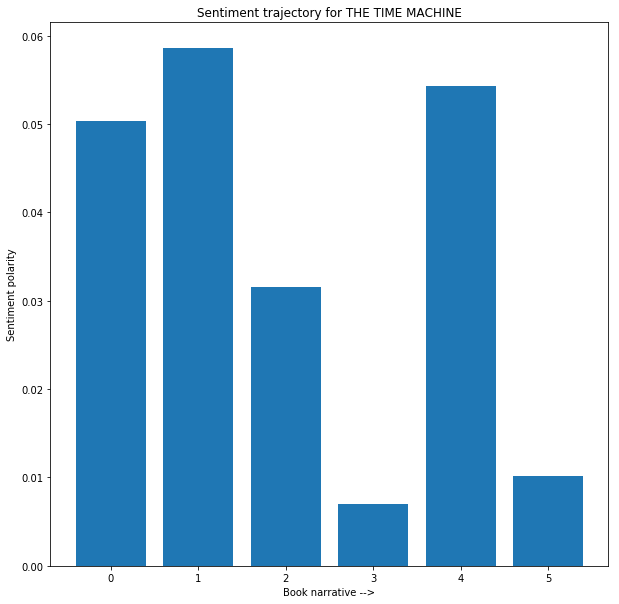

In [145]:
sentiments_binned = get_sentiment(novel_index)
# print('Novel name:', novel_names[novel_index])
y_pos = np.arange(len(sentiments_binned))
plt.figure(figsize=(10,10))
plt.bar(y_pos, height=sentiments_binned);
plt.ylabel("Sentiment polarity")
plt.xlabel("Book narrative -->")
plt.title(f'Sentiment trajectory for {novel_names[novel_index]}');

(1817, 4033)


/Users/etheredgej/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/Users/etheredgej/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Total "complexity": 2.9062306655755887
Topic 0: wa end coming clearly soon human absolutely silent wrong place horrible new laboratory comfort great
Topic 1: time traveller travelling dimension space tell return asked head year smiled story forth hesitated determined
Topic 2: said psychologist filby right suddenly reason suppose good damned gone laughing editor patience mutton way
Topic 3: came suddenly doubt mind heel sudden close room clear corridor reach head straight round pain
Topic 4: thing look clear mind shaped strange mere seen clearly going confusing slept good dream mistake
Topic 5: saw looking black tree figure moving sky gallery wall harvest slope dim rest turn grow
Topic 6: looked round psychologist stood lawn mechanism half le knew building dozen table laughed save frightened
Topic 7: hand took lever touched soft forward passed pocket slipped stared iron dark touching minute starting
Topic 8: machine time taken gone look pointed invention insensible model long took trave

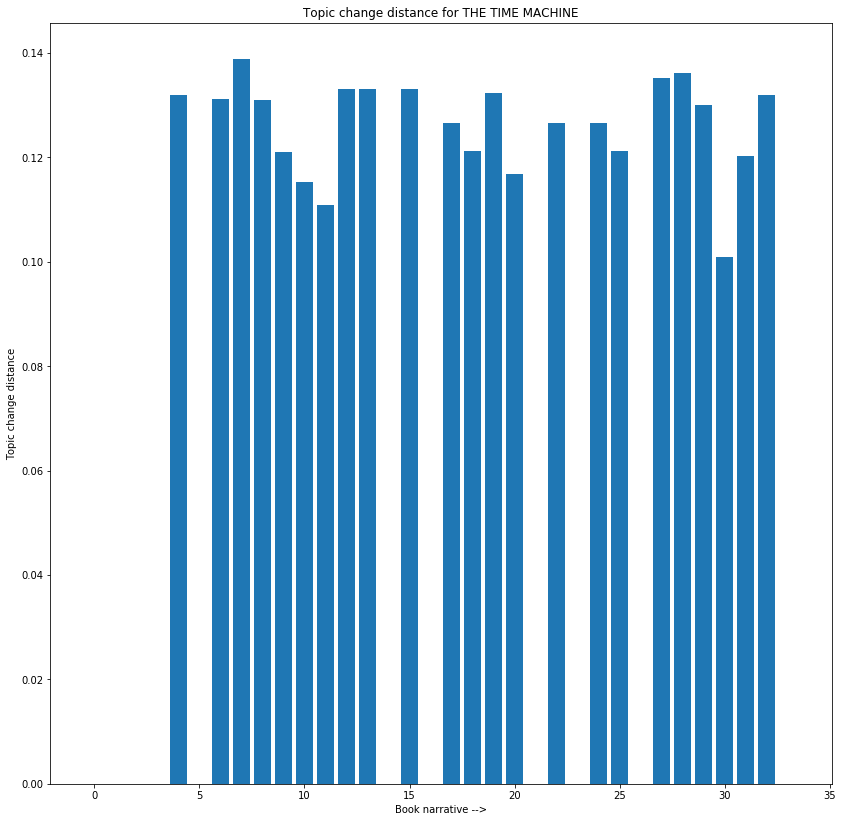

In [146]:
topic_deltas, topic_words = get_topic_deltas(novel_index);
y_pos = np.arange(len(topic_deltas))
plt.figure(figsize=(14, 14))
plt.bar(y_pos, height=[delta-0.85 if delta>0 else 0 for delta in topic_deltas])
plt.ylabel("Topic change distance")
plt.xlabel("Book narrative -->")
plt.title(f'Topic change distance for {novel_names[novel_index]}');

print('Total "complexity":', sum([delta-0.85 if delta>0 else 0 for delta in topic_deltas]))

for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

In [134]:
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: wa time family left rush able sheet making flat quite charwoman realised dream clear quiet
Topic 1: mr asked employer explaining bedroom letter think raised opened good tonight blanket sacked answered wrote
Topic 2: gregor ill called wrong couch day heard pushed injury family hardly idea lock missed wall
Topic 3: samsa decision cleaner allow wrong called respect employer went woman daughter wanted thanks god wife
Topic 4: door open opened shut wide went handle flat slammed hall came morning locked took bedroom
Topic 5: clerk chief come left parent voice called speak let calmed listen raised fallen surely hope
Topic 6: sister called rush job close hand come join playing earn understand frightening went money shouted
Topic 7: said listen like looked hope mean trying come alright absolutely tonight woman sacked stubborn sure
Topic 8: room living gentleman evening left rented quiet light come came thing communicated flat stepped face
Topic 9: did want long think understand eat wor

### Plotting the topics over the course of the novel:

In [21]:
doctopic.shape

(977, 25)

In [22]:
# df2 = pd.DataFrame(doctopic)
# df2.plot.bar(stacked=True);
# #sns.stack(doctopic, norm=None, cmap='Blues')

In [23]:
# using bins of 50-ish sentences to see if that's better or worse than 100-ish sentence bins
doctopic_binned = list(np.array_split(doctopic, len(doctopic)//10))

In [24]:
np.nan_to_num(doctopic_binned[0]).mean(axis=0)

array([2.78330125e-02, 2.91582525e-05, 8.02648515e-03, 5.72274691e-04,
       1.36270094e-01, 1.29620407e-04, 5.43947494e-05, 3.71023753e-03,
       5.37094945e-04, 1.22554901e-01, 0.00000000e+00, 1.14370376e-01,
       2.02874361e-03, 1.32397510e-03, 5.22263526e-03, 5.28979602e-02,
       5.98817370e-03, 1.98254277e-02, 1.06508497e-02, 1.89290226e-01,
       1.41801743e-02, 4.42319954e-04, 6.91593630e-02, 7.21758936e-02,
       1.42726609e-01])

In [144]:
# ax = sns.regplot(x=y_pos, y=sentiments_binned, data=sentiments_binned,
#     scatter_kws={"s": 80},
#     order=2, ci=None, truncate=True)

In [189]:
binvals=[]
for sentbin in doctopic_binned:
    sentbin = np.nan_to_num(sentbin)
    print((sentbin.mean(axis=0)))
    print((sentbin.mean(axis=0)).sum())
    binvals.append(sentbin.mean(axis=0))

[2.78330125e-02 2.91582525e-05 8.02648515e-03 5.72274691e-04
 1.36270094e-01 1.29620407e-04 5.43947494e-05 3.71023753e-03
 5.37094945e-04 1.22554901e-01 0.00000000e+00 1.14370376e-01
 2.02874361e-03 1.32397510e-03 5.22263526e-03 5.28979602e-02
 5.98817370e-03 1.98254277e-02 1.06508497e-02 1.89290226e-01
 1.41801743e-02 4.42319954e-04 6.91593630e-02 7.21758936e-02
 1.42726609e-01]
1.0
[1.00263402e-02 2.64217883e-03 2.87452063e-03 2.05345143e-03
 2.03705869e-03 3.93730042e-04 0.00000000e+00 3.60889146e-03
 1.85328071e-03 9.54713990e-02 1.00539763e-02 4.81387964e-02
 1.14764488e-02 3.32346355e-02 1.54004410e-02 4.71891395e-03
 2.44193358e-02 4.29735511e-02 1.78017686e-02 4.65960692e-02
 4.42331462e-02 1.67544887e-02 5.09828724e-03 6.61492180e-02
 4.01080981e-01]
0.9090909090909092
[2.01342491e-02 0.00000000e+00 0.00000000e+00 1.02256203e-03
 6.92337240e-02 0.00000000e+00 0.00000000e+00 3.14582050e-03
 0.00000000e+00 8.16465672e-02 1.83998852e-04 8.06538715e-03
 1.84027748e-03 8.04668037e-

In [190]:
binvals = np.array(binvals)

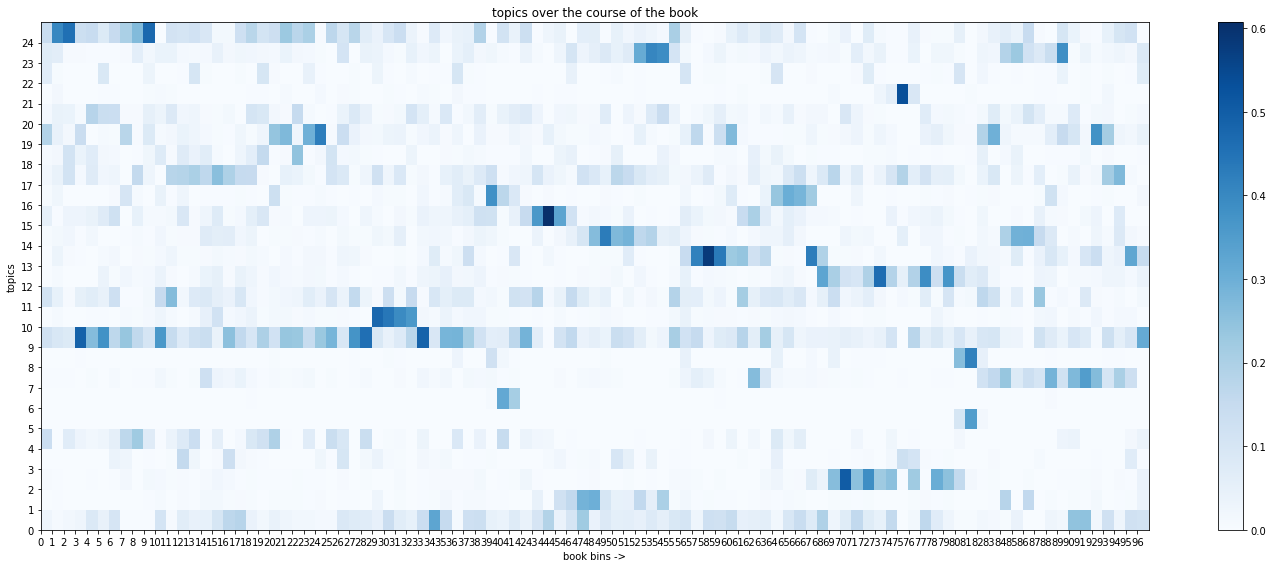

In [191]:
# increase the font size and add a title

K, N = binvals.shape  # N documents, K topics
topic_labels = ['Topic #{}'.format(k) for k in range(K)]

plt.figure(figsize=(20,8))

plt.pcolor(binvals.T, norm=None, cmap='Blues')

# the trailing semicolon ';' suppresses output
plt.yticks(np.arange(binvals.shape[1]));

plt.xticks(np.arange(binvals.shape[0]));

# add x and y labels and title
plt.xlabel('book bins ->')
plt.ylabel('topics')
plt.title('topics over the course of the book')

# add a legend
plt.colorbar(cmap='Blues')

# fix margins
plt.tight_layout() 

plt.show()

### Clustering and t-SNE:

In [443]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [444]:
doctopic.shape

(977, 30)

In [445]:
doctopic = np.nan_to_num(doctopic)

In [446]:
# clustering = SpectralClustering(n_clusters=20)
clustering = KMeans(n_clusters=20)
# clustering = AgglomerativeClustering(n_clusters=10)
clusters = clustering.fit_predict(doctopic)

In [447]:
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=0)
tsne = TSNE(n_components=2, random_state=0, metric="cosine")
#Project the data in 2D

X_2d = tsne.fit_transform(doctopic)

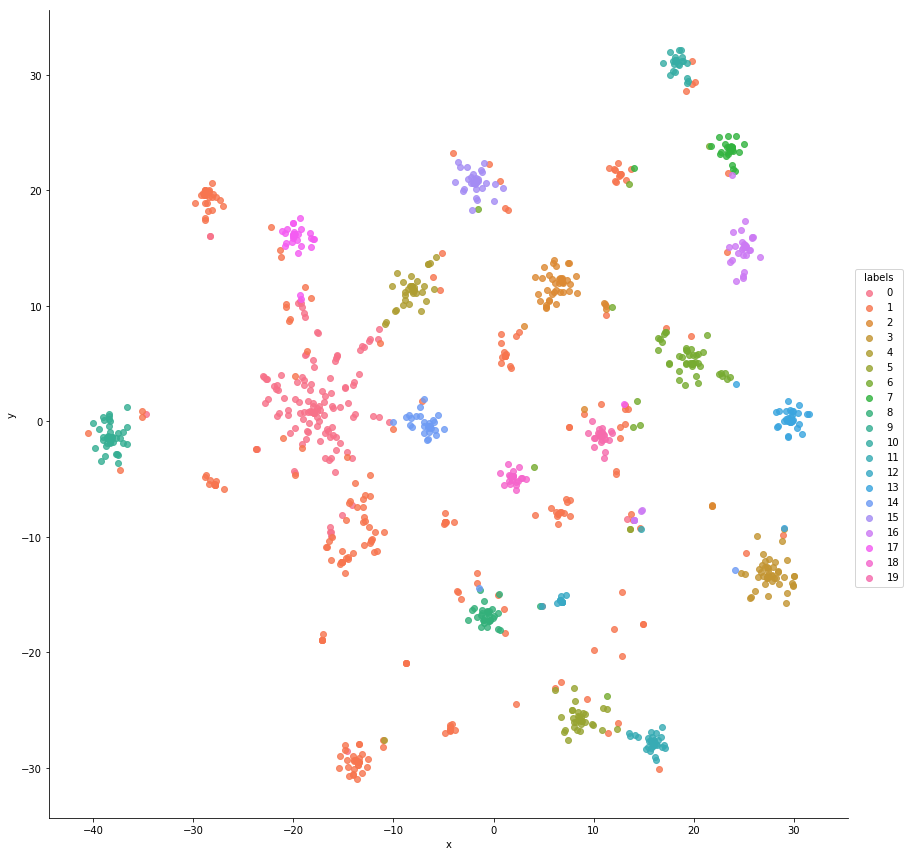

In [448]:
# plot data with seaborn

data = pd.DataFrame()
data['x']=X_2d.T[0]
data['y']=X_2d.T[1]
data['labels']=list(clusters)

facet = sns.lmplot(data=data, x='x', y='y', hue='labels', 
                   fit_reg=False, legend=True, legend_out=True, size=12, aspect=1)

# Note to myself about lmplot:
# lmplot is strange in that it does not respect the sns.set() or plt figsize settings
# as such, we have to set size and aspect

### Novel summarization:

In [208]:
from __future__ import absolute_import
from __future__ import division, print_function, unicode_literals
 
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
 
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.edmundson import EdmundsonSummarizer   #found this is the best as 
# it is picking from beginning also while other skip
 
 
LANGUAGE = "english"
SENTENCES_COUNT = 10
 
 
if __name__ == "__main__":

    # for HTML sites:
    #     url="https://en.wikipedia.org/wiki/Deep_learning"
    #     parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))

    # for plain text files:
#     parser = PlaintextParser.from_file("file.txt", Tokenizer(LANGUAGE))

    # for plain text variable:
    parser = PlaintextParser(clean_books[novel_index], Tokenizer(LANGUAGE))
    
 
        
    print ("--LsaSummarizer--")    
    summarizer = LsaSummarizer()
    summarizer = LsaSummarizer(Stemmer(LANGUAGE))
    summarizer.stop_words = get_stop_words(LANGUAGE)
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        print(sentence)
         
    print ("--LuhnSummarizer--")     
    summarizer = LuhnSummarizer() 
    summarizer = LsaSummarizer(Stemmer(LANGUAGE))
    summarizer.stop_words = ("I", "am", "the", "you", "are", "me", "is", "than", "that", "this",)
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        print(sentence)
         
    print ("--EdmundsonSummarizer--")     
    summarizer = EdmundsonSummarizer() 
    words = ("deep", "learning", "neural" )
    summarizer.bonus_words = words
     
    words = ("another", "and", "some", "next",)
    summarizer.stigma_words = words
    
     
    words = ("another", "and", "some", "next",)
    summarizer.null_words = words
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        print(sentence)

--LsaSummarizer--
‘Come, there’s no use in crying like that!’ said Alice to herself,  rather sharply; ‘I advise you to leave off this minute!’ She generally  gave herself very good advice, (though she very seldom followed it),  and sometimes she scolded herself so severely as to bring tears into  her eyes; and once she remembered trying to box her own ears for having  cheated herself in a game of croquet she was playing against herself,  for this curious child was very fond of pretending to be two people.
(Alice had been to the seaside once in  her life, and had come to the general conclusion, that wherever you go  to on the English coast you find a number of bathing machines in the  sea, some children digging in the sand with wooden spades, then a row  of lodging houses, and behind them a railway station.)
Where CAN I have dropped them, I wonder?’ Alice guessed in a  moment that it was looking for the fan and the pair of white kid gloves,  and she very good-naturedly began hunting abo

### Make a dataframe with the cluster relationships so that we can use them in the future:

In [198]:
book_clusters = pd.DataFrame()
book_clusters['sentence'] = clean_book_sentences[novel_index]
book_clusters['cluster'] = clusters
book_clusters.sort_values(by=['cluster']).head()

sentence  cluster
797  Tell her to  begin.’ He looked at the Gryphon ...        0
179  Alice thought the whole thing very absurd, but...        0
562                ‘That’s very curious!’ she thought.        0
260  ‘What a number of  cucumber-frames there must ...        0
563                  ‘But  everything’s curious today.        0

In [47]:
doctopic_prob_df = pd.DataFrame()
for i in range(len(doctopic)):
    doctopic_prob_df[str(i)] = doctopic[i]

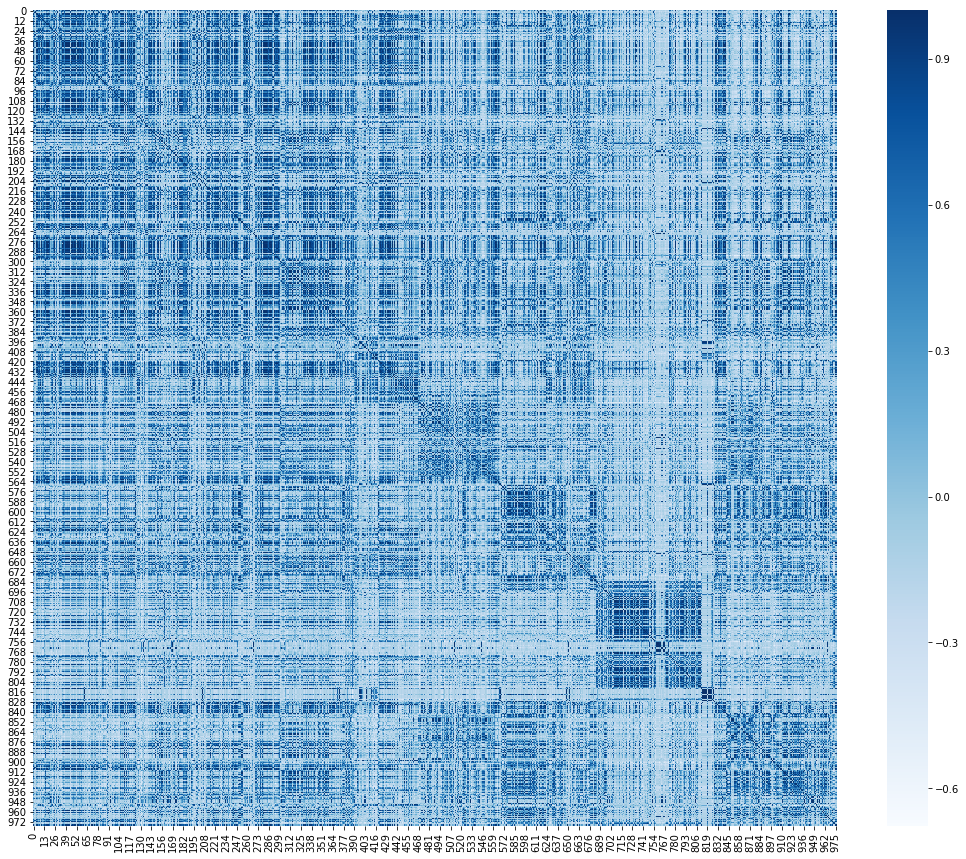

In [51]:
f, ax = plt.subplots(figsize=(18, 15))
corr = doctopic_prob_df.corr()
sns.heatmap(corr,cmap="Blues");
# sns.heatmap(corr,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values, 
#             cmap="Blues")

In [52]:
topic_df=pd.DataFrame()
for t in range(len(topic_words)):
#     print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))
    topic_df['Topic %d' %t] = topic_words[t]
topic_df.T

0          1        2            3       4           5        6   \
Topic 0    said      alice     king  caterpillar  hatter     gryphon      don   
Topic 1   alice    thought   little         went    poor        time   looked   
Topic 2  turtle       mock  gryphon         went    said        like      sea   
Topic 3   march       hare   hatter     dormouse    said        mean    think   
Topic 4      oh       dear    dinah         wish    paws    puzzling    cried   
Topic 5   queen    shouted    voice         head   began      rabbit     hear   
Topic 6    know        don  replied           ll    mean       thing     like   
Topic 7     won      dance     join      beating   stand     waiting  whiting   
Topic 8     cat       like    think      duchess    look         mad      way   
Topic 9    soup  beautiful  evening          oop     soo  pennyworth  ootiful   

                  7         8           9        10         11        12  \
Topic 0  indignantly    course     exactly  explain        fun   footman   
Topic 1         come     mouse         way       ve        got        ll   
Topic 2          old       did      school     come    replied    little   
Topic 3         went       isn         say   butter       deny       did   
Topic 4       rabbit     birds          ll     talk      mouse  whiskers   
Topic 5        heads     white      hatter     king    croquet      game   
Topic 6        mouse  lobsters  particular      say        try    things   
Topic 7         come   shingle        tone     seen         ve  mournful   
Topic 8         wish       did       dinah     sure      quite      cats   
Topic 9         beau   duchess       trial   pepper  certainly       ran   

                  13         14         15         16       17         18  \
Topic 0       pigeon   evidence    turning   business  witness    duchess   
Topic 1         door      thing       just       came    heard        use   
Topic 2        stiff  different       tone     figure     eyes        day   
Topic 3  interrupted        tea  fifteenth     answer     live    replied   
Topic 4         help      shall       sing      times     says        fur   
Topic 5      majesty      round       time  gardeners     play   screamed   
Topic 6          did      asked      shore       tone     read       used   
Topic 7     lobsters        ask      cried       talk  hopeful  trembling   
Topic 8     cheshire   vanished       baby       said     grin      world   
Topic 9     sneezing       cook    chapter       sing     came     beauti   

               19  
Topic 0   serpent  
Topic 1     round  
Topic 2    course  
Topic 3      wasn  
Topic 4   foolish  
Topic 5     added  
Topic 6      didn  
Topic 7    prizes  
Topic 8  appeared  
Topic 9       ful

In [53]:
booknum = 0
norm_word_weights = [x/np.sum(word_weights[booknum]) for x in word_weights[booknum]]
# print(norm_word_weights)
# words_with_weights = zip(topic_words[booknum],norm_word_weights)
# list(words_with_weights)
words_with_weights = pd.DataFrame()
words_with_weights['words'] = topic_words[booknum]
words_with_weights['weights'] = norm_word_weights
words_with_weights.head()

words   weights
0         said  0.385849
1        alice  0.158219
2         king  0.098769
3  caterpillar  0.076206
4       hatter  0.040268

### Source for some of this code:
- https://de.dariah.eu/
- https://de.dariah.eu/tatom/topic_model_python.html
- https://de.dariah.eu/tatom/topic_model_visualization.html#topic-model-visualization